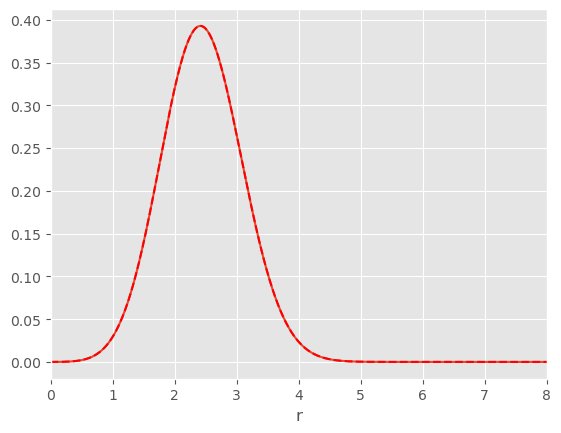

In [15]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline
mpl.style.use('ggplot')


N = 200                                                   # Truncation ordem

L0 = 10                                             # Map parameter 

col = np.cos(np.arange(2*N + 3)*math.pi /(2*N + 2))      # collocation points (Verificado)
                               
colr = col[1:N+2]                                                         # physical domain (Verificado)             

r1 = L0 * colr/(np.sqrt(1-colr**2)) 
r = np.flip(r1)                                           # physical domain (Verificado)  

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     

# Base function



psi = SB[0:N+1,:]        # origin included in psi[:,0]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]



# Initial conditions of Phi (Scalar field)                                    

r0 = 2

sigma = 1

# L0 = 1, sigma = 1/2, r0 = 0 and Phi_init = A0*r**2*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))   

#A0 =  0.1  #  0.7602785  -> disperse ;  # 0.77 -> colapse 

# L0 = 5 ,sigma = 1, r0 = 2,  Phi_init = A0*r**2*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))   

A0 =  0.08  #  0.07  -> disperse ;  # 0.1 -> colapse 

# L0 = 3 and sigma = 1/2 and Phi_init = A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))   

#A0 =  0.75981136951800  #  0.759811369518  -> disperse ;  # 0.759811369518001   -> colapse 



Phi_init = A0*r**2*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))          # Phi initial data out of origin (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_init, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.00000000000000001,8,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phiplot_init = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))     

#Phiplot_init = np.hstack((0, Phiplot_int))

Phiplot = np.dot(a0, psiplot)

plt.plot(rplot, Phiplot, rplot, Phiplot_init, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()


In [16]:
Phi

array([-5.33654990e-16,  1.86654205e-05,  8.39814528e-05,  2.24668597e-04,
        4.91042179e-04,  9.58369439e-04,  1.73093642e-03,  2.94618924e-03,
        4.77814454e-03,  7.43912598e-03,  1.11788055e-02,  1.62795398e-02,
        2.30471279e-02,  3.17963928e-02,  4.28314292e-02,  5.64209318e-02,
        7.27697074e-02,  9.19881948e-02,  1.14062495e-01,  1.38827939e-01,
        1.65949486e-01,  1.94912167e-01,  2.25024287e-01,  2.55435200e-01,
        2.85168190e-01,  3.13167456e-01,  3.38356568e-01,  3.59704263e-01,
        3.76292256e-01,  3.87379070e-01,  3.92453881e-01,  3.91275041e-01,
        3.83889287e-01,  3.70629525e-01,  3.52091210e-01,  3.29089539e-01,
        3.02601631e-01,  2.73699250e-01,  2.43478444e-01,  2.12992421e-01,
        1.83193282e-01,  1.54886914e-01,  1.28703627e-01,  1.05085283e-01,
        8.42879181e-02,  6.63974516e-02,  5.13550910e-02,  3.89886235e-02,
        2.90458275e-02,  2.12267220e-02,  1.52121257e-02,  1.06868959e-02,
        7.35710757e-03,  

In [17]:
Phi

array([-5.33654990e-16,  1.86654205e-05,  8.39814528e-05,  2.24668597e-04,
        4.91042179e-04,  9.58369439e-04,  1.73093642e-03,  2.94618924e-03,
        4.77814454e-03,  7.43912598e-03,  1.11788055e-02,  1.62795398e-02,
        2.30471279e-02,  3.17963928e-02,  4.28314292e-02,  5.64209318e-02,
        7.27697074e-02,  9.19881948e-02,  1.14062495e-01,  1.38827939e-01,
        1.65949486e-01,  1.94912167e-01,  2.25024287e-01,  2.55435200e-01,
        2.85168190e-01,  3.13167456e-01,  3.38356568e-01,  3.59704263e-01,
        3.76292256e-01,  3.87379070e-01,  3.92453881e-01,  3.91275041e-01,
        3.83889287e-01,  3.70629525e-01,  3.52091210e-01,  3.29089539e-01,
        3.02601631e-01,  2.73699250e-01,  2.43478444e-01,  2.12992421e-01,
        1.83193282e-01,  1.54886914e-01,  1.28703627e-01,  1.05085283e-01,
        8.42879181e-02,  6.63974516e-02,  5.13550910e-02,  3.89886235e-02,
        2.90458275e-02,  2.12267220e-02,  1.52121257e-02,  1.06868959e-02,
        7.35710757e-03,  

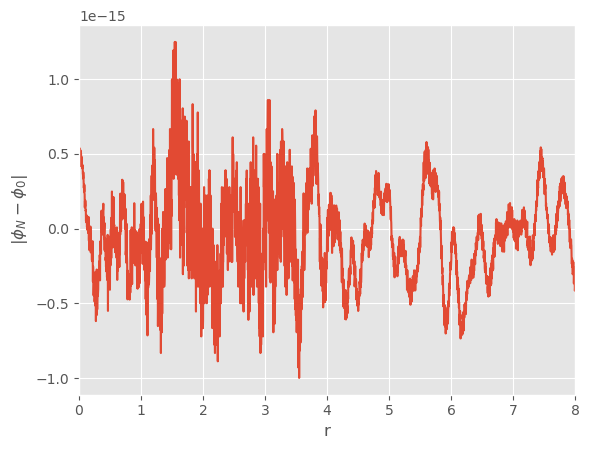

In [18]:
erro = Phiplot_init - Phiplot

plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.show()

In [19]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i] = 0.0001

coeforigin = 1/L0**2*(-(-1)**(np.arange(N+1))*(2*np.arange(1,N+2)-1)**2)    # 1/r * d\phi/dr

tol = 1e-19
#cnew = 0 
#err = abs(c0 - cnew)

n = 0
nf = 100

# Newton Raphson loop
#while max(err) >= tol:
while n <= nf:
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0_0 = 4*rrChi[0] + 8*np.dot(coeforigin,c0) + 1/2*(rPhi[0])**2
  H0_int = 4*rChi[1:N+1]**2 + 4*rrChi[1:N+1] + 8/r[1:N+1]*rChi[1:N+1] + 1/2*rPhi[1:N+1]**2
  H0 = np.hstack((H0_0, H0_int))
  J1 = rChi*rpsi
  JH_0 = 8*J1[:,0]+ 4*rrpsi[:,0] + 8*coeforigin
  JH_int = 8*J1[:,1:N+1] + 4*rrpsi[:,1:N+1] + 8/r[1:N+1]*rpsi[:,1:N+1]  
  JH = np.column_stack((JH_0, JH_int))
  inv_JH = np.linalg.inv(JH)
  cnew = c0
  c0 = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
  print(max(err))
  if  max(err) <= tol:
    print(c0)
    break
  n = n + 1


0.04261922384983523
0.0016004530065349964
8.033263961537696e-07
1.8592072326129028e-13
1.3877787807814457e-17
6.938893903907228e-18
6.938893903907228e-18
6.938893903907228e-18
6.938893903907228e-18
6.938893903907228e-18
8.673617379884035e-19
1.734723475976807e-18
2.0816681711721685e-17
1.3877787807814457e-17
6.938893903907228e-18
3.469446951953614e-18
6.938893903907228e-18
6.938893903907228e-18
6.938893903907228e-18
1.734723475976807e-18
8.673617379884035e-19
1.734723475976807e-18
6.938893903907228e-18
6.938893903907228e-18
1.734723475976807e-18
1.3877787807814457e-17
1.3877787807814457e-17
6.938893903907228e-18
5.204170427930421e-18
1.3877787807814457e-17
2.0816681711721685e-17
6.938893903907228e-18
2.0816681711721685e-17
8.673617379884035e-19
1.3877787807814457e-17
6.938893903907228e-18
1.734723475976807e-18
3.469446951953614e-18
1.734723475976807e-18
3.469446951953614e-18
2.0816681711721685e-17
6.938893903907228e-18
1.3010426069826053e-18
6.938893903907228e-18
6.938893903907228e-18


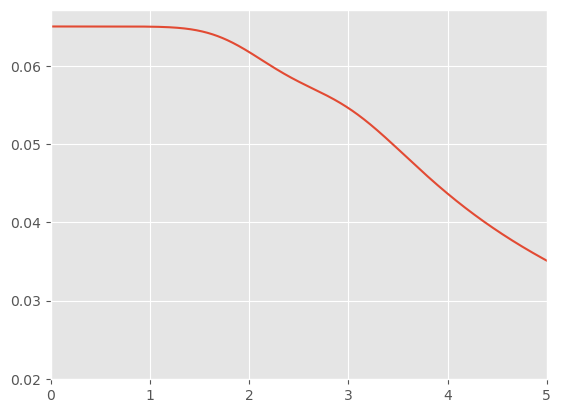

In [20]:

Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,5)
plt.show()
     

In [21]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

# In r = 0: 

SB1 = 1/2*(SB[1:(N+1),:] + SB[0:(N),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+1),:] + rSB[0:(N),:])
rrSB1 = 1/2*(rrSB[1:(N+1),:] + rrSB[0:(N),:])

# Base functions for Beta

SB2 = np.zeros([N,N+1])      
rSB2 = np.zeros([N,N+1])
rrSB2 = np.zeros([N,N+1])



for i in range(N):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  


for i in range(N):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))


for i in range(N):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)






In [22]:
np.shape(SB2)

(200, 201)

In [23]:
np.shape(SB1)

(200, 201)

In [24]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+1,Nq+1])
qrSB = np.zeros([Nq+1,Nq+1])
qrrSB = np.zeros([Nq+1,Nq+1])


for i in range(Nq+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                     

qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


qSB1 = 1/2*(qSB[1:(N+1),:] + qSB[0:(N),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+1),:] + qrSB[0:(N),:])
rrqSB1 = 1/2*(qSB[1:(N+1),:] + qrrSB[0:(N),:])



# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:

#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

#Alphacenter = (-1)**(np.arange(N+1))


In [25]:
# Filtering

Nc = 0

Nf = N - Nc

coef_f = 36
s = 30

filter1 = np.ones(N+1)
#filter1 = np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)

In [26]:
np.dot(np.arange(1, 2*N + 2, 2), c0)

0.01787256576640437

In [27]:
# Runge Kutta 4th order

h = 0.0002   # step size
tf = 10

It = int(tf/h)

#t1 = np.linspace(0, tf, It) 

t = 0

Madm = []
Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)

V = 0

M0 = 2*np.dot(np.arange(1, 2*N + 2, 2), c0) # Madm(t = 0)


#matriz = np.concatenate((array1, array2))

while t <= tf:
   
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)      
  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)   
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**1/2)    # L2 error of HC 
  
  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi[:,0])
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(t) + " " + str(Alpha_0))
  out_a.write(',\n')
  
  # Phi origin:  
  phi_0 = np.dot(a0, psi[:,0])
  phi_origin.append(phi_0)
  out_p.write(str(t) + " " + str(phi_0))
  out_p.write(',\n')
  
  # ADM mass:
  Madm.append(2*np.dot(np.arange(1, 2*N + 2, 2), c0))

  # Second step
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  t = t + h
#  print(t) 
#  if t > 9:
#    h=0.0001
 
    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = filter1*(b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4))
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  phi_set.append(np.dot(a0, psiplot))
  
  print('t =',t,'rPi =', 'al0 =', al0, sep = '\n') 
    

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)
  
out_a.close()
out_p.close() 
  
t1 = np.linspace(0, tf, len(Alpha_origin)) 

t =
0.0002
rPi =
Alpha_0 =
1.0
t =
0.0004
rPi =
Alpha_0 =
0.999999926980964
t =
0.0006000000000000001
rPi =
Alpha_0 =
0.9999997079240028
t =
0.0008
rPi =
Alpha_0 =
0.9999993428295587
t =
0.001
rPi =
Alpha_0 =
0.9999988316983677
t =
0.0012000000000000001
rPi =
Alpha_0 =
0.9999981745314606
t =
0.0014000000000000002
rPi =
Alpha_0 =
0.9999973713301628
t =
0.0016000000000000003
rPi =
Alpha_0 =
0.999996422096094
t =
0.0018000000000000004
rPi =
Alpha_0 =
0.9999953268311685
t =
0.0020000000000000005
rPi =
Alpha_0 =
0.9999940855375952
t =
0.0022000000000000006
rPi =
Alpha_0 =
0.9999926982178773
t =
0.0024000000000000007
rPi =
Alpha_0 =
0.9999911648748123
t =
0.0026000000000000007
rPi =
Alpha_0 =
0.9999894855114926
t =
0.002800000000000001
rPi =
Alpha_0 =
0.9999876601313047
t =
0.003000000000000001
rPi =
Alpha_0 =
0.9999856887379294
t =
0.003200000000000001
rPi =
Alpha_0 =
0.9999835713353422
t =
0.003400000000000001
rPi =
Alpha_0 =
0.9999813079278128
t =
0.003600000000000001
rPi =
Alpha_0 =
0.99

t =
0.030999999999999923
rPi =
Alpha_0 =
0.9982751536235935
t =
0.031199999999999922
rPi =
Alpha_0 =
0.9982527706304782
t =
0.03139999999999992
rPi =
Alpha_0 =
0.9982302450999976
t =
0.03159999999999992
rPi =
Alpha_0 =
0.9982075770769828
t =
0.03179999999999992
rPi =
Alpha_0 =
0.9981847666065427
t =
0.03199999999999992
rPi =
Alpha_0 =
0.9981618137340618
t =
0.032199999999999916
rPi =
Alpha_0 =
0.9981387185052016
t =
0.032399999999999915
rPi =
Alpha_0 =
0.9981154809658924
t =
0.032599999999999914
rPi =
Alpha_0 =
0.9980921011623491
t =
0.03279999999999991
rPi =
Alpha_0 =
0.9980685791410506
t =
0.03299999999999991
rPi =
Alpha_0 =
0.9980449149487604
t =
0.03319999999999991
rPi =
Alpha_0 =
0.9980211086325106
t =
0.03339999999999991
rPi =
Alpha_0 =
0.9979971602396093
t =
0.03359999999999991
rPi =
Alpha_0 =
0.9979730698176357
t =
0.033799999999999907
rPi =
Alpha_0 =
0.997948837414449
t =
0.033999999999999905
rPi =
Alpha_0 =
0.9979244630781725
t =
0.034199999999999904
rPi =
Alpha_0 =
0.9978999

t =
0.05959999999999975
rPi =
Alpha_0 =
0.9936530833686286
t =
0.05979999999999975
rPi =
Alpha_0 =
0.9936108998781277
t =
0.05999999999999975
rPi =
Alpha_0 =
0.9935685829296823
t =
0.06019999999999975
rPi =
Alpha_0 =
0.9935261326045814
t =
0.060399999999999746
rPi =
Alpha_0 =
0.9934835489843894
t =
0.060599999999999744
rPi =
Alpha_0 =
0.9934408321508688
t =
0.06079999999999974
rPi =
Alpha_0 =
0.9933979821860005
t =
0.06099999999999974
rPi =
Alpha_0 =
0.9933549991720374
t =
0.06119999999999974
rPi =
Alpha_0 =
0.9933118831914054
t =
0.06139999999999974
rPi =
Alpha_0 =
0.9932686343268112
t =
0.06159999999999974
rPi =
Alpha_0 =
0.9932252526611587
t =
0.06179999999999974
rPi =
Alpha_0 =
0.9931817382775767
t =
0.061999999999999736
rPi =
Alpha_0 =
0.9931380912594373
t =
0.062199999999999735
rPi =
Alpha_0 =
0.9930943116903275
t =
0.06239999999999973
rPi =
Alpha_0 =
0.9930503996540696
t =
0.06259999999999974
rPi =
Alpha_0 =
0.9930063552346972
t =
0.06279999999999974
rPi =
Alpha_0 =
0.9929621785

t =
0.08980000000000052
rPi =
Alpha_0 =
0.9858222272440788
t =
0.09000000000000052
rPi =
Alpha_0 =
0.9857609329260049
t =
0.09020000000000053
rPi =
Alpha_0 =
0.9856995197897617
t =
0.09040000000000054
rPi =
Alpha_0 =
0.9856379879464158
t =
0.09060000000000054
rPi =
Alpha_0 =
0.9855763375072076
t =
0.09080000000000055
rPi =
Alpha_0 =
0.9855145685834628
t =
0.09100000000000055
rPi =
Alpha_0 =
0.9854526812868076
t =
0.09120000000000056
rPi =
Alpha_0 =
0.9853906757288855
t =
0.09140000000000056
rPi =
Alpha_0 =
0.9853285520215794
t =
0.09160000000000057
rPi =
Alpha_0 =
0.985266310276898
t =
0.09180000000000058
rPi =
Alpha_0 =
0.9852039506070288
t =
0.09200000000000058
rPi =
Alpha_0 =
0.9851414731243021
t =
0.09220000000000059
rPi =
Alpha_0 =
0.9850788779412084
t =
0.09240000000000059
rPi =
Alpha_0 =
0.9850161651704186
t =
0.0926000000000006
rPi =
Alpha_0 =
0.9849533349247205
t =
0.0928000000000006
rPi =
Alpha_0 =
0.9848903873170874
t =
0.09300000000000061
rPi =
Alpha_0 =
0.9848273224606156


t =
0.1204000000000014
rPi =
Alpha_0 =
0.9751307923479178
t =
0.1206000000000014
rPi =
Alpha_0 =
0.975052693651321
t =
0.1208000000000014
rPi =
Alpha_0 =
0.9749744947101182
t =
0.12100000000000141
rPi =
Alpha_0 =
0.9748961956542745
t =
0.12120000000000142
rPi =
Alpha_0 =
0.9748177966137234
t =
0.12140000000000142
rPi =
Alpha_0 =
0.9747392977184733
t =
0.12160000000000143
rPi =
Alpha_0 =
0.9746606990987209
t =
0.12180000000000143
rPi =
Alpha_0 =
0.9745820008846114
t =
0.12200000000000144
rPi =
Alpha_0 =
0.9745032032065133
t =
0.12220000000000145
rPi =
Alpha_0 =
0.974424306194749
t =
0.12240000000000145
rPi =
Alpha_0 =
0.9743453099798227
t =
0.12260000000000146
rPi =
Alpha_0 =
0.9742662146922529
t =
0.12280000000000146
rPi =
Alpha_0 =
0.9741870204626393
t =
0.12300000000000147
rPi =
Alpha_0 =
0.974107727421712
t =
0.12320000000000147
rPi =
Alpha_0 =
0.9740283357002497
t =
0.12340000000000148
rPi =
Alpha_0 =
0.9739488454290958
t =
0.12360000000000149
rPi =
Alpha_0 =
0.9738692567392212
t =

t =
0.14900000000000221
rPi =
Alpha_0 =
0.9630080497919936
t =
0.14920000000000222
rPi =
Alpha_0 =
0.9629169667386548
t =
0.14940000000000223
rPi =
Alpha_0 =
0.9628258026345211
t =
0.14960000000000223
rPi =
Alpha_0 =
0.9627345576165921
t =
0.14980000000000224
rPi =
Alpha_0 =
0.9626432318219527
t =
0.15000000000000224
rPi =
Alpha_0 =
0.962551825387522
t =
0.15020000000000225
rPi =
Alpha_0 =
0.9624603384504823
t =
0.15040000000000225
rPi =
Alpha_0 =
0.9623687711477718
t =
0.15060000000000226
rPi =
Alpha_0 =
0.9622771236164814
t =
0.15080000000000227
rPi =
Alpha_0 =
0.9621853959937349
t =
0.15100000000000227
rPi =
Alpha_0 =
0.9620935884166546
t =
0.15120000000000228
rPi =
Alpha_0 =
0.9620017010222212
t =
0.15140000000000228
rPi =
Alpha_0 =
0.961909733947712
t =
0.1516000000000023
rPi =
Alpha_0 =
0.9618176873302098
t =
0.1518000000000023
rPi =
Alpha_0 =
0.9617255613068456
t =
0.1520000000000023
rPi =
Alpha_0 =
0.9616333560148352
t =
0.1522000000000023
rPi =
Alpha_0 =
0.961541071591327
t =


t =
0.17940000000000308
rPi =
Alpha_0 =
0.948311977929197
t =
0.1796000000000031
rPi =
Alpha_0 =
0.9482101477624953
t =
0.1798000000000031
rPi =
Alpha_0 =
0.948108257318836
t =
0.1800000000000031
rPi =
Alpha_0 =
0.9480063067330338
t =
0.1802000000000031
rPi =
Alpha_0 =
0.9479042961399661
t =
0.1804000000000031
rPi =
Alpha_0 =
0.947802225674403
t =
0.18060000000000312
rPi =
Alpha_0 =
0.947700095470964
t =
0.18080000000000312
rPi =
Alpha_0 =
0.9475979056643261
t =
0.18100000000000313
rPi =
Alpha_0 =
0.9474956563891913
t =
0.18120000000000314
rPi =
Alpha_0 =
0.947393347780037
t =
0.18140000000000314
rPi =
Alpha_0 =
0.9472909799715411
t =
0.18160000000000315
rPi =
Alpha_0 =
0.9471885530979314
t =
0.18180000000000315
rPi =
Alpha_0 =
0.94708606729396
t =
0.18200000000000316
rPi =
Alpha_0 =
0.9469835226938181
t =
0.18220000000000316
rPi =
Alpha_0 =
0.9468809194318986
t =
0.18240000000000317
rPi =
Alpha_0 =
0.9467782576426486
t =
0.18260000000000318
rPi =
Alpha_0 =
0.9466755374601139
t =
0.182

t =
0.20920000000000394
rPi =
Alpha_0 =
0.9325465033039007
t =
0.20940000000000394
rPi =
Alpha_0 =
0.9324371495850751
t =
0.20960000000000395
rPi =
Alpha_0 =
0.9323277550489028
t =
0.20980000000000396
rPi =
Alpha_0 =
0.932218319820607
t =
0.21000000000000396
rPi =
Alpha_0 =
0.932108844025546
t =
0.21020000000000397
rPi =
Alpha_0 =
0.9319993277886973
t =
0.21040000000000397
rPi =
Alpha_0 =
0.9318897712352614
t =
0.21060000000000398
rPi =
Alpha_0 =
0.9317801744901001
t =
0.21080000000000398
rPi =
Alpha_0 =
0.9316705376780312
t =
0.211000000000004
rPi =
Alpha_0 =
0.931560860923984
t =
0.211200000000004
rPi =
Alpha_0 =
0.9314511443525155
t =
0.211400000000004
rPi =
Alpha_0 =
0.9313413880883769
t =
0.211600000000004
rPi =
Alpha_0 =
0.9312315922560344
t =
0.211800000000004
rPi =
Alpha_0 =
0.9311217569800232
t =
0.21200000000000402
rPi =
Alpha_0 =
0.9310118823846127
t =
0.21220000000000402
rPi =
Alpha_0 =
0.9309019685941216
t =
0.21240000000000403
rPi =
Alpha_0 =
0.9307920157327244
t =
0.2126

t =
0.23780000000000476
rPi =
Alpha_0 =
0.9165528141472419
t =
0.23800000000000476
rPi =
Alpha_0 =
0.9164388528223433
t =
0.23820000000000477
rPi =
Alpha_0 =
0.9163248676650984
t =
0.23840000000000477
rPi =
Alpha_0 =
0.9162108587868936
t =
0.23860000000000478
rPi =
Alpha_0 =
0.9160968262994811
t =
0.2388000000000048
rPi =
Alpha_0 =
0.9159827703141992
t =
0.2390000000000048
rPi =
Alpha_0 =
0.9158686909423304
t =
0.2392000000000048
rPi =
Alpha_0 =
0.9157545882950695
t =
0.2394000000000048
rPi =
Alpha_0 =
0.9156404624834903
t =
0.2396000000000048
rPi =
Alpha_0 =
0.915526313618611
t =
0.23980000000000481
rPi =
Alpha_0 =
0.9154121418113214
t =
0.24000000000000482
rPi =
Alpha_0 =
0.9152979471722327
t =
0.24020000000000483
rPi =
Alpha_0 =
0.9151837298122016
t =
0.24040000000000483
rPi =
Alpha_0 =
0.915069489841601
t =
0.24060000000000484
rPi =
Alpha_0 =
0.9149552273711214
t =
0.24080000000000484
rPi =
Alpha_0 =
0.9148409425108907
t =
0.24100000000000485
rPi =
Alpha_0 =
0.9147266353712215
t =


t =
0.26780000000000315
rPi =
Alpha_0 =
0.8992516206774944
t =
0.2680000000000031
rPi =
Alpha_0 =
0.8991352715657241
t =
0.2682000000000031
rPi =
Alpha_0 =
0.8990189141327636
t =
0.2684000000000031
rPi =
Alpha_0 =
0.8989025484733275
t =
0.26860000000000306
rPi =
Alpha_0 =
0.898786174682302
t =
0.26880000000000304
rPi =
Alpha_0 =
0.8986697928540677
t =
0.269000000000003
rPi =
Alpha_0 =
0.8985534030834074
t =
0.269200000000003
rPi =
Alpha_0 =
0.8984370054644484
t =
0.26940000000000297
rPi =
Alpha_0 =
0.8983206000916414
t =
0.26960000000000295
rPi =
Alpha_0 =
0.8982041870590171
t =
0.2698000000000029
rPi =
Alpha_0 =
0.8980877664607986
t =
0.2700000000000029
rPi =
Alpha_0 =
0.8979713383906212
t =
0.2702000000000029
rPi =
Alpha_0 =
0.8978549029424674
t =
0.27040000000000286
rPi =
Alpha_0 =
0.8977384602099863
t =
0.27060000000000284
rPi =
Alpha_0 =
0.8976220102869865
t =
0.2708000000000028
rPi =
Alpha_0 =
0.8975055532664001
t =
0.2710000000000028
rPi =
Alpha_0 =
0.8973890892420875
t =
0.2712

t =
0.2964
rPi =
Alpha_0 =
0.8825725366470505
t =
0.2966
rPi =
Alpha_0 =
0.8824559052752317
t =
0.29679999999999995
rPi =
Alpha_0 =
0.8823392779692956
t =
0.29699999999999993
rPi =
Alpha_0 =
0.8822226548070796
t =
0.2971999999999999
rPi =
Alpha_0 =
0.8821060358668943
t =
0.2973999999999999
rPi =
Alpha_0 =
0.8819894212270414
t =
0.29759999999999986
rPi =
Alpha_0 =
0.8818728109653113
t =
0.29779999999999984
rPi =
Alpha_0 =
0.881756205159568
t =
0.2979999999999998
rPi =
Alpha_0 =
0.881639603887514
t =
0.2981999999999998
rPi =
Alpha_0 =
0.8815230072269927
t =
0.2983999999999998
rPi =
Alpha_0 =
0.8814064152551975
t =
0.29859999999999975
rPi =
Alpha_0 =
0.8812898280496738
t =
0.29879999999999973
rPi =
Alpha_0 =
0.8811732456878592
t =
0.2989999999999997
rPi =
Alpha_0 =
0.8810566682464784
t =
0.2991999999999997
rPi =
Alpha_0 =
0.8809400958031957
t =
0.29939999999999967
rPi =
Alpha_0 =
0.880823528434639
t =
0.29959999999999964
rPi =
Alpha_0 =
0.8807069662175204
t =
0.2997999999999996
rPi =
Alph

t =
0.3253999999999968
rPi =
Alpha_0 =
0.8657404045998527
t =
0.3255999999999968
rPi =
Alpha_0 =
0.8656251241901824
t =
0.32579999999999676
rPi =
Alpha_0 =
0.8655098580305856
t =
0.32599999999999674
rPi =
Alpha_0 =
0.8653946061836497
t =
0.3261999999999967
rPi =
Alpha_0 =
0.8652793687110547
t =
0.3263999999999967
rPi =
Alpha_0 =
0.8651641456751795
t =
0.32659999999999667
rPi =
Alpha_0 =
0.8650489371377484
t =
0.32679999999999665
rPi =
Alpha_0 =
0.8649337431606525
t =
0.3269999999999966
rPi =
Alpha_0 =
0.8648185638057827
t =
0.3271999999999966
rPi =
Alpha_0 =
0.8647033991344244
t =
0.3273999999999966
rPi =
Alpha_0 =
0.8645882492082947
t =
0.32759999999999656
rPi =
Alpha_0 =
0.8644731140889879
t =
0.32779999999999654
rPi =
Alpha_0 =
0.8643579938373439
t =
0.3279999999999965
rPi =
Alpha_0 =
0.8642428885149325
t =
0.3281999999999965
rPi =
Alpha_0 =
0.8641277981826552
t =
0.3283999999999965
rPi =
Alpha_0 =
0.8640127229015719
t =
0.32859999999999645
rPi =
Alpha_0 =
0.8638976627325083
t =
0.3

t =
0.35859999999999315
rPi =
Alpha_0 =
0.8468424543840498
t =
0.3587999999999931
rPi =
Alpha_0 =
0.8467303149087653
t =
0.3589999999999931
rPi =
Alpha_0 =
0.8466181986222364
t =
0.3591999999999931
rPi =
Alpha_0 =
0.8465061055700307
t =
0.35939999999999306
rPi =
Alpha_0 =
0.8463940357980266
t =
0.35959999999999304
rPi =
Alpha_0 =
0.8462819893513183
t =
0.359799999999993
rPi =
Alpha_0 =
0.8461699662758506
t =
0.359999999999993
rPi =
Alpha_0 =
0.8460579666167378
t =
0.36019999999999297
rPi =
Alpha_0 =
0.8459459904192119
t =
0.36039999999999295
rPi =
Alpha_0 =
0.8458340377287709
t =
0.3605999999999929
rPi =
Alpha_0 =
0.8457221085900734
t =
0.3607999999999929
rPi =
Alpha_0 =
0.8456102030483544
t =
0.3609999999999929
rPi =
Alpha_0 =
0.8454983211485321
t =
0.36119999999999286
rPi =
Alpha_0 =
0.845386462935207
t =
0.36139999999999284
rPi =
Alpha_0 =
0.8452746284533063
t =
0.3615999999999928
rPi =
Alpha_0 =
0.8451628177473945
t =
0.3617999999999928
rPi =
Alpha_0 =
0.8450510308621065
t =
0.3619

t =
0.38839999999998986
rPi =
Alpha_0 =
0.8304122912926656
t =
0.38859999999998984
rPi =
Alpha_0 =
0.8303040631427339
t =
0.3887999999999898
rPi =
Alpha_0 =
0.8301958640286154
t =
0.3889999999999898
rPi =
Alpha_0 =
0.8300876939835566
t =
0.3891999999999898
rPi =
Alpha_0 =
0.8299795530403545
t =
0.38939999999998975
rPi =
Alpha_0 =
0.8298714412316965
t =
0.38959999999998973
rPi =
Alpha_0 =
0.8297633585905968
t =
0.3897999999999897
rPi =
Alpha_0 =
0.8296553051496949
t =
0.3899999999999897
rPi =
Alpha_0 =
0.8295472809415918
t =
0.39019999999998967
rPi =
Alpha_0 =
0.8294392859989114
t =
0.39039999999998964
rPi =
Alpha_0 =
0.8293313203541387
t =
0.3905999999999896
rPi =
Alpha_0 =
0.8292233840395373
t =
0.3907999999999896
rPi =
Alpha_0 =
0.8291154770877723
t =
0.3909999999999896
rPi =
Alpha_0 =
0.8290075995304902
t =
0.39119999999998956
rPi =
Alpha_0 =
0.8288997514006335
t =
0.39139999999998953
rPi =
Alpha_0 =
0.8287919327295452
t =
0.3915999999999895
rPi =
Alpha_0 =
0.8286841435496219
t =
0.

t =
0.41759999999998665
rPi =
Alpha_0 =
0.8149337347451235
t =
0.4177999999999866
rPi =
Alpha_0 =
0.8148300574206014
t =
0.4179999999999866
rPi =
Alpha_0 =
0.8147264131746457
t =
0.4181999999999866
rPi =
Alpha_0 =
0.8146228020302313
t =
0.41839999999998656
rPi =
Alpha_0 =
0.8145192240092249
t =
0.41859999999998654
rPi =
Alpha_0 =
0.8144156791347581
t =
0.4187999999999865
rPi =
Alpha_0 =
0.8143121674289187
t =
0.4189999999999865
rPi =
Alpha_0 =
0.8142086889140193
t =
0.4191999999999865
rPi =
Alpha_0 =
0.8141052436126126
t =
0.41939999999998645
rPi =
Alpha_0 =
0.8140018315466939
t =
0.41959999999998643
rPi =
Alpha_0 =
0.8138984527385692
t =
0.4197999999999864
rPi =
Alpha_0 =
0.8137951072103365
t =
0.4199999999999864
rPi =
Alpha_0 =
0.8136917949840154
t =
0.42019999999998636
rPi =
Alpha_0 =
0.8135885160814592
t =
0.42039999999998634
rPi =
Alpha_0 =
0.8134852705248306
t =
0.4205999999999863
rPi =
Alpha_0 =
0.8133820583357494
t =
0.4207999999999863
rPi =
Alpha_0 =
0.8132788795359869
t =
0.4

t =
0.4497999999999831
rPi =
Alpha_0 =
0.7986815160604287
t =
0.4499999999999831
rPi =
Alpha_0 =
0.7985834141221707
t =
0.45019999999998306
rPi =
Alpha_0 =
0.7984853481342642
t =
0.45039999999998304
rPi =
Alpha_0 =
0.7983873181103689
t =
0.450599999999983
rPi =
Alpha_0 =
0.7982893240633895
t =
0.450799999999983
rPi =
Alpha_0 =
0.7981913660070632
t =
0.45099999999998297
rPi =
Alpha_0 =
0.798093443954293
t =
0.45119999999998295
rPi =
Alpha_0 =
0.7979955579184468
t =
0.4513999999999829
rPi =
Alpha_0 =
0.7978977079124251
t =
0.4515999999999829
rPi =
Alpha_0 =
0.7977998939495592
t =
0.4517999999999829
rPi =
Alpha_0 =
0.7977021160422998
t =
0.45199999999998286
rPi =
Alpha_0 =
0.797604374204663
t =
0.45219999999998284
rPi =
Alpha_0 =
0.7975066684484359
t =
0.4523999999999828
rPi =
Alpha_0 =
0.7974089987871698
t =
0.4525999999999828
rPi =
Alpha_0 =
0.7973113652335648
t =
0.45279999999998277
rPi =
Alpha_0 =
0.7972137678002067
t =
0.45299999999998275
rPi =
Alpha_0 =
0.7971162065000049
t =
0.4531

t =
0.4835999999999794
rPi =
Alpha_0 =
0.7826216311474845
t =
0.48379999999997936
rPi =
Alpha_0 =
0.7825297571761948
t =
0.48399999999997934
rPi =
Alpha_0 =
0.7824379207567026
t =
0.4841999999999793
rPi =
Alpha_0 =
0.782346121895288
t =
0.4843999999999793
rPi =
Alpha_0 =
0.7822543605974345
t =
0.48459999999997927
rPi =
Alpha_0 =
0.7821626368693999
t =
0.48479999999997925
rPi =
Alpha_0 =
0.7820709507169472
t =
0.4849999999999792
rPi =
Alpha_0 =
0.7819793021453949
t =
0.4851999999999792
rPi =
Alpha_0 =
0.7818876911606665
t =
0.4853999999999792
rPi =
Alpha_0 =
0.7817961177684009
t =
0.48559999999997916
rPi =
Alpha_0 =
0.7817045819743671
t =
0.48579999999997914
rPi =
Alpha_0 =
0.7816130837839546
t =
0.4859999999999791
rPi =
Alpha_0 =
0.781521623202996
t =
0.4861999999999791
rPi =
Alpha_0 =
0.7814302002363711
t =
0.48639999999997907
rPi =
Alpha_0 =
0.7813388148904552
t =
0.48659999999997905
rPi =
Alpha_0 =
0.7812474671698992
t =
0.486799999999979
rPi =
Alpha_0 =
0.781156157080543
t =
0.4869

t =
0.5169999999999757
rPi =
Alpha_0 =
0.7678025498900503
t =
0.5171999999999757
rPi =
Alpha_0 =
0.7677170016570495
t =
0.5173999999999757
rPi =
Alpha_0 =
0.7676314914790265
t =
0.5175999999999756
rPi =
Alpha_0 =
0.7675460193567374
t =
0.5177999999999756
rPi =
Alpha_0 =
0.7674605852898435
t =
0.5179999999999756
rPi =
Alpha_0 =
0.7673751892791222
t =
0.5181999999999756
rPi =
Alpha_0 =
0.7672898313248453
t =
0.5183999999999755
rPi =
Alpha_0 =
0.767204511427082
t =
0.5185999999999755
rPi =
Alpha_0 =
0.7671192295862399
t =
0.5187999999999755
rPi =
Alpha_0 =
0.7670339858025601
t =
0.5189999999999755
rPi =
Alpha_0 =
0.766948780075932
t =
0.5191999999999755
rPi =
Alpha_0 =
0.7668636124070286
t =
0.5193999999999754
rPi =
Alpha_0 =
0.7667784827954214
t =
0.5195999999999754
rPi =
Alpha_0 =
0.7666933912415874
t =
0.5197999999999754
rPi =
Alpha_0 =
0.7666083377453307
t =
0.5199999999999754
rPi =
Alpha_0 =
0.766523322307158
t =
0.5201999999999753
rPi =
Alpha_0 =
0.7664383449268023
t =
0.52039999999

t =
0.5469999999999724
rPi =
Alpha_0 =
0.7553952516771384
t =
0.5471999999999724
rPi =
Alpha_0 =
0.7553154015216472
t =
0.5473999999999724
rPi =
Alpha_0 =
0.75523558919326
t =
0.5475999999999723
rPi =
Alpha_0 =
0.7551558146876065
t =
0.5477999999999723
rPi =
Alpha_0 =
0.7550760780023751
t =
0.5479999999999723
rPi =
Alpha_0 =
0.7549963791338168
t =
0.5481999999999723
rPi =
Alpha_0 =
0.7549167180786702
t =
0.5483999999999722
rPi =
Alpha_0 =
0.7548370948335512
t =
0.5485999999999722
rPi =
Alpha_0 =
0.7547575093948964
t =
0.5487999999999722
rPi =
Alpha_0 =
0.7546779617598293
t =
0.5489999999999722
rPi =
Alpha_0 =
0.7545984519245574
t =
0.5491999999999722
rPi =
Alpha_0 =
0.754518979885605
t =
0.5493999999999721
rPi =
Alpha_0 =
0.7544395456398149
t =
0.5495999999999721
rPi =
Alpha_0 =
0.7543601491833963
t =
0.5497999999999721
rPi =
Alpha_0 =
0.7542807905129835
t =
0.5499999999999721
rPi =
Alpha_0 =
0.7542014696254057
t =
0.550199999999972
rPi =
Alpha_0 =
0.7541221865164188
t =
0.550399999999

t =
0.5801999999999687
rPi =
Alpha_0 =
0.7426551209492345
t =
0.5803999999999687
rPi =
Alpha_0 =
0.7425814909390078
t =
0.5805999999999687
rPi =
Alpha_0 =
0.7425078979585784
t =
0.5807999999999687
rPi =
Alpha_0 =
0.7424343420016317
t =
0.5809999999999687
rPi =
Alpha_0 =
0.7423608230621412
t =
0.5811999999999686
rPi =
Alpha_0 =
0.7422873411338755
t =
0.5813999999999686
rPi =
Alpha_0 =
0.7422138962107834
t =
0.5815999999999686
rPi =
Alpha_0 =
0.7421404882861471
t =
0.5817999999999686
rPi =
Alpha_0 =
0.7420671173544335
t =
0.5819999999999685
rPi =
Alpha_0 =
0.7419937834086368
t =
0.5821999999999685
rPi =
Alpha_0 =
0.7419204864428568
t =
0.5823999999999685
rPi =
Alpha_0 =
0.741847226450763
t =
0.5825999999999685
rPi =
Alpha_0 =
0.7417740034262086
t =
0.5827999999999685
rPi =
Alpha_0 =
0.7417008173628317
t =
0.5829999999999684
rPi =
Alpha_0 =
0.7416276682539344
t =
0.5831999999999684
rPi =
Alpha_0 =
0.7415545560933612
t =
0.5833999999999684
rPi =
Alpha_0 =
0.7414814808752314
t =
0.583599999

t =
0.6099999999999655
rPi =
Alpha_0 =
0.7320889375784569
t =
0.6101999999999654
rPi =
Alpha_0 =
0.7320207497525761
t =
0.6103999999999654
rPi =
Alpha_0 =
0.7319525978945156
t =
0.6105999999999654
rPi =
Alpha_0 =
0.7318844819955027
t =
0.6107999999999654
rPi =
Alpha_0 =
0.731816402048205
t =
0.6109999999999653
rPi =
Alpha_0 =
0.7317483580445167
t =
0.6111999999999653
rPi =
Alpha_0 =
0.7316803499764457
t =
0.6113999999999653
rPi =
Alpha_0 =
0.7316123778356272
t =
0.6115999999999653
rPi =
Alpha_0 =
0.7315444416140906
t =
0.6117999999999653
rPi =
Alpha_0 =
0.7314765413041362
t =
0.6119999999999652
rPi =
Alpha_0 =
0.7314086768975947
t =
0.6121999999999652
rPi =
Alpha_0 =
0.7313408483862334
t =
0.6123999999999652
rPi =
Alpha_0 =
0.7312730557619516
t =
0.6125999999999652
rPi =
Alpha_0 =
0.7312052990168751
t =
0.6127999999999652
rPi =
Alpha_0 =
0.7311375781427407
t =
0.6129999999999651
rPi =
Alpha_0 =
0.7310698931315448
t =
0.6131999999999651
rPi =
Alpha_0 =
0.7310022439749582
t =
0.613399999

t =
0.6425999999999619
rPi =
Alpha_0 =
0.7214432778961662
t =
0.6427999999999618
rPi =
Alpha_0 =
0.7213808408672487
t =
0.6429999999999618
rPi =
Alpha_0 =
0.7213184383876912
t =
0.6431999999999618
rPi =
Alpha_0 =
0.7212560704485703
t =
0.6433999999999618
rPi =
Alpha_0 =
0.7211937370402001
t =
0.6435999999999618
rPi =
Alpha_0 =
0.7211314381538778
t =
0.6437999999999617
rPi =
Alpha_0 =
0.7210691737792896
t =
0.6439999999999617
rPi =
Alpha_0 =
0.721006943907782
t =
0.6441999999999617
rPi =
Alpha_0 =
0.7209447485300944
t =
0.6443999999999617
rPi =
Alpha_0 =
0.7208825876365652
t =
0.6445999999999616
rPi =
Alpha_0 =
0.7208204612176248
t =
0.6447999999999616
rPi =
Alpha_0 =
0.7207583692643325
t =
0.6449999999999616
rPi =
Alpha_0 =
0.7206963117673151
t =
0.6451999999999616
rPi =
Alpha_0 =
0.72063428871682
t =
0.6453999999999616
rPi =
Alpha_0 =
0.7205723001036325
t =
0.6455999999999615
rPi =
Alpha_0 =
0.7205103459184258
t =
0.6457999999999615
rPi =
Alpha_0 =
0.7204484261518094
t =
0.64599999999

t =
0.6769999999999581
rPi =
Alpha_0 =
0.7112042240745982
t =
0.6771999999999581
rPi =
Alpha_0 =
0.711147587798764
t =
0.677399999999958
rPi =
Alpha_0 =
0.7110909843893698
t =
0.677599999999958
rPi =
Alpha_0 =
0.7110344138371903
t =
0.677799999999958
rPi =
Alpha_0 =
0.7109778761310592
t =
0.677999999999958
rPi =
Alpha_0 =
0.7109213712612314
t =
0.678199999999958
rPi =
Alpha_0 =
0.7108648992175728
t =
0.6783999999999579
rPi =
Alpha_0 =
0.7108084599897699
t =
0.6785999999999579
rPi =
Alpha_0 =
0.7107520535676665
t =
0.6787999999999579
rPi =
Alpha_0 =
0.7106956799413606
t =
0.6789999999999579
rPi =
Alpha_0 =
0.7106393391001506
t =
0.6791999999999578
rPi =
Alpha_0 =
0.7105830310339037
t =
0.6793999999999578
rPi =
Alpha_0 =
0.7105267557329483
t =
0.6795999999999578
rPi =
Alpha_0 =
0.7104705131864681
t =
0.6797999999999578
rPi =
Alpha_0 =
0.7104143033845203
t =
0.6799999999999577
rPi =
Alpha_0 =
0.7103581263169004
t =
0.6801999999999577
rPi =
Alpha_0 =
0.7103019819733928
t =
0.68039999999995

t =
0.7077999999999547
rPi =
Alpha_0 =
0.7028632959392438
t =
0.7079999999999547
rPi =
Alpha_0 =
0.7028115994199884
t =
0.7081999999999546
rPi =
Alpha_0 =
0.7027599341657449
t =
0.7083999999999546
rPi =
Alpha_0 =
0.7027083001652104
t =
0.7085999999999546
rPi =
Alpha_0 =
0.7026566974088007
t =
0.7087999999999546
rPi =
Alpha_0 =
0.7026051258852426
t =
0.7089999999999546
rPi =
Alpha_0 =
0.7025535855840727
t =
0.7091999999999545
rPi =
Alpha_0 =
0.7025020764947058
t =
0.7093999999999545
rPi =
Alpha_0 =
0.7024505986065124
t =
0.7095999999999545
rPi =
Alpha_0 =
0.702399151908994
t =
0.7097999999999545
rPi =
Alpha_0 =
0.702347736391751
t =
0.7099999999999544
rPi =
Alpha_0 =
0.7022963520436384
t =
0.7101999999999544
rPi =
Alpha_0 =
0.7022449988541302
t =
0.7103999999999544
rPi =
Alpha_0 =
0.7021936768132571
t =
0.7105999999999544
rPi =
Alpha_0 =
0.702142385909961
t =
0.7107999999999544
rPi =
Alpha_0 =
0.702091126133487
t =
0.7109999999999543
rPi =
Alpha_0 =
0.7020398974732582
t =
0.711199999999

t =
0.7383999999999513
rPi =
Alpha_0 =
0.6953110431869243
t =
0.7385999999999513
rPi =
Alpha_0 =
0.6952640061638542
t =
0.7387999999999513
rPi =
Alpha_0 =
0.6952169987689274
t =
0.7389999999999513
rPi =
Alpha_0 =
0.6951700209918079
t =
0.7391999999999512
rPi =
Alpha_0 =
0.6951230728215834
t =
0.7393999999999512
rPi =
Alpha_0 =
0.695076154247181
t =
0.7395999999999512
rPi =
Alpha_0 =
0.6950292652579029
t =
0.7397999999999512
rPi =
Alpha_0 =
0.6949824058435082
t =
0.7399999999999511
rPi =
Alpha_0 =
0.6949355759923208
t =
0.7401999999999511
rPi =
Alpha_0 =
0.6948887756944055
t =
0.7403999999999511
rPi =
Alpha_0 =
0.6948420049384634
t =
0.7405999999999511
rPi =
Alpha_0 =
0.6947952637139222
t =
0.740799999999951
rPi =
Alpha_0 =
0.6947485520099748
t =
0.740999999999951
rPi =
Alpha_0 =
0.6947018698157115
t =
0.741199999999951
rPi =
Alpha_0 =
0.6946552171205651
t =
0.741399999999951
rPi =
Alpha_0 =
0.6946085939138001
t =
0.741599999999951
rPi =
Alpha_0 =
0.6945620001843911
t =
0.74179999999995

t =
0.768799999999948
rPi =
Alpha_0 =
0.6884952413248515
t =
0.768999999999948
rPi =
Alpha_0 =
0.6884525839949677
t =
0.7691999999999479
rPi =
Alpha_0 =
0.6884099546532381
t =
0.7693999999999479
rPi =
Alpha_0 =
0.6883673532883225
t =
0.7695999999999479
rPi =
Alpha_0 =
0.6883247798900884
t =
0.7697999999999479
rPi =
Alpha_0 =
0.6882822344472139
t =
0.7699999999999478
rPi =
Alpha_0 =
0.6882397169493868
t =
0.7701999999999478
rPi =
Alpha_0 =
0.6881972273850105
t =
0.7703999999999478
rPi =
Alpha_0 =
0.68815476574418
t =
0.7705999999999478
rPi =
Alpha_0 =
0.6881123320155247
t =
0.7707999999999477
rPi =
Alpha_0 =
0.6880699261889432
t =
0.7709999999999477
rPi =
Alpha_0 =
0.6880275482527447
t =
0.7711999999999477
rPi =
Alpha_0 =
0.6879851981968412
t =
0.7713999999999477
rPi =
Alpha_0 =
0.6879428760100479
t =
0.7715999999999477
rPi =
Alpha_0 =
0.687900581681641
t =
0.7717999999999476
rPi =
Alpha_0 =
0.6878583152011963
t =
0.7719999999999476
rPi =
Alpha_0 =
0.6878160765573879
t =
0.7721999999999

t =
0.8009999999999444
rPi =
Alpha_0 =
0.681980540681224
t =
0.8011999999999444
rPi =
Alpha_0 =
0.6819422507278066
t =
0.8013999999999444
rPi =
Alpha_0 =
0.6819039870314182
t =
0.8015999999999444
rPi =
Alpha_0 =
0.6818657495817413
t =
0.8017999999999443
rPi =
Alpha_0 =
0.6818275383674536
t =
0.8019999999999443
rPi =
Alpha_0 =
0.6817893533780316
t =
0.8021999999999443
rPi =
Alpha_0 =
0.6817511946033581
t =
0.8023999999999443
rPi =
Alpha_0 =
0.6817130620318808
t =
0.8025999999999442
rPi =
Alpha_0 =
0.6816749556535692
t =
0.8027999999999442
rPi =
Alpha_0 =
0.6816368754574216
t =
0.8029999999999442
rPi =
Alpha_0 =
0.6815988214326335
t =
0.8031999999999442
rPi =
Alpha_0 =
0.6815607935691843
t =
0.8033999999999442
rPi =
Alpha_0 =
0.6815227918554327
t =
0.8035999999999441
rPi =
Alpha_0 =
0.6814848162813545
t =
0.8037999999999441
rPi =
Alpha_0 =
0.6814468668361275
t =
0.8039999999999441
rPi =
Alpha_0 =
0.6814089435089405
t =
0.8041999999999441
rPi =
Alpha_0 =
0.6813710462891756
t =
0.804399999

t =
0.8345999999999407
rPi =
Alpha_0 =
0.6759078934613973
t =
0.8347999999999407
rPi =
Alpha_0 =
0.675873865461426
t =
0.8349999999999407
rPi =
Alpha_0 =
0.6758398619361502
t =
0.8351999999999407
rPi =
Alpha_0 =
0.6758058828756434
t =
0.8353999999999406
rPi =
Alpha_0 =
0.6757719282690136
t =
0.8355999999999406
rPi =
Alpha_0 =
0.6757379981057681
t =
0.8357999999999406
rPi =
Alpha_0 =
0.6757040923756045
t =
0.8359999999999406
rPi =
Alpha_0 =
0.6756702110682238
t =
0.8361999999999405
rPi =
Alpha_0 =
0.6756363541725169
t =
0.8363999999999405
rPi =
Alpha_0 =
0.6756025216782483
t =
0.8365999999999405
rPi =
Alpha_0 =
0.6755687135752281
t =
0.8367999999999405
rPi =
Alpha_0 =
0.675534929852383
t =
0.8369999999999405
rPi =
Alpha_0 =
0.6755011704996527
t =
0.8371999999999404
rPi =
Alpha_0 =
0.6754674355064595
t =
0.8373999999999404
rPi =
Alpha_0 =
0.6754337248620957
t =
0.8375999999999404
rPi =
Alpha_0 =
0.6754000385567909
t =
0.8377999999999404
rPi =
Alpha_0 =
0.675366376579013
t =
0.83799999999

t =
0.8629999999999376
rPi =
Alpha_0 =
0.6713160484139089
t =
0.8631999999999376
rPi =
Alpha_0 =
0.6712853912749226
t =
0.8633999999999376
rPi =
Alpha_0 =
0.6712547571319887
t =
0.8635999999999375
rPi =
Alpha_0 =
0.6712241459746466
t =
0.8637999999999375
rPi =
Alpha_0 =
0.6711935577928163
t =
0.8639999999999375
rPi =
Alpha_0 =
0.6711629925762495
t =
0.8641999999999375
rPi =
Alpha_0 =
0.6711324503143759
t =
0.8643999999999374
rPi =
Alpha_0 =
0.6711019309971483
t =
0.8645999999999374
rPi =
Alpha_0 =
0.6710714346138943
t =
0.8647999999999374
rPi =
Alpha_0 =
0.6710409611548382
t =
0.8649999999999374
rPi =
Alpha_0 =
0.6710105106088864
t =
0.8651999999999374
rPi =
Alpha_0 =
0.6709800829666187
t =
0.8653999999999373
rPi =
Alpha_0 =
0.670949678217442
t =
0.8655999999999373
rPi =
Alpha_0 =
0.6709192963507761
t =
0.8657999999999373
rPi =
Alpha_0 =
0.6708889373564149
t =
0.8659999999999373
rPi =
Alpha_0 =
0.6708586012243846
t =
0.8661999999999372
rPi =
Alpha_0 =
0.6708282879438038
t =
0.866399999

t =
0.8925999999999343
rPi =
Alpha_0 =
0.667023510599299
t =
0.8927999999999343
rPi =
Alpha_0 =
0.6669961454533635
t =
0.8929999999999343
rPi =
Alpha_0 =
0.6669688017931703
t =
0.8931999999999343
rPi =
Alpha_0 =
0.6669414796085781
t =
0.8933999999999342
rPi =
Alpha_0 =
0.6669141788894071
t =
0.8935999999999342
rPi =
Alpha_0 =
0.6668868996254318
t =
0.8937999999999342
rPi =
Alpha_0 =
0.6668596418066981
t =
0.8939999999999342
rPi =
Alpha_0 =
0.6668324054233019
t =
0.8941999999999342
rPi =
Alpha_0 =
0.6668051904645933
t =
0.8943999999999341
rPi =
Alpha_0 =
0.6667779969211713
t =
0.8945999999999341
rPi =
Alpha_0 =
0.66675082478279
t =
0.8947999999999341
rPi =
Alpha_0 =
0.6667236740388085
t =
0.8949999999999341
rPi =
Alpha_0 =
0.6666965446798031
t =
0.895199999999934
rPi =
Alpha_0 =
0.6666694366953652
t =
0.895399999999934
rPi =
Alpha_0 =
0.666642350075808
t =
0.895599999999934
rPi =
Alpha_0 =
0.6666152848104774
t =
0.895799999999934
rPi =
Alpha_0 =
0.6665882408894799
t =
0.895999999999934


t =
0.9213999999999312
rPi =
Alpha_0 =
0.6632992532372717
t =
0.9215999999999311
rPi =
Alpha_0 =
0.6632748788571168
t =
0.9217999999999311
rPi =
Alpha_0 =
0.6632505245251372
t =
0.9219999999999311
rPi =
Alpha_0 =
0.6632261902314461
t =
0.9221999999999311
rPi =
Alpha_0 =
0.6632018759661522
t =
0.922399999999931
rPi =
Alpha_0 =
0.663177581719337
t =
0.922599999999931
rPi =
Alpha_0 =
0.663153307481636
t =
0.922799999999931
rPi =
Alpha_0 =
0.6631290532428373
t =
0.922999999999931
rPi =
Alpha_0 =
0.6631048189928312
t =
0.923199999999931
rPi =
Alpha_0 =
0.6630806047219353
t =
0.9233999999999309
rPi =
Alpha_0 =
0.6630564104205274
t =
0.9235999999999309
rPi =
Alpha_0 =
0.6630322360787324
t =
0.9237999999999309
rPi =
Alpha_0 =
0.6630080816863292
t =
0.9239999999999309
rPi =
Alpha_0 =
0.6629839472335568
t =
0.9241999999999309
rPi =
Alpha_0 =
0.6629598327108692
t =
0.9243999999999308
rPi =
Alpha_0 =
0.6629357381081384
t =
0.9245999999999308
rPi =
Alpha_0 =
0.6629116634156124
t =
0.924799999999930

t =
0.9523999999999277
rPi =
Alpha_0 =
0.6597545290649296
t =
0.9525999999999277
rPi =
Alpha_0 =
0.659733145328627
t =
0.9527999999999277
rPi =
Alpha_0 =
0.659711780129798
t =
0.9529999999999277
rPi =
Alpha_0 =
0.6596904334581533
t =
0.9531999999999277
rPi =
Alpha_0 =
0.6596691053044936
t =
0.9533999999999276
rPi =
Alpha_0 =
0.6596477956595346
t =
0.9535999999999276
rPi =
Alpha_0 =
0.6596265045131318
t =
0.9537999999999276
rPi =
Alpha_0 =
0.6596052318559587
t =
0.9539999999999276
rPi =
Alpha_0 =
0.6595839776780046
t =
0.9541999999999276
rPi =
Alpha_0 =
0.6595627419700711
t =
0.9543999999999275
rPi =
Alpha_0 =
0.6595415247226534
t =
0.9545999999999275
rPi =
Alpha_0 =
0.6595203259260253
t =
0.9547999999999275
rPi =
Alpha_0 =
0.6594991455698367
t =
0.9549999999999275
rPi =
Alpha_0 =
0.6594779836455762
t =
0.9551999999999274
rPi =
Alpha_0 =
0.6594568401428799
t =
0.9553999999999274
rPi =
Alpha_0 =
0.6594357150527042
t =
0.9555999999999274
rPi =
Alpha_0 =
0.6594146083647737
t =
0.9557999999

t =
0.9829999999999244
rPi =
Alpha_0 =
0.6566927682794546
t =
0.9831999999999244
rPi =
Alpha_0 =
0.6566741097091098
t =
0.9833999999999243
rPi =
Alpha_0 =
0.6566554682207777
t =
0.9835999999999243
rPi =
Alpha_0 =
0.6566368438051049
t =
0.9837999999999243
rPi =
Alpha_0 =
0.6566182364535909
t =
0.9839999999999243
rPi =
Alpha_0 =
0.6565996461557941
t =
0.9841999999999242
rPi =
Alpha_0 =
0.6565810729028221
t =
0.9843999999999242
rPi =
Alpha_0 =
0.656562516685442
t =
0.9845999999999242
rPi =
Alpha_0 =
0.6565439774939162
t =
0.9847999999999242
rPi =
Alpha_0 =
0.6565254553190583
t =
0.9849999999999242
rPi =
Alpha_0 =
0.6565069501514067
t =
0.9851999999999241
rPi =
Alpha_0 =
0.6564884619814255
t =
0.9853999999999241
rPi =
Alpha_0 =
0.656469990800317
t =
0.9855999999999241
rPi =
Alpha_0 =
0.6564515365979625
t =
0.9857999999999241
rPi =
Alpha_0 =
0.6564330993653884
t =
0.985999999999924
rPi =
Alpha_0 =
0.6564146790930516
t =
0.986199999999924
rPi =
Alpha_0 =
0.6563962757719917
t =
0.986399999999

t =
1.013999999999921
rPi =
Alpha_0 =
0.653998885907268
t =
1.014199999999921
rPi =
Alpha_0 =
0.653982763929357
t =
1.014399999999921
rPi =
Alpha_0 =
0.6539666575959822
t =
1.014599999999921
rPi =
Alpha_0 =
0.6539505668981553
t =
1.0147999999999209
rPi =
Alpha_0 =
0.6539344918270132
t =
1.0149999999999209
rPi =
Alpha_0 =
0.6539184323728577
t =
1.0151999999999208
rPi =
Alpha_0 =
0.6539023885263412
t =
1.0153999999999208
rPi =
Alpha_0 =
0.6538863602790043
t =
1.0155999999999208
rPi =
Alpha_0 =
0.653870347621357
t =
1.0157999999999208
rPi =
Alpha_0 =
0.6538543505442855
t =
1.0159999999999207
rPi =
Alpha_0 =
0.6538383690385573
t =
1.0161999999999207
rPi =
Alpha_0 =
0.6538224030950393
t =
1.0163999999999207
rPi =
Alpha_0 =
0.6538064527047789
t =
1.0165999999999207
rPi =
Alpha_0 =
0.6537905178586157
t =
1.0167999999999207
rPi =
Alpha_0 =
0.6537745985472394
t =
1.0169999999999206
rPi =
Alpha_0 =
0.6537586947614142
t =
1.0171999999999206
rPi =
Alpha_0 =
0.653742806492365
t =
1.0173999999999206

t =
1.0449999999999176
rPi =
Alpha_0 =
0.6516811577257058
t =
1.0451999999999175
rPi =
Alpha_0 =
0.6516673522605825
t =
1.0453999999999175
rPi =
Alpha_0 =
0.6516535610381402
t =
1.0455999999999175
rPi =
Alpha_0 =
0.6516397840493842
t =
1.0457999999999175
rPi =
Alpha_0 =
0.6516260212854097
t =
1.0459999999999174
rPi =
Alpha_0 =
0.6516122727377865
t =
1.0461999999999174
rPi =
Alpha_0 =
0.6515985383967934
t =
1.0463999999999174
rPi =
Alpha_0 =
0.6515848182539393
t =
1.0465999999999174
rPi =
Alpha_0 =
0.6515711123000995
t =
1.0467999999999174
rPi =
Alpha_0 =
0.651557420526789
t =
1.0469999999999173
rPi =
Alpha_0 =
0.6515437429243272
t =
1.0471999999999173
rPi =
Alpha_0 =
0.6515300794846737
t =
1.0473999999999173
rPi =
Alpha_0 =
0.6515164301983336
t =
1.0475999999999173
rPi =
Alpha_0 =
0.6515027950563497
t =
1.0477999999999172
rPi =
Alpha_0 =
0.65148917405022
t =
1.0479999999999172
rPi =
Alpha_0 =
0.6514755671707462
t =
1.0481999999999172
rPi =
Alpha_0 =
0.6514619744093734
t =
1.04839999999

t =
1.0759999999999141
rPi =
Alpha_0 =
0.6497058955710473
t =
1.0761999999999141
rPi =
Alpha_0 =
0.6496941920366892
t =
1.076399999999914
rPi =
Alpha_0 =
0.6496825013783513
t =
1.076599999999914
rPi =
Alpha_0 =
0.6496708235872305
t =
1.076799999999914
rPi =
Alpha_0 =
0.6496591586549588
t =
1.076999999999914
rPi =
Alpha_0 =
0.6496475065726321
t =
1.077199999999914
rPi =
Alpha_0 =
0.6496358673313725
t =
1.077399999999914
rPi =
Alpha_0 =
0.6496242409227457
t =
1.077599999999914
rPi =
Alpha_0 =
0.6496126273378124
t =
1.077799999999914
rPi =
Alpha_0 =
0.649601026568237
t =
1.077999999999914
rPi =
Alpha_0 =
0.6495894386051284
t =
1.078199999999914
rPi =
Alpha_0 =
0.6495778634396894
t =
1.0783999999999139
rPi =
Alpha_0 =
0.649566301063437
t =
1.0785999999999138
rPi =
Alpha_0 =
0.6495547514675172
t =
1.0787999999999138
rPi =
Alpha_0 =
0.6495432146431712
t =
1.0789999999999138
rPi =
Alpha_0 =
0.6495316905823084
t =
1.0791999999999138
rPi =
Alpha_0 =
0.6495201792753711
t =
1.0793999999999138
rPi

t =
1.1067999999999107
rPi =
Alpha_0 =
0.6480500827183554
t =
1.1069999999999107
rPi =
Alpha_0 =
0.6480402604543608
t =
1.1071999999999107
rPi =
Alpha_0 =
0.6480304497438691
t =
1.1073999999999107
rPi =
Alpha_0 =
0.6480206505781714
t =
1.1075999999999107
rPi =
Alpha_0 =
0.6480108629489474
t =
1.1077999999999106
rPi =
Alpha_0 =
0.6480010868476536
t =
1.1079999999999106
rPi =
Alpha_0 =
0.6479913222657891
t =
1.1081999999999106
rPi =
Alpha_0 =
0.6479815691949291
t =
1.1083999999999106
rPi =
Alpha_0 =
0.647971827626588
t =
1.1085999999999105
rPi =
Alpha_0 =
0.6479620975521718
t =
1.1087999999999105
rPi =
Alpha_0 =
0.6479523789634316
t =
1.1089999999999105
rPi =
Alpha_0 =
0.6479426718519357
t =
1.1091999999999105
rPi =
Alpha_0 =
0.6479329762090403
t =
1.1093999999999105
rPi =
Alpha_0 =
0.6479232920263156
t =
1.1095999999999104
rPi =
Alpha_0 =
0.6479136192955532
t =
1.1097999999999104
rPi =
Alpha_0 =
0.6479039580080601
t =
1.1099999999999104
rPi =
Alpha_0 =
0.6478943081552764
t =
1.110199999

t =
1.1377999999999073
rPi =
Alpha_0 =
0.6466603990439717
t =
1.1379999999999073
rPi =
Alpha_0 =
0.6466522673579517
t =
1.1381999999999073
rPi =
Alpha_0 =
0.646644145930296
t =
1.1383999999999073
rPi =
Alpha_0 =
0.6466360347532143
t =
1.1385999999999072
rPi =
Alpha_0 =
0.6466279338177082
t =
1.1387999999999072
rPi =
Alpha_0 =
0.6466198431159668
t =
1.1389999999999072
rPi =
Alpha_0 =
0.646611762639985
t =
1.1391999999999072
rPi =
Alpha_0 =
0.646603692381089
t =
1.1393999999999072
rPi =
Alpha_0 =
0.646595632331264
t =
1.1395999999999071
rPi =
Alpha_0 =
0.6465875824821077
t =
1.139799999999907
rPi =
Alpha_0 =
0.6465795428259253
t =
1.139999999999907
rPi =
Alpha_0 =
0.6465715133540026
t =
1.140199999999907
rPi =
Alpha_0 =
0.6465634940580748
t =
1.140399999999907
rPi =
Alpha_0 =
0.6465554849303248
t =
1.140599999999907
rPi =
Alpha_0 =
0.6465474859623885
t =
1.140799999999907
rPi =
Alpha_0 =
0.6465394971459801
t =
1.140999999999907
rPi =
Alpha_0 =
0.6465315184723979
t =
1.141199999999907
rPi

t =
1.168799999999904
rPi =
Alpha_0 =
0.6455174488170167
t =
1.168999999999904
rPi =
Alpha_0 =
0.6455108099280084
t =
1.1691999999999039
rPi =
Alpha_0 =
0.6455041800412392
t =
1.1693999999999038
rPi =
Alpha_0 =
0.6454975591483103
t =
1.1695999999999038
rPi =
Alpha_0 =
0.6454909472413033
t =
1.1697999999999038
rPi =
Alpha_0 =
0.6454843443126461
t =
1.1699999999999038
rPi =
Alpha_0 =
0.645477750353872
t =
1.1701999999999038
rPi =
Alpha_0 =
0.6454711653574084
t =
1.1703999999999037
rPi =
Alpha_0 =
0.6454645893151072
t =
1.1705999999999037
rPi =
Alpha_0 =
0.6454580222191352
t =
1.1707999999999037
rPi =
Alpha_0 =
0.6454514640610272
t =
1.1709999999999037
rPi =
Alpha_0 =
0.6454449148335263
t =
1.1711999999999037
rPi =
Alpha_0 =
0.6454383745283859
t =
1.1713999999999036
rPi =
Alpha_0 =
0.645431843137529
t =
1.1715999999999036
rPi =
Alpha_0 =
0.6454253206529775
t =
1.1717999999999036
rPi =
Alpha_0 =
0.6454188070670401
t =
1.1719999999999036
rPi =
Alpha_0 =
0.645412302371539
t =
1.1721999999999

t =
1.1991999999999006
rPi =
Alpha_0 =
0.6446071061980015
t =
1.1993999999999005
rPi =
Alpha_0 =
0.6446017451057384
t =
1.1995999999999005
rPi =
Alpha_0 =
0.64459639182355
t =
1.1997999999999005
rPi =
Alpha_0 =
0.6445910463442028
t =
1.1999999999999005
rPi =
Alpha_0 =
0.6445857086595552
t =
1.2001999999999005
rPi =
Alpha_0 =
0.6445803787619346
t =
1.2003999999999004
rPi =
Alpha_0 =
0.6445750566439468
t =
1.2005999999999004
rPi =
Alpha_0 =
0.6445697422974234
t =
1.2007999999999004
rPi =
Alpha_0 =
0.6445644357153473
t =
1.2009999999999004
rPi =
Alpha_0 =
0.6445591368891891
t =
1.2011999999999003
rPi =
Alpha_0 =
0.6445538458120673
t =
1.2013999999999003
rPi =
Alpha_0 =
0.6445485624759087
t =
1.2015999999999003
rPi =
Alpha_0 =
0.644543286872947
t =
1.2017999999999003
rPi =
Alpha_0 =
0.6445380189956624
t =
1.2019999999999003
rPi =
Alpha_0 =
0.6445327588365232
t =
1.2021999999999002
rPi =
Alpha_0 =
0.6445275063872367
t =
1.2023999999999002
rPi =
Alpha_0 =
0.6445222616407218
t =
1.20259999999

t =
1.2335999999998968
rPi =
Alpha_0 =
0.6437935071042781
t =
1.2337999999998968
rPi =
Alpha_0 =
0.6437893777615147
t =
1.2339999999998967
rPi =
Alpha_0 =
0.6437852549335138
t =
1.2341999999998967
rPi =
Alpha_0 =
0.6437811386129503
t =
1.2343999999998967
rPi =
Alpha_0 =
0.6437770287924542
t =
1.2345999999998967
rPi =
Alpha_0 =
0.6437729254651328
t =
1.2347999999998966
rPi =
Alpha_0 =
0.6437688286228127
t =
1.2349999999998966
rPi =
Alpha_0 =
0.6437647382588315
t =
1.2351999999998966
rPi =
Alpha_0 =
0.6437606543656453
t =
1.2353999999998966
rPi =
Alpha_0 =
0.6437565769358572
t =
1.2355999999998966
rPi =
Alpha_0 =
0.6437525059617952
t =
1.2357999999998965
rPi =
Alpha_0 =
0.6437484414365635
t =
1.2359999999998965
rPi =
Alpha_0 =
0.6437443833531078
t =
1.2361999999998965
rPi =
Alpha_0 =
0.6437403317031084
t =
1.2363999999998965
rPi =
Alpha_0 =
0.6437362864803591
t =
1.2365999999998964
rPi =
Alpha_0 =
0.6437322476768073
t =
1.2367999999998964
rPi =
Alpha_0 =
0.6437282152854246
t =
1.23699999

t =
1.2641999999998934
rPi =
Alpha_0 =
0.6432332164091369
t =
1.2643999999998934
rPi =
Alpha_0 =
0.6432299996193429
t =
1.2645999999998934
rPi =
Alpha_0 =
0.6432267882449687
t =
1.2647999999998933
rPi =
Alpha_0 =
0.6432235822794881
t =
1.2649999999998933
rPi =
Alpha_0 =
0.6432203817157329
t =
1.2651999999998933
rPi =
Alpha_0 =
0.6432171865464507
t =
1.2653999999998933
rPi =
Alpha_0 =
0.643213996764941
t =
1.2655999999998933
rPi =
Alpha_0 =
0.6432108123638152
t =
1.2657999999998932
rPi =
Alpha_0 =
0.6432076333361774
t =
1.2659999999998932
rPi =
Alpha_0 =
0.6432044596757178
t =
1.2661999999998932
rPi =
Alpha_0 =
0.6432012913744034
t =
1.2663999999998932
rPi =
Alpha_0 =
0.6431981284260984
t =
1.2665999999998931
rPi =
Alpha_0 =
0.6431949708232418
t =
1.2667999999998931
rPi =
Alpha_0 =
0.6431918185591522
t =
1.266999999999893
rPi =
Alpha_0 =
0.643188671626777
t =
1.267199999999893
rPi =
Alpha_0 =
0.6431855300189597
t =
1.267399999999893
rPi =
Alpha_0 =
0.6431823937291931
t =
1.2675999999998

t =
1.29479999999989
rPi =
Alpha_0 =
0.6427999739449197
t =
1.29499999999989
rPi =
Alpha_0 =
0.6427975057268567
t =
1.29519999999989
rPi =
Alpha_0 =
0.6427950418817627
t =
1.29539999999989
rPi =
Alpha_0 =
0.6427925824024048
t =
1.29559999999989
rPi =
Alpha_0 =
0.6427901272827974
t =
1.29579999999989
rPi =
Alpha_0 =
0.6427876765161085
t =
1.29599999999989
rPi =
Alpha_0 =
0.6427852300956959
t =
1.2961999999998899
rPi =
Alpha_0 =
0.6427827880148915
t =
1.2963999999998899
rPi =
Alpha_0 =
0.6427803502672327
t =
1.2965999999998898
rPi =
Alpha_0 =
0.6427779168460186
t =
1.2967999999998898
rPi =
Alpha_0 =
0.6427754877448983
t =
1.2969999999998898
rPi =
Alpha_0 =
0.6427730629569597
t =
1.2971999999998898
rPi =
Alpha_0 =
0.6427706424760362
t =
1.2973999999998898
rPi =
Alpha_0 =
0.6427682262944286
t =
1.2975999999998897
rPi =
Alpha_0 =
0.6427658144072148
t =
1.2977999999998897
rPi =
Alpha_0 =
0.6427634068066848
t =
1.2979999999998897
rPi =
Alpha_0 =
0.6427610034863844
t =
1.2981999999998897
rPi =

t =
1.3289999999998863
rPi =
Alpha_0 =
0.6424361446197305
t =
1.3291999999998863
rPi =
Alpha_0 =
0.6424343302613116
t =
1.3293999999998862
rPi =
Alpha_0 =
0.6424325191857335
t =
1.3295999999998862
rPi =
Alpha_0 =
0.6424307113860116
t =
1.3297999999998862
rPi =
Alpha_0 =
0.6424289068566084
t =
1.3299999999998862
rPi =
Alpha_0 =
0.6424271055912544
t =
1.3301999999998861
rPi =
Alpha_0 =
0.64242530758385
t =
1.3303999999998861
rPi =
Alpha_0 =
0.6424235128280547
t =
1.330599999999886
rPi =
Alpha_0 =
0.6424217213180314
t =
1.330799999999886
rPi =
Alpha_0 =
0.6424199330479085
t =
1.330999999999886
rPi =
Alpha_0 =
0.6424181480111721
t =
1.331199999999886
rPi =
Alpha_0 =
0.64241636620159
t =
1.331399999999886
rPi =
Alpha_0 =
0.642414587613512
t =
1.331599999999886
rPi =
Alpha_0 =
0.6424128122404293
t =
1.331799999999886
rPi =
Alpha_0 =
0.6424110400766957
t =
1.331999999999886
rPi =
Alpha_0 =
0.6424092711156157
t =
1.332199999999886
rPi =
Alpha_0 =
0.6424075053517713
t =
1.332399999999886
rPi =


t =
1.3575999999998831
rPi =
Alpha_0 =
0.642207147742645
t =
1.357799999999883
rPi =
Alpha_0 =
0.6422057420962552
t =
1.357999999999883
rPi =
Alpha_0 =
0.6422043388887828
t =
1.358199999999883
rPi =
Alpha_0 =
0.6422029381146157
t =
1.358399999999883
rPi =
Alpha_0 =
0.6422015397682267
t =
1.358599999999883
rPi =
Alpha_0 =
0.6422001438436356
t =
1.358799999999883
rPi =
Alpha_0 =
0.6421987503355957
t =
1.358999999999883
rPi =
Alpha_0 =
0.6421973592380631
t =
1.359199999999883
rPi =
Alpha_0 =
0.6421959705458192
t =
1.359399999999883
rPi =
Alpha_0 =
0.6421945842526525
t =
1.359599999999883
rPi =
Alpha_0 =
0.6421932003532772
t =
1.3597999999998829
rPi =
Alpha_0 =
0.6421918188421135
t =
1.3599999999998829
rPi =
Alpha_0 =
0.6421904397135496
t =
1.3601999999998828
rPi =
Alpha_0 =
0.6421890629616469
t =
1.3603999999998828
rPi =
Alpha_0 =
0.6421876885809792
t =
1.3605999999998828
rPi =
Alpha_0 =
0.6421863165657904
t =
1.3607999999998828
rPi =
Alpha_0 =
0.6421849469108598
t =
1.3609999999998827
rP

t =
1.3889999999998797
rPi =
Alpha_0 =
0.6420128304561754
t =
1.3891999999998796
rPi =
Alpha_0 =
0.6420117405869161
t =
1.3893999999998796
rPi =
Alpha_0 =
0.6420106523109831
t =
1.3895999999998796
rPi =
Alpha_0 =
0.6420095656228937
t =
1.3897999999998796
rPi =
Alpha_0 =
0.6420084805172948
t =
1.3899999999998796
rPi =
Alpha_0 =
0.6420073969892337
t =
1.3901999999998795
rPi =
Alpha_0 =
0.6420063150340402
t =
1.3903999999998795
rPi =
Alpha_0 =
0.6420052346461433
t =
1.3905999999998795
rPi =
Alpha_0 =
0.6420041558209366
t =
1.3907999999998795
rPi =
Alpha_0 =
0.6420030785528767
t =
1.3909999999998794
rPi =
Alpha_0 =
0.6420020028369516
t =
1.3911999999998794
rPi =
Alpha_0 =
0.6420009286683899
t =
1.3913999999998794
rPi =
Alpha_0 =
0.6419998560418261
t =
1.3915999999998794
rPi =
Alpha_0 =
0.6419987849524122
t =
1.3917999999998794
rPi =
Alpha_0 =
0.6419977153946872
t =
1.3919999999998793
rPi =
Alpha_0 =
0.6419966473641041
t =
1.3921999999998793
rPi =
Alpha_0 =
0.6419955808554666
t =
1.39239999

t =
1.421599999999876
rPi =
Alpha_0 =
0.6418527068072685
t =
1.421799999999876
rPi =
Alpha_0 =
0.6418518119489918
t =
1.421999999999876
rPi =
Alpha_0 =
0.6418509179031691
t =
1.422199999999876
rPi =
Alpha_0 =
0.6418500246654928
t =
1.422399999999876
rPi =
Alpha_0 =
0.6418491322311256
t =
1.422599999999876
rPi =
Alpha_0 =
0.6418482405959418
t =
1.422799999999876
rPi =
Alpha_0 =
0.6418473497553743
t =
1.422999999999876
rPi =
Alpha_0 =
0.6418464597046507
t =
1.423199999999876
rPi =
Alpha_0 =
0.6418455704401562
t =
1.4233999999998759
rPi =
Alpha_0 =
0.6418446819568078
t =
1.4235999999998759
rPi =
Alpha_0 =
0.6418437942501581
t =
1.4237999999998758
rPi =
Alpha_0 =
0.641842907316271
t =
1.4239999999998758
rPi =
Alpha_0 =
0.641842021150127
t =
1.4241999999998758
rPi =
Alpha_0 =
0.6418411357476947
t =
1.4243999999998758
rPi =
Alpha_0 =
0.6418402511042943
t =
1.4245999999998757
rPi =
Alpha_0 =
0.6418393672157738
t =
1.4247999999998757
rPi =
Alpha_0 =
0.6418384840775615
t =
1.4249999999998757
rP

t =
1.4513999999998728
rPi =
Alpha_0 =
0.6417260031302543
t =
1.4515999999998728
rPi =
Alpha_0 =
0.6417251824050005
t =
1.4517999999998727
rPi =
Alpha_0 =
0.6417243618739997
t =
1.4519999999998727
rPi =
Alpha_0 =
0.6417235415336009
t =
1.4521999999998727
rPi =
Alpha_0 =
0.6417227213796978
t =
1.4523999999998727
rPi =
Alpha_0 =
0.6417219014086938
t =
1.4525999999998727
rPi =
Alpha_0 =
0.6417210816166369
t =
1.4527999999998726
rPi =
Alpha_0 =
0.641720262000093
t =
1.4529999999998726
rPi =
Alpha_0 =
0.6417194425546692
t =
1.4531999999998726
rPi =
Alpha_0 =
0.6417186232772515
t =
1.4533999999998726
rPi =
Alpha_0 =
0.6417178041631812
t =
1.4535999999998725
rPi =
Alpha_0 =
0.6417169852094844
t =
1.4537999999998725
rPi =
Alpha_0 =
0.6417161664118989
t =
1.4539999999998725
rPi =
Alpha_0 =
0.6417153477669578
t =
1.4541999999998725
rPi =
Alpha_0 =
0.6417145292704234
t =
1.4543999999998725
rPi =
Alpha_0 =
0.6417137109190153
t =
1.4545999999998724
rPi =
Alpha_0 =
0.6417128927088842
t =
1.454799999

t =
1.4839999999998692
rPi =
Alpha_0 =
0.6415922081516616
t =
1.4841999999998692
rPi =
Alpha_0 =
0.6415913718059192
t =
1.4843999999998692
rPi =
Alpha_0 =
0.6415905350914948
t =
1.4845999999998691
rPi =
Alpha_0 =
0.6415896980046267
t =
1.4847999999998691
rPi =
Alpha_0 =
0.6415888605422926
t =
1.484999999999869
rPi =
Alpha_0 =
0.641588022701779
t =
1.485199999999869
rPi =
Alpha_0 =
0.6415871844798917
t =
1.485399999999869
rPi =
Alpha_0 =
0.641586345873751
t =
1.485599999999869
rPi =
Alpha_0 =
0.6415855068800264
t =
1.485799999999869
rPi =
Alpha_0 =
0.6415846674957755
t =
1.485999999999869
rPi =
Alpha_0 =
0.6415838277177816
t =
1.486199999999869
rPi =
Alpha_0 =
0.6415829875432661
t =
1.486399999999869
rPi =
Alpha_0 =
0.6415821469693792
t =
1.486599999999869
rPi =
Alpha_0 =
0.6415813059925953
t =
1.486799999999869
rPi =
Alpha_0 =
0.6415804646103778
t =
1.4869999999998689
rPi =
Alpha_0 =
0.6415796228189362
t =
1.4871999999998688
rPi =
Alpha_0 =
0.6415787806160339
t =
1.4873999999998688
rPi

t =
1.512799999999866
rPi =
Alpha_0 =
0.6414665575374003
t =
1.512999999999866
rPi =
Alpha_0 =
0.6414656387150279
t =
1.513199999999866
rPi =
Alpha_0 =
0.6414647191302189
t =
1.513399999999866
rPi =
Alpha_0 =
0.6414637987808198
t =
1.513599999999866
rPi =
Alpha_0 =
0.641462877664142
t =
1.513799999999866
rPi =
Alpha_0 =
0.6414619557781027
t =
1.513999999999866
rPi =
Alpha_0 =
0.6414610331202553
t =
1.5141999999998659
rPi =
Alpha_0 =
0.6414601096883867
t =
1.5143999999998659
rPi =
Alpha_0 =
0.6414591854796168
t =
1.5145999999998658
rPi =
Alpha_0 =
0.6414582604922654
t =
1.5147999999998658
rPi =
Alpha_0 =
0.6414573347234753
t =
1.5149999999998658
rPi =
Alpha_0 =
0.641456408171579
t =
1.5151999999998658
rPi =
Alpha_0 =
0.6414554808333951
t =
1.5153999999998657
rPi =
Alpha_0 =
0.641454552707303
t =
1.5155999999998657
rPi =
Alpha_0 =
0.6414536237903585
t =
1.5157999999998657
rPi =
Alpha_0 =
0.6414526940806654
t =
1.5159999999998657
rPi =
Alpha_0 =
0.6414517635759762
t =
1.5161999999998657
r

t =
1.5421999999998628
rPi =
Alpha_0 =
0.6413221714234678
t =
1.5423999999998628
rPi =
Alpha_0 =
0.6413211176501643
t =
1.5425999999998627
rPi =
Alpha_0 =
0.641320062819424
t =
1.5427999999998627
rPi =
Alpha_0 =
0.6413190069296641
t =
1.5429999999998627
rPi =
Alpha_0 =
0.6413179499792504
t =
1.5431999999998627
rPi =
Alpha_0 =
0.6413168919663904
t =
1.5433999999998627
rPi =
Alpha_0 =
0.6413158328895232
t =
1.5435999999998626
rPi =
Alpha_0 =
0.6413147727473331
t =
1.5437999999998626
rPi =
Alpha_0 =
0.6413137115376851
t =
1.5439999999998626
rPi =
Alpha_0 =
0.6413126492593384
t =
1.5441999999998626
rPi =
Alpha_0 =
0.6413115859107283
t =
1.5443999999998625
rPi =
Alpha_0 =
0.6413105214901167
t =
1.5445999999998625
rPi =
Alpha_0 =
0.6413094559960986
t =
1.5447999999998625
rPi =
Alpha_0 =
0.641308389426933
t =
1.5449999999998625
rPi =
Alpha_0 =
0.641307321780821
t =
1.5451999999998625
rPi =
Alpha_0 =
0.6413062530569766
t =
1.5453999999998624
rPi =
Alpha_0 =
0.6413051832529839
t =
1.54559999999

t =
1.5725999999998594
rPi =
Alpha_0 =
0.6411490382417473
t =
1.5727999999998594
rPi =
Alpha_0 =
0.641147808013218
t =
1.5729999999998594
rPi =
Alpha_0 =
0.6411465765397167
t =
1.5731999999998594
rPi =
Alpha_0 =
0.6411453438196912
t =
1.5733999999998594
rPi =
Alpha_0 =
0.64114410985285
t =
1.5735999999998593
rPi =
Alpha_0 =
0.6411428746381607
t =
1.5737999999998593
rPi =
Alpha_0 =
0.6411416381744817
t =
1.5739999999998593
rPi =
Alpha_0 =
0.6411404004614226
t =
1.5741999999998593
rPi =
Alpha_0 =
0.6411391614979036
t =
1.5743999999998592
rPi =
Alpha_0 =
0.6411379212833468
t =
1.5745999999998592
rPi =
Alpha_0 =
0.6411366798168132
t =
1.5747999999998592
rPi =
Alpha_0 =
0.6411354370976127
t =
1.5749999999998592
rPi =
Alpha_0 =
0.6411341931247997
t =
1.5751999999998592
rPi =
Alpha_0 =
0.6411329478980217
t =
1.5753999999998591
rPi =
Alpha_0 =
0.6411317014160534
t =
1.5755999999998591
rPi =
Alpha_0 =
0.641130453678031
t =
1.575799999999859
rPi =
Alpha_0 =
0.6411292046834168
t =
1.5759999999998

t =
1.6027999999998561
rPi =
Alpha_0 =
0.6409488106775879
t =
1.602999999999856
rPi =
Alpha_0 =
0.6409473859307957
t =
1.603199999999856
rPi =
Alpha_0 =
0.640945959873015
t =
1.603399999999856
rPi =
Alpha_0 =
0.6409445325039218
t =
1.603599999999856
rPi =
Alpha_0 =
0.6409431038238106
t =
1.603799999999856
rPi =
Alpha_0 =
0.6409416738321693
t =
1.603999999999856
rPi =
Alpha_0 =
0.6409402425291267
t =
1.604199999999856
rPi =
Alpha_0 =
0.6409388099148168
t =
1.604399999999856
rPi =
Alpha_0 =
0.6409373759894044
t =
1.604599999999856
rPi =
Alpha_0 =
0.6409359407530644
t =
1.604799999999856
rPi =
Alpha_0 =
0.6409345042049757
t =
1.6049999999998559
rPi =
Alpha_0 =
0.6409330663456856
t =
1.6051999999998559
rPi =
Alpha_0 =
0.6409316271752099
t =
1.6053999999998558
rPi =
Alpha_0 =
0.6409301866933619
t =
1.6055999999998558
rPi =
Alpha_0 =
0.6409287449006177
t =
1.6057999999998558
rPi =
Alpha_0 =
0.6409273017965319
t =
1.6059999999998558
rPi =
Alpha_0 =
0.6409258573813923
t =
1.6061999999998557
rP

t =
1.631399999999853
rPi =
Alpha_0 =
0.6407318346887964
t =
1.631599999999853
rPi =
Alpha_0 =
0.6407302246961503
t =
1.631799999999853
rPi =
Alpha_0 =
0.6407286134424245
t =
1.631999999999853
rPi =
Alpha_0 =
0.6407270009286592
t =
1.6321999999998529
rPi =
Alpha_0 =
0.6407253871548975
t =
1.6323999999998529
rPi =
Alpha_0 =
0.6407237721222353
t =
1.6325999999998528
rPi =
Alpha_0 =
0.6407221558319321
t =
1.6327999999998528
rPi =
Alpha_0 =
0.6407205382839389
t =
1.6329999999998528
rPi =
Alpha_0 =
0.6407189194796452
t =
1.6331999999998528
rPi =
Alpha_0 =
0.6407172994191758
t =
1.6333999999998527
rPi =
Alpha_0 =
0.6407156781039143
t =
1.6335999999998527
rPi =
Alpha_0 =
0.6407140555343165
t =
1.6337999999998527
rPi =
Alpha_0 =
0.6407124317112687
t =
1.6339999999998527
rPi =
Alpha_0 =
0.6407108066356615
t =
1.6341999999998527
rPi =
Alpha_0 =
0.6407091803079299
t =
1.6343999999998526
rPi =
Alpha_0 =
0.6407075527291677
t =
1.6345999999998526
rPi =
Alpha_0 =
0.6407059239003171
t =
1.634799999999

t =
1.6599999999998498
rPi =
Alpha_0 =
0.6404892423782675
t =
1.6601999999998498
rPi =
Alpha_0 =
0.6404874620685507
t =
1.6603999999998498
rPi =
Alpha_0 =
0.6404856806566912
t =
1.6605999999998498
rPi =
Alpha_0 =
0.6404838981452032
t =
1.6607999999998497
rPi =
Alpha_0 =
0.6404821145344411
t =
1.6609999999998497
rPi =
Alpha_0 =
0.6404803298267088
t =
1.6611999999998497
rPi =
Alpha_0 =
0.6404785440229298
t =
1.6613999999998497
rPi =
Alpha_0 =
0.6404767571254046
t =
1.6615999999998496
rPi =
Alpha_0 =
0.6404749691348286
t =
1.6617999999998496
rPi =
Alpha_0 =
0.6404731800529563
t =
1.6619999999998496
rPi =
Alpha_0 =
0.6404713898818081
t =
1.6621999999998496
rPi =
Alpha_0 =
0.6404695986221298
t =
1.6623999999998496
rPi =
Alpha_0 =
0.640467806276041
t =
1.6625999999998495
rPi =
Alpha_0 =
0.6404660128452064
t =
1.6627999999998495
rPi =
Alpha_0 =
0.6404642183305611
t =
1.6629999999998495
rPi =
Alpha_0 =
0.6404624227341246
t =
1.6631999999998495
rPi =
Alpha_0 =
0.6404606260573786
t =
1.663399999

t =
1.693799999999846
rPi =
Alpha_0 =
0.6401740832406029
t =
1.693999999999846
rPi =
Alpha_0 =
0.6401721421018193
t =
1.694199999999846
rPi =
Alpha_0 =
0.6401702001877834
t =
1.694399999999846
rPi =
Alpha_0 =
0.6401682575020002
t =
1.694599999999846
rPi =
Alpha_0 =
0.6401663140453948
t =
1.694799999999846
rPi =
Alpha_0 =
0.6401643698210316
t =
1.694999999999846
rPi =
Alpha_0 =
0.6401624248316778
t =
1.695199999999846
rPi =
Alpha_0 =
0.6401604790790257
t =
1.695399999999846
rPi =
Alpha_0 =
0.6401585325661454
t =
1.695599999999846
rPi =
Alpha_0 =
0.6401565852948897
t =
1.6957999999998459
rPi =
Alpha_0 =
0.6401546372678477
t =
1.6959999999998459
rPi =
Alpha_0 =
0.6401526884878606
t =
1.6961999999998458
rPi =
Alpha_0 =
0.6401507389565487
t =
1.6963999999998458
rPi =
Alpha_0 =
0.6401487886769273
t =
1.6965999999998458
rPi =
Alpha_0 =
0.6401468376511076
t =
1.6967999999998458
rPi =
Alpha_0 =
0.6401448858818752
t =
1.6969999999998457
rPi =
Alpha_0 =
0.6401429333714789
t =
1.6971999999998457
r

t =
1.7253999999998426
rPi =
Alpha_0 =
0.6398594295495682
t =
1.7255999999998426
rPi =
Alpha_0 =
0.6398573986706644
t =
1.7257999999998426
rPi =
Alpha_0 =
0.6398553674544964
t =
1.7259999999998425
rPi =
Alpha_0 =
0.6398533359036309
t =
1.7261999999998425
rPi =
Alpha_0 =
0.6398513040218196
t =
1.7263999999998425
rPi =
Alpha_0 =
0.6398492718117886
t =
1.7265999999998425
rPi =
Alpha_0 =
0.6398472392769847
t =
1.7267999999998425
rPi =
Alpha_0 =
0.639845206420426
t =
1.7269999999998424
rPi =
Alpha_0 =
0.6398431732455148
t =
1.7271999999998424
rPi =
Alpha_0 =
0.6398411397550796
t =
1.7273999999998424
rPi =
Alpha_0 =
0.6398391059526669
t =
1.7275999999998424
rPi =
Alpha_0 =
0.6398370718414458
t =
1.7277999999998424
rPi =
Alpha_0 =
0.6398350374242814
t =
1.7279999999998423
rPi =
Alpha_0 =
0.639833002705146
t =
1.7281999999998423
rPi =
Alpha_0 =
0.6398309676861487
t =
1.7283999999998423
rPi =
Alpha_0 =
0.6398289323712549
t =
1.7285999999998423
rPi =
Alpha_0 =
0.6398268967635219
t =
1.7287999999

t =
1.758999999999839
rPi =
Alpha_0 =
0.6395161149814101
t =
1.759199999999839
rPi =
Alpha_0 =
0.6395140754672892
t =
1.7593999999998389
rPi =
Alpha_0 =
0.6395120362141494
t =
1.7595999999998388
rPi =
Alpha_0 =
0.63950999722497
t =
1.7597999999998388
rPi =
Alpha_0 =
0.6395079585044605
t =
1.7599999999998388
rPi =
Alpha_0 =
0.6395059200563964
t =
1.7601999999998388
rPi =
Alpha_0 =
0.6395038818844367
t =
1.7603999999998388
rPi =
Alpha_0 =
0.6395018439928251
t =
1.7605999999998387
rPi =
Alpha_0 =
0.6394998063855966
t =
1.7607999999998387
rPi =
Alpha_0 =
0.6394977690664971
t =
1.7609999999998387
rPi =
Alpha_0 =
0.6394957320396621
t =
1.7611999999998387
rPi =
Alpha_0 =
0.639493695309198
t =
1.7613999999998387
rPi =
Alpha_0 =
0.6394916588786754
t =
1.7615999999998386
rPi =
Alpha_0 =
0.6394896227525493
t =
1.7617999999998386
rPi =
Alpha_0 =
0.6394875869345819
t =
1.7619999999998386
rPi =
Alpha_0 =
0.6394855514289532
t =
1.7621999999998386
rPi =
Alpha_0 =
0.6394835162395014
t =
1.7623999999998

t =
1.7875999999998358
rPi =
Alpha_0 =
0.6392290706865216
t =
1.7877999999998357
rPi =
Alpha_0 =
0.6392271106955585
t =
1.7879999999998357
rPi =
Alpha_0 =
0.6392251515753229
t =
1.7881999999998357
rPi =
Alpha_0 =
0.6392231933308659
t =
1.7883999999998357
rPi =
Alpha_0 =
0.6392212359664475
t =
1.7885999999998357
rPi =
Alpha_0 =
0.6392192794868808
t =
1.7887999999998356
rPi =
Alpha_0 =
0.6392173238967538
t =
1.7889999999998356
rPi =
Alpha_0 =
0.6392153692002513
t =
1.7891999999998356
rPi =
Alpha_0 =
0.6392134154026539
t =
1.7893999999998356
rPi =
Alpha_0 =
0.6392114625078864
t =
1.7895999999998355
rPi =
Alpha_0 =
0.6392095105208275
t =
1.7897999999998355
rPi =
Alpha_0 =
0.6392075594464501
t =
1.7899999999998355
rPi =
Alpha_0 =
0.6392056092887632
t =
1.7901999999998355
rPi =
Alpha_0 =
0.639203660052762
t =
1.7903999999998355
rPi =
Alpha_0 =
0.6392017117430377
t =
1.7905999999998354
rPi =
Alpha_0 =
0.6391997643641298
t =
1.7907999999998354
rPi =
Alpha_0 =
0.6391978179206396
t =
1.790999999

t =
1.8199999999998322
rPi =
Alpha_0 =
0.638926212135826
t =
1.8201999999998322
rPi =
Alpha_0 =
0.6389244558699347
t =
1.8203999999998322
rPi =
Alpha_0 =
0.6389227012706766
t =
1.8205999999998321
rPi =
Alpha_0 =
0.6389209483434014
t =
1.820799999999832
rPi =
Alpha_0 =
0.6389191970936074
t =
1.820999999999832
rPi =
Alpha_0 =
0.6389174475261117
t =
1.821199999999832
rPi =
Alpha_0 =
0.638915699646075
t =
1.821399999999832
rPi =
Alpha_0 =
0.6389139534590127
t =
1.821599999999832
rPi =
Alpha_0 =
0.6389122089703785
t =
1.821799999999832
rPi =
Alpha_0 =
0.6389104661850321
t =
1.821999999999832
rPi =
Alpha_0 =
0.6389087251083758
t =
1.822199999999832
rPi =
Alpha_0 =
0.6389069857458568
t =
1.822399999999832
rPi =
Alpha_0 =
0.6389052481022355
t =
1.822599999999832
rPi =
Alpha_0 =
0.6389035121834842
t =
1.8227999999998319
rPi =
Alpha_0 =
0.6389017779943407
t =
1.8229999999998319
rPi =
Alpha_0 =
0.6389000455404056
t =
1.8231999999998318
rPi =
Alpha_0 =
0.6388983148267598
t =
1.8233999999998318
rPi

t =
1.8511999999998288
rPi =
Alpha_0 =
0.6386757234697285
t =
1.8513999999998287
rPi =
Alpha_0 =
0.6386742928218797
t =
1.8515999999998287
rPi =
Alpha_0 =
0.6386728647024684
t =
1.8517999999998287
rPi =
Alpha_0 =
0.6386714391169533
t =
1.8519999999998287
rPi =
Alpha_0 =
0.6386700160710272
t =
1.8521999999998287
rPi =
Alpha_0 =
0.638668595570516
t =
1.8523999999998286
rPi =
Alpha_0 =
0.6386671776215957
t =
1.8525999999998286
rPi =
Alpha_0 =
0.638665762229885
t =
1.8527999999998286
rPi =
Alpha_0 =
0.6386643494008208
t =
1.8529999999998286
rPi =
Alpha_0 =
0.6386629391408003
t =
1.8531999999998285
rPi =
Alpha_0 =
0.6386615314554638
t =
1.8533999999998285
rPi =
Alpha_0 =
0.638660126350339
t =
1.8535999999998285
rPi =
Alpha_0 =
0.6386587238316337
t =
1.8537999999998285
rPi =
Alpha_0 =
0.638657323904906
t =
1.8539999999998285
rPi =
Alpha_0 =
0.6386559265761318
t =
1.8541999999998284
rPi =
Alpha_0 =
0.6386545318511565
t =
1.8543999999998284
rPi =
Alpha_0 =
0.6386531397359799
t =
1.854599999999

t =
1.884999999999825
rPi =
Alpha_0 =
0.638474526347256
t =
1.885199999999825
rPi =
Alpha_0 =
0.6384736079103954
t =
1.885399999999825
rPi =
Alpha_0 =
0.6384726930285727
t =
1.885599999999825
rPi =
Alpha_0 =
0.638471781707647
t =
1.885799999999825
rPi =
Alpha_0 =
0.6384708739542004
t =
1.885999999999825
rPi =
Alpha_0 =
0.6384699697746223
t =
1.886199999999825
rPi =
Alpha_0 =
0.6384690691752372
t =
1.8863999999998249
rPi =
Alpha_0 =
0.6384681721623873
t =
1.8865999999998249
rPi =
Alpha_0 =
0.6384672787424948
t =
1.8867999999998248
rPi =
Alpha_0 =
0.6384663889214405
t =
1.8869999999998248
rPi =
Alpha_0 =
0.6384655027062085
t =
1.8871999999998248
rPi =
Alpha_0 =
0.6384646201031391
t =
1.8873999999998248
rPi =
Alpha_0 =
0.6384637411180474
t =
1.8875999999998248
rPi =
Alpha_0 =
0.638462865757938
t =
1.8877999999998247
rPi =
Alpha_0 =
0.6384619940287619
t =
1.8879999999998247
rPi =
Alpha_0 =
0.6384611259368214
t =
1.8881999999998247
rPi =
Alpha_0 =
0.6384602614887672
t =
1.8883999999998247
r

t =
1.9179999999998214
rPi =
Alpha_0 =
0.638375825643879
t =
1.9181999999998214
rPi =
Alpha_0 =
0.6383755815971981
t =
1.9183999999998214
rPi =
Alpha_0 =
0.6383753421889151
t =
1.9185999999998213
rPi =
Alpha_0 =
0.6383751074259767
t =
1.9187999999998213
rPi =
Alpha_0 =
0.6383748773151913
t =
1.9189999999998213
rPi =
Alpha_0 =
0.6383746518631966
t =
1.9191999999998213
rPi =
Alpha_0 =
0.6383744310769468
t =
1.9193999999998212
rPi =
Alpha_0 =
0.6383742149634927
t =
1.9195999999998212
rPi =
Alpha_0 =
0.6383740035288193
t =
1.9197999999998212
rPi =
Alpha_0 =
0.6383737967802794
t =
1.9199999999998212
rPi =
Alpha_0 =
0.638373594724948
t =
1.9201999999998212
rPi =
Alpha_0 =
0.6383733973690535
t =
1.9203999999998211
rPi =
Alpha_0 =
0.6383732047199675
t =
1.9205999999998211
rPi =
Alpha_0 =
0.638373016784015
t =
1.920799999999821
rPi =
Alpha_0 =
0.6383728335681937
t =
1.920999999999821
rPi =
Alpha_0 =
0.6383726550793213
t =
1.921199999999821
rPi =
Alpha_0 =
0.6383724813240399
t =
1.92139999999982

t =
1.9517999999998177
rPi =
Alpha_0 =
0.638405872117505
t =
1.9519999999998177
rPi =
Alpha_0 =
0.6384065102007013
t =
1.9521999999998176
rPi =
Alpha_0 =
0.6384071541023285
t =
1.9523999999998176
rPi =
Alpha_0 =
0.638407803829739
t =
1.9525999999998176
rPi =
Alpha_0 =
0.6384084593900964
t =
1.9527999999998176
rPi =
Alpha_0 =
0.6384091207904701
t =
1.9529999999998175
rPi =
Alpha_0 =
0.638409788038026
t =
1.9531999999998175
rPi =
Alpha_0 =
0.6384104611399868
t =
1.9533999999998175
rPi =
Alpha_0 =
0.6384111401033492
t =
1.9535999999998175
rPi =
Alpha_0 =
0.638411824935623
t =
1.9537999999998175
rPi =
Alpha_0 =
0.6384125156438585
t =
1.9539999999998174
rPi =
Alpha_0 =
0.6384132122354114
t =
1.9541999999998174
rPi =
Alpha_0 =
0.6384139147170921
t =
1.9543999999998174
rPi =
Alpha_0 =
0.6384146230961254
t =
1.9545999999998174
rPi =
Alpha_0 =
0.6384153373799774
t =
1.9547999999998174
rPi =
Alpha_0 =
0.6384160575757192
t =
1.9549999999998173
rPi =
Alpha_0 =
0.6384167836905551
t =
1.955199999999

t =
1.984799999999814
rPi =
Alpha_0 =
0.6385952060767339
t =
1.984999999999814
rPi =
Alpha_0 =
0.6385969025730683
t =
1.985199999999814
rPi =
Alpha_0 =
0.6385986060953126
t =
1.985399999999814
rPi =
Alpha_0 =
0.6386003166514175
t =
1.985599999999814
rPi =
Alpha_0 =
0.6386020342479847
t =
1.985799999999814
rPi =
Alpha_0 =
0.638603758893463
t =
1.985999999999814
rPi =
Alpha_0 =
0.6386054905945155
t =
1.986199999999814
rPi =
Alpha_0 =
0.6386072293591102
t =
1.9863999999998139
rPi =
Alpha_0 =
0.6386089751945546
t =
1.9865999999998138
rPi =
Alpha_0 =
0.6386107281085015
t =
1.9867999999998138
rPi =
Alpha_0 =
0.6386124881080761
t =
1.9869999999998138
rPi =
Alpha_0 =
0.6386142552009434
t =
1.9871999999998138
rPi =
Alpha_0 =
0.6386160293945455
t =
1.9873999999998138
rPi =
Alpha_0 =
0.6386178106964069
t =
1.9875999999998137
rPi =
Alpha_0 =
0.6386195991141435
t =
1.9877999999998137
rPi =
Alpha_0 =
0.6386213946545787
t =
1.9879999999998137
rPi =
Alpha_0 =
0.6386231973260018
t =
1.9881999999998137


t =
2.013399999999811
rPi =
Alpha_0 =
0.6389127249333768
t =
2.013599999999811
rPi =
Alpha_0 =
0.6389155025855784
t =
2.013799999999811
rPi =
Alpha_0 =
0.6389182883451727
t =
2.013999999999811
rPi =
Alpha_0 =
0.6389210822195057
t =
2.014199999999811
rPi =
Alpha_0 =
0.6389238842163258
t =
2.014399999999811
rPi =
Alpha_0 =
0.6389266943432241
t =
2.014599999999811
rPi =
Alpha_0 =
0.6389295126078498
t =
2.014799999999811
rPi =
Alpha_0 =
0.6389323390178485
t =
2.014999999999811
rPi =
Alpha_0 =
0.6389351735809644
t =
2.015199999999811
rPi =
Alpha_0 =
0.6389380163048266
t =
2.015399999999811
rPi =
Alpha_0 =
0.6389408671971732
t =
2.015599999999811
rPi =
Alpha_0 =
0.6389437262653725
t =
2.015799999999811
rPi =
Alpha_0 =
0.638946593517391
t =
2.015999999999811
rPi =
Alpha_0 =
0.6389494689608419
t =
2.016199999999811
rPi =
Alpha_0 =
0.6389523526033523
t =
2.016399999999811
rPi =
Alpha_0 =
0.6389552444522806
t =
2.0165999999998108
rPi =
Alpha_0 =
0.6389581445159352
t =
2.0167999999998107
rPi =
Al

t =
2.0467999999998074
rPi =
Alpha_0 =
0.6394948327134544
t =
2.0469999999998074
rPi =
Alpha_0 =
0.6394990711138006
t =
2.0471999999998074
rPi =
Alpha_0 =
0.6395033189132615
t =
2.0473999999998074
rPi =
Alpha_0 =
0.6395075761193123
t =
2.0475999999998074
rPi =
Alpha_0 =
0.6395118427398732
t =
2.0477999999998073
rPi =
Alpha_0 =
0.6395161187827241
t =
2.0479999999998073
rPi =
Alpha_0 =
0.6395204042555467
t =
2.0481999999998073
rPi =
Alpha_0 =
0.6395246991662469
t =
2.0483999999998073
rPi =
Alpha_0 =
0.6395290035226587
t =
2.0485999999998072
rPi =
Alpha_0 =
0.639533317332688
t =
2.048799999999807
rPi =
Alpha_0 =
0.6395376406039898
t =
2.048999999999807
rPi =
Alpha_0 =
0.639541973344502
t =
2.049199999999807
rPi =
Alpha_0 =
0.6395463155617691
t =
2.049399999999807
rPi =
Alpha_0 =
0.6395506672636411
t =
2.049599999999807
rPi =
Alpha_0 =
0.6395550284585136
t =
2.049799999999807
rPi =
Alpha_0 =
0.639559399153533
t =
2.049999999999807
rPi =
Alpha_0 =
0.6395637793566761
t =
2.050199999999807
rP

t =
2.079999999999804
rPi =
Alpha_0 =
0.6403329861492112
t =
2.0801999999998038
rPi =
Alpha_0 =
0.6403388920794932
t =
2.0803999999998037
rPi =
Alpha_0 =
0.6403448087111417
t =
2.0805999999998037
rPi =
Alpha_0 =
0.6403507360530596
t =
2.0807999999998037
rPi =
Alpha_0 =
0.6403566741116291
t =
2.0809999999998037
rPi =
Alpha_0 =
0.6403626228963297
t =
2.0811999999998037
rPi =
Alpha_0 =
0.6403685824139257
t =
2.0813999999998036
rPi =
Alpha_0 =
0.6403745526729603
t =
2.0815999999998036
rPi =
Alpha_0 =
0.6403805336809716
t =
2.0817999999998036
rPi =
Alpha_0 =
0.6403865254457427
t =
2.0819999999998036
rPi =
Alpha_0 =
0.6403925279755829
t =
2.0821999999998035
rPi =
Alpha_0 =
0.640398541277947
t =
2.0823999999998035
rPi =
Alpha_0 =
0.6404045653611086
t =
2.0825999999998035
rPi =
Alpha_0 =
0.6404106002323782
t =
2.0827999999998035
rPi =
Alpha_0 =
0.6404166459007022
t =
2.0829999999998035
rPi =
Alpha_0 =
0.6404227023720318
t =
2.0831999999998034
rPi =
Alpha_0 =
0.6404287696563832
t =
2.0833999999

t =
2.1139999999998
rPi =
Alpha_0 =
0.6414970673669516
t =
2.1141999999998
rPi =
Alpha_0 =
0.641504905851129
t =
2.1143999999998
rPi =
Alpha_0 =
0.6415127563767308
t =
2.1145999999998
rPi =
Alpha_0 =
0.6415206189523547
t =
2.1147999999998
rPi =
Alpha_0 =
0.6415284935860084
t =
2.1149999999998
rPi =
Alpha_0 =
0.6415363802842229
t =
2.1151999999998
rPi =
Alpha_0 =
0.6415442790563792
t =
2.1153999999998
rPi =
Alpha_0 =
0.6415521899088852
t =
2.1155999999998
rPi =
Alpha_0 =
0.641560112850935
t =
2.1157999999998
rPi =
Alpha_0 =
0.6415680478897399
t =
2.1159999999998
rPi =
Alpha_0 =
0.6415759950332034
t =
2.1161999999998
rPi =
Alpha_0 =
0.6415839542889057
t =
2.1163999999997998
rPi =
Alpha_0 =
0.6415919256659787
t =
2.1165999999997998
rPi =
Alpha_0 =
0.641599909170887
t =
2.1167999999997997
rPi =
Alpha_0 =
0.6416079048118712
t =
2.1169999999997997
rPi =
Alpha_0 =
0.6416159125973752
t =
2.1171999999997997
rPi =
Alpha_0 =
0.6416239325348374
t =
2.1173999999997997
rPi =
Alpha_0 =
0.641631964630

t =
2.1461999999997965
rPi =
Alpha_0 =
0.6429195224603704
t =
2.1463999999997965
rPi =
Alpha_0 =
0.6429294007279232
t =
2.1465999999997964
rPi =
Alpha_0 =
0.6429392922974243
t =
2.1467999999997964
rPi =
Alpha_0 =
0.6429491971776036
t =
2.1469999999997964
rPi =
Alpha_0 =
0.6429591153754484
t =
2.1471999999997964
rPi =
Alpha_0 =
0.642969046899299
t =
2.1473999999997964
rPi =
Alpha_0 =
0.6429789917561156
t =
2.1475999999997963
rPi =
Alpha_0 =
0.6429889499542238
t =
2.1477999999997963
rPi =
Alpha_0 =
0.6429989215015164
t =
2.1479999999997963
rPi =
Alpha_0 =
0.6430089064055295
t =
2.1481999999997963
rPi =
Alpha_0 =
0.6430189046741716
t =
2.1483999999997963
rPi =
Alpha_0 =
0.6430289163152119
t =
2.1485999999997962
rPi =
Alpha_0 =
0.6430389413364002
t =
2.148799999999796
rPi =
Alpha_0 =
0.6430489797449139
t =
2.148999999999796
rPi =
Alpha_0 =
0.6430590315496097
t =
2.149199999999796
rPi =
Alpha_0 =
0.6430690967571553
t =
2.149399999999796
rPi =
Alpha_0 =
0.6430791753762131
t =
2.1495999999997

t =
2.178599999999793
rPi =
Alpha_0 =
0.644698656603806
t =
2.178799999999793
rPi =
Alpha_0 =
0.6447107904998596
t =
2.178999999999793
rPi =
Alpha_0 =
0.644722938943595
t =
2.179199999999793
rPi =
Alpha_0 =
0.6447351019424141
t =
2.179399999999793
rPi =
Alpha_0 =
0.6447472795031908
t =
2.179599999999793
rPi =
Alpha_0 =
0.644759471634022
t =
2.179799999999793
rPi =
Alpha_0 =
0.6447716783423398
t =
2.1799999999997928
rPi =
Alpha_0 =
0.6447838996361486
t =
2.1801999999997927
rPi =
Alpha_0 =
0.6447961355226678
t =
2.1803999999997927
rPi =
Alpha_0 =
0.6448083860086632
t =
2.1805999999997927
rPi =
Alpha_0 =
0.644820651103419
t =
2.1807999999997927
rPi =
Alpha_0 =
0.6448329308130532
t =
2.1809999999997927
rPi =
Alpha_0 =
0.6448452251459049
t =
2.1811999999997926
rPi =
Alpha_0 =
0.6448575341093785
t =
2.1813999999997926
rPi =
Alpha_0 =
0.6448698577103869
t =
2.1815999999997926
rPi =
Alpha_0 =
0.6448821959571441
t =
2.1817999999997926
rPi =
Alpha_0 =
0.644894548857326
t =
2.1819999999997925
rPi

t =
2.212799999999789
rPi =
Alpha_0 =
0.6469911411507139
t =
2.212999999999789
rPi =
Alpha_0 =
0.6470058712953652
t =
2.213199999999789
rPi =
Alpha_0 =
0.6470206172562158
t =
2.213399999999789
rPi =
Alpha_0 =
0.6470353790402759
t =
2.213599999999789
rPi =
Alpha_0 =
0.6470501566547199
t =
2.213799999999789
rPi =
Alpha_0 =
0.6470649501069905
t =
2.213999999999789
rPi =
Alpha_0 =
0.647079759403881
t =
2.214199999999789
rPi =
Alpha_0 =
0.6470945845527891
t =
2.214399999999789
rPi =
Alpha_0 =
0.647109425561436
t =
2.214599999999789
rPi =
Alpha_0 =
0.6471242824365887
t =
2.214799999999789
rPi =
Alpha_0 =
0.6471391551853888
t =
2.214999999999789
rPi =
Alpha_0 =
0.6471540438152891
t =
2.215199999999789
rPi =
Alpha_0 =
0.6471689483332099
t =
2.215399999999789
rPi =
Alpha_0 =
0.6471838687467106
t =
2.215599999999789
rPi =
Alpha_0 =
0.6471988050627246
t =
2.215799999999789
rPi =
Alpha_0 =
0.6472137572888094
t =
2.215999999999789
rPi =
Alpha_0 =
0.6472287254314126
t =
2.216199999999789
rPi =
Alpha

t =
2.241599999999786
rPi =
Alpha_0 =
0.6492786043318434
t =
2.241799999999786
rPi =
Alpha_0 =
0.6492956851732581
t =
2.241999999999786
rPi =
Alpha_0 =
0.6493127828436263
t =
2.242199999999786
rPi =
Alpha_0 =
0.6493298973511941
t =
2.242399999999786
rPi =
Alpha_0 =
0.6493470287018366
t =
2.242599999999786
rPi =
Alpha_0 =
0.6493641769025916
t =
2.242799999999786
rPi =
Alpha_0 =
0.6493813419600529
t =
2.242999999999786
rPi =
Alpha_0 =
0.6493985238812845
t =
2.243199999999786
rPi =
Alpha_0 =
0.6494157226731564
t =
2.243399999999786
rPi =
Alpha_0 =
0.6494329383422779
t =
2.2435999999997858
rPi =
Alpha_0 =
0.649450170895539
t =
2.2437999999997857
rPi =
Alpha_0 =
0.6494674203392873
t =
2.2439999999997857
rPi =
Alpha_0 =
0.6494846866812103
t =
2.2441999999997857
rPi =
Alpha_0 =
0.64950196992728
t =
2.2443999999997857
rPi =
Alpha_0 =
0.6495192700847223
t =
2.2445999999997857
rPi =
Alpha_0 =
0.6495365871599462
t =
2.2447999999997856
rPi =
Alpha_0 =
0.6495539211601467
t =
2.2449999999997856
rPi 

t =
2.2731999999997825
rPi =
Alpha_0 =
0.652190422328914
t =
2.2733999999997825
rPi =
Alpha_0 =
0.6522102444463365
t =
2.2735999999997825
rPi =
Alpha_0 =
0.6522300844243816
t =
2.2737999999997824
rPi =
Alpha_0 =
0.652249942268338
t =
2.2739999999997824
rPi =
Alpha_0 =
0.6522698179843847
t =
2.2741999999997824
rPi =
Alpha_0 =
0.6522897115791705
t =
2.2743999999997824
rPi =
Alpha_0 =
0.6523096230589129
t =
2.2745999999997824
rPi =
Alpha_0 =
0.6523295524291421
t =
2.2747999999997823
rPi =
Alpha_0 =
0.6523494996965722
t =
2.2749999999997823
rPi =
Alpha_0 =
0.652369464866944
t =
2.2751999999997823
rPi =
Alpha_0 =
0.6523894479470598
t =
2.2753999999997823
rPi =
Alpha_0 =
0.6524094489426902
t =
2.2755999999997822
rPi =
Alpha_0 =
0.6524294678596518
t =
2.275799999999782
rPi =
Alpha_0 =
0.6524495047040447
t =
2.275999999999782
rPi =
Alpha_0 =
0.6524695594829077
t =
2.276199999999782
rPi =
Alpha_0 =
0.652489632201946
t =
2.276399999999782
rPi =
Alpha_0 =
0.652509722866552
t =
2.276599999999782
r

t =
2.3017999999997794
rPi =
Alpha_0 =
0.655209186936532
t =
2.3019999999997793
rPi =
Alpha_0 =
0.6552316234456215
t =
2.3021999999997793
rPi =
Alpha_0 =
0.6552540786472274
t =
2.3023999999997793
rPi =
Alpha_0 =
0.6552765525468122
t =
2.3025999999997793
rPi =
Alpha_0 =
0.6552990451493697
t =
2.3027999999997792
rPi =
Alpha_0 =
0.6553215564609335
t =
2.3029999999997792
rPi =
Alpha_0 =
0.6553440864865105
t =
2.303199999999779
rPi =
Alpha_0 =
0.6553666352311527
t =
2.303399999999779
rPi =
Alpha_0 =
0.6553892027011724
t =
2.303599999999779
rPi =
Alpha_0 =
0.655411788901167
t =
2.303799999999779
rPi =
Alpha_0 =
0.6554343938364917
t =
2.303999999999779
rPi =
Alpha_0 =
0.6554570175132908
t =
2.304199999999779
rPi =
Alpha_0 =
0.6554796599359682
t =
2.304399999999779
rPi =
Alpha_0 =
0.6555023211104207
t =
2.304599999999779
rPi =
Alpha_0 =
0.65552500104217
t =
2.304799999999779
rPi =
Alpha_0 =
0.6555476997360357
t =
2.304999999999779
rPi =
Alpha_0 =
0.6555704171975502
t =
2.305199999999779
rPi =


t =
2.330399999999776
rPi =
Alpha_0 =
0.6586098680090271
t =
2.330599999999776
rPi =
Alpha_0 =
0.6586350293814552
t =
2.330799999999776
rPi =
Alpha_0 =
0.6586602101530102
t =
2.330999999999776
rPi =
Alpha_0 =
0.6586854103270868
t =
2.331199999999776
rPi =
Alpha_0 =
0.6587106299081866
t =
2.331399999999776
rPi =
Alpha_0 =
0.6587358689014864
t =
2.331599999999776
rPi =
Alpha_0 =
0.6587611273102386
t =
2.331799999999776
rPi =
Alpha_0 =
0.6587864051398643
t =
2.331999999999776
rPi =
Alpha_0 =
0.6588117023945838
t =
2.332199999999776
rPi =
Alpha_0 =
0.6588370190779289
t =
2.332399999999776
rPi =
Alpha_0 =
0.6588623551950763
t =
2.332599999999776
rPi =
Alpha_0 =
0.6588877107501865
t =
2.332799999999776
rPi =
Alpha_0 =
0.6589130857472685
t =
2.332999999999776
rPi =
Alpha_0 =
0.6589384801911683
t =
2.333199999999776
rPi =
Alpha_0 =
0.6589638940852832
t =
2.333399999999776
rPi =
Alpha_0 =
0.6589893274350608
t =
2.333599999999776
rPi =
Alpha_0 =
0.6590147802442188
t =
2.333799999999776
rPi =
Alp

t =
2.359199999999773
rPi =
Alpha_0 =
0.6624348353024734
t =
2.359399999999773
rPi =
Alpha_0 =
0.662462831263211
t =
2.359599999999773
rPi =
Alpha_0 =
0.6624908471664057
t =
2.359799999999773
rPi =
Alpha_0 =
0.6625188830160548
t =
2.359999999999773
rPi =
Alpha_0 =
0.6625469388150355
t =
2.360199999999773
rPi =
Alpha_0 =
0.6625750145662124
t =
2.360399999999773
rPi =
Alpha_0 =
0.6626031102723429
t =
2.360599999999773
rPi =
Alpha_0 =
0.6626312259373978
t =
2.360799999999773
rPi =
Alpha_0 =
0.662659361562803
t =
2.360999999999773
rPi =
Alpha_0 =
0.662687517153503
t =
2.361199999999773
rPi =
Alpha_0 =
0.6627156927111925
t =
2.361399999999773
rPi =
Alpha_0 =
0.662743888239288
t =
2.3615999999997728
rPi =
Alpha_0 =
0.6627721037410597
t =
2.3617999999997727
rPi =
Alpha_0 =
0.6628003392192279
t =
2.3619999999997727
rPi =
Alpha_0 =
0.6628285946768291
t =
2.3621999999997727
rPi =
Alpha_0 =
0.6628568701167361
t =
2.3623999999997727
rPi =
Alpha_0 =
0.6628851655419993
t =
2.3625999999997727
rPi =
A

t =
2.3935999999997692
rPi =
Alpha_0 =
0.6675456088372123
t =
2.3937999999997692
rPi =
Alpha_0 =
0.6675770710998978
t =
2.393999999999769
rPi =
Alpha_0 =
0.6676085536679817
t =
2.394199999999769
rPi =
Alpha_0 =
0.6676400565432197
t =
2.394399999999769
rPi =
Alpha_0 =
0.667671579725349
t =
2.394599999999769
rPi =
Alpha_0 =
0.667703123216011
t =
2.394799999999769
rPi =
Alpha_0 =
0.667734687016333
t =
2.394999999999769
rPi =
Alpha_0 =
0.6677662711271861
t =
2.395199999999769
rPi =
Alpha_0 =
0.6677978755492724
t =
2.395399999999769
rPi =
Alpha_0 =
0.6678295002835586
t =
2.395599999999769
rPi =
Alpha_0 =
0.6678611453308533
t =
2.395799999999769
rPi =
Alpha_0 =
0.6678928106927661
t =
2.395999999999769
rPi =
Alpha_0 =
0.667924496368995
t =
2.396199999999769
rPi =
Alpha_0 =
0.6679562023613546
t =
2.396399999999769
rPi =
Alpha_0 =
0.6679879286704546
t =
2.396599999999769
rPi =
Alpha_0 =
0.6680196752969549
t =
2.396799999999769
rPi =
Alpha_0 =
0.6680514422421182
t =
2.396999999999769
rPi =
Alpha

t =
2.4271999999997655
rPi =
Alpha_0 =
0.6731164259308754
t =
2.4273999999997655
rPi =
Alpha_0 =
0.673151302059658
t =
2.4275999999997655
rPi =
Alpha_0 =
0.6731861984483001
t =
2.4277999999997655
rPi =
Alpha_0 =
0.6732211150951957
t =
2.4279999999997655
rPi =
Alpha_0 =
0.6732560519987424
t =
2.4281999999997654
rPi =
Alpha_0 =
0.6732910091571596
t =
2.4283999999997654
rPi =
Alpha_0 =
0.6733259865679591
t =
2.4285999999997654
rPi =
Alpha_0 =
0.6733609842306219
t =
2.4287999999997654
rPi =
Alpha_0 =
0.6733960021421039
t =
2.4289999999997653
rPi =
Alpha_0 =
0.6734310403017969
t =
2.4291999999997653
rPi =
Alpha_0 =
0.6734660987073384
t =
2.4293999999997653
rPi =
Alpha_0 =
0.6735011773564609
t =
2.4295999999997653
rPi =
Alpha_0 =
0.6735362762478537
t =
2.4297999999997653
rPi =
Alpha_0 =
0.6735713953796164
t =
2.4299999999997652
rPi =
Alpha_0 =
0.673606534749525
t =
2.430199999999765
rPi =
Alpha_0 =
0.6736416943555261
t =
2.430399999999765
rPi =
Alpha_0 =
0.6736768741968203
t =
2.430599999999

t =
2.4559999999997624
rPi =
Alpha_0 =
0.6783460263928949
t =
2.4561999999997624
rPi =
Alpha_0 =
0.6783837929667517
t =
2.4563999999997623
rPi =
Alpha_0 =
0.6784215793514154
t =
2.4565999999997623
rPi =
Alpha_0 =
0.6784593855418987
t =
2.4567999999997623
rPi =
Alpha_0 =
0.6784972115333405
t =
2.4569999999997623
rPi =
Alpha_0 =
0.6785350573210266
t =
2.4571999999997622
rPi =
Alpha_0 =
0.6785729229010847
t =
2.457399999999762
rPi =
Alpha_0 =
0.6786108082671344
t =
2.457599999999762
rPi =
Alpha_0 =
0.6786487134157854
t =
2.457799999999762
rPi =
Alpha_0 =
0.6786866383418393
t =
2.457999999999762
rPi =
Alpha_0 =
0.6787245830400934
t =
2.458199999999762
rPi =
Alpha_0 =
0.6787625475059967
t =
2.458399999999762
rPi =
Alpha_0 =
0.6788005317339347
t =
2.458599999999762
rPi =
Alpha_0 =
0.678838535720241
t =
2.458799999999762
rPi =
Alpha_0 =
0.6788765594591776
t =
2.458999999999762
rPi =
Alpha_0 =
0.6789146029459712
t =
2.459199999999762
rPi =
Alpha_0 =
0.6789526661755881
t =
2.459399999999762
rPi

t =
2.488199999999759
rPi =
Alpha_0 =
0.684677751722687
t =
2.488399999999759
rPi =
Alpha_0 =
0.6847186306497064
t =
2.488599999999759
rPi =
Alpha_0 =
0.6847595283080894
t =
2.4887999999997588
rPi =
Alpha_0 =
0.6848004446904439
t =
2.4889999999997587
rPi =
Alpha_0 =
0.6848413797865549
t =
2.4891999999997587
rPi =
Alpha_0 =
0.6848823335882914
t =
2.4893999999997587
rPi =
Alpha_0 =
0.6849233060866132
t =
2.4895999999997587
rPi =
Alpha_0 =
0.684964297271921
t =
2.4897999999997587
rPi =
Alpha_0 =
0.6850053071350892
t =
2.4899999999997586
rPi =
Alpha_0 =
0.6850463356682066
t =
2.4901999999997586
rPi =
Alpha_0 =
0.6850873828608758
t =
2.4903999999997586
rPi =
Alpha_0 =
0.6851284487046094
t =
2.4905999999997586
rPi =
Alpha_0 =
0.6851695331896696
t =
2.4907999999997585
rPi =
Alpha_0 =
0.6852106363076759
t =
2.4909999999997585
rPi =
Alpha_0 =
0.6852517580485007
t =
2.4911999999997585
rPi =
Alpha_0 =
0.6852928984039153
t =
2.4913999999997585
rPi =
Alpha_0 =
0.6853340573634159
t =
2.4915999999997

t =
2.5181999999997555
rPi =
Alpha_0 =
0.6910133823397641
t =
2.5183999999997555
rPi =
Alpha_0 =
0.6910569542478996
t =
2.5185999999997555
rPi =
Alpha_0 =
0.6911005431953472
t =
2.5187999999997555
rPi =
Alpha_0 =
0.6911441491684676
t =
2.5189999999997554
rPi =
Alpha_0 =
0.6911877721526585
t =
2.5191999999997554
rPi =
Alpha_0 =
0.691231412134532
t =
2.5193999999997554
rPi =
Alpha_0 =
0.6912750690998599
t =
2.5195999999997554
rPi =
Alpha_0 =
0.6913187430346426
t =
2.5197999999997553
rPi =
Alpha_0 =
0.691362433925254
t =
2.5199999999997553
rPi =
Alpha_0 =
0.6914061417566065
t =
2.5201999999997553
rPi =
Alpha_0 =
0.6914498665155242
t =
2.5203999999997553
rPi =
Alpha_0 =
0.6914936081878329
t =
2.5205999999997553
rPi =
Alpha_0 =
0.691537366758777
t =
2.5207999999997552
rPi =
Alpha_0 =
0.6915811422147546
t =
2.520999999999755
rPi =
Alpha_0 =
0.6916249345404649
t =
2.521199999999755
rPi =
Alpha_0 =
0.6916687437230934
t =
2.521399999999755
rPi =
Alpha_0 =
0.6917125697464221
t =
2.52159999999975

t =
2.5477999999997523
rPi =
Alpha_0 =
0.697639303021699
t =
2.5479999999997522
rPi =
Alpha_0 =
0.6976852254588705
t =
2.548199999999752
rPi =
Alpha_0 =
0.6977311624558122
t =
2.548399999999752
rPi =
Alpha_0 =
0.6977771139932979
t =
2.548599999999752
rPi =
Alpha_0 =
0.6978230800504911
t =
2.548799999999752
rPi =
Alpha_0 =
0.6978690606084396
t =
2.548999999999752
rPi =
Alpha_0 =
0.6979150556465582
t =
2.549199999999752
rPi =
Alpha_0 =
0.6979610651446759
t =
2.549399999999752
rPi =
Alpha_0 =
0.6980070890832563
t =
2.549599999999752
rPi =
Alpha_0 =
0.6980531274417674
t =
2.549799999999752
rPi =
Alpha_0 =
0.6980991802002641
t =
2.549999999999752
rPi =
Alpha_0 =
0.6981452473380203
t =
2.550199999999752
rPi =
Alpha_0 =
0.6981913288355961
t =
2.550399999999752
rPi =
Alpha_0 =
0.6982374246716695
t =
2.550599999999752
rPi =
Alpha_0 =
0.6982835348265279
t =
2.550799999999752
rPi =
Alpha_0 =
0.6983296592796404
t =
2.550999999999752
rPi =
Alpha_0 =
0.6983757980109682
t =
2.551199999999752
rPi =
Al

t =
2.577999999999749
rPi =
Alpha_0 =
0.7047263436841916
t =
2.578199999999749
rPi =
Alpha_0 =
0.7047742133737712
t =
2.578399999999749
rPi =
Alpha_0 =
0.7048220940856189
t =
2.578599999999749
rPi =
Alpha_0 =
0.7048699857923081
t =
2.578799999999749
rPi =
Alpha_0 =
0.7049178884664271
t =
2.578999999999749
rPi =
Alpha_0 =
0.7049658020811558
t =
2.579199999999749
rPi =
Alpha_0 =
0.7050137266079556
t =
2.579399999999749
rPi =
Alpha_0 =
0.7050616620203727
t =
2.5795999999997488
rPi =
Alpha_0 =
0.7051096082901754
t =
2.5797999999997487
rPi =
Alpha_0 =
0.7051575653903839
t =
2.5799999999997487
rPi =
Alpha_0 =
0.7052055332931086
t =
2.5801999999997487
rPi =
Alpha_0 =
0.705253511970522
t =
2.5803999999997487
rPi =
Alpha_0 =
0.7053015013952422
t =
2.5805999999997487
rPi =
Alpha_0 =
0.7053495015393809
t =
2.5807999999997486
rPi =
Alpha_0 =
0.7053975123743779
t =
2.5809999999997486
rPi =
Alpha_0 =
0.7054455338731933
t =
2.5811999999997486
rPi =
Alpha_0 =
0.7054935660076587
t =
2.5813999999997486


t =
2.6067999999997458
rPi =
Alpha_0 =
0.7117188302123341
t =
2.6069999999997457
rPi =
Alpha_0 =
0.7117679793345484
t =
2.6071999999997457
rPi =
Alpha_0 =
0.7118171349735992
t =
2.6073999999997457
rPi =
Alpha_0 =
0.7118662970941746
t =
2.6075999999997457
rPi =
Alpha_0 =
0.7119154656607809
t =
2.6077999999997457
rPi =
Alpha_0 =
0.7119646406375258
t =
2.6079999999997456
rPi =
Alpha_0 =
0.7120138219887864
t =
2.6081999999997456
rPi =
Alpha_0 =
0.7120630096788761
t =
2.6083999999997456
rPi =
Alpha_0 =
0.7121122036720706
t =
2.6085999999997456
rPi =
Alpha_0 =
0.7121614039316453
t =
2.6087999999997455
rPi =
Alpha_0 =
0.7122106104223698
t =
2.6089999999997455
rPi =
Alpha_0 =
0.7122598231079231
t =
2.6091999999997455
rPi =
Alpha_0 =
0.7123090419515881
t =
2.6093999999997455
rPi =
Alpha_0 =
0.7123582669181807
t =
2.6095999999997455
rPi =
Alpha_0 =
0.7124074979710109
t =
2.6097999999997454
rPi =
Alpha_0 =
0.7124567350736782
t =
2.6099999999997454
rPi =
Alpha_0 =
0.7125059781898477
t =
2.61019999

t =
2.6361999999997425
rPi =
Alpha_0 =
0.7189940484944984
t =
2.6363999999997425
rPi =
Alpha_0 =
0.7190437406848544
t =
2.6365999999997425
rPi =
Alpha_0 =
0.7190934334681764
t =
2.6367999999997425
rPi =
Alpha_0 =
0.7191431267992086
t =
2.6369999999997424
rPi =
Alpha_0 =
0.7191928206329116
t =
2.6371999999997424
rPi =
Alpha_0 =
0.7192425149231315
t =
2.6373999999997424
rPi =
Alpha_0 =
0.7192922096251766
t =
2.6375999999997424
rPi =
Alpha_0 =
0.7193419046927769
t =
2.6377999999997424
rPi =
Alpha_0 =
0.7193916000809706
t =
2.6379999999997423
rPi =
Alpha_0 =
0.7194412957433808
t =
2.6381999999997423
rPi =
Alpha_0 =
0.7194909916342498
t =
2.6383999999997423
rPi =
Alpha_0 =
0.7195406877082443
t =
2.6385999999997423
rPi =
Alpha_0 =
0.719590383919427
t =
2.6387999999997422
rPi =
Alpha_0 =
0.7196400802211891
t =
2.638999999999742
rPi =
Alpha_0 =
0.7196897765678196
t =
2.639199999999742
rPi =
Alpha_0 =
0.7197394729133508
t =
2.639399999999742
rPi =
Alpha_0 =
0.7197891692112119
t =
2.639599999999

t =
2.6647999999997394
rPi =
Alpha_0 =
0.7260832456565455
t =
2.6649999999997394
rPi =
Alpha_0 =
0.7261325285342058
t =
2.6651999999997393
rPi =
Alpha_0 =
0.7261818047939197
t =
2.6653999999997393
rPi =
Alpha_0 =
0.7262310743797882
t =
2.6655999999997393
rPi =
Alpha_0 =
0.7262803372361937
t =
2.6657999999997393
rPi =
Alpha_0 =
0.7263295933071741
t =
2.6659999999997392
rPi =
Alpha_0 =
0.7263788425363096
t =
2.6661999999997392
rPi =
Alpha_0 =
0.7264280848683231
t =
2.666399999999739
rPi =
Alpha_0 =
0.7264773202462438
t =
2.666599999999739
rPi =
Alpha_0 =
0.7265265486140283
t =
2.666799999999739
rPi =
Alpha_0 =
0.7265757699155372
t =
2.666999999999739
rPi =
Alpha_0 =
0.726624984094243
t =
2.667199999999739
rPi =
Alpha_0 =
0.7266741910939467
t =
2.667399999999739
rPi =
Alpha_0 =
0.7267233908580528
t =
2.667599999999739
rPi =
Alpha_0 =
0.7267725833299734
t =
2.667799999999739
rPi =
Alpha_0 =
0.7268217684526119
t =
2.667999999999739
rPi =
Alpha_0 =
0.7268709461696374
t =
2.668199999999739
rP

t =
2.696799999999736
rPi =
Alpha_0 =
0.7338449383140695
t =
2.696999999999736
rPi =
Alpha_0 =
0.7338924012221096
t =
2.697199999999736
rPi =
Alpha_0 =
0.7339398476046258
t =
2.697399999999736
rPi =
Alpha_0 =
0.7339872773934326
t =
2.6975999999997358
rPi =
Alpha_0 =
0.7340346905204372
t =
2.6977999999997357
rPi =
Alpha_0 =
0.734082086916791
t =
2.6979999999997357
rPi =
Alpha_0 =
0.7341294665145028
t =
2.6981999999997357
rPi =
Alpha_0 =
0.7341768292445527
t =
2.6983999999997357
rPi =
Alpha_0 =
0.7342241750386401
t =
2.6985999999997357
rPi =
Alpha_0 =
0.7342715038281494
t =
2.6987999999997356
rPi =
Alpha_0 =
0.7343188155443866
t =
2.6989999999997356
rPi =
Alpha_0 =
0.7343661101183763
t =
2.6991999999997356
rPi =
Alpha_0 =
0.7344133874812651
t =
2.6993999999997356
rPi =
Alpha_0 =
0.7344606475637653
t =
2.6995999999997355
rPi =
Alpha_0 =
0.7345078902972246
t =
2.6997999999997355
rPi =
Alpha_0 =
0.7345551156120091
t =
2.6999999999997355
rPi =
Alpha_0 =
0.7346023234394339
t =
2.7001999999997

t =
2.7277999999997324
rPi =
Alpha_0 =
0.7409611343948571
t =
2.7279999999997324
rPi =
Alpha_0 =
0.7410051743896618
t =
2.7281999999997324
rPi =
Alpha_0 =
0.7410491863616135
t =
2.7283999999997324
rPi =
Alpha_0 =
0.7410931702305402
t =
2.7285999999997324
rPi =
Alpha_0 =
0.741137125916244
t =
2.7287999999997323
rPi =
Alpha_0 =
0.7411810533386083
t =
2.7289999999997323
rPi =
Alpha_0 =
0.7412249524171493
t =
2.7291999999997323
rPi =
Alpha_0 =
0.7412688230716711
t =
2.7293999999997323
rPi =
Alpha_0 =
0.741312665221292
t =
2.7295999999997322
rPi =
Alpha_0 =
0.7413564787861774
t =
2.729799999999732
rPi =
Alpha_0 =
0.7414002636849963
t =
2.729999999999732
rPi =
Alpha_0 =
0.7414440198378446
t =
2.730199999999732
rPi =
Alpha_0 =
0.7414877471632659
t =
2.730399999999732
rPi =
Alpha_0 =
0.7415314455805372
t =
2.730599999999732
rPi =
Alpha_0 =
0.7415751150090523
t =
2.730799999999732
rPi =
Alpha_0 =
0.7416187553677682
t =
2.730999999999732
rPi =
Alpha_0 =
0.7416623665754243
t =
2.731199999999732
r

t =
2.758199999999729
rPi =
Alpha_0 =
0.747286138082357
t =
2.758399999999729
rPi =
Alpha_0 =
0.7473249588218893
t =
2.758599999999729
rPi =
Alpha_0 =
0.7473637385648116
t =
2.758799999999729
rPi =
Alpha_0 =
0.7474024772210623
t =
2.758999999999729
rPi =
Alpha_0 =
0.7474411747001133
t =
2.759199999999729
rPi =
Alpha_0 =
0.7474798309116248
t =
2.759399999999729
rPi =
Alpha_0 =
0.7475184457647472
t =
2.759599999999729
rPi =
Alpha_0 =
0.7475570191692646
t =
2.759799999999729
rPi =
Alpha_0 =
0.747595551034681
t =
2.759999999999729
rPi =
Alpha_0 =
0.7476340412700964
t =
2.760199999999729
rPi =
Alpha_0 =
0.7476724897849978
t =
2.760399999999729
rPi =
Alpha_0 =
0.7477108964882284
t =
2.760599999999729
rPi =
Alpha_0 =
0.7477492612892567
t =
2.760799999999729
rPi =
Alpha_0 =
0.7477875840969674
t =
2.760999999999729
rPi =
Alpha_0 =
0.747825864820808
t =
2.7611999999997288
rPi =
Alpha_0 =
0.74786410336952
t =
2.7613999999997287
rPi =
Alpha_0 =
0.7479022996518403
t =
2.7615999999997287
rPi =
Alpha

t =
2.7917999999997254
rPi =
Alpha_0 =
0.7531610899524526
t =
2.7919999999997254
rPi =
Alpha_0 =
0.7531917154699557
t =
2.7921999999997253
rPi =
Alpha_0 =
0.753222284112626
t =
2.7923999999997253
rPi =
Alpha_0 =
0.7532527957824636
t =
2.7925999999997253
rPi =
Alpha_0 =
0.7532832503817337
t =
2.7927999999997253
rPi =
Alpha_0 =
0.7533136478123255
t =
2.7929999999997253
rPi =
Alpha_0 =
0.7533439879763207
t =
2.7931999999997252
rPi =
Alpha_0 =
0.7533742707757328
t =
2.793399999999725
rPi =
Alpha_0 =
0.7534044961122434
t =
2.793599999999725
rPi =
Alpha_0 =
0.7534346638881387
t =
2.793799999999725
rPi =
Alpha_0 =
0.7534647740049881
t =
2.793999999999725
rPi =
Alpha_0 =
0.753494826364785
t =
2.794199999999725
rPi =
Alpha_0 =
0.7535248208691872
t =
2.794399999999725
rPi =
Alpha_0 =
0.7535547574204169
t =
2.794599999999725
rPi =
Alpha_0 =
0.753584635919794
t =
2.794799999999725
rPi =
Alpha_0 =
0.7536144562694356
t =
2.794999999999725
rPi =
Alpha_0 =
0.7536442183709706
t =
2.795199999999725
rPi 

t =
2.824399999999722
rPi =
Alpha_0 =
0.7573321560935026
t =
2.8245999999997218
rPi =
Alpha_0 =
0.7573522048475521
t =
2.8247999999997218
rPi =
Alpha_0 =
0.7573721805649875
t =
2.8249999999997217
rPi =
Alpha_0 =
0.7573920831464878
t =
2.8251999999997217
rPi =
Alpha_0 =
0.7574119124931507
t =
2.8253999999997217
rPi =
Alpha_0 =
0.7574316685056255
t =
2.8255999999997217
rPi =
Alpha_0 =
0.7574513510850626
t =
2.8257999999997216
rPi =
Alpha_0 =
0.7574709601316039
t =
2.8259999999997216
rPi =
Alpha_0 =
0.7574904955470887
t =
2.8261999999997216
rPi =
Alpha_0 =
0.7575099572317666
t =
2.8263999999997216
rPi =
Alpha_0 =
0.7575293450870134
t =
2.8265999999997216
rPi =
Alpha_0 =
0.7575486590132485
t =
2.8267999999997215
rPi =
Alpha_0 =
0.7575678989120116
t =
2.8269999999997215
rPi =
Alpha_0 =
0.7575870646841127
t =
2.8271999999997215
rPi =
Alpha_0 =
0.7576061562303816
t =
2.8273999999997215
rPi =
Alpha_0 =
0.7576251734519214
t =
2.8275999999997214
rPi =
Alpha_0 =
0.757644116249852
t =
2.8277999999

t =
2.857399999999718
rPi =
Alpha_0 =
0.7595798947291429
t =
2.857599999999718
rPi =
Alpha_0 =
0.7595865721409228
t =
2.857799999999718
rPi =
Alpha_0 =
0.7595931606143098
t =
2.857999999999718
rPi =
Alpha_0 =
0.7595996600569652
t =
2.858199999999718
rPi =
Alpha_0 =
0.7596060703775902
t =
2.858399999999718
rPi =
Alpha_0 =
0.7596123914841275
t =
2.858599999999718
rPi =
Alpha_0 =
0.7596186232849154
t =
2.858799999999718
rPi =
Alpha_0 =
0.7596247656883175
t =
2.858999999999718
rPi =
Alpha_0 =
0.7596308186026031
t =
2.859199999999718
rPi =
Alpha_0 =
0.7596367819363963
t =
2.859399999999718
rPi =
Alpha_0 =
0.7596426555983113
t =
2.859599999999718
rPi =
Alpha_0 =
0.7596484394975599
t =
2.859799999999718
rPi =
Alpha_0 =
0.7596541335420794
t =
2.859999999999718
rPi =
Alpha_0 =
0.7596597376410337
t =
2.860199999999718
rPi =
Alpha_0 =
0.759665251703312
t =
2.860399999999718
rPi =
Alpha_0 =
0.7596706756381045
t =
2.860599999999718
rPi =
Alpha_0 =
0.7596760093543655
t =
2.860799999999718
rPi =
Alph

t =
2.8903999999997145
rPi =
Alpha_0 =
0.7594133299156843
t =
2.8905999999997145
rPi =
Alpha_0 =
0.7594041547147612
t =
2.8907999999997145
rPi =
Alpha_0 =
0.7593948766944727
t =
2.8909999999997145
rPi =
Alpha_0 =
0.7593854957800962
t =
2.8911999999997144
rPi =
Alpha_0 =
0.7593760118979771
t =
2.8913999999997144
rPi =
Alpha_0 =
0.7593664249735957
t =
2.8915999999997144
rPi =
Alpha_0 =
0.7593567349328995
t =
2.8917999999997144
rPi =
Alpha_0 =
0.7593469417018512
t =
2.8919999999997144
rPi =
Alpha_0 =
0.7593370452072661
t =
2.8921999999997143
rPi =
Alpha_0 =
0.7593270453746146
t =
2.8923999999997143
rPi =
Alpha_0 =
0.7593169421311747
t =
2.8925999999997143
rPi =
Alpha_0 =
0.7593067354033287
t =
2.8927999999997143
rPi =
Alpha_0 =
0.7592964251175838
t =
2.8929999999997142
rPi =
Alpha_0 =
0.759286011201282
t =
2.8931999999997142
rPi =
Alpha_0 =
0.7592754935813414
t =
2.893399999999714
rPi =
Alpha_0 =
0.759264872185014
t =
2.893599999999714
rPi =
Alpha_0 =
0.759254146939573
t =
2.8937999999997

t =
2.921399999999711
rPi =
Alpha_0 =
0.756722153309749
t =
2.921599999999711
rPi =
Alpha_0 =
0.7566962449797021
t =
2.921799999999711
rPi =
Alpha_0 =
0.7566702241597814
t =
2.921999999999711
rPi =
Alpha_0 =
0.756644090801148
t =
2.922199999999711
rPi =
Alpha_0 =
0.7566178448552021
t =
2.922399999999711
rPi =
Alpha_0 =
0.7565914862735013
t =
2.922599999999711
rPi =
Alpha_0 =
0.7565650150081182
t =
2.922799999999711
rPi =
Alpha_0 =
0.7565384310105943
t =
2.922999999999711
rPi =
Alpha_0 =
0.7565117342338453
t =
2.923199999999711
rPi =
Alpha_0 =
0.7564849246297989
t =
2.923399999999711
rPi =
Alpha_0 =
0.756458002151165
t =
2.923599999999711
rPi =
Alpha_0 =
0.7564309667509621
t =
2.923799999999711
rPi =
Alpha_0 =
0.7564038183818842
t =
2.923999999999711
rPi =
Alpha_0 =
0.7563765569973956
t =
2.924199999999711
rPi =
Alpha_0 =
0.7563491825505964
t =
2.924399999999711
rPi =
Alpha_0 =
0.7563216949953425
t =
2.9245999999997108
rPi =
Alpha_0 =
0.7562940942852399
t =
2.9247999999997107
rPi =
Alph

t =
2.9545999999997075
rPi =
Alpha_0 =
0.7508504810051814
t =
2.9547999999997074
rPi =
Alpha_0 =
0.7508053844385916
t =
2.9549999999997074
rPi =
Alpha_0 =
0.7507601701313137
t =
2.9551999999997074
rPi =
Alpha_0 =
0.750714838069728
t =
2.9553999999997074
rPi =
Alpha_0 =
0.7506693882410418
t =
2.9555999999997074
rPi =
Alpha_0 =
0.7506238206323509
t =
2.9557999999997073
rPi =
Alpha_0 =
0.7505781352314401
t =
2.9559999999997073
rPi =
Alpha_0 =
0.7505323320255439
t =
2.9561999999997073
rPi =
Alpha_0 =
0.7504864110031055
t =
2.9563999999997073
rPi =
Alpha_0 =
0.7504403721518214
t =
2.9565999999997072
rPi =
Alpha_0 =
0.750394215460722
t =
2.956799999999707
rPi =
Alpha_0 =
0.7503479409176581
t =
2.956999999999707
rPi =
Alpha_0 =
0.7503015485121951
t =
2.957199999999707
rPi =
Alpha_0 =
0.7502550382330966
t =
2.957399999999707
rPi =
Alpha_0 =
0.7502084100697191
t =
2.957599999999707
rPi =
Alpha_0 =
0.7501616640112431
t =
2.957799999999707
rPi =
Alpha_0 =
0.7501148000484448
t =
2.957999999999707


t =
2.985999999999704
rPi =
Alpha_0 =
0.7423258289907975
t =
2.986199999999704
rPi =
Alpha_0 =
0.7422622344447691
t =
2.986399999999704
rPi =
Alpha_0 =
0.7421985229832322
t =
2.986599999999704
rPi =
Alpha_0 =
0.7421346946294993
t =
2.986799999999704
rPi =
Alpha_0 =
0.7420707494089431
t =
2.986999999999704
rPi =
Alpha_0 =
0.742006687345574
t =
2.987199999999704
rPi =
Alpha_0 =
0.7419425084645664
t =
2.987399999999704
rPi =
Alpha_0 =
0.7418782127912253
t =
2.987599999999704
rPi =
Alpha_0 =
0.7418138003506836
t =
2.987799999999704
rPi =
Alpha_0 =
0.74174927116859
t =
2.987999999999704
rPi =
Alpha_0 =
0.7416846252709669
t =
2.9881999999997038
rPi =
Alpha_0 =
0.7416198626837558
t =
2.9883999999997037
rPi =
Alpha_0 =
0.7415549834334847
t =
2.9885999999997037
rPi =
Alpha_0 =
0.7414899875467036
t =
2.9887999999997037
rPi =
Alpha_0 =
0.7414248750500023
t =
2.9889999999997037
rPi =
Alpha_0 =
0.7413596459709066
t =
2.9891999999997036
rPi =
Alpha_0 =
0.7412943003364089
t =
2.9893999999997036
rPi =

t =
3.014599999999701
rPi =
Alpha_0 =
0.7320602817098233
t =
3.014799999999701
rPi =
Alpha_0 =
0.7319803270251561
t =
3.014999999999701
rPi =
Alpha_0 =
0.7319002612783998
t =
3.015199999999701
rPi =
Alpha_0 =
0.7318200845269385
t =
3.0153999999997008
rPi =
Alpha_0 =
0.7317397968280381
t =
3.0155999999997007
rPi =
Alpha_0 =
0.7316593982395991
t =
3.0157999999997007
rPi =
Alpha_0 =
0.7315788888200887
t =
3.0159999999997007
rPi =
Alpha_0 =
0.7314982686278475
t =
3.0161999999997007
rPi =
Alpha_0 =
0.7314175377210803
t =
3.0163999999997007
rPi =
Alpha_0 =
0.7313366961588366
t =
3.0165999999997006
rPi =
Alpha_0 =
0.7312557439997838
t =
3.0167999999997006
rPi =
Alpha_0 =
0.7311746813033678
t =
3.0169999999997006
rPi =
Alpha_0 =
0.7310935081292036
t =
3.0171999999997006
rPi =
Alpha_0 =
0.7310122245360797
t =
3.0173999999997005
rPi =
Alpha_0 =
0.7309308305847759
t =
3.0175999999997005
rPi =
Alpha_0 =
0.7308493263351676
t =
3.0177999999997005
rPi =
Alpha_0 =
0.7307677118471615
t =
3.017999999999

t =
3.047799999999697
rPi =
Alpha_0 =
0.7173162855250859
t =
3.047999999999697
rPi =
Alpha_0 =
0.7172188383064229
t =
3.048199999999697
rPi =
Alpha_0 =
0.7171212923795425
t =
3.048399999999697
rPi =
Alpha_0 =
0.7170236478347205
t =
3.048599999999697
rPi =
Alpha_0 =
0.716925904761958
t =
3.048799999999697
rPi =
Alpha_0 =
0.7168280632519768
t =
3.048999999999697
rPi =
Alpha_0 =
0.7167301233955048
t =
3.049199999999697
rPi =
Alpha_0 =
0.716632085283335
t =
3.049399999999697
rPi =
Alpha_0 =
0.7165339490064112
t =
3.049599999999697
rPi =
Alpha_0 =
0.7164357146561977
t =
3.049799999999697
rPi =
Alpha_0 =
0.7163373823236121
t =
3.049999999999697
rPi =
Alpha_0 =
0.716238952100497
t =
3.050199999999697
rPi =
Alpha_0 =
0.7161404240785091
t =
3.050399999999697
rPi =
Alpha_0 =
0.7160417983495497
t =
3.050599999999697
rPi =
Alpha_0 =
0.7159430750054303
t =
3.050799999999697
rPi =
Alpha_0 =
0.7158442541384624
t =
3.050999999999697
rPi =
Alpha_0 =
0.7157453358408725
t =
3.051199999999697
rPi =
Alpha_

t =
3.0821999999996934
rPi =
Alpha_0 =
0.6991843957215114
t =
3.0823999999996934
rPi =
Alpha_0 =
0.6990714237204668
t =
3.0825999999996934
rPi =
Alpha_0 =
0.6989583706721662
t =
3.0827999999996933
rPi =
Alpha_0 =
0.6988452366895459
t =
3.0829999999996933
rPi =
Alpha_0 =
0.6987320218864232
t =
3.0831999999996933
rPi =
Alpha_0 =
0.6986187263758521
t =
3.0833999999996933
rPi =
Alpha_0 =
0.6985053502714209
t =
3.0835999999996933
rPi =
Alpha_0 =
0.6983918936865279
t =
3.0837999999996932
rPi =
Alpha_0 =
0.6982783567353857
t =
3.083999999999693
rPi =
Alpha_0 =
0.6981647395313194
t =
3.084199999999693
rPi =
Alpha_0 =
0.6980510421883677
t =
3.084399999999693
rPi =
Alpha_0 =
0.697937264820299
t =
3.084599999999693
rPi =
Alpha_0 =
0.697823407541614
t =
3.084799999999693
rPi =
Alpha_0 =
0.6977094704662492
t =
3.084999999999693
rPi =
Alpha_0 =
0.6975954537084927
t =
3.085199999999693
rPi =
Alpha_0 =
0.697481357382313
t =
3.085399999999693
rPi =
Alpha_0 =
0.6973671816029332
t =
3.085599999999693
rPi

t =
3.11119999999969
rPi =
Alpha_0 =
0.6820151398489808
t =
3.11139999999969
rPi =
Alpha_0 =
0.6818916379429754
t =
3.11159999999969
rPi =
Alpha_0 =
0.6817680721874861
t =
3.11179999999969
rPi =
Alpha_0 =
0.6816444427050814
t =
3.11199999999969
rPi =
Alpha_0 =
0.681520749618674
t =
3.11219999999969
rPi =
Alpha_0 =
0.6813969930505658
t =
3.11239999999969
rPi =
Alpha_0 =
0.6812731731232402
t =
3.11259999999969
rPi =
Alpha_0 =
0.6811492899598028
t =
3.11279999999969
rPi =
Alpha_0 =
0.6810253436820505
t =
3.11299999999969
rPi =
Alpha_0 =
0.6809013344134489
t =
3.11319999999969
rPi =
Alpha_0 =
0.6807772622763923
t =
3.11339999999969
rPi =
Alpha_0 =
0.6806531273935557
t =
3.11359999999969
rPi =
Alpha_0 =
0.6805289298880333
t =
3.11379999999969
rPi =
Alpha_0 =
0.6804046698823254
t =
3.11399999999969
rPi =
Alpha_0 =
0.6802803474992639
t =
3.11419999999969
rPi =
Alpha_0 =
0.6801559628616284
t =
3.11439999999969
rPi =
Alpha_0 =
0.6800315160925801
t =
3.11459999999969
rPi =
Alpha_0 =
0.6799070073

t =
3.140799999999687
rPi =
Alpha_0 =
0.6631075337999139
t =
3.140999999999687
rPi =
Alpha_0 =
0.6629759235643466
t =
3.141199999999687
rPi =
Alpha_0 =
0.6628442677361006
t =
3.141399999999687
rPi =
Alpha_0 =
0.6627125664380593
t =
3.141599999999687
rPi =
Alpha_0 =
0.6625808197926669
t =
3.141799999999687
rPi =
Alpha_0 =
0.6624490279230971
t =
3.141999999999687
rPi =
Alpha_0 =
0.6623171909516057
t =
3.142199999999687
rPi =
Alpha_0 =
0.6621853090013019
t =
3.1423999999996868
rPi =
Alpha_0 =
0.6620533821944845
t =
3.1425999999996868
rPi =
Alpha_0 =
0.6619214106536983
t =
3.1427999999996867
rPi =
Alpha_0 =
0.6617893945018749
t =
3.1429999999996867
rPi =
Alpha_0 =
0.6616573338613324
t =
3.1431999999996867
rPi =
Alpha_0 =
0.6615252288545879
t =
3.1433999999996867
rPi =
Alpha_0 =
0.6613930796042768
t =
3.1435999999996866
rPi =
Alpha_0 =
0.6612608862326614
t =
3.1437999999996866
rPi =
Alpha_0 =
0.6611286488623127
t =
3.1439999999996866
rPi =
Alpha_0 =
0.6609963676153184
t =
3.1441999999996866

t =
3.1709999999996836
rPi =
Alpha_0 =
0.6427863483922741
t =
3.1711999999996836
rPi =
Alpha_0 =
0.642649222178214
t =
3.1713999999996836
rPi =
Alpha_0 =
0.6425120684249563
t =
3.1715999999996836
rPi =
Alpha_0 =
0.6423748872473294
t =
3.1717999999996835
rPi =
Alpha_0 =
0.642237678761112
t =
3.1719999999996835
rPi =
Alpha_0 =
0.64210044308052
t =
3.1721999999996835
rPi =
Alpha_0 =
0.6419631803209935
t =
3.1723999999996835
rPi =
Alpha_0 =
0.6418258905972823
t =
3.1725999999996835
rPi =
Alpha_0 =
0.6416885740242897
t =
3.1727999999996834
rPi =
Alpha_0 =
0.6415512307163644
t =
3.1729999999996834
rPi =
Alpha_0 =
0.6414138607884123
t =
3.1731999999996834
rPi =
Alpha_0 =
0.6412764643549302
t =
3.1733999999996834
rPi =
Alpha_0 =
0.6411390415308074
t =
3.1735999999996833
rPi =
Alpha_0 =
0.6410015924297658
t =
3.1737999999996833
rPi =
Alpha_0 =
0.6408641171666836
t =
3.1739999999996833
rPi =
Alpha_0 =
0.6407266158555611
t =
3.1741999999996833
rPi =
Alpha_0 =
0.6405890886107763
t =
3.174399999999

t =
3.2011999999996803
rPi =
Alpha_0 =
0.6218315461838066
t =
3.2013999999996803
rPi =
Alpha_0 =
0.6216915206381866
t =
3.2015999999996803
rPi =
Alpha_0 =
0.6215514840066947
t =
3.2017999999996802
rPi =
Alpha_0 =
0.6214114363907475
t =
3.20199999999968
rPi =
Alpha_0 =
0.6212713778929497
t =
3.20219999999968
rPi =
Alpha_0 =
0.6211313086143073
t =
3.20239999999968
rPi =
Alpha_0 =
0.6209912286569031
t =
3.20259999999968
rPi =
Alpha_0 =
0.6208511381219901
t =
3.20279999999968
rPi =
Alpha_0 =
0.6207110371114322
t =
3.20299999999968
rPi =
Alpha_0 =
0.6205709257261863
t =
3.20319999999968
rPi =
Alpha_0 =
0.620430804068125
t =
3.20339999999968
rPi =
Alpha_0 =
0.6202906722373024
t =
3.20359999999968
rPi =
Alpha_0 =
0.6201505303361335
t =
3.20379999999968
rPi =
Alpha_0 =
0.6200103784644662
t =
3.20399999999968
rPi =
Alpha_0 =
0.6198702167240461
t =
3.20419999999968
rPi =
Alpha_0 =
0.6197300452146921
t =
3.20439999999968
rPi =
Alpha_0 =
0.6195898640379739
t =
3.20459999999968
rPi =
Alpha_0 =
0.61

t =
3.229999999999677
rPi =
Alpha_0 =
0.6016016392700314
t =
3.230199999999677
rPi =
Alpha_0 =
0.601461016367512
t =
3.230399999999677
rPi =
Alpha_0 =
0.6013203959768298
t =
3.230599999999677
rPi =
Alpha_0 =
0.6011797781846397
t =
3.230799999999677
rPi =
Alpha_0 =
0.6010391630774616
t =
3.230999999999677
rPi =
Alpha_0 =
0.6008985507415486
t =
3.231199999999677
rPi =
Alpha_0 =
0.6007579412630748
t =
3.231399999999677
rPi =
Alpha_0 =
0.6006173347278765
t =
3.231599999999677
rPi =
Alpha_0 =
0.6004767312223169
t =
3.231799999999677
rPi =
Alpha_0 =
0.6003361308316949
t =
3.231999999999677
rPi =
Alpha_0 =
0.6001955336418563
t =
3.232199999999677
rPi =
Alpha_0 =
0.6000549397387962
t =
3.232399999999677
rPi =
Alpha_0 =
0.5999143492073593
t =
3.232599999999677
rPi =
Alpha_0 =
0.5997737621336927
t =
3.232799999999677
rPi =
Alpha_0 =
0.5996331786022551
t =
3.232999999999677
rPi =
Alpha_0 =
0.5994925986986083
t =
3.2331999999996768
rPi =
Alpha_0 =
0.5993520225076925
t =
3.2333999999996768
rPi =
Al

t =
3.259999999999674
rPi =
Alpha_0 =
0.5805816645676702
t =
3.260199999999674
rPi =
Alpha_0 =
0.5804423225026132
t =
3.260399999999674
rPi =
Alpha_0 =
0.580302994653713
t =
3.2605999999996738
rPi =
Alpha_0 =
0.5801636810913533
t =
3.2607999999996737
rPi =
Alpha_0 =
0.5800243818842158
t =
3.2609999999996737
rPi =
Alpha_0 =
0.5798850971021219
t =
3.2611999999996737
rPi =
Alpha_0 =
0.5797458268131235
t =
3.2613999999996737
rPi =
Alpha_0 =
0.5796065710879486
t =
3.2615999999996736
rPi =
Alpha_0 =
0.5794673299931218
t =
3.2617999999996736
rPi =
Alpha_0 =
0.5793281035996896
t =
3.2619999999996736
rPi =
Alpha_0 =
0.5791888919755881
t =
3.2621999999996736
rPi =
Alpha_0 =
0.5790496951881141
t =
3.2623999999996736
rPi =
Alpha_0 =
0.5789105133072936
t =
3.2625999999996735
rPi =
Alpha_0 =
0.5787713464007713
t =
3.2627999999996735
rPi =
Alpha_0 =
0.5786321945364415
t =
3.2629999999996735
rPi =
Alpha_0 =
0.5784930577827521
t =
3.2631999999996735
rPi =
Alpha_0 =
0.5783539362080541
t =
3.263399999999

t =
3.29339999999967
rPi =
Alpha_0 =
0.5575580381676553
t =
3.29359999999967
rPi =
Alpha_0 =
0.557421947813234
t =
3.29379999999967
rPi =
Alpha_0 =
0.5572858817370571
t =
3.29399999999967
rPi =
Alpha_0 =
0.5571498399894035
t =
3.29419999999967
rPi =
Alpha_0 =
0.5570138226217571
t =
3.29439999999967
rPi =
Alpha_0 =
0.5568778296862817
t =
3.29459999999967
rPi =
Alpha_0 =
0.5567418612325212
t =
3.29479999999967
rPi =
Alpha_0 =
0.5566059173113095
t =
3.29499999999967
rPi =
Alpha_0 =
0.5564699979751419
t =
3.29519999999967
rPi =
Alpha_0 =
0.5563341032723338
t =
3.29539999999967
rPi =
Alpha_0 =
0.556198233254253
t =
3.29559999999967
rPi =
Alpha_0 =
0.5560623879714466
t =
3.29579999999967
rPi =
Alpha_0 =
0.5559265674738734
t =
3.29599999999967
rPi =
Alpha_0 =
0.5557907718123407
t =
3.29619999999967
rPi =
Alpha_0 =
0.5556550010364808
t =
3.29639999999967
rPi =
Alpha_0 =
0.5555192551958615
t =
3.29659999999967
rPi =
Alpha_0 =
0.5553835343406923
t =
3.2967999999996698
rPi =
Alpha_0 =
0.555247838

t =
3.323599999999667
rPi =
Alpha_0 =
0.5373100355955438
t =
3.323799999999667
rPi =
Alpha_0 =
0.5371781344755087
t =
3.3239999999996668
rPi =
Alpha_0 =
0.5370462642376127
t =
3.3241999999996668
rPi =
Alpha_0 =
0.536914424917705
t =
3.3243999999996667
rPi =
Alpha_0 =
0.536782616552685
t =
3.3245999999996667
rPi =
Alpha_0 =
0.5366508391789265
t =
3.3247999999996667
rPi =
Alpha_0 =
0.5365190928325503
t =
3.3249999999996667
rPi =
Alpha_0 =
0.5363873775495736
t =
3.3251999999996666
rPi =
Alpha_0 =
0.5362556933664722
t =
3.3253999999996666
rPi =
Alpha_0 =
0.536124040318374
t =
3.3255999999996666
rPi =
Alpha_0 =
0.5359924184419804
t =
3.3257999999996666
rPi =
Alpha_0 =
0.5358608277725545
t =
3.3259999999996666
rPi =
Alpha_0 =
0.5357292683463076
t =
3.3261999999996665
rPi =
Alpha_0 =
0.5355977401979591
t =
3.3263999999996665
rPi =
Alpha_0 =
0.5354662433642099
t =
3.3265999999996665
rPi =
Alpha_0 =
0.5353347778799082
t =
3.3267999999996665
rPi =
Alpha_0 =
0.5352033437795113
t =
3.3269999999996

t =
3.3553999999996633
rPi =
Alpha_0 =
0.5167474233234238
t =
3.3555999999996633
rPi =
Alpha_0 =
0.5166208341014655
t =
3.3557999999996633
rPi =
Alpha_0 =
0.5164942804958503
t =
3.3559999999996633
rPi =
Alpha_0 =
0.516367762530872
t =
3.3561999999996632
rPi =
Alpha_0 =
0.5162412802293759
t =
3.356399999999663
rPi =
Alpha_0 =
0.5161148336138527
t =
3.356599999999663
rPi =
Alpha_0 =
0.5159884227081899
t =
3.356799999999663
rPi =
Alpha_0 =
0.5158620475359315
t =
3.356999999999663
rPi =
Alpha_0 =
0.5157357081192152
t =
3.357199999999663
rPi =
Alpha_0 =
0.5156094044814997
t =
3.357399999999663
rPi =
Alpha_0 =
0.5154831366456037
t =
3.357599999999663
rPi =
Alpha_0 =
0.5153569046343698
t =
3.357799999999663
rPi =
Alpha_0 =
0.5152307084703543
t =
3.357999999999663
rPi =
Alpha_0 =
0.5151045481766441
t =
3.358199999999663
rPi =
Alpha_0 =
0.514978423774886
t =
3.358399999999663
rPi =
Alpha_0 =
0.5148523352887862
t =
3.358599999999663
rPi =
Alpha_0 =
0.5147262827397391
t =
3.358799999999663
rPi =


t =
3.38459999999966
rPi =
Alpha_0 =
0.4986529900891221
t =
3.38479999999966
rPi =
Alpha_0 =
0.4985318126563574
t =
3.38499999999966
rPi =
Alpha_0 =
0.4984106735223319
t =
3.38519999999966
rPi =
Alpha_0 =
0.49828957269877305
t =
3.38539999999966
rPi =
Alpha_0 =
0.4981685102003013
t =
3.38559999999966
rPi =
Alpha_0 =
0.4980474860403079
t =
3.38579999999966
rPi =
Alpha_0 =
0.4979265002321567
t =
3.38599999999966
rPi =
Alpha_0 =
0.49780555278869665
t =
3.38619999999966
rPi =
Alpha_0 =
0.49768464372400056
t =
3.38639999999966
rPi =
Alpha_0 =
0.497563773050856
t =
3.38659999999966
rPi =
Alpha_0 =
0.49744294078276696
t =
3.38679999999966
rPi =
Alpha_0 =
0.4973221469325646
t =
3.38699999999966
rPi =
Alpha_0 =
0.49720139151306175
t =
3.38719999999966
rPi =
Alpha_0 =
0.49708067453851723
t =
3.38739999999966
rPi =
Alpha_0 =
0.4969599960208513
t =
3.3875999999996598
rPi =
Alpha_0 =
0.4968393559728457
t =
3.3877999999996598
rPi =
Alpha_0 =
0.4967187544078504
t =
3.3879999999996597
rPi =
Alpha_0 =


t =
3.4157999999996567
rPi =
Alpha_0 =
0.4802194284302229
t =
3.4159999999996566
rPi =
Alpha_0 =
0.4801043551792249
t =
3.4161999999996566
rPi =
Alpha_0 =
0.4799893216845539
t =
3.4163999999996566
rPi =
Alpha_0 =
0.4798743279524762
t =
3.4165999999996566
rPi =
Alpha_0 =
0.4797593739883834
t =
3.4167999999996566
rPi =
Alpha_0 =
0.4796444597972356
t =
3.4169999999996565
rPi =
Alpha_0 =
0.4795295853847821
t =
3.4171999999996565
rPi =
Alpha_0 =
0.4794147507555152
t =
3.4173999999996565
rPi =
Alpha_0 =
0.47929995591536256
t =
3.4175999999996565
rPi =
Alpha_0 =
0.47918520086933303
t =
3.4177999999996564
rPi =
Alpha_0 =
0.47907048562219723
t =
3.4179999999996564
rPi =
Alpha_0 =
0.4789558101785909
t =
3.4181999999996564
rPi =
Alpha_0 =
0.47884117454462083
t =
3.4183999999996564
rPi =
Alpha_0 =
0.47872657872470414
t =
3.4185999999996564
rPi =
Alpha_0 =
0.47861202272394054
t =
3.4187999999996563
rPi =
Alpha_0 =
0.47849750654655054
t =
3.4189999999996563
rPi =
Alpha_0 =
0.4783830301980547
t =
3.4

t =
3.447199999999653
rPi =
Alpha_0 =
0.46264216435262173
t =
3.447399999999653
rPi =
Alpha_0 =
0.4625333723014654
t =
3.447599999999653
rPi =
Alpha_0 =
0.4624246203482216
t =
3.447799999999653
rPi =
Alpha_0 =
0.46231590849302817
t =
3.447999999999653
rPi =
Alpha_0 =
0.46220723673403774
t =
3.448199999999653
rPi =
Alpha_0 =
0.46209860507118217
t =
3.448399999999653
rPi =
Alpha_0 =
0.46199001350377245
t =
3.448599999999653
rPi =
Alpha_0 =
0.4618814620296471
t =
3.448799999999653
rPi =
Alpha_0 =
0.46177295064944446
t =
3.448999999999653
rPi =
Alpha_0 =
0.4616644793611655
t =
3.449199999999653
rPi =
Alpha_0 =
0.46155604816396956
t =
3.449399999999653
rPi =
Alpha_0 =
0.4614476570568933
t =
3.449599999999653
rPi =
Alpha_0 =
0.4613393060392468
t =
3.449799999999653
rPi =
Alpha_0 =
0.46123099510884713
t =
3.449999999999653
rPi =
Alpha_0 =
0.4611227242658219
t =
3.450199999999653
rPi =
Alpha_0 =
0.4610144935083105
t =
3.450399999999653
rPi =
Alpha_0 =
0.4609063028350867
t =
3.450599999999653
r

t =
3.47699999999965
rPi =
Alpha_0 =
0.446873227936498
t =
3.47719999999965
rPi =
Alpha_0 =
0.4467703851251128
t =
3.47739999999965
rPi =
Alpha_0 =
0.44666758196236933
t =
3.47759999999965
rPi =
Alpha_0 =
0.44656481844356477
t =
3.47779999999965
rPi =
Alpha_0 =
0.446462094562022
t =
3.47799999999965
rPi =
Alpha_0 =
0.4463594103135783
t =
3.47819999999965
rPi =
Alpha_0 =
0.44625676569294137
t =
3.4783999999996498
rPi =
Alpha_0 =
0.4461541606947057
t =
3.4785999999996498
rPi =
Alpha_0 =
0.44605159531433847
t =
3.4787999999996497
rPi =
Alpha_0 =
0.44594906954632085
t =
3.4789999999996497
rPi =
Alpha_0 =
0.4458465833855827
t =
3.4791999999996497
rPi =
Alpha_0 =
0.4457441368260787
t =
3.4793999999996497
rPi =
Alpha_0 =
0.44564172986343775
t =
3.4795999999996496
rPi =
Alpha_0 =
0.44553936249169623
t =
3.4797999999996496
rPi =
Alpha_0 =
0.4454370347057175
t =
3.4799999999996496
rPi =
Alpha_0 =
0.4453347465014149
t =
3.4801999999996496
rPi =
Alpha_0 =
0.4452324978717064
t =
3.4803999999996496


t =
3.5063999999996467
rPi =
Alpha_0 =
0.43217775842719075
t =
3.5065999999996467
rPi =
Alpha_0 =
0.4320806782116495
t =
3.5067999999996466
rPi =
Alpha_0 =
0.431983636671635
t =
3.5069999999996466
rPi =
Alpha_0 =
0.43188663379874404
t =
3.5071999999996466
rPi =
Alpha_0 =
0.4317896695845935
t =
3.5073999999996466
rPi =
Alpha_0 =
0.4316927440219538
t =
3.5075999999996466
rPi =
Alpha_0 =
0.43159585710240567
t =
3.5077999999996465
rPi =
Alpha_0 =
0.43149900881725745
t =
3.5079999999996465
rPi =
Alpha_0 =
0.43140219915944733
t =
3.5081999999996465
rPi =
Alpha_0 =
0.43130542811957984
t =
3.5083999999996465
rPi =
Alpha_0 =
0.4312086956910187
t =
3.5085999999996464
rPi =
Alpha_0 =
0.4311120018646486
t =
3.5087999999996464
rPi =
Alpha_0 =
0.43101534663245955
t =
3.5089999999996464
rPi =
Alpha_0 =
0.43091872998642144
t =
3.5091999999996464
rPi =
Alpha_0 =
0.43082215191771445
t =
3.5093999999996464
rPi =
Alpha_0 =
0.4307256124193042
t =
3.5095999999996463
rPi =
Alpha_0 =
0.4306291114824289
t =
3.

t =
3.5365999999996434
rPi =
Alpha_0 =
0.41795181253928915
t =
3.5367999999996433
rPi =
Alpha_0 =
0.4178604730163912
t =
3.5369999999996433
rPi =
Alpha_0 =
0.41776917079393583
t =
3.5371999999996433
rPi =
Alpha_0 =
0.4176779058616198
t =
3.5373999999996433
rPi =
Alpha_0 =
0.41758667820971174
t =
3.5375999999996433
rPi =
Alpha_0 =
0.4174954878277408
t =
3.5377999999996432
rPi =
Alpha_0 =
0.41740433470582916
t =
3.537999999999643
rPi =
Alpha_0 =
0.417313218833991
t =
3.538199999999643
rPi =
Alpha_0 =
0.4172221402016424
t =
3.538399999999643
rPi =
Alpha_0 =
0.41713109879917865
t =
3.538599999999643
rPi =
Alpha_0 =
0.4170400946163182
t =
3.538799999999643
rPi =
Alpha_0 =
0.41694912764288006
t =
3.538999999999643
rPi =
Alpha_0 =
0.4168581978688318
t =
3.539199999999643
rPi =
Alpha_0 =
0.4167673052839963
t =
3.539399999999643
rPi =
Alpha_0 =
0.41667644987809394
t =
3.539599999999643
rPi =
Alpha_0 =
0.416585631641087
t =
3.539799999999643
rPi =
Alpha_0 =
0.41649485056255764
t =
3.539999999999

t =
3.56699999999964
rPi =
Alpha_0 =
0.40449029111668056
t =
3.56719999999964
rPi =
Alpha_0 =
0.40440450053369026
t =
3.56739999999964
rPi =
Alpha_0 =
0.404318745620187
t =
3.56759999999964
rPi =
Alpha_0 =
0.40423302636594616
t =
3.56779999999964
rPi =
Alpha_0 =
0.40414734275857633
t =
3.56799999999964
rPi =
Alpha_0 =
0.4040616947874227
t =
3.56819999999964
rPi =
Alpha_0 =
0.4039760824408216
t =
3.56839999999964
rPi =
Alpha_0 =
0.4038905057076787
t =
3.56859999999964
rPi =
Alpha_0 =
0.4038049645765005
t =
3.56879999999964
rPi =
Alpha_0 =
0.4037194590362172
t =
3.56899999999964
rPi =
Alpha_0 =
0.4036339890752463
t =
3.5691999999996398
rPi =
Alpha_0 =
0.40354855468244977
t =
3.5693999999996397
rPi =
Alpha_0 =
0.4034631558465218
t =
3.5695999999996397
rPi =
Alpha_0 =
0.4033777925557621
t =
3.5697999999996397
rPi =
Alpha_0 =
0.4032924647991133
t =
3.5699999999996397
rPi =
Alpha_0 =
0.40320717256491423
t =
3.5701999999996397
rPi =
Alpha_0 =
0.4031219158420908
t =
3.5703999999996396
rPi =
Al

t =
3.5977999999996366
rPi =
Alpha_0 =
0.3916919101656223
t =
3.5979999999996366
rPi =
Alpha_0 =
0.39161147669886276
t =
3.5981999999996366
rPi =
Alpha_0 =
0.3915310771072231
t =
3.5983999999996366
rPi =
Alpha_0 =
0.3914507113782776
t =
3.5985999999996365
rPi =
Alpha_0 =
0.39137037950028775
t =
3.5987999999996365
rPi =
Alpha_0 =
0.3912900814618916
t =
3.5989999999996365
rPi =
Alpha_0 =
0.3912098172501025
t =
3.5991999999996365
rPi =
Alpha_0 =
0.39112958685415367
t =
3.5993999999996364
rPi =
Alpha_0 =
0.3910493902607993
t =
3.5995999999996364
rPi =
Alpha_0 =
0.3909692274587493
t =
3.5997999999996364
rPi =
Alpha_0 =
0.39088909843634423
t =
3.5999999999996364
rPi =
Alpha_0 =
0.3908090031812361
t =
3.6001999999996364
rPi =
Alpha_0 =
0.39072894168187
t =
3.6003999999996363
rPi =
Alpha_0 =
0.39064891392568313
t =
3.6005999999996363
rPi =
Alpha_0 =
0.39056891990097387
t =
3.6007999999996363
rPi =
Alpha_0 =
0.39048895959590146
t =
3.6009999999996363
rPi =
Alpha_0 =
0.3904090329984353
t =
3.601

t =
3.6281999999996333
rPi =
Alpha_0 =
0.37984788045407436
t =
3.6283999999996333
rPi =
Alpha_0 =
0.3797724579307351
t =
3.6285999999996332
rPi =
Alpha_0 =
0.3796970674493847
t =
3.628799999999633
rPi =
Alpha_0 =
0.3796217089973598
t =
3.628999999999633
rPi =
Alpha_0 =
0.3795463825627394
t =
3.629199999999633
rPi =
Alpha_0 =
0.37947108813350117
t =
3.629399999999633
rPi =
Alpha_0 =
0.3793958256973745
t =
3.629599999999633
rPi =
Alpha_0 =
0.3793205952424048
t =
3.629799999999633
rPi =
Alpha_0 =
0.3792453967562135
t =
3.629999999999633
rPi =
Alpha_0 =
0.3791702302270623
t =
3.630199999999633
rPi =
Alpha_0 =
0.37909509564294985
t =
3.630399999999633
rPi =
Alpha_0 =
0.3790199929904523
t =
3.630599999999633
rPi =
Alpha_0 =
0.3789449222590935
t =
3.630799999999633
rPi =
Alpha_0 =
0.3788698834359139
t =
3.630999999999633
rPi =
Alpha_0 =
0.3787948765087765
t =
3.631199999999633
rPi =
Alpha_0 =
0.37871990146589374
t =
3.631399999999633
rPi =
Alpha_0 =
0.3786449582947913
t =
3.631599999999633
rP

t =
3.65679999999963
rPi =
Alpha_0 =
0.3693819972632959
t =
3.65699999999963
rPi =
Alpha_0 =
0.3693110337604123
t =
3.65719999999963
rPi =
Alpha_0 =
0.36924010057060896
t =
3.65739999999963
rPi =
Alpha_0 =
0.3691691976811129
t =
3.65759999999963
rPi =
Alpha_0 =
0.3690983250806231
t =
3.65779999999963
rPi =
Alpha_0 =
0.3690274827572102
t =
3.65799999999963
rPi =
Alpha_0 =
0.3689566706981853
t =
3.65819999999963
rPi =
Alpha_0 =
0.36888588889175256
t =
3.65839999999963
rPi =
Alpha_0 =
0.36881513732599347
t =
3.65859999999963
rPi =
Alpha_0 =
0.36874441598912466
t =
3.65879999999963
rPi =
Alpha_0 =
0.3686737248688873
t =
3.65899999999963
rPi =
Alpha_0 =
0.3686030639530361
t =
3.65919999999963
rPi =
Alpha_0 =
0.36853243322974005
t =
3.65939999999963
rPi =
Alpha_0 =
0.36846183268782773
t =
3.65959999999963
rPi =
Alpha_0 =
0.3683912623136797
t =
3.65979999999963
rPi =
Alpha_0 =
0.3683207220965311
t =
3.6599999999996298
rPi =
Alpha_0 =
0.36825021202451935
t =
3.6601999999996297
rPi =
Alpha_0 =


t =
3.686999999999627
rPi =
Alpha_0 =
0.3590030788243719
t =
3.6871999999996268
rPi =
Alpha_0 =
0.3589365575094047
t =
3.6873999999996268
rPi =
Alpha_0 =
0.35887006471563143
t =
3.6875999999996267
rPi =
Alpha_0 =
0.35880360043046555
t =
3.6877999999996267
rPi =
Alpha_0 =
0.3587371646423366
t =
3.6879999999996267
rPi =
Alpha_0 =
0.35867075733960085
t =
3.6881999999996267
rPi =
Alpha_0 =
0.35860437851118554
t =
3.6883999999996266
rPi =
Alpha_0 =
0.35853802814426716
t =
3.6885999999996266
rPi =
Alpha_0 =
0.35847170622820235
t =
3.6887999999996266
rPi =
Alpha_0 =
0.3584054127506362
t =
3.6889999999996266
rPi =
Alpha_0 =
0.3583391477001554
t =
3.6891999999996266
rPi =
Alpha_0 =
0.35827291106565073
t =
3.6893999999996265
rPi =
Alpha_0 =
0.3582067028343384
t =
3.6895999999996265
rPi =
Alpha_0 =
0.35814052299531984
t =
3.6897999999996265
rPi =
Alpha_0 =
0.35807437153692134
t =
3.6899999999996265
rPi =
Alpha_0 =
0.3580082484471123
t =
3.6901999999996264
rPi =
Alpha_0 =
0.35794215371430305
t =
3

t =
3.7163999999996236
rPi =
Alpha_0 =
0.349524490247628
t =
3.7165999999996235
rPi =
Alpha_0 =
0.3494620375254438
t =
3.7167999999996235
rPi =
Alpha_0 =
0.34939961163757793
t =
3.7169999999996235
rPi =
Alpha_0 =
0.34933721257307326
t =
3.7171999999996235
rPi =
Alpha_0 =
0.3492748403196754
t =
3.7173999999996235
rPi =
Alpha_0 =
0.34921249486705785
t =
3.7175999999996234
rPi =
Alpha_0 =
0.3491501762037852
t =
3.7177999999996234
rPi =
Alpha_0 =
0.34908788431881965
t =
3.7179999999996234
rPi =
Alpha_0 =
0.34902561920037156
t =
3.7181999999996234
rPi =
Alpha_0 =
0.3489633808377761
t =
3.7183999999996233
rPi =
Alpha_0 =
0.3489011692198334
t =
3.7185999999996233
rPi =
Alpha_0 =
0.3488389843346278
t =
3.7187999999996233
rPi =
Alpha_0 =
0.3487768261719517
t =
3.7189999999996233
rPi =
Alpha_0 =
0.34871469472011984
t =
3.7191999999996233
rPi =
Alpha_0 =
0.3486525899677506
t =
3.7193999999996232
rPi =
Alpha_0 =
0.348590511903659
t =
3.719599999999623
rPi =
Alpha_0 =
0.3485284605170944
t =
3.71979

t =
3.7453999999996204
rPi =
Alpha_0 =
0.34074346816275414
t =
3.7455999999996203
rPi =
Alpha_0 =
0.3406847909241768
t =
3.7457999999996203
rPi =
Alpha_0 =
0.34062613892918536
t =
3.7459999999996203
rPi =
Alpha_0 =
0.34056751216679215
t =
3.7461999999996203
rPi =
Alpha_0 =
0.34050891062659616
t =
3.7463999999996203
rPi =
Alpha_0 =
0.3404503342980151
t =
3.7465999999996202
rPi =
Alpha_0 =
0.34039178316978336
t =
3.74679999999962
rPi =
Alpha_0 =
0.3403332572313458
t =
3.74699999999962
rPi =
Alpha_0 =
0.3402747564724601
t =
3.74719999999962
rPi =
Alpha_0 =
0.3402162808823641
t =
3.74739999999962
rPi =
Alpha_0 =
0.34015783045039205
t =
3.74759999999962
rPi =
Alpha_0 =
0.3400994051652395
t =
3.74779999999962
rPi =
Alpha_0 =
0.3400410050167264
t =
3.74799999999962
rPi =
Alpha_0 =
0.3399826299944988
t =
3.74819999999962
rPi =
Alpha_0 =
0.33992428008767506
t =
3.74839999999962
rPi =
Alpha_0 =
0.33986595528569974
t =
3.74859999999962
rPi =
Alpha_0 =
0.33980765557708803
t =
3.74879999999962
rPi 

t =
3.774999999999617
rPi =
Alpha_0 =
0.33232824899283975
t =
3.775199999999617
rPi =
Alpha_0 =
0.3322731935454457
t =
3.775399999999617
rPi =
Alpha_0 =
0.332218161802012
t =
3.775599999999617
rPi =
Alpha_0 =
0.3321631537526841
t =
3.775799999999617
rPi =
Alpha_0 =
0.3321081693873379
t =
3.775999999999617
rPi =
Alpha_0 =
0.33205320869540733
t =
3.776199999999617
rPi =
Alpha_0 =
0.3319982716671006
t =
3.776399999999617
rPi =
Alpha_0 =
0.3319433582929232
t =
3.776599999999617
rPi =
Alpha_0 =
0.3318884685616218
t =
3.776799999999617
rPi =
Alpha_0 =
0.3318336024643198
t =
3.776999999999617
rPi =
Alpha_0 =
0.33177875999026485
t =
3.777199999999617
rPi =
Alpha_0 =
0.3317239411290377
t =
3.777399999999617
rPi =
Alpha_0 =
0.3316691458717117
t =
3.777599999999617
rPi =
Alpha_0 =
0.33161437420719464
t =
3.777799999999617
rPi =
Alpha_0 =
0.33155962612605927
t =
3.7779999999996168
rPi =
Alpha_0 =
0.3315049016178384
t =
3.7781999999996168
rPi =
Alpha_0 =
0.3314502006727429
t =
3.7783999999996167
rP

t =
3.804399999999614
rPi =
Alpha_0 =
0.324484306920478
t =
3.804599999999614
rPi =
Alpha_0 =
0.3244326297754565
t =
3.804799999999614
rPi =
Alpha_0 =
0.32438097489553797
t =
3.804999999999614
rPi =
Alpha_0 =
0.3243293422701201
t =
3.805199999999614
rPi =
Alpha_0 =
0.3242777318903485
t =
3.8053999999996138
rPi =
Alpha_0 =
0.3242261437472371
t =
3.8055999999996137
rPi =
Alpha_0 =
0.3241745778301437
t =
3.8057999999996137
rPi =
Alpha_0 =
0.32412303413042876
t =
3.8059999999996137
rPi =
Alpha_0 =
0.32407151263876677
t =
3.8061999999996137
rPi =
Alpha_0 =
0.32402001334502084
t =
3.8063999999996136
rPi =
Alpha_0 =
0.32396853624055244
t =
3.8065999999996136
rPi =
Alpha_0 =
0.32391708131490937
t =
3.8067999999996136
rPi =
Alpha_0 =
0.3238656485597927
t =
3.8069999999996136
rPi =
Alpha_0 =
0.3238142379649168
t =
3.8071999999996136
rPi =
Alpha_0 =
0.32376284952098777
t =
3.8073999999996135
rPi =
Alpha_0 =
0.32371148321906396
t =
3.8075999999996135
rPi =
Alpha_0 =
0.32366013904913893
t =
3.80779

t =
3.8327999999996107
rPi =
Alpha_0 =
0.31736468214579006
t =
3.8329999999996107
rPi =
Alpha_0 =
0.31731607362707626
t =
3.8331999999996107
rPi =
Alpha_0 =
0.3172674860688538
t =
3.8333999999996107
rPi =
Alpha_0 =
0.3172189194622952
t =
3.8335999999996107
rPi =
Alpha_0 =
0.31717037379838264
t =
3.8337999999996106
rPi =
Alpha_0 =
0.3171218490685471
t =
3.8339999999996106
rPi =
Alpha_0 =
0.31707334526317177
t =
3.8341999999996106
rPi =
Alpha_0 =
0.3170248623744154
t =
3.8343999999996106
rPi =
Alpha_0 =
0.3169764003929627
t =
3.8345999999996105
rPi =
Alpha_0 =
0.3169279593095127
t =
3.8347999999996105
rPi =
Alpha_0 =
0.31687953911605726
t =
3.8349999999996105
rPi =
Alpha_0 =
0.3168311398030239
t =
3.8351999999996105
rPi =
Alpha_0 =
0.31678276136184147
t =
3.8353999999996105
rPi =
Alpha_0 =
0.3167344037839319
t =
3.8355999999996104
rPi =
Alpha_0 =
0.3166860670599988
t =
3.8357999999996104
rPi =
Alpha_0 =
0.3166377511815791
t =
3.8359999999996104
rPi =
Alpha_0 =
0.31658945613977263
t =
3.8

t =
3.8623999999996075
rPi =
Alpha_0 =
0.3103940074040007
t =
3.8625999999996075
rPi =
Alpha_0 =
0.31034840662195884
t =
3.8627999999996074
rPi =
Alpha_0 =
0.31030282553180233
t =
3.8629999999996074
rPi =
Alpha_0 =
0.3102572641239567
t =
3.8631999999996074
rPi =
Alpha_0 =
0.31021172239093153
t =
3.8633999999996074
rPi =
Alpha_0 =
0.3101662003242457
t =
3.8635999999996073
rPi =
Alpha_0 =
0.3101206979158171
t =
3.8637999999996073
rPi =
Alpha_0 =
0.31007521515689296
t =
3.8639999999996073
rPi =
Alpha_0 =
0.3100297520402375
t =
3.8641999999996073
rPi =
Alpha_0 =
0.3099843085565217
t =
3.8643999999996073
rPi =
Alpha_0 =
0.3099388846979785
t =
3.8645999999996072
rPi =
Alpha_0 =
0.30989348045626397
t =
3.864799999999607
rPi =
Alpha_0 =
0.3098480958226476
t =
3.864999999999607
rPi =
Alpha_0 =
0.30980273079025666
t =
3.865199999999607
rPi =
Alpha_0 =
0.3097573853498443
t =
3.865399999999607
rPi =
Alpha_0 =
0.3097120594935595
t =
3.865599999999607
rPi =
Alpha_0 =
0.3096667532125865
t =
3.8657999

t =
3.8913999999996043
rPi =
Alpha_0 =
0.3039834264401825
t =
3.8915999999996043
rPi =
Alpha_0 =
0.30394059656327954
t =
3.8917999999996042
rPi =
Alpha_0 =
0.30389778522123545
t =
3.891999999999604
rPi =
Alpha_0 =
0.3038549924062973
t =
3.892199999999604
rPi =
Alpha_0 =
0.30381221810943126
t =
3.892399999999604
rPi =
Alpha_0 =
0.30376946232450364
t =
3.892599999999604
rPi =
Alpha_0 =
0.3037267250428479
t =
3.892799999999604
rPi =
Alpha_0 =
0.3036840062572068
t =
3.892999999999604
rPi =
Alpha_0 =
0.30364130595961525
t =
3.893199999999604
rPi =
Alpha_0 =
0.3035986241428592
t =
3.893399999999604
rPi =
Alpha_0 =
0.30355596079845126
t =
3.893599999999604
rPi =
Alpha_0 =
0.30351331592013686
t =
3.893799999999604
rPi =
Alpha_0 =
0.30347068949915146
t =
3.893999999999604
rPi =
Alpha_0 =
0.3034280815280139
t =
3.894199999999604
rPi =
Alpha_0 =
0.303385491999252
t =
3.894399999999604
rPi =
Alpha_0 =
0.30334292090516
t =
3.894599999999604
rPi =
Alpha_0 =
0.3033003682379416
t =
3.894799999999604
r

t =
3.922399999999601
rPi =
Alpha_0 =
0.2975614138999749
t =
3.922599999999601
rPi =
Alpha_0 =
0.2975213674657913
t =
3.922799999999601
rPi =
Alpha_0 =
0.2974813384204369
t =
3.922999999999601
rPi =
Alpha_0 =
0.29744132675693546
t =
3.923199999999601
rPi =
Alpha_0 =
0.29740133246852785
t =
3.9233999999996008
rPi =
Alpha_0 =
0.29736135554791665
t =
3.9235999999996007
rPi =
Alpha_0 =
0.29732139598799057
t =
3.9237999999996007
rPi =
Alpha_0 =
0.29728145378162285
t =
3.9239999999996007
rPi =
Alpha_0 =
0.29724152892147204
t =
3.9241999999996007
rPi =
Alpha_0 =
0.29720162140134
t =
3.9243999999996007
rPi =
Alpha_0 =
0.2971617312135739
t =
3.9245999999996006
rPi =
Alpha_0 =
0.2971218583511329
t =
3.9247999999996006
rPi =
Alpha_0 =
0.2970820028068062
t =
3.9249999999996006
rPi =
Alpha_0 =
0.29704216457381927
t =
3.9251999999996006
rPi =
Alpha_0 =
0.29700234364464506
t =
3.9253999999996005
rPi =
Alpha_0 =
0.29696254001303857
t =
3.9255999999996005
rPi =
Alpha_0 =
0.29692275367155996
t =
3.92579

t =
3.9513999999995977
rPi =
Alpha_0 =
0.291932758762817
t =
3.9515999999995977
rPi =
Alpha_0 =
0.2918951615380253
t =
3.9517999999995976
rPi =
Alpha_0 =
0.29185758071219925
t =
3.9519999999995976
rPi =
Alpha_0 =
0.2918200162785626
t =
3.9521999999995976
rPi =
Alpha_0 =
0.2917824682315626
t =
3.9523999999995976
rPi =
Alpha_0 =
0.29174493656330447
t =
3.9525999999995975
rPi =
Alpha_0 =
0.29170742126821303
t =
3.9527999999995975
rPi =
Alpha_0 =
0.2916699223391568
t =
3.9529999999995975
rPi =
Alpha_0 =
0.29163243977001907
t =
3.9531999999995975
rPi =
Alpha_0 =
0.29159497355441233
t =
3.9533999999995975
rPi =
Alpha_0 =
0.2915575236849859
t =
3.9535999999995974
rPi =
Alpha_0 =
0.2915200901554592
t =
3.9537999999995974
rPi =
Alpha_0 =
0.29148267296022046
t =
3.9539999999995974
rPi =
Alpha_0 =
0.29144527209147675
t =
3.9541999999995974
rPi =
Alpha_0 =
0.2914078875437669
t =
3.9543999999995973
rPi =
Alpha_0 =
0.2913705193096854
t =
3.9545999999995973
rPi =
Alpha_0 =
0.29133316738392523
t =
3.9

t =
3.9819999999995943
rPi =
Alpha_0 =
0.2863673067803205
t =
3.9821999999995943
rPi =
Alpha_0 =
0.2863321443274327
t =
3.9823999999995943
rPi =
Alpha_0 =
0.28629699730955815
t =
3.9825999999995942
rPi =
Alpha_0 =
0.2862618657208609
t =
3.982799999999594
rPi =
Alpha_0 =
0.28622674955518124
t =
3.982999999999594
rPi =
Alpha_0 =
0.2861916488065883
t =
3.983199999999594
rPi =
Alpha_0 =
0.28615656346873564
t =
3.983399999999594
rPi =
Alpha_0 =
0.28612149353591554
t =
3.983599999999594
rPi =
Alpha_0 =
0.28608643900191255
t =
3.983799999999594
rPi =
Alpha_0 =
0.28605139986101913
t =
3.983999999999594
rPi =
Alpha_0 =
0.2860163761068426
t =
3.984199999999594
rPi =
Alpha_0 =
0.2859813677333798
t =
3.984399999999594
rPi =
Alpha_0 =
0.28594637473509277
t =
3.984599999999594
rPi =
Alpha_0 =
0.28591139710534064
t =
3.984799999999594
rPi =
Alpha_0 =
0.28587643483882763
t =
3.984999999999594
rPi =
Alpha_0 =
0.28584148792861974
t =
3.985199999999594
rPi =
Alpha_0 =
0.28580655636951136
t =
3.9853999999

t =
4.011399999999616
rPi =
Alpha_0 =
0.281360989165487
t =
4.011599999999617
rPi =
Alpha_0 =
0.2813280325615102
t =
4.011799999999617
rPi =
Alpha_0 =
0.2812950905394358
t =
4.011999999999618
rPi =
Alpha_0 =
0.2812621630944844
t =
4.012199999999618
rPi =
Alpha_0 =
0.28122925022060374
t =
4.0123999999996185
rPi =
Alpha_0 =
0.28119635191199166
t =
4.012599999999619
rPi =
Alpha_0 =
0.2811634681637839
t =
4.012799999999619
rPi =
Alpha_0 =
0.2811305989695638
t =
4.01299999999962
rPi =
Alpha_0 =
0.2810977443241639
t =
4.01319999999962
rPi =
Alpha_0 =
0.2810649042228692
t =
4.013399999999621
rPi =
Alpha_0 =
0.2810320786593026
t =
4.013599999999621
rPi =
Alpha_0 =
0.28099926762702543
t =
4.0137999999996214
rPi =
Alpha_0 =
0.28096647112235584
t =
4.013999999999622
rPi =
Alpha_0 =
0.2809336891384654
t =
4.014199999999622
rPi =
Alpha_0 =
0.28090092167037517
t =
4.014399999999623
rPi =
Alpha_0 =
0.28086816871241094
t =
4.014599999999623
rPi =
Alpha_0 =
0.28083543025918256
t =
4.014799999999624
rPi

t =
4.042399999999682
rPi =
Alpha_0 =
0.276423437633849
t =
4.042599999999682
rPi =
Alpha_0 =
0.27639267670880785
t =
4.042799999999683
rPi =
Alpha_0 =
0.2763619295390478
t =
4.042999999999683
rPi =
Alpha_0 =
0.2763311961206567
t =
4.0431999999996835
rPi =
Alpha_0 =
0.2763004764472392
t =
4.043399999999684
rPi =
Alpha_0 =
0.27626977051482526
t =
4.043599999999684
rPi =
Alpha_0 =
0.2762390783174945
t =
4.043799999999685
rPi =
Alpha_0 =
0.27620839985061985
t =
4.043999999999685
rPi =
Alpha_0 =
0.27617773510877985
t =
4.044199999999686
rPi =
Alpha_0 =
0.2761470840874396
t =
4.044399999999686
rPi =
Alpha_0 =
0.2761164467810082
t =
4.0445999999996864
rPi =
Alpha_0 =
0.27608582318464747
t =
4.044799999999687
rPi =
Alpha_0 =
0.27605521329325877
t =
4.044999999999687
rPi =
Alpha_0 =
0.27602461710166204
t =
4.045199999999688
rPi =
Alpha_0 =
0.2759940346049994
t =
4.045399999999688
rPi =
Alpha_0 =
0.2759634657981159
t =
4.045599999999689
rPi =
Alpha_0 =
0.27593291067565073
t =
4.045799999999689


t =
4.071399999999743
rPi =
Alpha_0 =
0.2721042266493916
t =
4.071599999999743
rPi =
Alpha_0 =
0.2720754084909114
t =
4.071799999999744
rPi =
Alpha_0 =
0.27204660337835174
t =
4.071999999999744
rPi =
Alpha_0 =
0.27201781130691316
t =
4.072199999999745
rPi =
Alpha_0 =
0.2719890322722638
t =
4.072399999999745
rPi =
Alpha_0 =
0.27196026626909053
t =
4.0725999999997455
rPi =
Alpha_0 =
0.27193151329334064
t =
4.072799999999746
rPi =
Alpha_0 =
0.27190277333994817
t =
4.072999999999746
rPi =
Alpha_0 =
0.2718740464045224
t =
4.073199999999747
rPi =
Alpha_0 =
0.27184533248191856
t =
4.073399999999747
rPi =
Alpha_0 =
0.2718166315679318
t =
4.073599999999748
rPi =
Alpha_0 =
0.27178794365805004
t =
4.073799999999748
rPi =
Alpha_0 =
0.2717592687469369
t =
4.0739999999997485
rPi =
Alpha_0 =
0.2717306068301595
t =
4.074199999999749
rPi =
Alpha_0 =
0.2717019579032687
t =
4.074399999999749
rPi =
Alpha_0 =
0.27167332196168825
t =
4.07459999999975
rPi =
Alpha_0 =
0.27164469900034105
t =
4.07479999999975


t =
4.1009999999998055
rPi =
Alpha_0 =
0.2679786193446607
t =
4.101199999999806
rPi =
Alpha_0 =
0.26795168233792566
t =
4.101399999999806
rPi =
Alpha_0 =
0.2679247577119501
t =
4.101599999999807
rPi =
Alpha_0 =
0.2678978454613824
t =
4.101799999999807
rPi =
Alpha_0 =
0.2678709455827517
t =
4.101999999999808
rPi =
Alpha_0 =
0.2678440580709438
t =
4.102199999999808
rPi =
Alpha_0 =
0.2678171829223702
t =
4.102399999999808
rPi =
Alpha_0 =
0.2677903201319508
t =
4.102599999999809
rPi =
Alpha_0 =
0.26776346969617526
t =
4.102799999999809
rPi =
Alpha_0 =
0.26773663161075045
t =
4.10299999999981
rPi =
Alpha_0 =
0.26770980587047255
t =
4.10319999999981
rPi =
Alpha_0 =
0.2676829924718904
t =
4.1033999999998105
rPi =
Alpha_0 =
0.2676561914104696
t =
4.103599999999811
rPi =
Alpha_0 =
0.2676294026816127
t =
4.103799999999811
rPi =
Alpha_0 =
0.26760262628205966
t =
4.103999999999812
rPi =
Alpha_0 =
0.2675758622072858
t =
4.104199999999812
rPi =
Alpha_0 =
0.26754911045102026
t =
4.104399999999813
rPi

t =
4.131199999999869
rPi =
Alpha_0 =
0.2640489662846004
t =
4.13139999999987
rPi =
Alpha_0 =
0.2640238513115286
t =
4.13159999999987
rPi =
Alpha_0 =
0.26399874809558455
t =
4.1317999999998705
rPi =
Alpha_0 =
0.26397365663500083
t =
4.131999999999871
rPi =
Alpha_0 =
0.2639485769236267
t =
4.132199999999871
rPi =
Alpha_0 =
0.2639235089586246
t =
4.132399999999872
rPi =
Alpha_0 =
0.26389845273573065
t =
4.132599999999872
rPi =
Alpha_0 =
0.26387340825076055
t =
4.132799999999873
rPi =
Alpha_0 =
0.2638483755006531
t =
4.132999999999873
rPi =
Alpha_0 =
0.26382335448095096
t =
4.133199999999873
rPi =
Alpha_0 =
0.26379834518692347
t =
4.133399999999874
rPi =
Alpha_0 =
0.2637733476163533
t =
4.133599999999874
rPi =
Alpha_0 =
0.2637483617646297
t =
4.133799999999875
rPi =
Alpha_0 =
0.2637233876265339
t =
4.133999999999875
rPi =
Alpha_0 =
0.2636984251997545
t =
4.1341999999998755
rPi =
Alpha_0 =
0.26367347448030576
t =
4.134399999999876
rPi =
Alpha_0 =
0.26364853546322475
t =
4.134599999999876
r

t =
4.160399999999931
rPi =
Alpha_0 =
0.26050467952083
t =
4.160599999999931
rPi =
Alpha_0 =
0.2604812407043686
t =
4.160799999999932
rPi =
Alpha_0 =
0.260457813094667
t =
4.160999999999932
rPi =
Alpha_0 =
0.26043439668953283
t =
4.1611999999999325
rPi =
Alpha_0 =
0.26041099148419167
t =
4.161399999999933
rPi =
Alpha_0 =
0.26038759747564877
t =
4.161599999999933
rPi =
Alpha_0 =
0.26036421465985515
t =
4.161799999999934
rPi =
Alpha_0 =
0.26034084303317406
t =
4.161999999999934
rPi =
Alpha_0 =
0.2603174825933712
t =
4.162199999999935
rPi =
Alpha_0 =
0.2602941333344808
t =
4.162399999999935
rPi =
Alpha_0 =
0.26027079525563535
t =
4.1625999999999355
rPi =
Alpha_0 =
0.26024746835169255
t =
4.162799999999936
rPi =
Alpha_0 =
0.26022415261882825
t =
4.162999999999936
rPi =
Alpha_0 =
0.26020084805366706
t =
4.163199999999937
rPi =
Alpha_0 =
0.26017755465324277
t =
4.163399999999937
rPi =
Alpha_0 =
0.2601542724130863
t =
4.163599999999938
rPi =
Alpha_0 =
0.26013100133066636
t =
4.163799999999938

t =
4.191199999999996
rPi =
Alpha_0 =
0.2570250336308757
t =
4.191399999999996
rPi =
Alpha_0 =
0.257003279579474
t =
4.191599999999997
rPi =
Alpha_0 =
0.2569815362054071
t =
4.191799999999997
rPi =
Alpha_0 =
0.2569598035062727
t =
4.1919999999999975
rPi =
Alpha_0 =
0.25693808147759234
t =
4.192199999999998
rPi =
Alpha_0 =
0.2569163701167556
t =
4.192399999999998
rPi =
Alpha_0 =
0.25689466942028405
t =
4.192599999999999
rPi =
Alpha_0 =
0.2568729793857816
t =
4.192799999999999
rPi =
Alpha_0 =
0.2568513000082424
t =
4.193
rPi =
Alpha_0 =
0.2568296312863281
t =
4.1932
rPi =
Alpha_0 =
0.25680797321516624
t =
4.1934000000000005
rPi =
Alpha_0 =
0.2567863257918799
t =
4.193600000000001
rPi =
Alpha_0 =
0.25676468901386595
t =
4.193800000000001
rPi =
Alpha_0 =
0.2567430628776919
t =
4.194000000000002
rPi =
Alpha_0 =
0.25672144737959934
t =
4.194200000000002
rPi =
Alpha_0 =
0.25669984251675215
t =
4.194400000000003
rPi =
Alpha_0 =
0.25667824828588803
t =
4.194600000000003
rPi =
Alpha_0 =
0.256656

t =
4.222200000000061
rPi =
Alpha_0 =
0.25377864405674067
t =
4.222400000000062
rPi =
Alpha_0 =
0.25375850713308723
t =
4.222600000000062
rPi =
Alpha_0 =
0.2537383804030132
t =
4.2228000000000625
rPi =
Alpha_0 =
0.25371826386345664
t =
4.223000000000063
rPi =
Alpha_0 =
0.2536981575116666
t =
4.223200000000063
rPi =
Alpha_0 =
0.25367806134364523
t =
4.223400000000064
rPi =
Alpha_0 =
0.25365797535717827
t =
4.223600000000064
rPi =
Alpha_0 =
0.253637899549509
t =
4.223800000000065
rPi =
Alpha_0 =
0.25361783391745485
t =
4.224000000000065
rPi =
Alpha_0 =
0.2535977784582605
t =
4.2242000000000655
rPi =
Alpha_0 =
0.25357773316847587
t =
4.224400000000066
rPi =
Alpha_0 =
0.253557698045638
t =
4.224600000000066
rPi =
Alpha_0 =
0.2535376730862897
t =
4.224800000000067
rPi =
Alpha_0 =
0.25351765828778916
t =
4.225000000000067
rPi =
Alpha_0 =
0.253497653647518
t =
4.225200000000068
rPi =
Alpha_0 =
0.2534776591617187
t =
4.225400000000068
rPi =
Alpha_0 =
0.253457674827813
t =
4.225600000000068
rPi

t =
4.252400000000125
rPi =
Alpha_0 =
0.25085177692039917
t =
4.252600000000125
rPi =
Alpha_0 =
0.250833146610402
t =
4.252800000000126
rPi =
Alpha_0 =
0.2508145260663135
t =
4.253000000000126
rPi =
Alpha_0 =
0.2507959152855195
t =
4.253200000000127
rPi =
Alpha_0 =
0.25077731426520145
t =
4.253400000000127
rPi =
Alpha_0 =
0.25075872300276525
t =
4.2536000000001275
rPi =
Alpha_0 =
0.25074014149591606
t =
4.253800000000128
rPi =
Alpha_0 =
0.2507215697410874
t =
4.254000000000128
rPi =
Alpha_0 =
0.2507030077362479
t =
4.254200000000129
rPi =
Alpha_0 =
0.2506844554786043
t =
4.254400000000129
rPi =
Alpha_0 =
0.25066591296553686
t =
4.25460000000013
rPi =
Alpha_0 =
0.2506473801943374
t =
4.25480000000013
rPi =
Alpha_0 =
0.25062885716199923
t =
4.2550000000001305
rPi =
Alpha_0 =
0.25061034386624226
t =
4.255200000000131
rPi =
Alpha_0 =
0.2505918403044748
t =
4.255400000000131
rPi =
Alpha_0 =
0.2505733464735441
t =
4.255600000000132
rPi =
Alpha_0 =
0.25055486237100333
t =
4.255800000000132
rP

t =
4.282600000000189
rPi =
Alpha_0 =
0.24814772262834195
t =
4.282800000000189
rPi =
Alpha_0 =
0.24813053749201375
t =
4.2830000000001895
rPi =
Alpha_0 =
0.24811336173462584
t =
4.28320000000019
rPi =
Alpha_0 =
0.24809619535397032
t =
4.28340000000019
rPi =
Alpha_0 =
0.2480790383487419
t =
4.283600000000191
rPi =
Alpha_0 =
0.2480618907151828
t =
4.283800000000191
rPi =
Alpha_0 =
0.2480447524513525
t =
4.284000000000192
rPi =
Alpha_0 =
0.24802762355527053
t =
4.284200000000192
rPi =
Alpha_0 =
0.24801050402363
t =
4.2844000000001925
rPi =
Alpha_0 =
0.24799339385444275
t =
4.284600000000193
rPi =
Alpha_0 =
0.24797629304555147
t =
4.284800000000193
rPi =
Alpha_0 =
0.24795920159438445
t =
4.285000000000194
rPi =
Alpha_0 =
0.2479421194985113
t =
4.285200000000194
rPi =
Alpha_0 =
0.24792504675538407
t =
4.285400000000195
rPi =
Alpha_0 =
0.24790798336258857
t =
4.285600000000195
rPi =
Alpha_0 =
0.24789092931759726
t =
4.2858000000001955
rPi =
Alpha_0 =
0.24787388461875193
t =
4.28600000000019

t =
4.312800000000252
rPi =
Alpha_0 =
0.24565765791709548
t =
4.313000000000253
rPi =
Alpha_0 =
0.24564186250802833
t =
4.313200000000253
rPi =
Alpha_0 =
0.24562607612974863
t =
4.313400000000254
rPi =
Alpha_0 =
0.24561029878132257
t =
4.313600000000254
rPi =
Alpha_0 =
0.245594530459746
t =
4.3138000000002545
rPi =
Alpha_0 =
0.24557877116308657
t =
4.314000000000255
rPi =
Alpha_0 =
0.24556302088924875
t =
4.314200000000255
rPi =
Alpha_0 =
0.24554727963622835
t =
4.314400000000256
rPi =
Alpha_0 =
0.24553154740097227
t =
4.314600000000256
rPi =
Alpha_0 =
0.24551582418225615
t =
4.314800000000257
rPi =
Alpha_0 =
0.2455001099776042
t =
4.315000000000257
rPi =
Alpha_0 =
0.24548440478489109
t =
4.3152000000002575
rPi =
Alpha_0 =
0.24546870860192538
t =
4.315400000000258
rPi =
Alpha_0 =
0.2454530214262075
t =
4.315600000000258
rPi =
Alpha_0 =
0.24543734325608002
t =
4.315800000000259
rPi =
Alpha_0 =
0.24542167408896765
t =
4.316000000000259
rPi =
Alpha_0 =
0.24540601392331396
t =
4.3162000000

t =
4.343600000000317
rPi =
Alpha_0 =
0.24333029785087112
t =
4.343800000000318
rPi =
Alpha_0 =
0.2433158685243162
t =
4.344000000000318
rPi =
Alpha_0 =
0.24330144791181207
t =
4.344200000000319
rPi =
Alpha_0 =
0.24328703601146762
t =
4.344400000000319
rPi =
Alpha_0 =
0.24327263282087097
t =
4.3446000000003195
rPi =
Alpha_0 =
0.24325823833846172
t =
4.34480000000032
rPi =
Alpha_0 =
0.24324385256237924
t =
4.34500000000032
rPi =
Alpha_0 =
0.24322947549071472
t =
4.345200000000321
rPi =
Alpha_0 =
0.24321510712109196
t =
4.345400000000321
rPi =
Alpha_0 =
0.24320074745177733
t =
4.345600000000322
rPi =
Alpha_0 =
0.24318639648087825
t =
4.345800000000322
rPi =
Alpha_0 =
0.24317205420659693
t =
4.3460000000003225
rPi =
Alpha_0 =
0.2431577206274933
t =
4.346200000000323
rPi =
Alpha_0 =
0.24314339574054733
t =
4.346400000000323
rPi =
Alpha_0 =
0.24312907954375018
t =
4.346600000000324
rPi =
Alpha_0 =
0.24311477203637377
t =
4.346800000000324
rPi =
Alpha_0 =
0.2431004732155173
t =
4.34700000000

t =
4.374000000000382
rPi =
Alpha_0 =
0.24123595871948078
t =
4.374200000000382
rPi =
Alpha_0 =
0.24122283247410425
t =
4.374400000000382
rPi =
Alpha_0 =
0.24120971466437136
t =
4.374600000000383
rPi =
Alpha_0 =
0.24119660528880704
t =
4.374800000000383
rPi =
Alpha_0 =
0.24118350434492686
t =
4.375000000000384
rPi =
Alpha_0 =
0.24117041183212895
t =
4.375200000000384
rPi =
Alpha_0 =
0.24115732774763288
t =
4.3754000000003845
rPi =
Alpha_0 =
0.24114425209120927
t =
4.375600000000385
rPi =
Alpha_0 =
0.24113118485889107
t =
4.375800000000385
rPi =
Alpha_0 =
0.24111812605108085
t =
4.376000000000386
rPi =
Alpha_0 =
0.24110507566533346
t =
4.376200000000386
rPi =
Alpha_0 =
0.2410920336997714
t =
4.376400000000387
rPi =
Alpha_0 =
0.2410790001522971
t =
4.376600000000387
rPi =
Alpha_0 =
0.2410659750218236
t =
4.3768000000003875
rPi =
Alpha_0 =
0.24105295830691054
t =
4.377000000000388
rPi =
Alpha_0 =
0.241039950005147
t =
4.377200000000388
rPi =
Alpha_0 =
0.24102695011517916
t =
4.37740000000

t =
4.403000000000443
rPi =
Alpha_0 =
0.23941989153259557
t =
4.403200000000443
rPi =
Alpha_0 =
0.23940797122505253
t =
4.403400000000444
rPi =
Alpha_0 =
0.23939605911831086
t =
4.403600000000444
rPi =
Alpha_0 =
0.2393841552117264
t =
4.4038000000004445
rPi =
Alpha_0 =
0.23937225950325502
t =
4.404000000000445
rPi =
Alpha_0 =
0.23936037199144178
t =
4.404200000000445
rPi =
Alpha_0 =
0.23934849267453429
t =
4.404400000000446
rPi =
Alpha_0 =
0.23933662155163327
t =
4.404600000000446
rPi =
Alpha_0 =
0.23932475862090397
t =
4.404800000000447
rPi =
Alpha_0 =
0.23931290388069815
t =
4.405000000000447
rPi =
Alpha_0 =
0.23930105732961537
t =
4.405200000000447
rPi =
Alpha_0 =
0.23928921896677924
t =
4.405400000000448
rPi =
Alpha_0 =
0.23927738878913962
t =
4.405600000000448
rPi =
Alpha_0 =
0.2392655667967003
t =
4.405800000000449
rPi =
Alpha_0 =
0.23925375298772944
t =
4.406000000000449
rPi =
Alpha_0 =
0.2392419473598919
t =
4.4062000000004495
rPi =
Alpha_0 =
0.23923014991264346
t =
4.406400000

t =
4.433000000000506
rPi =
Alpha_0 =
0.23772268695958565
t =
4.4332000000005065
rPi =
Alpha_0 =
0.23771198066565014
t =
4.433400000000507
rPi =
Alpha_0 =
0.23770128235966181
t =
4.433600000000507
rPi =
Alpha_0 =
0.23769059204208542
t =
4.433800000000508
rPi =
Alpha_0 =
0.23767990971137398
t =
4.434000000000508
rPi =
Alpha_0 =
0.23766923536571438
t =
4.434200000000509
rPi =
Alpha_0 =
0.23765856900447735
t =
4.434400000000509
rPi =
Alpha_0 =
0.2376479106259316
t =
4.4346000000005095
rPi =
Alpha_0 =
0.2376372602282697
t =
4.43480000000051
rPi =
Alpha_0 =
0.2376266178111881
t =
4.43500000000051
rPi =
Alpha_0 =
0.2376159833727205
t =
4.435200000000511
rPi =
Alpha_0 =
0.23760535691191342
t =
4.435400000000511
rPi =
Alpha_0 =
0.23759473842722934
t =
4.435600000000512
rPi =
Alpha_0 =
0.23758412791722638
t =
4.435800000000512
rPi =
Alpha_0 =
0.23757352538140786
t =
4.436000000000512
rPi =
Alpha_0 =
0.23756293081738822
t =
4.436200000000513
rPi =
Alpha_0 =
0.2375523442243379
t =
4.4364000000005

t =
4.461400000000566
rPi =
Alpha_0 =
0.23628178233613095
t =
4.4616000000005664
rPi =
Alpha_0 =
0.23627219800339694
t =
4.461800000000567
rPi =
Alpha_0 =
0.2362626214870276
t =
4.462000000000567
rPi =
Alpha_0 =
0.23625305278529107
t =
4.462200000000568
rPi =
Alpha_0 =
0.23624349189805738
t =
4.462400000000568
rPi =
Alpha_0 =
0.23623393882301835
t =
4.462600000000569
rPi =
Alpha_0 =
0.23622439356029967
t =
4.462800000000569
rPi =
Alpha_0 =
0.23621485610754211
t =
4.463000000000569
rPi =
Alpha_0 =
0.23620532646463732
t =
4.46320000000057
rPi =
Alpha_0 =
0.2361958046301179
t =
4.46340000000057
rPi =
Alpha_0 =
0.23618629060306984
t =
4.463600000000571
rPi =
Alpha_0 =
0.23617678438194245
t =
4.463800000000571
rPi =
Alpha_0 =
0.23616728596565584
t =
4.4640000000005715
rPi =
Alpha_0 =
0.23615779535316483
t =
4.464200000000572
rPi =
Alpha_0 =
0.2361483125436663
t =
4.464400000000572
rPi =
Alpha_0 =
0.23613883753608567
t =
4.464600000000573
rPi =
Alpha_0 =
0.23612937032856662
t =
4.46480000000

t =
4.490600000000628
rPi =
Alpha_0 =
0.23496465596805027
t =
4.490800000000628
rPi =
Alpha_0 =
0.23495620154354624
t =
4.4910000000006285
rPi =
Alpha_0 =
0.2349477547854173
t =
4.491200000000629
rPi =
Alpha_0 =
0.2349393156910634
t =
4.491400000000629
rPi =
Alpha_0 =
0.23493088426079822
t =
4.49160000000063
rPi =
Alpha_0 =
0.23492246049305265
t =
4.49180000000063
rPi =
Alpha_0 =
0.23491404438701302
t =
4.492000000000631
rPi =
Alpha_0 =
0.23490563594224545
t =
4.492200000000631
rPi =
Alpha_0 =
0.23489723515716876
t =
4.492400000000631
rPi =
Alpha_0 =
0.23488884203083837
t =
4.492600000000632
rPi =
Alpha_0 =
0.23488045656251777
t =
4.492800000000632
rPi =
Alpha_0 =
0.23487207875185756
t =
4.493000000000633
rPi =
Alpha_0 =
0.23486370859672068
t =
4.493200000000633
rPi =
Alpha_0 =
0.23485534609698333
t =
4.4934000000006336
rPi =
Alpha_0 =
0.23484699125181585
t =
4.493600000000634
rPi =
Alpha_0 =
0.2348386440594874
t =
4.493800000000634
rPi =
Alpha_0 =
0.23483030452030462
t =
4.49400000000

t =
4.52020000000069
rPi =
Alpha_0 =
0.2337963139257906
t =
4.5204000000006905
rPi =
Alpha_0 =
0.23378898445454133
t =
4.520600000000691
rPi =
Alpha_0 =
0.23378166252355437
t =
4.520800000000691
rPi =
Alpha_0 =
0.23377434813216436
t =
4.521000000000692
rPi =
Alpha_0 =
0.23376704127952375
t =
4.521200000000692
rPi =
Alpha_0 =
0.23375974196472304
t =
4.521400000000693
rPi =
Alpha_0 =
0.2337524501875301
t =
4.521600000000693
rPi =
Alpha_0 =
0.23374516594656103
t =
4.5218000000006935
rPi =
Alpha_0 =
0.23373788924147454
t =
4.522000000000694
rPi =
Alpha_0 =
0.23373062007187073
t =
4.522200000000694
rPi =
Alpha_0 =
0.23372335843586567
t =
4.522400000000695
rPi =
Alpha_0 =
0.23371610433380363
t =
4.522600000000695
rPi =
Alpha_0 =
0.23370885776497397
t =
4.522800000000696
rPi =
Alpha_0 =
0.23370161872801942
t =
4.523000000000696
rPi =
Alpha_0 =
0.23369438722174807
t =
4.523200000000696
rPi =
Alpha_0 =
0.233687163247001
t =
4.523400000000697
rPi =
Alpha_0 =
0.2336799468015871
t =
4.523600000000

t =
4.550800000000755
rPi =
Alpha_0 =
0.23276217021335222
t =
4.551000000000755
rPi =
Alpha_0 =
0.2327559863844887
t =
4.5512000000007555
rPi =
Alpha_0 =
0.23274980999468697
t =
4.551400000000756
rPi =
Alpha_0 =
0.23274364104403122
t =
4.551600000000756
rPi =
Alpha_0 =
0.23273747953195512
t =
4.551800000000757
rPi =
Alpha_0 =
0.23273132545796793
t =
4.552000000000757
rPi =
Alpha_0 =
0.2327251788210043
t =
4.552200000000758
rPi =
Alpha_0 =
0.23271903962069496
t =
4.552400000000758
rPi =
Alpha_0 =
0.23271290785731336
t =
4.5526000000007585
rPi =
Alpha_0 =
0.2327067835294453
t =
4.552800000000759
rPi =
Alpha_0 =
0.2327006666364957
t =
4.553000000000759
rPi =
Alpha_0 =
0.23269455717788579
t =
4.55320000000076
rPi =
Alpha_0 =
0.23268845515343706
t =
4.55340000000076
rPi =
Alpha_0 =
0.23268236056260794
t =
4.553600000000761
rPi =
Alpha_0 =
0.23267627340490193
t =
4.553800000000761
rPi =
Alpha_0 =
0.2326701936794301
t =
4.554000000000761
rPi =
Alpha_0 =
0.23266412138569847
t =
4.5542000000007

t =
4.579200000000815
rPi =
Alpha_0 =
0.23195830162981235
t =
4.579400000000815
rPi =
Alpha_0 =
0.23195316917104014
t =
4.5796000000008155
rPi =
Alpha_0 =
0.23194804408483116
t =
4.579800000000816
rPi =
Alpha_0 =
0.23194292637000713
t =
4.580000000000816
rPi =
Alpha_0 =
0.23193781602656915
t =
4.580200000000817
rPi =
Alpha_0 =
0.23193271305413088
t =
4.580400000000817
rPi =
Alpha_0 =
0.23192761745252055
t =
4.580600000000818
rPi =
Alpha_0 =
0.23192252922054046
t =
4.580800000000818
rPi =
Alpha_0 =
0.2319174483589519
t =
4.581000000000818
rPi =
Alpha_0 =
0.2319123748666786
t =
4.581200000000819
rPi =
Alpha_0 =
0.2319073087431801
t =
4.581400000000819
rPi =
Alpha_0 =
0.23190224998864095
t =
4.58160000000082
rPi =
Alpha_0 =
0.23189719860251146
t =
4.58180000000082
rPi =
Alpha_0 =
0.23189215458413426
t =
4.5820000000008205
rPi =
Alpha_0 =
0.23188711793318806
t =
4.582200000000821
rPi =
Alpha_0 =
0.23188208864955928
t =
4.582400000000821
rPi =
Alpha_0 =
0.23187706673312003
t =
4.58260000000

t =
4.608400000000876
rPi =
Alpha_0 =
0.2312868227568018
t =
4.608600000000877
rPi =
Alpha_0 =
0.23128276316787744
t =
4.608800000000877
rPi =
Alpha_0 =
0.23127871090795638
t =
4.6090000000008775
rPi =
Alpha_0 =
0.23127466597667978
t =
4.609200000000878
rPi =
Alpha_0 =
0.23127062837372592
t =
4.609400000000878
rPi =
Alpha_0 =
0.23126659809911654
t =
4.609600000000879
rPi =
Alpha_0 =
0.23126257515240112
t =
4.609800000000879
rPi =
Alpha_0 =
0.2312585595338068
t =
4.61000000000088
rPi =
Alpha_0 =
0.23125455124296423
t =
4.61020000000088
rPi =
Alpha_0 =
0.23125055027900332
t =
4.6104000000008805
rPi =
Alpha_0 =
0.23124655664295157
t =
4.610600000000881
rPi =
Alpha_0 =
0.2312425703332306
t =
4.610800000000881
rPi =
Alpha_0 =
0.23123859135110714
t =
4.611000000000882
rPi =
Alpha_0 =
0.23123461969536296
t =
4.611200000000882
rPi =
Alpha_0 =
0.23123065536572163
t =
4.611400000000883
rPi =
Alpha_0 =
0.2312266983629584
t =
4.611600000000883
rPi =
Alpha_0 =
0.231222748686437
t =
4.61180000000088

t =
4.637200000000937
rPi =
Alpha_0 =
0.23077762179718697
t =
4.637400000000937
rPi =
Alpha_0 =
0.23077461607111194
t =
4.637600000000938
rPi =
Alpha_0 =
0.23077161765765675
t =
4.637800000000938
rPi =
Alpha_0 =
0.23076862655629649
t =
4.638000000000939
rPi =
Alpha_0 =
0.23076564276729283
t =
4.638200000000939
rPi =
Alpha_0 =
0.23076266629099806
t =
4.6384000000009395
rPi =
Alpha_0 =
0.23075969712701094
t =
4.63860000000094
rPi =
Alpha_0 =
0.23075673527498086
t =
4.63880000000094
rPi =
Alpha_0 =
0.2307537807353961
t =
4.639000000000941
rPi =
Alpha_0 =
0.23075083350802794
t =
4.639200000000941
rPi =
Alpha_0 =
0.23074789359261827
t =
4.639400000000942
rPi =
Alpha_0 =
0.23074496098972008
t =
4.639600000000942
rPi =
Alpha_0 =
0.23074203569914042
t =
4.6398000000009425
rPi =
Alpha_0 =
0.23073911772036648
t =
4.640000000000943
rPi =
Alpha_0 =
0.23073620705414988
t =
4.640200000000943
rPi =
Alpha_0 =
0.2307333037000756
t =
4.640400000000944
rPi =
Alpha_0 =
0.23073040765823394
t =
4.6406000000

t =
4.666200000000998
rPi =
Alpha_0 =
0.23041814437618857
t =
4.666400000000999
rPi =
Alpha_0 =
0.23041619935188085
t =
4.666600000000999
rPi =
Alpha_0 =
0.23041426165024959
t =
4.6668000000009995
rPi =
Alpha_0 =
0.2304123312720745
t =
4.667000000001
rPi =
Alpha_0 =
0.23041040821598502
t =
4.667200000001
rPi =
Alpha_0 =
0.2304084924830071
t =
4.667400000001001
rPi =
Alpha_0 =
0.23040658407402304
t =
4.667600000001001
rPi =
Alpha_0 =
0.23040468298750594
t =
4.667800000001002
rPi =
Alpha_0 =
0.23040278922535395
t =
4.668000000001002
rPi =
Alpha_0 =
0.2304009027867998
t =
4.668200000001002
rPi =
Alpha_0 =
0.23039902367199416
t =
4.668400000001003
rPi =
Alpha_0 =
0.2303971518812249
t =
4.668600000001003
rPi =
Alpha_0 =
0.2303952874152354
t =
4.668800000001004
rPi =
Alpha_0 =
0.23039343027320247
t =
4.669000000001004
rPi =
Alpha_0 =
0.23039158045637342
t =
4.6692000000010045
rPi =
Alpha_0 =
0.23038973796372197
t =
4.669400000001005
rPi =
Alpha_0 =
0.2303879027964888
t =
4.669600000001005
rP

t =
4.696600000001062
rPi =
Alpha_0 =
0.23020665789486294
t =
4.696800000001063
rPi =
Alpha_0 =
0.2302058285619053
t =
4.697000000001063
rPi =
Alpha_0 =
0.23020500659233067
t =
4.697200000001064
rPi =
Alpha_0 =
0.23020419198582376
t =
4.697400000001064
rPi =
Alpha_0 =
0.23020338474302893
t =
4.6976000000010645
rPi =
Alpha_0 =
0.23020258486433143
t =
4.697800000001065
rPi =
Alpha_0 =
0.23020179234998817
t =
4.698000000001065
rPi =
Alpha_0 =
0.23020100720067416
t =
4.698200000001066
rPi =
Alpha_0 =
0.23020022941638163
t =
4.698400000001066
rPi =
Alpha_0 =
0.23019945899770922
t =
4.698600000001067
rPi =
Alpha_0 =
0.23019869594508013
t =
4.698800000001067
rPi =
Alpha_0 =
0.230197940258845
t =
4.699000000001067
rPi =
Alpha_0 =
0.23019719193892985
t =
4.699200000001068
rPi =
Alpha_0 =
0.23019645098629704
t =
4.699400000001068
rPi =
Alpha_0 =
0.23019571740128497
t =
4.699600000001069
rPi =
Alpha_0 =
0.23019499118421827
t =
4.699800000001069
rPi =
Alpha_0 =
0.23019427233511824
t =
4.7000000000

t =
4.727600000001128
rPi =
Alpha_0 =
0.23016624462220658
t =
4.727800000001128
rPi =
Alpha_0 =
0.23016656178982475
t =
4.728000000001129
rPi =
Alpha_0 =
0.23016688639426253
t =
4.728200000001129
rPi =
Alpha_0 =
0.2301672184357879
t =
4.7284000000011295
rPi =
Alpha_0 =
0.23016755791557109
t =
4.72860000000113
rPi =
Alpha_0 =
0.23016790483356653
t =
4.72880000000113
rPi =
Alpha_0 =
0.23016825919036776
t =
4.729000000001131
rPi =
Alpha_0 =
0.2301686209869953
t =
4.729200000001131
rPi =
Alpha_0 =
0.2301689902238181
t =
4.729400000001132
rPi =
Alpha_0 =
0.23016936690147094
t =
4.729600000001132
rPi =
Alpha_0 =
0.2301697510201498
t =
4.729800000001132
rPi =
Alpha_0 =
0.2301701425808883
t =
4.730000000001133
rPi =
Alpha_0 =
0.2301705415845985
t =
4.730200000001133
rPi =
Alpha_0 =
0.23017094803118254
t =
4.730400000001134
rPi =
Alpha_0 =
0.23017136192152976
t =
4.730600000001134
rPi =
Alpha_0 =
0.23017178325643317
t =
4.7308000000011345
rPi =
Alpha_0 =
0.2301722120358871
t =
4.731000000001135

t =
4.759600000001195
rPi =
Alpha_0 =
0.23031201585382188
t =
4.759800000001196
rPi =
Alpha_0 =
0.23031353130406151
t =
4.760000000001196
rPi =
Alpha_0 =
0.2303150543029555
t =
4.760200000001197
rPi =
Alpha_0 =
0.23031658485133855
t =
4.760400000001197
rPi =
Alpha_0 =
0.23031812295051513
t =
4.760600000001197
rPi =
Alpha_0 =
0.23031966860109776
t =
4.760800000001198
rPi =
Alpha_0 =
0.2303212218033659
t =
4.761000000001198
rPi =
Alpha_0 =
0.23032278255882743
t =
4.761200000001199
rPi =
Alpha_0 =
0.23032435086843517
t =
4.761400000001199
rPi =
Alpha_0 =
0.2303259267326052
t =
4.7616000000011995
rPi =
Alpha_0 =
0.2303275101520703
t =
4.7618000000012
rPi =
Alpha_0 =
0.23032910112782923
t =
4.7620000000012
rPi =
Alpha_0 =
0.23033069966095132
t =
4.762200000001201
rPi =
Alpha_0 =
0.23033230575188735
t =
4.762400000001201
rPi =
Alpha_0 =
0.2303339194019982
t =
4.762600000001202
rPi =
Alpha_0 =
0.23033554061138672
t =
4.762800000001202
rPi =
Alpha_0 =
0.2303371693811307
t =
4.7630000000012025


t =
4.791200000001262
rPi =
Alpha_0 =
0.23064565387794422
t =
4.791400000001262
rPi =
Alpha_0 =
0.23064837323519005
t =
4.791600000001263
rPi =
Alpha_0 =
0.23065110029027125
t =
4.791800000001263
rPi =
Alpha_0 =
0.2306538350440247
t =
4.792000000001264
rPi =
Alpha_0 =
0.23065657749844548
t =
4.792200000001264
rPi =
Alpha_0 =
0.23065932765391972
t =
4.7924000000012645
rPi =
Alpha_0 =
0.23066208551133982
t =
4.792600000001265
rPi =
Alpha_0 =
0.2306648510719318
t =
4.792800000001265
rPi =
Alpha_0 =
0.23066762433732468
t =
4.793000000001266
rPi =
Alpha_0 =
0.23067040530817629
t =
4.793200000001266
rPi =
Alpha_0 =
0.23067319398548858
t =
4.793400000001267
rPi =
Alpha_0 =
0.23067599037033337
t =
4.793600000001267
rPi =
Alpha_0 =
0.23067879446405692
t =
4.7938000000012675
rPi =
Alpha_0 =
0.23068160626765644
t =
4.794000000001268
rPi =
Alpha_0 =
0.23068442578229065
t =
4.794200000001268
rPi =
Alpha_0 =
0.23068725300855575
t =
4.794400000001269
rPi =
Alpha_0 =
0.23069008794821566
t =
4.79460000

t =
4.82340000000133
rPi =
Alpha_0 =
0.23118339534116905
t =
4.82360000000133
rPi =
Alpha_0 =
0.2311873689906121
t =
4.823800000001331
rPi =
Alpha_0 =
0.2311913505314367
t =
4.824000000001331
rPi =
Alpha_0 =
0.23119533996580965
t =
4.824200000001332
rPi =
Alpha_0 =
0.23119933729431574
t =
4.824400000001332
rPi =
Alpha_0 =
0.23120334251895702
t =
4.8246000000013325
rPi =
Alpha_0 =
0.2312073556411638
t =
4.824800000001333
rPi =
Alpha_0 =
0.2312113766619549
t =
4.825000000001333
rPi =
Alpha_0 =
0.23121540558226672
t =
4.825200000001334
rPi =
Alpha_0 =
0.23121944240359615
t =
4.825400000001334
rPi =
Alpha_0 =
0.23122348712824337
t =
4.825600000001335
rPi =
Alpha_0 =
0.23122753975669785
t =
4.825800000001335
rPi =
Alpha_0 =
0.2312316002904442
t =
4.826000000001335
rPi =
Alpha_0 =
0.2312356687310837
t =
4.826200000001336
rPi =
Alpha_0 =
0.23123974507974054
t =
4.826400000001336
rPi =
Alpha_0 =
0.23124382933762688
t =
4.826600000001337
rPi =
Alpha_0 =
0.23124792150654394
t =
4.826800000001337

t =
4.856200000001399
rPi =
Alpha_0 =
0.23194157855751152
t =
4.8564000000014
rPi =
Alpha_0 =
0.23194686573794532
t =
4.8566000000014
rPi =
Alpha_0 =
0.23195216105488514
t =
4.8568000000014
rPi =
Alpha_0 =
0.2319574645105612
t =
4.857000000001401
rPi =
Alpha_0 =
0.23196277610574956
t =
4.857200000001401
rPi =
Alpha_0 =
0.2319680958425514
t =
4.857400000001402
rPi =
Alpha_0 =
0.23197342372258234
t =
4.857600000001402
rPi =
Alpha_0 =
0.23197875974747084
t =
4.8578000000014026
rPi =
Alpha_0 =
0.23198410391898872
t =
4.858000000001403
rPi =
Alpha_0 =
0.2319894562387328
t =
4.858200000001403
rPi =
Alpha_0 =
0.23199481670851552
t =
4.858400000001404
rPi =
Alpha_0 =
0.23200018532932543
t =
4.858600000001404
rPi =
Alpha_0 =
0.23200556210374068
t =
4.858800000001405
rPi =
Alpha_0 =
0.23201094703284342
t =
4.859000000001405
rPi =
Alpha_0 =
0.23201634011806216
t =
4.8592000000014055
rPi =
Alpha_0 =
0.23202174136214637
t =
4.859400000001406
rPi =
Alpha_0 =
0.23202715076581526
t =
4.859600000001406

t =
4.889400000001469
rPi =
Alpha_0 =
0.23293197535975985
t =
4.88960000000147
rPi =
Alpha_0 =
0.2329386372722957
t =
4.88980000000147
rPi =
Alpha_0 =
0.23294530762235832
t =
4.8900000000014705
rPi =
Alpha_0 =
0.23295198641214343
t =
4.890200000001471
rPi =
Alpha_0 =
0.23295867364312706
t =
4.890400000001471
rPi =
Alpha_0 =
0.23296536931815992
t =
4.890600000001472
rPi =
Alpha_0 =
0.23297207343826853
t =
4.890800000001472
rPi =
Alpha_0 =
0.23297878600665578
t =
4.891000000001473
rPi =
Alpha_0 =
0.23298550702427612
t =
4.891200000001473
rPi =
Alpha_0 =
0.23299223649333012
t =
4.8914000000014735
rPi =
Alpha_0 =
0.23299897441617945
t =
4.891600000001474
rPi =
Alpha_0 =
0.23300572079444692
t =
4.891800000001474
rPi =
Alpha_0 =
0.23301247563025573
t =
4.892000000001475
rPi =
Alpha_0 =
0.23301923892557674
t =
4.892200000001475
rPi =
Alpha_0 =
0.23302601068256412
t =
4.892400000001476
rPi =
Alpha_0 =
0.2330327909032901
t =
4.892600000001476
rPi =
Alpha_0 =
0.23303957958969157
t =
4.8928000000

t =
4.920400000001535
rPi =
Alpha_0 =
0.2340665347539086
t =
4.920600000001535
rPi =
Alpha_0 =
0.23407452955086594
t =
4.9208000000015355
rPi =
Alpha_0 =
0.2340825331202161
t =
4.921000000001536
rPi =
Alpha_0 =
0.23409054546397068
t =
4.921200000001536
rPi =
Alpha_0 =
0.23409856658460426
t =
4.921400000001537
rPi =
Alpha_0 =
0.23410659648400167
t =
4.921600000001537
rPi =
Alpha_0 =
0.23411463516520725
t =
4.921800000001538
rPi =
Alpha_0 =
0.23412268263023983
t =
4.922000000001538
rPi =
Alpha_0 =
0.23413073888178992
t =
4.9222000000015385
rPi =
Alpha_0 =
0.234138803921482
t =
4.922400000001539
rPi =
Alpha_0 =
0.23414687775182264
t =
4.922600000001539
rPi =
Alpha_0 =
0.23415496037576855
t =
4.92280000000154
rPi =
Alpha_0 =
0.23416305179519692
t =
4.92300000000154
rPi =
Alpha_0 =
0.23417115201301486
t =
4.923200000001541
rPi =
Alpha_0 =
0.23417926103068765
t =
4.923400000001541
rPi =
Alpha_0 =
0.23418737885127772
t =
4.923600000001541
rPi =
Alpha_0 =
0.23419550547675128
t =
4.923800000001

t =
4.949000000001595
rPi =
Alpha_0 =
0.23530001053126992
t =
4.949200000001595
rPi =
Alpha_0 =
0.23530928464954814
t =
4.949400000001596
rPi =
Alpha_0 =
0.23531856789911254
t =
4.949600000001596
rPi =
Alpha_0 =
0.23532786028332253
t =
4.949800000001597
rPi =
Alpha_0 =
0.23533716180411224
t =
4.950000000001597
rPi =
Alpha_0 =
0.23534647246439744
t =
4.9502000000015975
rPi =
Alpha_0 =
0.23535579226758097
t =
4.950400000001598
rPi =
Alpha_0 =
0.23536512121532527
t =
4.950600000001598
rPi =
Alpha_0 =
0.2353744593116227
t =
4.950800000001599
rPi =
Alpha_0 =
0.2353838065573779
t =
4.951000000001599
rPi =
Alpha_0 =
0.23539316295676005
t =
4.9512000000016
rPi =
Alpha_0 =
0.2354025285124064
t =
4.9514000000016
rPi =
Alpha_0 =
0.23541190322657723
t =
4.9516000000016005
rPi =
Alpha_0 =
0.2354212871015563
t =
4.951800000001601
rPi =
Alpha_0 =
0.23543068014117297
t =
4.952000000001601
rPi =
Alpha_0 =
0.2354400823476499
t =
4.952200000001602
rPi =
Alpha_0 =
0.2354494937235827
t =
4.952400000001602


t =
4.977400000001655
rPi =
Alpha_0 =
0.2367096554812731
t =
4.977600000001655
rPi =
Alpha_0 =
0.23672025455695722
t =
4.977800000001656
rPi =
Alpha_0 =
0.2367308631742545
t =
4.978000000001656
rPi =
Alpha_0 =
0.2367414813376283
t =
4.978200000001657
rPi =
Alpha_0 =
0.23675210904863608
t =
4.978400000001657
rPi =
Alpha_0 =
0.23676274631139915
t =
4.9786000000016575
rPi =
Alpha_0 =
0.23677339312784218
t =
4.978800000001658
rPi =
Alpha_0 =
0.23678404950254106
t =
4.979000000001658
rPi =
Alpha_0 =
0.23679471543805342
t =
4.979200000001659
rPi =
Alpha_0 =
0.23680539093693087
t =
4.979400000001659
rPi =
Alpha_0 =
0.23681607600241072
t =
4.97960000000166
rPi =
Alpha_0 =
0.23682677063890734
t =
4.97980000000166
rPi =
Alpha_0 =
0.23683747484792894
t =
4.98000000000166
rPi =
Alpha_0 =
0.2368481886339021
t =
4.980200000001661
rPi =
Alpha_0 =
0.23685891199903675
t =
4.980400000001661
rPi =
Alpha_0 =
0.23686964494647733
t =
4.980600000001662
rPi =
Alpha_0 =
0.2368803874800699
t =
4.980800000001662

t =
5.011600000001727
rPi =
Alpha_0 =
0.2386634301663848
t =
5.0118000000017275
rPi =
Alpha_0 =
0.23867570842561614
t =
5.012000000001728
rPi =
Alpha_0 =
0.23868799680052355
t =
5.012200000001728
rPi =
Alpha_0 =
0.2387002952960685
t =
5.012400000001729
rPi =
Alpha_0 =
0.23871260391463212
t =
5.012600000001729
rPi =
Alpha_0 =
0.23872492266046086
t =
5.01280000000173
rPi =
Alpha_0 =
0.23873725153694791
t =
5.01300000000173
rPi =
Alpha_0 =
0.23874959054845857
t =
5.0132000000017305
rPi =
Alpha_0 =
0.23876193969764015
t =
5.013400000001731
rPi =
Alpha_0 =
0.2387742989881949
t =
5.013600000001731
rPi =
Alpha_0 =
0.23878666842488472
t =
5.013800000001732
rPi =
Alpha_0 =
0.23879904801050167
t =
5.014000000001732
rPi =
Alpha_0 =
0.2388114377492233
t =
5.014200000001733
rPi =
Alpha_0 =
0.23882383764402826
t =
5.014400000001733
rPi =
Alpha_0 =
0.23883624769841472
t =
5.0146000000017334
rPi =
Alpha_0 =
0.23884866791683224
t =
5.014800000001734
rPi =
Alpha_0 =
0.2388610983032723
t =
5.015000000001

t =
5.0402000000017875
rPi =
Alpha_0 =
0.24052372469327088
t =
5.040400000001788
rPi =
Alpha_0 =
0.24053748816348508
t =
5.040600000001788
rPi =
Alpha_0 =
0.24055126230530754
t =
5.040800000001789
rPi =
Alpha_0 =
0.24056504712407367
t =
5.041000000001789
rPi =
Alpha_0 =
0.24057884262274865
t =
5.04120000000179
rPi =
Alpha_0 =
0.2405926488063318
t =
5.04140000000179
rPi =
Alpha_0 =
0.2406064656787098
t =
5.04160000000179
rPi =
Alpha_0 =
0.2406202932438951
t =
5.041800000001791
rPi =
Alpha_0 =
0.24063413150621127
t =
5.042000000001791
rPi =
Alpha_0 =
0.24064798047009273
t =
5.042200000001792
rPi =
Alpha_0 =
0.24066184013853142
t =
5.042400000001792
rPi =
Alpha_0 =
0.24067571051740322
t =
5.0426000000017925
rPi =
Alpha_0 =
0.24068959160986003
t =
5.042800000001793
rPi =
Alpha_0 =
0.24070348342058945
t =
5.043000000001793
rPi =
Alpha_0 =
0.2407173859523235
t =
5.043200000001794
rPi =
Alpha_0 =
0.2407312992120536
t =
5.043400000001794
rPi =
Alpha_0 =
0.24074522320172298
t =
5.04360000000179

t =
5.073600000001858
rPi =
Alpha_0 =
0.24297343964602547
t =
5.073800000001858
rPi =
Alpha_0 =
0.2429890459549704
t =
5.074000000001859
rPi =
Alpha_0 =
0.24300466368433016
t =
5.074200000001859
rPi =
Alpha_0 =
0.24302029284107451
t =
5.07440000000186
rPi =
Alpha_0 =
0.24303593342814267
t =
5.07460000000186
rPi =
Alpha_0 =
0.2430515854520784
t =
5.0748000000018605
rPi =
Alpha_0 =
0.24306724891631615
t =
5.075000000001861
rPi =
Alpha_0 =
0.24308292382650398
t =
5.075200000001861
rPi =
Alpha_0 =
0.24309861018749834
t =
5.075400000001862
rPi =
Alpha_0 =
0.2431143080037752
t =
5.075600000001862
rPi =
Alpha_0 =
0.24313001728070416
t =
5.075800000001863
rPi =
Alpha_0 =
0.24314573802340744
t =
5.076000000001863
rPi =
Alpha_0 =
0.2431614702354883
t =
5.076200000001863
rPi =
Alpha_0 =
0.2431772139224737
t =
5.076400000001864
rPi =
Alpha_0 =
0.2431929690905893
t =
5.076600000001864
rPi =
Alpha_0 =
0.24320873574245017
t =
5.076800000001865
rPi =
Alpha_0 =
0.24322451388447197
t =
5.077000000001865

t =
5.106200000001927
rPi =
Alpha_0 =
0.24567162909321383
t =
5.106400000001927
rPi =
Alpha_0 =
0.24568916435414168
t =
5.106600000001928
rPi =
Alpha_0 =
0.24570671188833515
t =
5.106800000001928
rPi =
Alpha_0 =
0.2457242717020669
t =
5.107000000001928
rPi =
Alpha_0 =
0.2457418437992558
t =
5.107200000001929
rPi =
Alpha_0 =
0.24575942818659857
t =
5.107400000001929
rPi =
Alpha_0 =
0.2457770248702995
t =
5.10760000000193
rPi =
Alpha_0 =
0.24579463385534628
t =
5.10780000000193
rPi =
Alpha_0 =
0.2458122551470232
t =
5.1080000000019306
rPi =
Alpha_0 =
0.24582988875146616
t =
5.108200000001931
rPi =
Alpha_0 =
0.24584753467450715
t =
5.108400000001931
rPi =
Alpha_0 =
0.24586519292172693
t =
5.108600000001932
rPi =
Alpha_0 =
0.2458828634982726
t =
5.108800000001932
rPi =
Alpha_0 =
0.2459005464106282
t =
5.109000000001933
rPi =
Alpha_0 =
0.24591824166368803
t =
5.109200000001933
rPi =
Alpha_0 =
0.24593594926364526
t =
5.1094000000019335
rPi =
Alpha_0 =
0.2459536692159252
t =
5.109600000001934

t =
5.1388000000019955
rPi =
Alpha_0 =
0.2486960622394928
t =
5.139000000001996
rPi =
Alpha_0 =
0.24871567622622304
t =
5.139200000001996
rPi =
Alpha_0 =
0.24873530347713235
t =
5.139400000001997
rPi =
Alpha_0 =
0.24875494399844633
t =
5.139600000001997
rPi =
Alpha_0 =
0.2487745977968705
t =
5.139800000001998
rPi =
Alpha_0 =
0.24879426487809586
t =
5.140000000001998
rPi =
Alpha_0 =
0.2488139452500111
t =
5.1402000000019985
rPi =
Alpha_0 =
0.24883363891768973
t =
5.140400000001999
rPi =
Alpha_0 =
0.24885334588977792
t =
5.140600000001999
rPi =
Alpha_0 =
0.24887306617091087
t =
5.140800000002
rPi =
Alpha_0 =
0.24889279976877776
t =
5.141000000002
rPi =
Alpha_0 =
0.24891254668889562
t =
5.141200000002001
rPi =
Alpha_0 =
0.24893230693915136
t =
5.141400000002001
rPi =
Alpha_0 =
0.24895208052538642
t =
5.1416000000020015
rPi =
Alpha_0 =
0.24897186745466549
t =
5.141800000002002
rPi =
Alpha_0 =
0.24899166773335613
t =
5.142000000002002
rPi =
Alpha_0 =
0.2490114813680533
t =
5.142200000002003

t =
5.168200000002058
rPi =
Alpha_0 =
0.25172516945292234
t =
5.168400000002058
rPi =
Alpha_0 =
0.2517468068553761
t =
5.168600000002058
rPi =
Alpha_0 =
0.25176845855396746
t =
5.168800000002059
rPi =
Alpha_0 =
0.2517901245570622
t =
5.169000000002059
rPi =
Alpha_0 =
0.2518118048712976
t =
5.16920000000206
rPi =
Alpha_0 =
0.25183349950481226
t =
5.16940000000206
rPi =
Alpha_0 =
0.25185520846577025
t =
5.1696000000020605
rPi =
Alpha_0 =
0.2518769317600438
t =
5.169800000002061
rPi =
Alpha_0 =
0.25189866939672956
t =
5.170000000002061
rPi =
Alpha_0 =
0.2519204213826185
t =
5.170200000002062
rPi =
Alpha_0 =
0.25194218772581445
t =
5.170400000002062
rPi =
Alpha_0 =
0.25196396843327884
t =
5.170600000002063
rPi =
Alpha_0 =
0.25198576351322943
t =
5.170800000002063
rPi =
Alpha_0 =
0.25200757297310394
t =
5.1710000000020635
rPi =
Alpha_0 =
0.25202939682039327
t =
5.171200000002064
rPi =
Alpha_0 =
0.25205123506205795
t =
5.171400000002064
rPi =
Alpha_0 =
0.25207308770643355
t =
5.1716000000020

t =
5.197200000002119
rPi =
Alpha_0 =
0.2550157264539278
t =
5.197400000002119
rPi =
Alpha_0 =
0.25503951917237233
t =
5.19760000000212
rPi =
Alpha_0 =
0.2550633273588211
t =
5.19780000000212
rPi =
Alpha_0 =
0.25508715101961954
t =
5.1980000000021205
rPi =
Alpha_0 =
0.25511099016534655
t =
5.198200000002121
rPi =
Alpha_0 =
0.2551348448050107
t =
5.198400000002121
rPi =
Alpha_0 =
0.25515871494592945
t =
5.198600000002122
rPi =
Alpha_0 =
0.2551826005967497
t =
5.198800000002122
rPi =
Alpha_0 =
0.255206501767115
t =
5.199000000002123
rPi =
Alpha_0 =
0.25523041846537087
t =
5.199200000002123
rPi =
Alpha_0 =
0.2552543507002585
t =
5.199400000002123
rPi =
Alpha_0 =
0.2552782984808908
t =
5.199600000002124
rPi =
Alpha_0 =
0.25530226181523663
t =
5.199800000002124
rPi =
Alpha_0 =
0.25532624071256993
t =
5.200000000002125
rPi =
Alpha_0 =
0.2553502351812227
t =
5.200200000002125
rPi =
Alpha_0 =
0.2553742452303469
t =
5.2004000000021255
rPi =
Alpha_0 =
0.2553982708680218
t =
5.200600000002126
rPi

t =
5.22620000000218
rPi =
Alpha_0 =
0.25863160709759114
t =
5.22640000000218
rPi =
Alpha_0 =
0.2586577372448057
t =
5.226600000002181
rPi =
Alpha_0 =
0.25868388420691346
t =
5.226800000002181
rPi =
Alpha_0 =
0.25871004799242636
t =
5.227000000002182
rPi =
Alpha_0 =
0.25873622861270484
t =
5.227200000002182
rPi =
Alpha_0 =
0.25876242607748945
t =
5.2274000000021825
rPi =
Alpha_0 =
0.2587886403964861
t =
5.227600000002183
rPi =
Alpha_0 =
0.2588148715801193
t =
5.227800000002183
rPi =
Alpha_0 =
0.25884111963818723
t =
5.228000000002184
rPi =
Alpha_0 =
0.25886738458050607
t =
5.228200000002184
rPi =
Alpha_0 =
0.2588936664175263
t =
5.228400000002185
rPi =
Alpha_0 =
0.2589199651589771
t =
5.228600000002185
rPi =
Alpha_0 =
0.2589462808152636
t =
5.2288000000021855
rPi =
Alpha_0 =
0.25897261339613387
t =
5.229000000002186
rPi =
Alpha_0 =
0.2589989629117746
t =
5.229200000002186
rPi =
Alpha_0 =
0.25902532937277767
t =
5.229400000002187
rPi =
Alpha_0 =
0.2590517127878228
t =
5.229600000002187


t =
5.260400000002252
rPi =
Alpha_0 =
0.2633527817626258
t =
5.260600000002253
rPi =
Alpha_0 =
0.26338194068317644
t =
5.260800000002253
rPi =
Alpha_0 =
0.26341111827653485
t =
5.261000000002253
rPi =
Alpha_0 =
0.2634403145563371
t =
5.261200000002254
rPi =
Alpha_0 =
0.263469529533771
t =
5.261400000002254
rPi =
Alpha_0 =
0.263498763220286
t =
5.261600000002255
rPi =
Alpha_0 =
0.26352801562836614
t =
5.261800000002255
rPi =
Alpha_0 =
0.2635572867702435
t =
5.2620000000022555
rPi =
Alpha_0 =
0.26358657665697494
t =
5.262200000002256
rPi =
Alpha_0 =
0.26361588530090563
t =
5.262400000002256
rPi =
Alpha_0 =
0.26364521271424446
t =
5.262600000002257
rPi =
Alpha_0 =
0.2636745589085907
t =
5.262800000002257
rPi =
Alpha_0 =
0.26370392389564223
t =
5.263000000002258
rPi =
Alpha_0 =
0.26373330768775116
t =
5.263200000002258
rPi =
Alpha_0 =
0.2637627102974115
t =
5.2634000000022585
rPi =
Alpha_0 =
0.26379213173548643
t =
5.263600000002259
rPi =
Alpha_0 =
0.2638215720144955
t =
5.263800000002259


t =
5.290600000002316
rPi =
Alpha_0 =
0.2679741873160011
t =
5.290800000002316
rPi =
Alpha_0 =
0.2680063073240324
t =
5.291000000002317
rPi =
Alpha_0 =
0.268038447940521
t =
5.291200000002317
rPi =
Alpha_0 =
0.2680706091806535
t =
5.291400000002318
rPi =
Alpha_0 =
0.2681027910573922
t =
5.291600000002318
rPi =
Alpha_0 =
0.26813499358468673
t =
5.291800000002318
rPi =
Alpha_0 =
0.26816721677657307
t =
5.292000000002319
rPi =
Alpha_0 =
0.2681994606474173
t =
5.292200000002319
rPi =
Alpha_0 =
0.2682317252101114
t =
5.29240000000232
rPi =
Alpha_0 =
0.2682640104793268
t =
5.29260000000232
rPi =
Alpha_0 =
0.2682963164687592
t =
5.2928000000023205
rPi =
Alpha_0 =
0.2683286431927998
t =
5.293000000002321
rPi =
Alpha_0 =
0.2683609906647212
t =
5.293200000002321
rPi =
Alpha_0 =
0.26839335889899174
t =
5.293400000002322
rPi =
Alpha_0 =
0.2684257479102645
t =
5.293600000002322
rPi =
Alpha_0 =
0.2684581577110199
t =
5.293800000002323
rPi =
Alpha_0 =
0.26849058831695116
t =
5.294000000002323
rPi =
A

t =
5.320600000002379
rPi =
Alpha_0 =
0.27303044213116745
t =
5.32080000000238
rPi =
Alpha_0 =
0.2730658168111185
t =
5.32100000000238
rPi =
Alpha_0 =
0.27310121435283885
t =
5.3212000000023805
rPi =
Alpha_0 =
0.27313663477298045
t =
5.321400000002381
rPi =
Alpha_0 =
0.27317207808732524
t =
5.321600000002381
rPi =
Alpha_0 =
0.27320754431265637
t =
5.321800000002382
rPi =
Alpha_0 =
0.27324303346457635
t =
5.322000000002382
rPi =
Alpha_0 =
0.2732785455607103
t =
5.322200000002383
rPi =
Alpha_0 =
0.27331408061594664
t =
5.322400000002383
rPi =
Alpha_0 =
0.27334963864746264
t =
5.322600000002383
rPi =
Alpha_0 =
0.27338521967221263
t =
5.322800000002384
rPi =
Alpha_0 =
0.27342082370528786
t =
5.323000000002384
rPi =
Alpha_0 =
0.27345645076430536
t =
5.323200000002385
rPi =
Alpha_0 =
0.27349210086481457
t =
5.323400000002385
rPi =
Alpha_0 =
0.27352777402425765
t =
5.3236000000023855
rPi =
Alpha_0 =
0.2735634702581762
t =
5.323800000002386
rPi =
Alpha_0 =
0.27359918958354923
t =
5.32400000000

t =
5.353600000002449
rPi =
Alpha_0 =
0.2791891010875234
t =
5.353800000002449
rPi =
Alpha_0 =
0.2792284819479939
t =
5.35400000000245
rPi =
Alpha_0 =
0.27926788861438634
t =
5.35420000000245
rPi =
Alpha_0 =
0.27930732110554213
t =
5.3544000000024505
rPi =
Alpha_0 =
0.27934677944160125
t =
5.354600000002451
rPi =
Alpha_0 =
0.2793862636420531
t =
5.354800000002451
rPi =
Alpha_0 =
0.2794257737263294
t =
5.355000000002452
rPi =
Alpha_0 =
0.27946530971428984
t =
5.355200000002452
rPi =
Alpha_0 =
0.27950487162554705
t =
5.355400000002453
rPi =
Alpha_0 =
0.27954445947966267
t =
5.355600000002453
rPi =
Alpha_0 =
0.2795840732964213
t =
5.3558000000024535
rPi =
Alpha_0 =
0.27962371309500966
t =
5.356000000002454
rPi =
Alpha_0 =
0.2796633788963223
t =
5.356200000002454
rPi =
Alpha_0 =
0.27970307071947365
t =
5.356400000002455
rPi =
Alpha_0 =
0.2797427885842746
t =
5.356600000002455
rPi =
Alpha_0 =
0.2797825325102766
t =
5.356800000002456
rPi =
Alpha_0 =
0.279822302517863
t =
5.357000000002456
rP

t =
5.383000000002511
rPi =
Alpha_0 =
0.2852655780947655
t =
5.383200000002511
rPi =
Alpha_0 =
0.285308974264439
t =
5.383400000002512
rPi =
Alpha_0 =
0.28535239936816414
t =
5.383600000002512
rPi =
Alpha_0 =
0.28539585342925167
t =
5.383800000002513
rPi =
Alpha_0 =
0.28543933647130093
t =
5.384000000002513
rPi =
Alpha_0 =
0.28548284851668515
t =
5.384200000002513
rPi =
Alpha_0 =
0.2855263895895245
t =
5.384400000002514
rPi =
Alpha_0 =
0.28556995971257626
t =
5.384600000002514
rPi =
Alpha_0 =
0.28561355890920714
t =
5.384800000002515
rPi =
Alpha_0 =
0.2856571872028716
t =
5.385000000002515
rPi =
Alpha_0 =
0.2857008446166063
t =
5.3852000000025155
rPi =
Alpha_0 =
0.2857445311745038
t =
5.385400000002516
rPi =
Alpha_0 =
0.2857882468995624
t =
5.385600000002516
rPi =
Alpha_0 =
0.2858319918148775
t =
5.385800000002517
rPi =
Alpha_0 =
0.28587576594451414
t =
5.386000000002517
rPi =
Alpha_0 =
0.2859195693114831
t =
5.386200000002518
rPi =
Alpha_0 =
0.2859634019396857
t =
5.386400000002518
rP

t =
5.412400000002573
rPi =
Alpha_0 =
0.29196785620942944
t =
5.412600000002573
rPi =
Alpha_0 =
0.29201576925753936
t =
5.412800000002574
rPi =
Alpha_0 =
0.2920637149599592
t =
5.413000000002574
rPi =
Alpha_0 =
0.2921116933451353
t =
5.413200000002575
rPi =
Alpha_0 =
0.2921597044401163
t =
5.413400000002575
rPi =
Alpha_0 =
0.2922077482728198
t =
5.4136000000025755
rPi =
Alpha_0 =
0.29225582487058244
t =
5.413800000002576
rPi =
Alpha_0 =
0.2923039342618061
t =
5.414000000002576
rPi =
Alpha_0 =
0.2923520764739067
t =
5.414200000002577
rPi =
Alpha_0 =
0.2924002515350961
t =
5.414400000002577
rPi =
Alpha_0 =
0.29244845947317355
t =
5.414600000002578
rPi =
Alpha_0 =
0.2924967003154676
t =
5.414800000002578
rPi =
Alpha_0 =
0.2925449740905828
t =
5.415000000002578
rPi =
Alpha_0 =
0.29259328082643443
t =
5.415200000002579
rPi =
Alpha_0 =
0.29264162055079246
t =
5.415400000002579
rPi =
Alpha_0 =
0.29268999329167467
t =
5.41560000000258
rPi =
Alpha_0 =
0.2927383990774247
t =
5.41580000000258
rPi

t =
5.442200000002636
rPi =
Alpha_0 =
0.29948258462535815
t =
5.442400000002636
rPi =
Alpha_0 =
0.29953568739426917
t =
5.442600000002637
rPi =
Alpha_0 =
0.29958882733998327
t =
5.442800000002637
rPi =
Alpha_0 =
0.2996420044962922
t =
5.4430000000026375
rPi =
Alpha_0 =
0.2996952188961006
t =
5.443200000002638
rPi =
Alpha_0 =
0.29974847057286547
t =
5.443400000002638
rPi =
Alpha_0 =
0.2998017595602108
t =
5.443600000002639
rPi =
Alpha_0 =
0.29985508589145393
t =
5.443800000002639
rPi =
Alpha_0 =
0.2999084496003197
t =
5.44400000000264
rPi =
Alpha_0 =
0.29996185072044246
t =
5.44420000000264
rPi =
Alpha_0 =
0.3000152892847955
t =
5.4444000000026405
rPi =
Alpha_0 =
0.3000687653279641
t =
5.444600000002641
rPi =
Alpha_0 =
0.30012227888288945
t =
5.444800000002641
rPi =
Alpha_0 =
0.3001758299835289
t =
5.445000000002642
rPi =
Alpha_0 =
0.30022941866412567
t =
5.445200000002642
rPi =
Alpha_0 =
0.30028304495798064
t =
5.445400000002643
rPi =
Alpha_0 =
0.300336708898983
t =
5.445600000002643
r

t =
5.471000000002697
rPi =
Alpha_0 =
0.30752916017511156
t =
5.471200000002697
rPi =
Alpha_0 =
0.30758798145501554
t =
5.471400000002697
rPi =
Alpha_0 =
0.3076468451838089
t =
5.471600000002698
rPi =
Alpha_0 =
0.30770575140172773
t =
5.471800000002698
rPi =
Alpha_0 =
0.307764700148919
t =
5.472000000002699
rPi =
Alpha_0 =
0.30782369146548727
t =
5.472200000002699
rPi =
Alpha_0 =
0.3078827253923533
t =
5.4724000000026995
rPi =
Alpha_0 =
0.3079418019695843
t =
5.4726000000027
rPi =
Alpha_0 =
0.30800092123793676
t =
5.4728000000027
rPi =
Alpha_0 =
0.3080600832375352
t =
5.473000000002701
rPi =
Alpha_0 =
0.3081192880094077
t =
5.473200000002701
rPi =
Alpha_0 =
0.3081785355934189
t =
5.473400000002702
rPi =
Alpha_0 =
0.3082378260313925
t =
5.473600000002702
rPi =
Alpha_0 =
0.30829715936353397
t =
5.4738000000027025
rPi =
Alpha_0 =
0.30835653563065324
t =
5.474000000002703
rPi =
Alpha_0 =
0.3084159548738812
t =
5.474200000002703
rPi =
Alpha_0 =
0.30847541713378335
t =
5.474400000002704
rPi 

t =
5.500400000002759
rPi =
Alpha_0 =
0.31665332182508577
t =
5.500600000002759
rPi =
Alpha_0 =
0.31671884434949504
t =
5.5008000000027595
rPi =
Alpha_0 =
0.31678441586212114
t =
5.50100000000276
rPi =
Alpha_0 =
0.31685003641219045
t =
5.50120000000276
rPi =
Alpha_0 =
0.31691570604876507
t =
5.501400000002761
rPi =
Alpha_0 =
0.3169814248215542
t =
5.501600000002761
rPi =
Alpha_0 =
0.31704719277929116
t =
5.501800000002762
rPi =
Alpha_0 =
0.3171130099717989
t =
5.502000000002762
rPi =
Alpha_0 =
0.317178876448884
t =
5.502200000002762
rPi =
Alpha_0 =
0.3172447922594992
t =
5.502400000002763
rPi =
Alpha_0 =
0.3173107574538301
t =
5.502600000002763
rPi =
Alpha_0 =
0.317376772081547
t =
5.502800000002764
rPi =
Alpha_0 =
0.3174428361921805
t =
5.503000000002764
rPi =
Alpha_0 =
0.3175089498357806
t =
5.5032000000027645
rPi =
Alpha_0 =
0.31757511306233643
t =
5.503400000002765
rPi =
Alpha_0 =
0.31764132592150474
t =
5.503600000002765
rPi =
Alpha_0 =
0.317707588463755
t =
5.503800000002766
rPi 

t =
5.529000000002819
rPi =
Alpha_0 =
0.3265450975384073
t =
5.529200000002819
rPi =
Alpha_0 =
0.326618159703167
t =
5.52940000000282
rPi =
Alpha_0 =
0.32669127864984726
t =
5.52960000000282
rPi =
Alpha_0 =
0.32676445443909197
t =
5.529800000002821
rPi =
Alpha_0 =
0.32683768713086236
t =
5.530000000002821
rPi =
Alpha_0 =
0.3269109767863094
t =
5.5302000000028215
rPi =
Alpha_0 =
0.3269843234655776
t =
5.530400000002822
rPi =
Alpha_0 =
0.32705772722962334
t =
5.530600000002822
rPi =
Alpha_0 =
0.3271311881393635
t =
5.530800000002823
rPi =
Alpha_0 =
0.32720470625523745
t =
5.531000000002823
rPi =
Alpha_0 =
0.32727828163891637
t =
5.531200000002824
rPi =
Alpha_0 =
0.3273519143508141
t =
5.531400000002824
rPi =
Alpha_0 =
0.32742560445250113
t =
5.5316000000028245
rPi =
Alpha_0 =
0.3274993520053249
t =
5.531800000002825
rPi =
Alpha_0 =
0.32757315707014545
t =
5.532000000002825
rPi =
Alpha_0 =
0.32764701970893295
t =
5.532200000002826
rPi =
Alpha_0 =
0.3277209399833112
t =
5.532400000002826
r

t =
5.558200000002881
rPi =
Alpha_0 =
0.33784558175580237
t =
5.558400000002881
rPi =
Alpha_0 =
0.3379276212623473
t =
5.5586000000028815
rPi =
Alpha_0 =
0.33800972739144575
t =
5.558800000002882
rPi =
Alpha_0 =
0.3380919002184575
t =
5.559000000002882
rPi =
Alpha_0 =
0.3381741398184961
t =
5.559200000002883
rPi =
Alpha_0 =
0.33825644626734075
t =
5.559400000002883
rPi =
Alpha_0 =
0.3383388196400794
t =
5.559600000002884
rPi =
Alpha_0 =
0.33842126001256456
t =
5.559800000002884
rPi =
Alpha_0 =
0.33850376746068367
t =
5.560000000002884
rPi =
Alpha_0 =
0.3385863420602252
t =
5.560200000002885
rPi =
Alpha_0 =
0.33866898388715483
t =
5.560400000002885
rPi =
Alpha_0 =
0.3387516930179554
t =
5.560600000002886
rPi =
Alpha_0 =
0.33883446952850793
t =
5.560800000002886
rPi =
Alpha_0 =
0.3389173134953867
t =
5.5610000000028865
rPi =
Alpha_0 =
0.33900022499448923
t =
5.561200000002887
rPi =
Alpha_0 =
0.33908320410312875
t =
5.561400000002887
rPi =
Alpha_0 =
0.3391662508978367
t =
5.56160000000288

t =
5.587600000002943
rPi =
Alpha_0 =
0.3506616088249034
t =
5.587800000002943
rPi =
Alpha_0 =
0.35075431334513607
t =
5.5880000000029435
rPi =
Alpha_0 =
0.350847096910339
t =
5.588200000002944
rPi =
Alpha_0 =
0.3509399596154783
t =
5.588400000002944
rPi =
Alpha_0 =
0.3510329015556206
t =
5.588600000002945
rPi =
Alpha_0 =
0.35112592282579247
t =
5.588800000002945
rPi =
Alpha_0 =
0.3512190235212491
t =
5.589000000002946
rPi =
Alpha_0 =
0.351312203737708
t =
5.589200000002946
rPi =
Alpha_0 =
0.35140546357094493
t =
5.5894000000029465
rPi =
Alpha_0 =
0.35149880311649406
t =
5.589600000002947
rPi =
Alpha_0 =
0.351592222470442
t =
5.589800000002947
rPi =
Alpha_0 =
0.35168572172862134
t =
5.590000000002948
rPi =
Alpha_0 =
0.3517793009876743
t =
5.590200000002948
rPi =
Alpha_0 =
0.35187296034374926
t =
5.590400000002949
rPi =
Alpha_0 =
0.3519666998938509
t =
5.590600000002949
rPi =
Alpha_0 =
0.352060519734541
t =
5.590800000002949
rPi =
Alpha_0 =
0.35215441996231733
t =
5.59100000000295
rPi =

t =
5.617000000003005
rPi =
Alpha_0 =
0.36518966145214415
t =
5.617200000003005
rPi =
Alpha_0 =
0.3652950896510563
t =
5.6174000000030055
rPi =
Alpha_0 =
0.36540061266576584
t =
5.617600000003006
rPi =
Alpha_0 =
0.3655062306180141
t =
5.617800000003006
rPi =
Alpha_0 =
0.3656119436280427
t =
5.618000000003007
rPi =
Alpha_0 =
0.3657177518188698
t =
5.618200000003007
rPi =
Alpha_0 =
0.36582365531092265
t =
5.618400000003008
rPi =
Alpha_0 =
0.36592965422713475
t =
5.618600000003008
rPi =
Alpha_0 =
0.36603574868914945
t =
5.6188000000030085
rPi =
Alpha_0 =
0.3661419388199626
t =
5.619000000003009
rPi =
Alpha_0 =
0.3662482247414848
t =
5.619200000003009
rPi =
Alpha_0 =
0.3663546065771761
t =
5.61940000000301
rPi =
Alpha_0 =
0.3664610844498506
t =
5.61960000000301
rPi =
Alpha_0 =
0.3665676584824382
t =
5.619800000003011
rPi =
Alpha_0 =
0.36667432879853523
t =
5.620000000003011
rPi =
Alpha_0 =
0.3667810955225146
t =
5.6202000000030115
rPi =
Alpha_0 =
0.3668879587776015
t =
5.620400000003012
rP

t =
5.646200000003066
rPi =
Alpha_0 =
0.3816513585331267
t =
5.646400000003067
rPi =
Alpha_0 =
0.3817720258189158
t =
5.646600000003067
rPi =
Alpha_0 =
0.3818928080371249
t =
5.646800000003068
rPi =
Alpha_0 =
0.3820137053433892
t =
5.647000000003068
rPi =
Alpha_0 =
0.38213471789494846
t =
5.647200000003068
rPi =
Alpha_0 =
0.3822558458486869
t =
5.647400000003069
rPi =
Alpha_0 =
0.3823770893615679
t =
5.647600000003069
rPi =
Alpha_0 =
0.382498448591562
t =
5.64780000000307
rPi =
Alpha_0 =
0.38261992369649356
t =
5.64800000000307
rPi =
Alpha_0 =
0.3827415148342198
t =
5.6482000000030705
rPi =
Alpha_0 =
0.3828632221631273
t =
5.648400000003071
rPi =
Alpha_0 =
0.38298504584208604
t =
5.648600000003071
rPi =
Alpha_0 =
0.38310698602974447
t =
5.648800000003072
rPi =
Alpha_0 =
0.3832290428861007
t =
5.649000000003072
rPi =
Alpha_0 =
0.38335121656983573
t =
5.649200000003073
rPi =
Alpha_0 =
0.38347350724157936
t =
5.649400000003073
rPi =
Alpha_0 =
0.38359591506059953
t =
5.6496000000030735
rPi

t =
5.674800000003127
rPi =
Alpha_0 =
0.40015330630527113
t =
5.675000000003127
rPi =
Alpha_0 =
0.40029214150887427
t =
5.6752000000031275
rPi =
Alpha_0 =
0.4004311171684356
t =
5.675400000003128
rPi =
Alpha_0 =
0.4005702334885338
t =
5.675600000003128
rPi =
Alpha_0 =
0.4007094906715304
t =
5.675800000003129
rPi =
Alpha_0 =
0.4008488889225126
t =
5.676000000003129
rPi =
Alpha_0 =
0.40098842844476357
t =
5.67620000000313
rPi =
Alpha_0 =
0.4011281094441823
t =
5.67640000000313
rPi =
Alpha_0 =
0.40126793212538814
t =
5.6766000000031305
rPi =
Alpha_0 =
0.4014078966936597
t =
5.676800000003131
rPi =
Alpha_0 =
0.401548003355489
t =
5.677000000003131
rPi =
Alpha_0 =
0.40168825231665384
t =
5.677200000003132
rPi =
Alpha_0 =
0.4018286437847506
t =
5.677400000003132
rPi =
Alpha_0 =
0.4019691779660175
t =
5.677600000003133
rPi =
Alpha_0 =
0.4021098550685869
t =
5.677800000003133
rPi =
Alpha_0 =
0.40225067529963887
t =
5.678000000003133
rPi =
Alpha_0 =
0.40239163886798557
t =
5.678200000003134
rPi

t =
5.70460000000319
rPi =
Alpha_0 =
0.4225062322638502
t =
5.70480000000319
rPi =
Alpha_0 =
0.42266845917769835
t =
5.70500000000319
rPi =
Alpha_0 =
0.4228308615009928
t =
5.705200000003191
rPi =
Alpha_0 =
0.4229934395033854
t =
5.705400000003191
rPi =
Alpha_0 =
0.42315619345560274
t =
5.705600000003192
rPi =
Alpha_0 =
0.4233191236285003
t =
5.705800000003192
rPi =
Alpha_0 =
0.42348223029309695
t =
5.7060000000031925
rPi =
Alpha_0 =
0.42364551372181647
t =
5.706200000003193
rPi =
Alpha_0 =
0.42380897418673236
t =
5.706400000003193
rPi =
Alpha_0 =
0.42397261196070624
t =
5.706600000003194
rPi =
Alpha_0 =
0.424136427317651
t =
5.706800000003194
rPi =
Alpha_0 =
0.4243004205309642
t =
5.707000000003195
rPi =
Alpha_0 =
0.42446459187603125
t =
5.707200000003195
rPi =
Alpha_0 =
0.4246289416270206
t =
5.7074000000031955
rPi =
Alpha_0 =
0.42479347006041523
t =
5.707600000003196
rPi =
Alpha_0 =
0.42495817745179876
t =
5.707800000003196
rPi =
Alpha_0 =
0.42512306407800415
t =
5.708000000003197
r

t =
5.737600000003259
rPi =
Alpha_0 =
0.4518618732846206
t =
5.73780000000326
rPi =
Alpha_0 =
0.45205710917355635
t =
5.73800000000326
rPi =
Alpha_0 =
0.4522525728590484
t =
5.7382000000032605
rPi =
Alpha_0 =
0.45244826471201705
t =
5.738400000003261
rPi =
Alpha_0 =
0.4526441851041736
t =
5.738600000003261
rPi =
Alpha_0 =
0.4528403344082732
t =
5.738800000003262
rPi =
Alpha_0 =
0.4530367129973544
t =
5.739000000003262
rPi =
Alpha_0 =
0.45323332124521665
t =
5.739200000003263
rPi =
Alpha_0 =
0.453430159526758
t =
5.739400000003263
rPi =
Alpha_0 =
0.45362722821700996
t =
5.739600000003263
rPi =
Alpha_0 =
0.4538245276923596
t =
5.739800000003264
rPi =
Alpha_0 =
0.4540220583294581
t =
5.740000000003264
rPi =
Alpha_0 =
0.45421982050584386
t =
5.740200000003265
rPi =
Alpha_0 =
0.4544178145996344
t =
5.740400000003265
rPi =
Alpha_0 =
0.45461604098999786
t =
5.7406000000032655
rPi =
Alpha_0 =
0.45481450005645074
t =
5.740800000003266
rPi =
Alpha_0 =
0.45501319217950553
t =
5.741000000003266
rP

t =
5.771800000003331
rPi =
Alpha_0 =
0.4888878338239424
t =
5.772000000003332
rPi =
Alpha_0 =
0.48912803735038146
t =
5.772200000003332
rPi =
Alpha_0 =
0.48936854335719737
t =
5.772400000003333
rPi =
Alpha_0 =
0.4896093523525421
t =
5.772600000003333
rPi =
Alpha_0 =
0.4898504648443296
t =
5.7728000000033335
rPi =
Alpha_0 =
0.49009188134272275
t =
5.773000000003334
rPi =
Alpha_0 =
0.49033360235743706
t =
5.773200000003334
rPi =
Alpha_0 =
0.4905756283994861
t =
5.773400000003335
rPi =
Alpha_0 =
0.49081795998121047
t =
5.773600000003335
rPi =
Alpha_0 =
0.4910605976151542
t =
5.773800000003336
rPi =
Alpha_0 =
0.491303541815191
t =
5.774000000003336
rPi =
Alpha_0 =
0.4915467930956734
t =
5.774200000003336
rPi =
Alpha_0 =
0.4917903519721829
t =
5.774400000003337
rPi =
Alpha_0 =
0.4920342189607988
t =
5.774600000003337
rPi =
Alpha_0 =
0.49227839457900435
t =
5.774800000003338
rPi =
Alpha_0 =
0.49252287934456174
t =
5.775000000003338
rPi =
Alpha_0 =
0.49276767377629294
t =
5.7752000000033386


t =
5.8042000000034
rPi =
Alpha_0 =
0.5321221060733607
t =
5.8044000000034
rPi =
Alpha_0 =
0.5324185198717095
t =
5.804600000003401
rPi =
Alpha_0 =
0.5327153292144057
t =
5.804800000003401
rPi =
Alpha_0 =
0.5330125347364792
t =
5.805000000003401
rPi =
Alpha_0 =
0.5333101370729961
t =
5.805200000003402
rPi =
Alpha_0 =
0.5336081368598768
t =
5.805400000003402
rPi =
Alpha_0 =
0.533906534734224
t =
5.805600000003403
rPi =
Alpha_0 =
0.5342053313325377
t =
5.805800000003403
rPi =
Alpha_0 =
0.534504527292706
t =
5.8060000000034035
rPi =
Alpha_0 =
0.5348041232529528
t =
5.806200000003404
rPi =
Alpha_0 =
0.5351041198518034
t =
5.806400000003404
rPi =
Alpha_0 =
0.5354045177288387
t =
5.806600000003405
rPi =
Alpha_0 =
0.5357053175234989
t =
5.806800000003405
rPi =
Alpha_0 =
0.5360065198763655
t =
5.807000000003406
rPi =
Alpha_0 =
0.5363081254283348
t =
5.807200000003406
rPi =
Alpha_0 =
0.5366101348204027
t =
5.8074000000034065
rPi =
Alpha_0 =
0.5369125486947925
t =
5.807600000003407
rPi =
Alpha_0

t =
5.833800000003462
rPi =
Alpha_0 =
0.5806373064990518
t =
5.834000000003463
rPi =
Alpha_0 =
0.5809993279289198
t =
5.834200000003463
rPi =
Alpha_0 =
0.5813618407990753
t =
5.8344000000034635
rPi =
Alpha_0 =
0.5817248457265978
t =
5.834600000003464
rPi =
Alpha_0 =
0.5820883433273529
t =
5.834800000003464
rPi =
Alpha_0 =
0.582452334216113
t =
5.835000000003465
rPi =
Alpha_0 =
0.5828168190061881
t =
5.835200000003465
rPi =
Alpha_0 =
0.5831817983094674
t =
5.835400000003466
rPi =
Alpha_0 =
0.5835472727367179
t =
5.835600000003466
rPi =
Alpha_0 =
0.5839132428969893
t =
5.835800000003466
rPi =
Alpha_0 =
0.5842797093982588
t =
5.836000000003467
rPi =
Alpha_0 =
0.5846466728467501
t =
5.836200000003467
rPi =
Alpha_0 =
0.5850141338476144
t =
5.836400000003468
rPi =
Alpha_0 =
0.5853820930042113
t =
5.836600000003468
rPi =
Alpha_0 =
0.5857505509181645
t =
5.8368000000034685
rPi =
Alpha_0 =
0.586119508190353
t =
5.837000000003469
rPi =
Alpha_0 =
0.5864889654191809
t =
5.837200000003469
rPi =
Alp

t =
5.863000000003524
rPi =
Alpha_0 =
0.6389694487667144
t =
5.863200000003524
rPi =
Alpha_0 =
0.6394085375965017
t =
5.863400000003525
rPi =
Alpha_0 =
0.6398481773100452
t =
5.863600000003525
rPi =
Alpha_0 =
0.6402883679324358
t =
5.8638000000035255
rPi =
Alpha_0 =
0.6407291094807863
t =
5.864000000003526
rPi =
Alpha_0 =
0.6411704019638772
t =
5.864200000003526
rPi =
Alpha_0 =
0.6416122453818599
t =
5.864400000003527
rPi =
Alpha_0 =
0.6420546397260535
t =
5.864600000003527
rPi =
Alpha_0 =
0.6424975849792008
t =
5.864800000003528
rPi =
Alpha_0 =
0.6429410811155808
t =
5.865000000003528
rPi =
Alpha_0 =
0.6433851281001444
t =
5.8652000000035285
rPi =
Alpha_0 =
0.6438297258888647
t =
5.865400000003529
rPi =
Alpha_0 =
0.6442748744292799
t =
5.865600000003529
rPi =
Alpha_0 =
0.6447205736589845
t =
5.86580000000353
rPi =
Alpha_0 =
0.6451668235068204
t =
5.86600000000353
rPi =
Alpha_0 =
0.6456136238921355
t =
5.866200000003531
rPi =
Alpha_0 =
0.6460609747250855
t =
5.866400000003531
rPi =
Alp

t =
5.896600000003595
rPi =
Alpha_0 =
0.7201036574375206
t =
5.896800000003595
rPi =
Alpha_0 =
0.7206255616185175
t =
5.897000000003596
rPi =
Alpha_0 =
0.7211478100409443
t =
5.897200000003596
rPi =
Alpha_0 =
0.721670399433904
t =
5.897400000003596
rPi =
Alpha_0 =
0.7221933264901657
t =
5.897600000003597
rPi =
Alpha_0 =
0.722716587866243
t =
5.897800000003597
rPi =
Alpha_0 =
0.7232401801820845
t =
5.898000000003598
rPi =
Alpha_0 =
0.7237641000208483
t =
5.898200000003598
rPi =
Alpha_0 =
0.7242883439287405
t =
5.8984000000035985
rPi =
Alpha_0 =
0.7248129084142354
t =
5.898600000003599
rPi =
Alpha_0 =
0.725337789948729
t =
5.898800000003599
rPi =
Alpha_0 =
0.7258629849653566
t =
5.8990000000036
rPi =
Alpha_0 =
0.7263884898590466
t =
5.8992000000036
rPi =
Alpha_0 =
0.7269143009867062
t =
5.899400000003601
rPi =
Alpha_0 =
0.7274404146662329
t =
5.899600000003601
rPi =
Alpha_0 =
0.7279668271766544
t =
5.8998000000036015
rPi =
Alpha_0 =
0.7284935347581014
t =
5.900000000003602
rPi =
Alpha_0 

t =
5.92740000000366
rPi =
Alpha_0 =
0.8015837957967774
t =
5.92760000000366
rPi =
Alpha_0 =
0.802092540005156
t =
5.927800000003661
rPi =
Alpha_0 =
0.8026005396571043
t =
5.928000000003661
rPi =
Alpha_0 =
0.8031077828960766
t =
5.928200000003661
rPi =
Alpha_0 =
0.803614257797238
t =
5.928400000003662
rPi =
Alpha_0 =
0.8041199523666652
t =
5.928600000003662
rPi =
Alpha_0 =
0.8046248545416708
t =
5.928800000003663
rPi =
Alpha_0 =
0.8051289521909988
t =
5.929000000003663
rPi =
Alpha_0 =
0.8056322331147037
t =
5.9292000000036635
rPi =
Alpha_0 =
0.806134685044488
t =
5.929400000003664
rPi =
Alpha_0 =
0.8066362956435317
t =
5.929600000003664
rPi =
Alpha_0 =
0.8071370525064347
t =
5.929800000003665
rPi =
Alpha_0 =
0.8076369431602486
t =
5.930000000003665
rPi =
Alpha_0 =
0.8081359550632388
t =
5.930200000003666
rPi =
Alpha_0 =
0.8086340756061254
t =
5.930400000003666
rPi =
Alpha_0 =
0.8091312921117579
t =
5.9306000000036665
rPi =
Alpha_0 =
0.8096275918351556
t =
5.930800000003667
rPi =
Alpha_

t =
5.956600000003721
rPi =
Alpha_0 =
0.8608495735505222
t =
5.956800000003722
rPi =
Alpha_0 =
0.8610952367212102
t =
5.957000000003722
rPi =
Alpha_0 =
0.8613379098741533
t =
5.957200000003723
rPi =
Alpha_0 =
0.8615775771209772
t =
5.957400000003723
rPi =
Alpha_0 =
0.8618142226309966
t =
5.9576000000037235
rPi =
Alpha_0 =
0.8620478306321484
t =
5.957800000003724
rPi =
Alpha_0 =
0.862278385413292
t =
5.958000000003724
rPi =
Alpha_0 =
0.8625058713251751
t =
5.958200000003725
rPi =
Alpha_0 =
0.8627302727828562
t =
5.958400000003725
rPi =
Alpha_0 =
0.8629515742669707
t =
5.958600000003726
rPi =
Alpha_0 =
0.8631697603253715
t =
5.958800000003726
rPi =
Alpha_0 =
0.8633848155753641
t =
5.959000000003726
rPi =
Alpha_0 =
0.8635967247043963
t =
5.959200000003727
rPi =
Alpha_0 =
0.8638054724729395
t =
5.959400000003727
rPi =
Alpha_0 =
0.8640110437152542
t =
5.959600000003728
rPi =
Alpha_0 =
0.8642134233417581
t =
5.959800000003728
rPi =
Alpha_0 =
0.8644125963402789
t =
5.9600000000037285
rPi =
Al

t =
5.98900000000379
rPi =
Alpha_0 =
0.8535947584935326
t =
5.98920000000379
rPi =
Alpha_0 =
0.8532317577343054
t =
5.989400000003791
rPi =
Alpha_0 =
0.8528649550042386
t =
5.989600000003791
rPi =
Alpha_0 =
0.8524943600426265
t =
5.989800000003791
rPi =
Alpha_0 =
0.8521199827658599
t =
5.990000000003792
rPi =
Alpha_0 =
0.8517418332670477
t =
5.990200000003792
rPi =
Alpha_0 =
0.8513599218142786
t =
5.990400000003793
rPi =
Alpha_0 =
0.8509742588501159
t =
5.990600000003793
rPi =
Alpha_0 =
0.8505848549896006
t =
5.9908000000037935
rPi =
Alpha_0 =
0.8501917210196039
t =
5.991000000003794
rPi =
Alpha_0 =
0.8497948678978748
t =
5.991200000003794
rPi =
Alpha_0 =
0.8493943067510674
t =
5.991400000003795
rPi =
Alpha_0 =
0.8489900488739683
t =
5.991600000003795
rPi =
Alpha_0 =
0.8485821057283907
t =
5.991800000003796
rPi =
Alpha_0 =
0.8481704889412981
t =
5.992000000003796
rPi =
Alpha_0 =
0.847755210304058
t =
5.9922000000037965
rPi =
Alpha_0 =
0.8473362817706118
t =
5.992400000003797
rPi =
Alph

t =
6.022000000003859
rPi =
Alpha_0 =
0.753271340746541
t =
6.02220000000386
rPi =
Alpha_0 =
0.7524977018569561
t =
6.02240000000386
rPi =
Alpha_0 =
0.7517231189440499
t =
6.022600000003861
rPi =
Alpha_0 =
0.7509476096912059
t =
6.022800000003861
rPi =
Alpha_0 =
0.7501711917152377
t =
6.0230000000038615
rPi =
Alpha_0 =
0.7493938825644845
t =
6.023200000003862
rPi =
Alpha_0 =
0.7486156997188319
t =
6.023400000003862
rPi =
Alpha_0 =
0.7478366605886337
t =
6.023600000003863
rPi =
Alpha_0 =
0.747056782514007
t =
6.023800000003863
rPi =
Alpha_0 =
0.7462760827644053
t =
6.024000000003864
rPi =
Alpha_0 =
0.7454945785378988
t =
6.024200000003864
rPi =
Alpha_0 =
0.7447122869602529
t =
6.024400000003864
rPi =
Alpha_0 =
0.743929225084486
t =
6.024600000003865
rPi =
Alpha_0 =
0.7431454098902176
t =
6.024800000003865
rPi =
Alpha_0 =
0.7423608582830954
t =
6.025000000003866
rPi =
Alpha_0 =
0.7415755870941028
t =
6.025200000003866
rPi =
Alpha_0 =
0.7407896130788924
t =
6.0254000000038666
rPi =
Alpha_

t =
6.051000000003921
rPi =
Alpha_0 =
0.6386315594358037
t =
6.051200000003921
rPi =
Alpha_0 =
0.637865387110105
t =
6.051400000003921
rPi =
Alpha_0 =
0.6370999786759153
t =
6.051600000003922
rPi =
Alpha_0 =
0.6363353400095038
t =
6.051800000003922
rPi =
Alpha_0 =
0.6355714769187402
t =
6.052000000003923
rPi =
Alpha_0 =
0.6348083951432764
t =
6.052200000003923
rPi =
Alpha_0 =
0.6340461003546852
t =
6.0524000000039235
rPi =
Alpha_0 =
0.6332845981576083
t =
6.052600000003924
rPi =
Alpha_0 =
0.632523894089504
t =
6.052800000003924
rPi =
Alpha_0 =
0.631763993621
t =
6.053000000003925
rPi =
Alpha_0 =
0.6310049021564467
t =
6.053200000003925
rPi =
Alpha_0 =
0.6302466250346009
t =
6.053400000003926
rPi =
Alpha_0 =
0.6294891675284708
t =
6.053600000003926
rPi =
Alpha_0 =
0.6287325348462264
t =
6.0538000000039265
rPi =
Alpha_0 =
0.6279767321308101
t =
6.054000000003927
rPi =
Alpha_0 =
0.6272217644610358
t =
6.054200000003927
rPi =
Alpha_0 =
0.6264676368522102
t =
6.054400000003928
rPi =
Alpha_0

t =
6.084200000003991
rPi =
Alpha_0 =
0.5245893428157635
t =
6.084400000003991
rPi =
Alpha_0 =
0.5239905151074538
t =
6.0846000000039915
rPi =
Alpha_0 =
0.5233927617096025
t =
6.084800000003992
rPi =
Alpha_0 =
0.5227960819210435
t =
6.085000000003992
rPi =
Alpha_0 =
0.5222004750240333
t =
6.085200000003993
rPi =
Alpha_0 =
0.5216059402849991
t =
6.085400000003993
rPi =
Alpha_0 =
0.5210124769546924
t =
6.085600000003994
rPi =
Alpha_0 =
0.5204200842671889
t =
6.085800000003994
rPi =
Alpha_0 =
0.5198287614420556
t =
6.086000000003994
rPi =
Alpha_0 =
0.5192385076832067
t =
6.086200000003995
rPi =
Alpha_0 =
0.5186493221793235
t =
6.086400000003995
rPi =
Alpha_0 =
0.518061204104385
t =
6.086600000003996
rPi =
Alpha_0 =
0.517474152617158
t =
6.086800000003996
rPi =
Alpha_0 =
0.5168881668623609
t =
6.0870000000039965
rPi =
Alpha_0 =
0.5163032459696519
t =
6.087200000003997
rPi =
Alpha_0 =
0.5157193890553173
t =
6.087400000003997
rPi =
Alpha_0 =
0.5151365952208198
t =
6.087600000003998
rPi =
Alp

t =
6.116200000004058
rPi =
Alpha_0 =
0.4416741738274135
t =
6.116400000004059
rPi =
Alpha_0 =
0.4412314055236204
t =
6.116600000004059
rPi =
Alpha_0 =
0.44078948796598505
t =
6.116800000004059
rPi =
Alpha_0 =
0.4403484194853855
t =
6.11700000000406
rPi =
Alpha_0 =
0.4399081984137232
t =
6.11720000000406
rPi =
Alpha_0 =
0.43946882308302215
t =
6.117400000004061
rPi =
Alpha_0 =
0.4390302918255855
t =
6.117600000004061
rPi =
Alpha_0 =
0.4385926029745928
t =
6.1178000000040615
rPi =
Alpha_0 =
0.43815575486290514
t =
6.118000000004062
rPi =
Alpha_0 =
0.4377197458242379
t =
6.118200000004062
rPi =
Alpha_0 =
0.43728457419235334
t =
6.118400000004063
rPi =
Alpha_0 =
0.436850238302236
t =
6.118600000004063
rPi =
Alpha_0 =
0.4364167364892435
t =
6.118800000004064
rPi =
Alpha_0 =
0.43598406708896464
t =
6.119000000004064
rPi =
Alpha_0 =
0.4355522284380262
t =
6.1192000000040645
rPi =
Alpha_0 =
0.4351212188733127
t =
6.119400000004065
rPi =
Alpha_0 =
0.4346910367329334
t =
6.119600000004065
rPi =

t =
6.145200000004119
rPi =
Alpha_0 =
0.3855443032734529
t =
6.14540000000412
rPi =
Alpha_0 =
0.3852081230688813
t =
6.14560000000412
rPi =
Alpha_0 =
0.3848725678819864
t =
6.145800000004121
rPi =
Alpha_0 =
0.38453763632816973
t =
6.146000000004121
rPi =
Alpha_0 =
0.38420332702516524
t =
6.1462000000041215
rPi =
Alpha_0 =
0.38386963859369727
t =
6.146400000004122
rPi =
Alpha_0 =
0.3835365696573627
t =
6.146600000004122
rPi =
Alpha_0 =
0.38320411884239447
t =
6.146800000004123
rPi =
Alpha_0 =
0.38287228477745394
t =
6.147000000004123
rPi =
Alpha_0 =
0.3825410660953381
t =
6.147200000004124
rPi =
Alpha_0 =
0.3822104614295505
t =
6.147400000004124
rPi =
Alpha_0 =
0.38188046941853093
t =
6.147600000004124
rPi =
Alpha_0 =
0.38155108870179055
t =
6.147800000004125
rPi =
Alpha_0 =
0.3812223179224954
t =
6.148000000004125
rPi =
Alpha_0 =
0.3808941557264949
t =
6.148200000004126
rPi =
Alpha_0 =
0.38056660076282234
t =
6.148400000004126
rPi =
Alpha_0 =
0.3802396516819946
t =
6.1486000000041265
r

t =
6.1794000000041915
rPi =
Alpha_0 =
0.33610374364868445
t =
6.179600000004192
rPi =
Alpha_0 =
0.3358565754284719
t =
6.179800000004192
rPi =
Alpha_0 =
0.3356098351097101
t =
6.180000000004193
rPi =
Alpha_0 =
0.33536352176078443
t =
6.180200000004193
rPi =
Alpha_0 =
0.33511763445111165
t =
6.180400000004194
rPi =
Alpha_0 =
0.33487217225319477
t =
6.180600000004194
rPi =
Alpha_0 =
0.3346271342405993
t =
6.1808000000041945
rPi =
Alpha_0 =
0.3343825194912152
t =
6.181000000004195
rPi =
Alpha_0 =
0.3341383270836077
t =
6.181200000004195
rPi =
Alpha_0 =
0.3338945560988569
t =
6.181400000004196
rPi =
Alpha_0 =
0.3336512056210871
t =
6.181600000004196
rPi =
Alpha_0 =
0.3334082747357041
t =
6.181800000004197
rPi =
Alpha_0 =
0.3331657625313441
t =
6.182000000004197
rPi =
Alpha_0 =
0.33292366809802876
t =
6.1822000000041974
rPi =
Alpha_0 =
0.3326819905290951
t =
6.182400000004198
rPi =
Alpha_0 =
0.3324407289189699
t =
6.182600000004198
rPi =
Alpha_0 =
0.3321998823648058
t =
6.182800000004199
r

t =
6.209800000004256
rPi =
Alpha_0 =
0.3029559639252942
t =
6.210000000004256
rPi =
Alpha_0 =
0.30276435518557143
t =
6.2102000000042565
rPi =
Alpha_0 =
0.3025730562800746
t =
6.210400000004257
rPi =
Alpha_0 =
0.3023820665704363
t =
6.210600000004257
rPi =
Alpha_0 =
0.302191385420606
t =
6.210800000004258
rPi =
Alpha_0 =
0.3020010121963387
t =
6.211000000004258
rPi =
Alpha_0 =
0.3018109462646068
t =
6.211200000004259
rPi =
Alpha_0 =
0.3016211869933708
t =
6.211400000004259
rPi =
Alpha_0 =
0.30143173375360366
t =
6.2116000000042595
rPi =
Alpha_0 =
0.3012425859164237
t =
6.21180000000426
rPi =
Alpha_0 =
0.3010537428557519
t =
6.21200000000426
rPi =
Alpha_0 =
0.30086520394596583
t =
6.212200000004261
rPi =
Alpha_0 =
0.30067696856393433
t =
6.212400000004261
rPi =
Alpha_0 =
0.3004890360866683
t =
6.212600000004262
rPi =
Alpha_0 =
0.3003014058946649
t =
6.212800000004262
rPi =
Alpha_0 =
0.3001140773682869
t =
6.2130000000042624
rPi =
Alpha_0 =
0.29992704989027075
t =
6.213200000004263
rPi 

t =
6.242600000004325
rPi =
Alpha_0 =
0.2752554573110565
t =
6.242800000004325
rPi =
Alpha_0 =
0.27510716838388594
t =
6.243000000004326
rPi =
Alpha_0 =
0.27495910313859917
t =
6.243200000004326
rPi =
Alpha_0 =
0.27481126114790677
t =
6.243400000004327
rPi =
Alpha_0 =
0.274663641986182
t =
6.243600000004327
rPi =
Alpha_0 =
0.27451624522881546
t =
6.243800000004327
rPi =
Alpha_0 =
0.27436907045208625
t =
6.244000000004328
rPi =
Alpha_0 =
0.27422211723244394
t =
6.244200000004328
rPi =
Alpha_0 =
0.2740753851483778
t =
6.244400000004329
rPi =
Alpha_0 =
0.27392887377964037
t =
6.244600000004329
rPi =
Alpha_0 =
0.2737825827054834
t =
6.2448000000043296
rPi =
Alpha_0 =
0.27363651150790325
t =
6.24500000000433
rPi =
Alpha_0 =
0.2734906597687161
t =
6.24520000000433
rPi =
Alpha_0 =
0.27334502707149055
t =
6.245400000004331
rPi =
Alpha_0 =
0.2731996129997285
t =
6.245600000004331
rPi =
Alpha_0 =
0.27305441713937173
t =
6.245800000004332
rPi =
Alpha_0 =
0.2729094390760367
t =
6.246000000004332
r

t =
6.2718000000043865
rPi =
Alpha_0 =
0.25577334750399205
t =
6.272000000004387
rPi =
Alpha_0 =
0.255653672520854
t =
6.272200000004387
rPi =
Alpha_0 =
0.2555341684917609
t =
6.272400000004388
rPi =
Alpha_0 =
0.2554148351152584
t =
6.272600000004388
rPi =
Alpha_0 =
0.25529567208877435
t =
6.272800000004389
rPi =
Alpha_0 =
0.25517667911154485
t =
6.273000000004389
rPi =
Alpha_0 =
0.25505785588387275
t =
6.2732000000043895
rPi =
Alpha_0 =
0.25493920210483334
t =
6.27340000000439
rPi =
Alpha_0 =
0.2548207174768443
t =
6.27360000000439
rPi =
Alpha_0 =
0.25470240170070735
t =
6.273800000004391
rPi =
Alpha_0 =
0.25458425447926114
t =
6.274000000004391
rPi =
Alpha_0 =
0.25446627551527246
t =
6.274200000004392
rPi =
Alpha_0 =
0.2543484645130316
t =
6.274400000004392
rPi =
Alpha_0 =
0.25423082117697304
t =
6.274600000004392
rPi =
Alpha_0 =
0.25411334521204054
t =
6.274800000004393
rPi =
Alpha_0 =
0.2539960363241537
t =
6.275000000004393
rPi =
Alpha_0 =
0.2538788942199255
t =
6.275200000004394


t =
6.300600000004447
rPi =
Alpha_0 =
0.24016410699660173
t =
6.300800000004448
rPi =
Alpha_0 =
0.24006624755065276
t =
6.301000000004448
rPi =
Alpha_0 =
0.23996852190243623
t =
6.301200000004449
rPi =
Alpha_0 =
0.23987092983368563
t =
6.301400000004449
rPi =
Alpha_0 =
0.23977347112629732
t =
6.301600000004449
rPi =
Alpha_0 =
0.23967614556329964
t =
6.30180000000445
rPi =
Alpha_0 =
0.23957895292768727
t =
6.30200000000445
rPi =
Alpha_0 =
0.23948189300259304
t =
6.302200000004451
rPi =
Alpha_0 =
0.23938496557291555
t =
6.302400000004451
rPi =
Alpha_0 =
0.2392881704227411
t =
6.3026000000044515
rPi =
Alpha_0 =
0.23919150733733963
t =
6.302800000004452
rPi =
Alpha_0 =
0.23909497610192143
t =
6.303000000004452
rPi =
Alpha_0 =
0.23899857650270429
t =
6.303200000004453
rPi =
Alpha_0 =
0.23890230832615034
t =
6.303400000004453
rPi =
Alpha_0 =
0.23880617135890347
t =
6.303600000004454
rPi =
Alpha_0 =
0.23871016538873258
t =
6.303800000004454
rPi =
Alpha_0 =
0.23861429020334712
t =
6.3040000000

t =
6.334200000004518
rPi =
Alpha_0 =
0.22544538605503084
t =
6.334400000004519
rPi =
Alpha_0 =
0.22536727958954073
t =
6.334600000004519
rPi =
Alpha_0 =
0.22528927613913263
t =
6.3348000000045195
rPi =
Alpha_0 =
0.22521137555194293
t =
6.33500000000452
rPi =
Alpha_0 =
0.2251335776757375
t =
6.33520000000452
rPi =
Alpha_0 =
0.22505588235897145
t =
6.335400000004521
rPi =
Alpha_0 =
0.2249782894499317
t =
6.335600000004521
rPi =
Alpha_0 =
0.22490079879766467
t =
6.335800000004522
rPi =
Alpha_0 =
0.22482341025162933
t =
6.336000000004522
rPi =
Alpha_0 =
0.22474612366074198
t =
6.336200000004522
rPi =
Alpha_0 =
0.2246689388750941
t =
6.336400000004523
rPi =
Alpha_0 =
0.22459185574491092
t =
6.336600000004523
rPi =
Alpha_0 =
0.2245148741209777
t =
6.336800000004524
rPi =
Alpha_0 =
0.22443799385328145
t =
6.337000000004524
rPi =
Alpha_0 =
0.2243612147932561
t =
6.3372000000045245
rPi =
Alpha_0 =
0.22428453679214133
t =
6.337400000004525
rPi =
Alpha_0 =
0.2242079597019755
t =
6.33760000000452

t =
6.36820000000459
rPi =
Alpha_0 =
0.21353434918401526
t =
6.36840000000459
rPi =
Alpha_0 =
0.213471797216769
t =
6.368600000004591
rPi =
Alpha_0 =
0.2134093263508282
t =
6.368800000004591
rPi =
Alpha_0 =
0.21334693647854563
t =
6.369000000004592
rPi =
Alpha_0 =
0.2132846274916812
t =
6.369200000004592
rPi =
Alpha_0 =
0.21322239928251563
t =
6.3694000000045925
rPi =
Alpha_0 =
0.21316025174410635
t =
6.369600000004593
rPi =
Alpha_0 =
0.21309818476862774
t =
6.369800000004593
rPi =
Alpha_0 =
0.21303619824917996
t =
6.370000000004594
rPi =
Alpha_0 =
0.21297429207869112
t =
6.370200000004594
rPi =
Alpha_0 =
0.21291246615129567
t =
6.370400000004595
rPi =
Alpha_0 =
0.21285072035953556
t =
6.370600000004595
rPi =
Alpha_0 =
0.21278905459815922
t =
6.3708000000045955
rPi =
Alpha_0 =
0.21272746876019133
t =
6.371000000004596
rPi =
Alpha_0 =
0.21266596274069005
t =
6.371200000004596
rPi =
Alpha_0 =
0.2126045364337137
t =
6.371400000004597
rPi =
Alpha_0 =
0.2125431897334802
t =
6.37160000000459

t =
6.39680000000465
rPi =
Alpha_0 =
0.20536457763217397
t =
6.397000000004651
rPi =
Alpha_0 =
0.20531261905666354
t =
6.397200000004651
rPi =
Alpha_0 =
0.20526072806122642
t =
6.397400000004652
rPi =
Alpha_0 =
0.2052089045636747
t =
6.397600000004652
rPi =
Alpha_0 =
0.20515714848147082
t =
6.397800000004652
rPi =
Alpha_0 =
0.20510545973312877
t =
6.398000000004653
rPi =
Alpha_0 =
0.2050538382366489
t =
6.398200000004653
rPi =
Alpha_0 =
0.2050022839108503
t =
6.398400000004654
rPi =
Alpha_0 =
0.20495079667374805
t =
6.398600000004654
rPi =
Alpha_0 =
0.20489937644482292
t =
6.3988000000046545
rPi =
Alpha_0 =
0.20484802314182216
t =
6.399000000004655
rPi =
Alpha_0 =
0.2047967366847333
t =
6.399200000004655
rPi =
Alpha_0 =
0.20474551699185817
t =
6.399400000004656
rPi =
Alpha_0 =
0.20469436398311835
t =
6.399600000004656
rPi =
Alpha_0 =
0.20464327757801049
t =
6.399800000004657
rPi =
Alpha_0 =
0.20459225769573963
t =
6.400000000004657
rPi =
Alpha_0 =
0.20454130425629957
t =
6.400200000004

t =
6.425600000004711
rPi =
Alpha_0 =
0.1985407655138498
t =
6.4258000000047115
rPi =
Alpha_0 =
0.19849776146033915
t =
6.426000000004712
rPi =
Alpha_0 =
0.19845481458017855
t =
6.426200000004712
rPi =
Alpha_0 =
0.19841192481068748
t =
6.426400000004713
rPi =
Alpha_0 =
0.19836909208846576
t =
6.426600000004713
rPi =
Alpha_0 =
0.19832631635037568
t =
6.426800000004714
rPi =
Alpha_0 =
0.19828359753388158
t =
6.427000000004714
rPi =
Alpha_0 =
0.19824093557629197
t =
6.4272000000047145
rPi =
Alpha_0 =
0.19819833041472723
t =
6.427400000004715
rPi =
Alpha_0 =
0.1981557819875409
t =
6.427600000004715
rPi =
Alpha_0 =
0.19811329023131763
t =
6.427800000004716
rPi =
Alpha_0 =
0.1980708550851753
t =
6.428000000004716
rPi =
Alpha_0 =
0.19802847648512278
t =
6.428200000004717
rPi =
Alpha_0 =
0.19798615437097045
t =
6.428400000004717
rPi =
Alpha_0 =
0.19794388867989987
t =
6.428600000004717
rPi =
Alpha_0 =
0.19790167934981684
t =
6.428800000004718
rPi =
Alpha_0 =
0.1978595263202163
t =
6.4290000000

t =
6.454000000004771
rPi =
Alpha_0 =
0.1929788120733008
t =
6.4542000000047715
rPi =
Alpha_0 =
0.19294334444223937
t =
6.454400000004772
rPi =
Alpha_0 =
0.19290792606479967
t =
6.454600000004772
rPi =
Alpha_0 =
0.19287255689223204
t =
6.454800000004773
rPi =
Alpha_0 =
0.19283723687512055
t =
6.455000000004773
rPi =
Alpha_0 =
0.19280196596574206
t =
6.455200000004774
rPi =
Alpha_0 =
0.19276674411394934
t =
6.455400000004774
rPi =
Alpha_0 =
0.192731571272319
t =
6.455600000004774
rPi =
Alpha_0 =
0.1926964473916739
t =
6.455800000004775
rPi =
Alpha_0 =
0.1926613724239794
t =
6.456000000004775
rPi =
Alpha_0 =
0.19262634632142772
t =
6.456200000004776
rPi =
Alpha_0 =
0.19259136903438256
t =
6.456400000004776
rPi =
Alpha_0 =
0.19255644051592147
t =
6.4566000000047765
rPi =
Alpha_0 =
0.19252156071774928
t =
6.456800000004777
rPi =
Alpha_0 =
0.19248672959145163
t =
6.457000000004777
rPi =
Alpha_0 =
0.1924519470895154
t =
6.457200000004778
rPi =
Alpha_0 =
0.19241721316369653
t =
6.457400000004

t =
6.482400000004831
rPi =
Alpha_0 =
0.18841397576018426
t =
6.482600000004831
rPi =
Alpha_0 =
0.18838505063014388
t =
6.482800000004832
rPi =
Alpha_0 =
0.18835616860934312
t =
6.483000000004832
rPi =
Alpha_0 =
0.18832732966072596
t =
6.483200000004833
rPi =
Alpha_0 =
0.188298533745494
t =
6.483400000004833
rPi =
Alpha_0 =
0.18826978082629764
t =
6.4836000000048335
rPi =
Alpha_0 =
0.18824107086496178
t =
6.483800000004834
rPi =
Alpha_0 =
0.1882124038244003
t =
6.484000000004834
rPi =
Alpha_0 =
0.18818377966648292
t =
6.484200000004835
rPi =
Alpha_0 =
0.18815519835362848
t =
6.484400000004835
rPi =
Alpha_0 =
0.18812665984811316
t =
6.484600000004836
rPi =
Alpha_0 =
0.1880981641130629
t =
6.484800000004836
rPi =
Alpha_0 =
0.18806971111025095
t =
6.4850000000048365
rPi =
Alpha_0 =
0.18804130080307968
t =
6.485200000004837
rPi =
Alpha_0 =
0.18801293315416912
t =
6.485400000004837
rPi =
Alpha_0 =
0.18798460812594975
t =
6.485600000004838
rPi =
Alpha_0 =
0.1879563256811796
t =
6.48580000000

t =
6.516400000004903
rPi =
Alpha_0 =
0.18408752733907918
t =
6.516600000004903
rPi =
Alpha_0 =
0.18406543505178252
t =
6.516800000004904
rPi =
Alpha_0 =
0.18404338028545508
t =
6.517000000004904
rPi =
Alpha_0 =
0.1840213630134906
t =
6.517200000004904
rPi =
Alpha_0 =
0.18399938320673703
t =
6.517400000004905
rPi =
Alpha_0 =
0.18397744083762813
t =
6.517600000004905
rPi =
Alpha_0 =
0.18395553587774072
t =
6.517800000004906
rPi =
Alpha_0 =
0.1839336682995446
t =
6.518000000004906
rPi =
Alpha_0 =
0.18391183807463318
t =
6.5182000000049065
rPi =
Alpha_0 =
0.18389004517517504
t =
6.518400000004907
rPi =
Alpha_0 =
0.18386828957434231
t =
6.518600000004907
rPi =
Alpha_0 =
0.18384657124252146
t =
6.518800000004908
rPi =
Alpha_0 =
0.18382489015386605
t =
6.519000000004908
rPi =
Alpha_0 =
0.1838032462791983
t =
6.519200000004909
rPi =
Alpha_0 =
0.18378163959194294
t =
6.519400000004909
rPi =
Alpha_0 =
0.18376007006431727
t =
6.5196000000049095
rPi =
Alpha_0 =
0.18373853766759518
t =
6.519800000

t =
6.546000000004965
rPi =
Alpha_0 =
0.18121203061479219
t =
6.546200000004966
rPi =
Alpha_0 =
0.1811952100542238
t =
6.546400000004966
rPi =
Alpha_0 =
0.18117842335041523
t =
6.5466000000049664
rPi =
Alpha_0 =
0.18116167048143428
t =
6.546800000004967
rPi =
Alpha_0 =
0.181144951425946
t =
6.547000000004967
rPi =
Alpha_0 =
0.18112826616292887
t =
6.547200000004968
rPi =
Alpha_0 =
0.18111161467054193
t =
6.547400000004968
rPi =
Alpha_0 =
0.18109499692740283
t =
6.547600000004969
rPi =
Alpha_0 =
0.18107841291225113
t =
6.547800000004969
rPi =
Alpha_0 =
0.18106186260425927
t =
6.548000000004969
rPi =
Alpha_0 =
0.18104534598151978
t =
6.54820000000497
rPi =
Alpha_0 =
0.18102886302289412
t =
6.54840000000497
rPi =
Alpha_0 =
0.1810124137075504
t =
6.548600000004971
rPi =
Alpha_0 =
0.18099599801424593
t =
6.548800000004971
rPi =
Alpha_0 =
0.18097961592198586
t =
6.5490000000049715
rPi =
Alpha_0 =
0.1809632674092967
t =
6.549200000004972
rPi =
Alpha_0 =
0.18094695245567904
t =
6.5494000000049

t =
6.575000000005026
rPi =
Alpha_0 =
0.17911648975451433
t =
6.575200000005027
rPi =
Alpha_0 =
0.1791043729406272
t =
6.575400000005027
rPi =
Alpha_0 =
0.179092287261144
t =
6.575600000005028
rPi =
Alpha_0 =
0.17908023269838758
t =
6.575800000005028
rPi =
Alpha_0 =
0.1790682092377882
t =
6.5760000000050285
rPi =
Alpha_0 =
0.17905621686251305
t =
6.576200000005029
rPi =
Alpha_0 =
0.17904425555729464
t =
6.576400000005029
rPi =
Alpha_0 =
0.17903232530491198
t =
6.57660000000503
rPi =
Alpha_0 =
0.1790204260899505
t =
6.57680000000503
rPi =
Alpha_0 =
0.1790085578967605
t =
6.577000000005031
rPi =
Alpha_0 =
0.17899672070889383
t =
6.577200000005031
rPi =
Alpha_0 =
0.17898491451057186
t =
6.577400000005031
rPi =
Alpha_0 =
0.1789731392864493
t =
6.577600000005032
rPi =
Alpha_0 =
0.17896139502009345
t =
6.577800000005032
rPi =
Alpha_0 =
0.17894968169601133
t =
6.578000000005033
rPi =
Alpha_0 =
0.17893799929820586
t =
6.578200000005033
rPi =
Alpha_0 =
0.17892634781157735
t =
6.5784000000050336

t =
6.604200000005088
rPi =
Alpha_0 =
0.17766936223384433
t =
6.604400000005088
rPi =
Alpha_0 =
0.17766163610652064
t =
6.604600000005089
rPi =
Alpha_0 =
0.17765393908412652
t =
6.604800000005089
rPi =
Alpha_0 =
0.17764627115621223
t =
6.60500000000509
rPi =
Alpha_0 =
0.17763863230971366
t =
6.60520000000509
rPi =
Alpha_0 =
0.17763102253341312
t =
6.6054000000050905
rPi =
Alpha_0 =
0.1776234418158067
t =
6.605600000005091
rPi =
Alpha_0 =
0.17761589014503576
t =
6.605800000005091
rPi =
Alpha_0 =
0.1776083675097524
t =
6.606000000005092
rPi =
Alpha_0 =
0.17760087389794976
t =
6.606200000005092
rPi =
Alpha_0 =
0.17759340929840894
t =
6.606400000005093
rPi =
Alpha_0 =
0.17758597369938278
t =
6.606600000005093
rPi =
Alpha_0 =
0.17757856708956588
t =
6.6068000000050935
rPi =
Alpha_0 =
0.17757118945716677
t =
6.607000000005094
rPi =
Alpha_0 =
0.17756384079109633
t =
6.607200000005094
rPi =
Alpha_0 =
0.1775565210791753
t =
6.607400000005095
rPi =
Alpha_0 =
0.17754923031095693
t =
6.60760000000

t =
6.632800000005148
rPi =
Alpha_0 =
0.17685485235880716
t =
6.633000000005149
rPi =
Alpha_0 =
0.17685118111185605
t =
6.633200000005149
rPi =
Alpha_0 =
0.17684753754420846
t =
6.63340000000515
rPi =
Alpha_0 =
0.17684392164869367
t =
6.63360000000515
rPi =
Alpha_0 =
0.17684033341630645
t =
6.6338000000051505
rPi =
Alpha_0 =
0.1768367728399094
t =
6.634000000005151
rPi =
Alpha_0 =
0.1768332399099467
t =
6.634200000005151
rPi =
Alpha_0 =
0.17682973461896345
t =
6.634400000005152
rPi =
Alpha_0 =
0.17682625695930176
t =
6.634600000005152
rPi =
Alpha_0 =
0.1768228069218294
t =
6.634800000005153
rPi =
Alpha_0 =
0.1768193844994812
t =
6.635000000005153
rPi =
Alpha_0 =
0.17681598968347978
t =
6.635200000005153
rPi =
Alpha_0 =
0.17681262246564966
t =
6.635400000005154
rPi =
Alpha_0 =
0.1768092828387391
t =
6.635600000005154
rPi =
Alpha_0 =
0.17680597079450022
t =
6.635800000005155
rPi =
Alpha_0 =
0.17680268632443752
t =
6.636000000005155
rPi =
Alpha_0 =
0.17679942942100557
t =
6.63620000000515

t =
6.666400000005219
rPi =
Alpha_0 =
0.17662069821561177
t =
6.66660000000522
rPi =
Alpha_0 =
0.17662157893393005
t =
6.66680000000522
rPi =
Alpha_0 =
0.17662248625922228
t =
6.6670000000052205
rPi =
Alpha_0 =
0.17662342018698352
t =
6.667200000005221
rPi =
Alpha_0 =
0.17662438071245623
t =
6.667400000005221
rPi =
Alpha_0 =
0.1766253678311236
t =
6.667600000005222
rPi =
Alpha_0 =
0.1766263815385123
t =
6.667800000005222
rPi =
Alpha_0 =
0.17662742182977964
t =
6.668000000005223
rPi =
Alpha_0 =
0.17662848870107173
t =
6.668200000005223
rPi =
Alpha_0 =
0.17662958214799218
t =
6.6684000000052235
rPi =
Alpha_0 =
0.1766307021654956
t =
6.668600000005224
rPi =
Alpha_0 =
0.17663184874941407
t =
6.668800000005224
rPi =
Alpha_0 =
0.17663302189548113
t =
6.669000000005225
rPi =
Alpha_0 =
0.17663422159974773
t =
6.669200000005225
rPi =
Alpha_0 =
0.1766354478572465
t =
6.669400000005226
rPi =
Alpha_0 =
0.17663670066373127
t =
6.669600000005226
rPi =
Alpha_0 =
0.1766379800158162
t =
6.6698000000052

t =
6.6992000000052885
rPi =
Alpha_0 =
0.17711807018506254
t =
6.699400000005289
rPi =
Alpha_0 =
0.17712326826296965
t =
6.699600000005289
rPi =
Alpha_0 =
0.17712849247121354
t =
6.69980000000529
rPi =
Alpha_0 =
0.17713374280842864
t =
6.70000000000529
rPi =
Alpha_0 =
0.17713901927338405
t =
6.700200000005291
rPi =
Alpha_0 =
0.17714432186455398
t =
6.700400000005291
rPi =
Alpha_0 =
0.1771496505808332
t =
6.700600000005291
rPi =
Alpha_0 =
0.1771550054208345
t =
6.700800000005292
rPi =
Alpha_0 =
0.17716038638387366
t =
6.701000000005292
rPi =
Alpha_0 =
0.17716579346809125
t =
6.701200000005293
rPi =
Alpha_0 =
0.17717122667355722
t =
6.701400000005293
rPi =
Alpha_0 =
0.17717668599693326
t =
6.7016000000052935
rPi =
Alpha_0 =
0.17718217143862114
t =
6.701800000005294
rPi =
Alpha_0 =
0.17718768299767662
t =
6.702000000005294
rPi =
Alpha_0 =
0.17719322067183318
t =
6.702200000005295
rPi =
Alpha_0 =
0.17719878446103632
t =
6.702400000005295
rPi =
Alpha_0 =
0.1772043743642806
t =
6.70260000000

t =
6.729400000005352
rPi =
Alpha_0 =
0.17819854906465915
t =
6.729600000005353
rPi =
Alpha_0 =
0.17820768818308352
t =
6.729800000005353
rPi =
Alpha_0 =
0.17821685343705118
t =
6.7300000000053535
rPi =
Alpha_0 =
0.17822604482714555
t =
6.730200000005354
rPi =
Alpha_0 =
0.1782352623564709
t =
6.730400000005354
rPi =
Alpha_0 =
0.17824450602527275
t =
6.730600000005355
rPi =
Alpha_0 =
0.17825377583513302
t =
6.730800000005355
rPi =
Alpha_0 =
0.17826307178697554
t =
6.731000000005356
rPi =
Alpha_0 =
0.1782723938831381
t =
6.731200000005356
rPi =
Alpha_0 =
0.1782817421247912
t =
6.731400000005356
rPi =
Alpha_0 =
0.17829111651303042
t =
6.731600000005357
rPi =
Alpha_0 =
0.17830051704986405
t =
6.731800000005357
rPi =
Alpha_0 =
0.17830994373625186
t =
6.732000000005358
rPi =
Alpha_0 =
0.1783193965734413
t =
6.732200000005358
rPi =
Alpha_0 =
0.17832887556397814
t =
6.7324000000053585
rPi =
Alpha_0 =
0.17833838070919172
t =
6.732600000005359
rPi =
Alpha_0 =
0.17834791200999733
t =
6.7328000000

t =
6.761200000005419
rPi =
Alpha_0 =
0.17998127516390627
t =
6.76140000000542
rPi =
Alpha_0 =
0.17999459784114502
t =
6.76160000000542
rPi =
Alpha_0 =
0.1800079470800915
t =
6.761800000005421
rPi =
Alpha_0 =
0.18002132288498052
t =
6.762000000005421
rPi =
Alpha_0 =
0.1800347252598098
t =
6.762200000005421
rPi =
Alpha_0 =
0.1800481542089405
t =
6.762400000005422
rPi =
Alpha_0 =
0.1800616097359522
t =
6.762600000005422
rPi =
Alpha_0 =
0.18007509184541604
t =
6.762800000005423
rPi =
Alpha_0 =
0.18008860054102416
t =
6.763000000005423
rPi =
Alpha_0 =
0.18010213582770873
t =
6.7632000000054235
rPi =
Alpha_0 =
0.18011569770876135
t =
6.763400000005424
rPi =
Alpha_0 =
0.18012928618898272
t =
6.763600000005424
rPi =
Alpha_0 =
0.18014290127183352
t =
6.763800000005425
rPi =
Alpha_0 =
0.18015654296243655
t =
6.764000000005425
rPi =
Alpha_0 =
0.1801702112646394
t =
6.764200000005426
rPi =
Alpha_0 =
0.18018390618239566
t =
6.764400000005426
rPi =
Alpha_0 =
0.18019762772023706
t =
6.76460000000542

t =
6.793600000005488
rPi =
Alpha_0 =
0.1824892357104987
t =
6.793800000005488
rPi =
Alpha_0 =
0.1825069262453547
t =
6.7940000000054885
rPi =
Alpha_0 =
0.18252464422420744
t =
6.794200000005489
rPi =
Alpha_0 =
0.18254238965370506
t =
6.794400000005489
rPi =
Alpha_0 =
0.18256016254031504
t =
6.79460000000549
rPi =
Alpha_0 =
0.1825779628915859
t =
6.79480000000549
rPi =
Alpha_0 =
0.18259579071455379
t =
6.795000000005491
rPi =
Alpha_0 =
0.18261364601515895
t =
6.795200000005491
rPi =
Alpha_0 =
0.1826315288011522
t =
6.7954000000054915
rPi =
Alpha_0 =
0.1826494390793827
t =
6.795600000005492
rPi =
Alpha_0 =
0.18266737685735812
t =
6.795800000005492
rPi =
Alpha_0 =
0.1826853421405319
t =
6.796000000005493
rPi =
Alpha_0 =
0.18270333493703084
t =
6.796200000005493
rPi =
Alpha_0 =
0.18272135525411082
t =
6.796400000005494
rPi =
Alpha_0 =
0.18273940309847547
t =
6.796600000005494
rPi =
Alpha_0 =
0.1827574784766699
t =
6.7968000000054944
rPi =
Alpha_0 =
0.18277558139675787
t =
6.79700000000549

t =
6.827200000005559
rPi =
Alpha_0 =
0.18585209174976924
t =
6.827400000005559
rPi =
Alpha_0 =
0.18587450212526213
t =
6.8276000000055594
rPi =
Alpha_0 =
0.1858969413315894
t =
6.82780000000556
rPi =
Alpha_0 =
0.18591940937904328
t =
6.82800000000556
rPi =
Alpha_0 =
0.18594190627649343
t =
6.828200000005561
rPi =
Alpha_0 =
0.18596443203413204
t =
6.828400000005561
rPi =
Alpha_0 =
0.18598698666126312
t =
6.8286000000055616
rPi =
Alpha_0 =
0.18600957016804187
t =
6.828800000005562
rPi =
Alpha_0 =
0.186032182563596
t =
6.829000000005562
rPi =
Alpha_0 =
0.18605482385828176
t =
6.829200000005563
rPi =
Alpha_0 =
0.18607749406171925
t =
6.829400000005563
rPi =
Alpha_0 =
0.18610019318364113
t =
6.829600000005564
rPi =
Alpha_0 =
0.18612292123320795
t =
6.829800000005564
rPi =
Alpha_0 =
0.18614567822114814
t =
6.8300000000055645
rPi =
Alpha_0 =
0.18616846415711108
t =
6.830200000005565
rPi =
Alpha_0 =
0.18619127905048027
t =
6.830400000005565
rPi =
Alpha_0 =
0.1862141229114449
t =
6.83060000000

t =
6.860000000005628
rPi =
Alpha_0 =
0.18992018272162725
t =
6.860200000005628
rPi =
Alpha_0 =
0.18994746206691693
t =
6.860400000005629
rPi =
Alpha_0 =
0.1899747720446685
t =
6.860600000005629
rPi =
Alpha_0 =
0.19000211266583
t =
6.8608000000056295
rPi =
Alpha_0 =
0.19002948394371266
t =
6.86100000000563
rPi =
Alpha_0 =
0.19005688589038505
t =
6.86120000000563
rPi =
Alpha_0 =
0.19008431851883167
t =
6.861400000005631
rPi =
Alpha_0 =
0.190111781840687
t =
6.861600000005631
rPi =
Alpha_0 =
0.19013927586852497
t =
6.861800000005632
rPi =
Alpha_0 =
0.19016680061527236
t =
6.862000000005632
rPi =
Alpha_0 =
0.19019435609251456
t =
6.8622000000056325
rPi =
Alpha_0 =
0.19022194231422085
t =
6.862400000005633
rPi =
Alpha_0 =
0.19024955929191456
t =
6.862600000005633
rPi =
Alpha_0 =
0.19027720703809226
t =
6.862800000005634
rPi =
Alpha_0 =
0.19030488556571312
t =
6.863000000005634
rPi =
Alpha_0 =
0.19033259488648036
t =
6.863200000005635
rPi =
Alpha_0 =
0.1903603350144305
t =
6.863400000005635

t =
6.888600000005688
rPi =
Alpha_0 =
0.19413832607129855
t =
6.888800000005689
rPi =
Alpha_0 =
0.1941701196950666
t =
6.889000000005689
rPi =
Alpha_0 =
0.19420194589827533
t =
6.889200000005689
rPi =
Alpha_0 =
0.1942338046969454
t =
6.88940000000569
rPi =
Alpha_0 =
0.19426569610493283
t =
6.88960000000569
rPi =
Alpha_0 =
0.19429762013810914
t =
6.889800000005691
rPi =
Alpha_0 =
0.19432957681040586
t =
6.890000000005691
rPi =
Alpha_0 =
0.19436156613811728
t =
6.8902000000056915
rPi =
Alpha_0 =
0.19439358813488516
t =
6.890400000005692
rPi =
Alpha_0 =
0.1944256428170752
t =
6.890600000005692
rPi =
Alpha_0 =
0.19445773019878376
t =
6.890800000005693
rPi =
Alpha_0 =
0.1944898502954523
t =
6.891000000005693
rPi =
Alpha_0 =
0.1945220031224245
t =
6.891200000005694
rPi =
Alpha_0 =
0.19455418869432273
t =
6.891400000005694
rPi =
Alpha_0 =
0.19458640702658725
t =
6.8916000000056945
rPi =
Alpha_0 =
0.19461865813459622
t =
6.891800000005695
rPi =
Alpha_0 =
0.19465094203280908
t =
6.8920000000056

t =
6.91780000000575
rPi =
Alpha_0 =
0.19913297414201503
t =
6.91800000000575
rPi =
Alpha_0 =
0.19916969182639155
t =
6.918200000005751
rPi =
Alpha_0 =
0.19920644446532065
t =
6.918400000005751
rPi =
Alpha_0 =
0.199243232075897
t =
6.9186000000057515
rPi =
Alpha_0 =
0.19928005467630705
t =
6.918800000005752
rPi =
Alpha_0 =
0.19931691228355097
t =
6.919000000005752
rPi =
Alpha_0 =
0.199353804915122
t =
6.919200000005753
rPi =
Alpha_0 =
0.1993907325895421
t =
6.919400000005753
rPi =
Alpha_0 =
0.19942769532391091
t =
6.919600000005754
rPi =
Alpha_0 =
0.19946469313643855
t =
6.919800000005754
rPi =
Alpha_0 =
0.19950172604421834
t =
6.920000000005754
rPi =
Alpha_0 =
0.1995387940653972
t =
6.920200000005755
rPi =
Alpha_0 =
0.1995758972174757
t =
6.920400000005755
rPi =
Alpha_0 =
0.1996130355184873
t =
6.920600000005756
rPi =
Alpha_0 =
0.1996502089861708
t =
6.920800000005756
rPi =
Alpha_0 =
0.19968741763800268
t =
6.9210000000057565
rPi =
Alpha_0 =
0.19972466149237655
t =
6.921200000005757
r

t =
6.949200000005816
rPi =
Alpha_0 =
0.20533726609669523
t =
6.9494000000058165
rPi =
Alpha_0 =
0.20537969827528746
t =
6.949600000005817
rPi =
Alpha_0 =
0.2054221683865467
t =
6.949800000005817
rPi =
Alpha_0 =
0.20546467645053101
t =
6.950000000005818
rPi =
Alpha_0 =
0.2055072224875476
t =
6.950200000005818
rPi =
Alpha_0 =
0.2055498065184661
t =
6.950400000005819
rPi =
Alpha_0 =
0.20559242856302817
t =
6.950600000005819
rPi =
Alpha_0 =
0.20563508864205593
t =
6.950800000005819
rPi =
Alpha_0 =
0.20567778677568893
t =
6.95100000000582
rPi =
Alpha_0 =
0.20572052298460897
t =
6.95120000000582
rPi =
Alpha_0 =
0.20576329728905152
t =
6.951400000005821
rPi =
Alpha_0 =
0.2058061097099888
t =
6.951600000005821
rPi =
Alpha_0 =
0.2058489602670116
t =
6.9518000000058215
rPi =
Alpha_0 =
0.20589184898147606
t =
6.952000000005822
rPi =
Alpha_0 =
0.20593477587375286
t =
6.952200000005822
rPi =
Alpha_0 =
0.20597774096413313
t =
6.952400000005823
rPi =
Alpha_0 =
0.20602074427333916
t =
6.9526000000058

t =
6.978200000005877
rPi =
Alpha_0 =
0.21189637237725367
t =
6.978400000005878
rPi =
Alpha_0 =
0.2119445256629111
t =
6.978600000005878
rPi =
Alpha_0 =
0.21199272001045866
t =
6.9788000000058785
rPi =
Alpha_0 =
0.21204095544107815
t =
6.979000000005879
rPi =
Alpha_0 =
0.2120892319788854
t =
6.979200000005879
rPi =
Alpha_0 =
0.21213754964671572
t =
6.97940000000588
rPi =
Alpha_0 =
0.21218590846653018
t =
6.97960000000588
rPi =
Alpha_0 =
0.21223430846231517
t =
6.979800000005881
rPi =
Alpha_0 =
0.21228274965642702
t =
6.980000000005881
rPi =
Alpha_0 =
0.21233123207157023
t =
6.9802000000058815
rPi =
Alpha_0 =
0.21237975573140155
t =
6.980400000005882
rPi =
Alpha_0 =
0.2124283206580342
t =
6.980600000005882
rPi =
Alpha_0 =
0.2124769268755854
t =
6.980800000005883
rPi =
Alpha_0 =
0.2125255744059794
t =
6.981000000005883
rPi =
Alpha_0 =
0.21257426327229723
t =
6.981200000005884
rPi =
Alpha_0 =
0.2126229934978865
t =
6.981400000005884
rPi =
Alpha_0 =
0.21267176510673502
t =
6.98160000000588

t =
7.009800000005944
rPi =
Alpha_0 =
0.22002901611478443
t =
7.010000000005944
rPi =
Alpha_0 =
0.22008395095774624
t =
7.010200000005945
rPi =
Alpha_0 =
0.2201389306729512
t =
7.010400000005945
rPi =
Alpha_0 =
0.22019395528588737
t =
7.010600000005946
rPi =
Alpha_0 =
0.22024902482165676
t =
7.010800000005946
rPi =
Alpha_0 =
0.22030413930521942
t =
7.0110000000059465
rPi =
Alpha_0 =
0.22035929876276006
t =
7.011200000005947
rPi =
Alpha_0 =
0.22041450321942535
t =
7.011400000005947
rPi =
Alpha_0 =
0.22046975270082814
t =
7.011600000005948
rPi =
Alpha_0 =
0.22052504723165056
t =
7.011800000005948
rPi =
Alpha_0 =
0.22058038683807446
t =
7.012000000005949
rPi =
Alpha_0 =
0.22063577154556513
t =
7.012200000005949
rPi =
Alpha_0 =
0.22069120137900433
t =
7.012400000005949
rPi =
Alpha_0 =
0.2207466763642778
t =
7.01260000000595
rPi =
Alpha_0 =
0.220802196527062
t =
7.01280000000595
rPi =
Alpha_0 =
0.22085776189230377
t =
7.013000000005951
rPi =
Alpha_0 =
0.2209133724858794
t =
7.01320000000595

t =
7.0442000000060165
rPi =
Alpha_0 =
0.23015927926644342
t =
7.044400000006017
rPi =
Alpha_0 =
0.2302223153906311
t =
7.044600000006017
rPi =
Alpha_0 =
0.23028540092230254
t =
7.044800000006018
rPi =
Alpha_0 =
0.23034853588991355
t =
7.045000000006018
rPi =
Alpha_0 =
0.23041172031965795
t =
7.045200000006019
rPi =
Alpha_0 =
0.2304749542396819
t =
7.045400000006019
rPi =
Alpha_0 =
0.23053823767614856
t =
7.0456000000060195
rPi =
Alpha_0 =
0.23060157065754094
t =
7.04580000000602
rPi =
Alpha_0 =
0.23066495320998603
t =
7.04600000000602
rPi =
Alpha_0 =
0.23072838536114615
t =
7.046200000006021
rPi =
Alpha_0 =
0.23079186713842237
t =
7.046400000006021
rPi =
Alpha_0 =
0.2308553985689754
t =
7.046600000006022
rPi =
Alpha_0 =
0.2309189796799228
t =
7.046800000006022
rPi =
Alpha_0 =
0.23098261049837876
t =
7.0470000000060224
rPi =
Alpha_0 =
0.23104629105188046
t =
7.047200000006023
rPi =
Alpha_0 =
0.23111002136732683
t =
7.047400000006023
rPi =
Alpha_0 =
0.23117380147273126
t =
7.04760000000

t =
7.073000000006077
rPi =
Alpha_0 =
0.23975852968658407
t =
7.073200000006078
rPi =
Alpha_0 =
0.23982896292323586
t =
7.073400000006078
rPi =
Alpha_0 =
0.23989944952702402
t =
7.073600000006079
rPi =
Alpha_0 =
0.239969989525594
t =
7.073800000006079
rPi =
Alpha_0 =
0.24004058294640274
t =
7.074000000006079
rPi =
Alpha_0 =
0.24011122981712796
t =
7.07420000000608
rPi =
Alpha_0 =
0.24018193016519152
t =
7.07440000000608
rPi =
Alpha_0 =
0.24025268401860156
t =
7.074600000006081
rPi =
Alpha_0 =
0.24032349140463194
t =
7.074800000006081
rPi =
Alpha_0 =
0.24039435235095807
t =
7.0750000000060815
rPi =
Alpha_0 =
0.24046526688516012
t =
7.075200000006082
rPi =
Alpha_0 =
0.24053623503506838
t =
7.075400000006082
rPi =
Alpha_0 =
0.24060725682798645
t =
7.075600000006083
rPi =
Alpha_0 =
0.24067833229141222
t =
7.075800000006083
rPi =
Alpha_0 =
0.24074946145291576
t =
7.076000000006084
rPi =
Alpha_0 =
0.24082064434071704
t =
7.076200000006084
rPi =
Alpha_0 =
0.24089188098188719
t =
7.07640000000

t =
7.10740000000615
rPi =
Alpha_0 =
0.25268073806087
t =
7.10760000000615
rPi =
Alpha_0 =
0.25276075278230525
t =
7.107800000006151
rPi =
Alpha_0 =
0.2528408255383843
t =
7.108000000006151
rPi =
Alpha_0 =
0.2529209563544017
t =
7.108200000006152
rPi =
Alpha_0 =
0.2530011452575245
t =
7.108400000006152
rPi =
Alpha_0 =
0.2530813922736177
t =
7.108600000006152
rPi =
Alpha_0 =
0.2531616974287254
t =
7.108800000006153
rPi =
Alpha_0 =
0.2532420607495053
t =
7.109000000006153
rPi =
Alpha_0 =
0.2533224822615172
t =
7.109200000006154
rPi =
Alpha_0 =
0.25340296199123746
t =
7.109400000006154
rPi =
Alpha_0 =
0.2534834999646238
t =
7.1096000000061546
rPi =
Alpha_0 =
0.25356409620802933
t =
7.109800000006155
rPi =
Alpha_0 =
0.2536447507472773
t =
7.110000000006155
rPi =
Alpha_0 =
0.25372546360867143
t =
7.110200000006156
rPi =
Alpha_0 =
0.2538062348175446
t =
7.110400000006156
rPi =
Alpha_0 =
0.25388706440114217
t =
7.110600000006157
rPi =
Alpha_0 =
0.2539679523847862
t =
7.110800000006157
rPi =
A

t =
7.137000000006212
rPi =
Alpha_0 =
0.2651677255195286
t =
7.137200000006213
rPi =
Alpha_0 =
0.26525660377652993
t =
7.137400000006213
rPi =
Alpha_0 =
0.2653455437079034
t =
7.137600000006214
rPi =
Alpha_0 =
0.2654345453365895
t =
7.137800000006214
rPi =
Alpha_0 =
0.2655236086838163
t =
7.1380000000062145
rPi =
Alpha_0 =
0.2656127337724692
t =
7.138200000006215
rPi =
Alpha_0 =
0.26570192062523246
t =
7.138400000006215
rPi =
Alpha_0 =
0.265791169264038
t =
7.138600000006216
rPi =
Alpha_0 =
0.265880479711039
t =
7.138800000006216
rPi =
Alpha_0 =
0.26596985198887935
t =
7.139000000006217
rPi =
Alpha_0 =
0.26605928611955654
t =
7.139200000006217
rPi =
Alpha_0 =
0.26614878212440196
t =
7.139400000006217
rPi =
Alpha_0 =
0.26623834002672064
t =
7.139600000006218
rPi =
Alpha_0 =
0.2663279598476307
t =
7.139800000006218
rPi =
Alpha_0 =
0.26641764160954207
t =
7.140000000006219
rPi =
Alpha_0 =
0.26650738533434315
t =
7.140200000006219
rPi =
Alpha_0 =
0.26659719104389135
t =
7.1404000000062195


t =
7.166000000006274
rPi =
Alpha_0 =
0.2787093776961119
t =
7.166200000006274
rPi =
Alpha_0 =
0.2788074115421373
t =
7.166400000006274
rPi =
Alpha_0 =
0.2789055098456108
t =
7.166600000006275
rPi =
Alpha_0 =
0.2790036726215709
t =
7.166800000006275
rPi =
Alpha_0 =
0.2791018998851462
t =
7.167000000006276
rPi =
Alpha_0 =
0.2792001916518555
t =
7.167200000006276
rPi =
Alpha_0 =
0.2792985479366218
t =
7.1674000000062765
rPi =
Alpha_0 =
0.2793969687542872
t =
7.167600000006277
rPi =
Alpha_0 =
0.2794954541204038
t =
7.167800000006277
rPi =
Alpha_0 =
0.2795940040492494
t =
7.168000000006278
rPi =
Alpha_0 =
0.27969261855588257
t =
7.168200000006278
rPi =
Alpha_0 =
0.27979129765518596
t =
7.168400000006279
rPi =
Alpha_0 =
0.2798900413621471
t =
7.168600000006279
rPi =
Alpha_0 =
0.2799888496908103
t =
7.1688000000062795
rPi =
Alpha_0 =
0.28008772265669835
t =
7.16900000000628
rPi =
Alpha_0 =
0.2801866602730715
t =
7.16920000000628
rPi =
Alpha_0 =
0.2802856625554817
t =
7.169400000006281
rPi =


t =
7.195400000006336
rPi =
Alpha_0 =
0.29381871225050404
t =
7.195600000006336
rPi =
Alpha_0 =
0.2939263495557718
t =
7.1958000000063365
rPi =
Alpha_0 =
0.2940340527985006
t =
7.196000000006337
rPi =
Alpha_0 =
0.2941418219812838
t =
7.196200000006337
rPi =
Alpha_0 =
0.2942496571090072
t =
7.196400000006338
rPi =
Alpha_0 =
0.2943575581859179
t =
7.196600000006338
rPi =
Alpha_0 =
0.2944655252145596
t =
7.196800000006339
rPi =
Alpha_0 =
0.2945735581992577
t =
7.197000000006339
rPi =
Alpha_0 =
0.2946816571438343
t =
7.197200000006339
rPi =
Alpha_0 =
0.2947898220511812
t =
7.19740000000634
rPi =
Alpha_0 =
0.29489805292531845
t =
7.19760000000634
rPi =
Alpha_0 =
0.29500634976896045
t =
7.197800000006341
rPi =
Alpha_0 =
0.29511471258564703
t =
7.198000000006341
rPi =
Alpha_0 =
0.2952231413786084
t =
7.1982000000063415
rPi =
Alpha_0 =
0.2953316361501641
t =
7.198400000006342
rPi =
Alpha_0 =
0.29544019690382406
t =
7.198600000006342
rPi =
Alpha_0 =
0.2955488236427628
t =
7.198800000006343
rPi 

t =
7.2252000000063985
rPi =
Alpha_0 =
0.31058393190440836
t =
7.225400000006399
rPi =
Alpha_0 =
0.3107013842819597
t =
7.225600000006399
rPi =
Alpha_0 =
0.31081890206416096
t =
7.2258000000064
rPi =
Alpha_0 =
0.3109364852388612
t =
7.2260000000064
rPi =
Alpha_0 =
0.3110541337944611
t =
7.226200000006401
rPi =
Alpha_0 =
0.3111718477177038
t =
7.226400000006401
rPi =
Alpha_0 =
0.31128962699631546
t =
7.2266000000064015
rPi =
Alpha_0 =
0.3114074716177406
t =
7.226800000006402
rPi =
Alpha_0 =
0.31152538156915177
t =
7.227000000006402
rPi =
Alpha_0 =
0.3116433568378624
t =
7.227200000006403
rPi =
Alpha_0 =
0.3117613974107173
t =
7.227400000006403
rPi =
Alpha_0 =
0.31187950327423697
t =
7.227600000006404
rPi =
Alpha_0 =
0.3119976744156745
t =
7.227800000006404
rPi =
Alpha_0 =
0.31211591082103873
t =
7.228000000006404
rPi =
Alpha_0 =
0.31223421247729977
t =
7.228200000006405
rPi =
Alpha_0 =
0.312352579370633
t =
7.228400000006405
rPi =
Alpha_0 =
0.3124710114870646
t =
7.228600000006406
rPi =

t =
7.255400000006462
rPi =
Alpha_0 =
0.32905034908319175
t =
7.255600000006463
rPi =
Alpha_0 =
0.32917746412753
t =
7.255800000006463
rPi =
Alpha_0 =
0.32930464117937086
t =
7.2560000000064635
rPi =
Alpha_0 =
0.32943188020477276
t =
7.256200000006464
rPi =
Alpha_0 =
0.32955918116938665
t =
7.256400000006464
rPi =
Alpha_0 =
0.3296865440396012
t =
7.256600000006465
rPi =
Alpha_0 =
0.3298139687806809
t =
7.256800000006465
rPi =
Alpha_0 =
0.3299414553581044
t =
7.257000000006466
rPi =
Alpha_0 =
0.33006900373699066
t =
7.257200000006466
rPi =
Alpha_0 =
0.3301966138825312
t =
7.2574000000064665
rPi =
Alpha_0 =
0.33032428575988204
t =
7.257600000006467
rPi =
Alpha_0 =
0.33045201933388635
t =
7.257800000006467
rPi =
Alpha_0 =
0.33057981456871255
t =
7.258000000006468
rPi =
Alpha_0 =
0.33070767142936563
t =
7.258200000006468
rPi =
Alpha_0 =
0.3308355898798586
t =
7.258400000006469
rPi =
Alpha_0 =
0.3309635698840242
t =
7.258600000006469
rPi =
Alpha_0 =
0.3310916114064857
t =
7.258800000006469


t =
7.284400000006523
rPi =
Alpha_0 =
0.34810955373043595
t =
7.284600000006524
rPi =
Alpha_0 =
0.3482452217436047
t =
7.284800000006524
rPi =
Alpha_0 =
0.34838094505888073
t =
7.285000000006525
rPi =
Alpha_0 =
0.348516723617039
t =
7.285200000006525
rPi =
Alpha_0 =
0.34865255735804823
t =
7.2854000000065255
rPi =
Alpha_0 =
0.3487884462227343
t =
7.285600000006526
rPi =
Alpha_0 =
0.3489243901506802
t =
7.285800000006526
rPi =
Alpha_0 =
0.34906038908175774
t =
7.286000000006527
rPi =
Alpha_0 =
0.3491964429560577
t =
7.286200000006527
rPi =
Alpha_0 =
0.34933255171211597
t =
7.286400000006528
rPi =
Alpha_0 =
0.3494687152906305
t =
7.286600000006528
rPi =
Alpha_0 =
0.34960493362946066
t =
7.2868000000065285
rPi =
Alpha_0 =
0.3497412066686816
t =
7.287000000006529
rPi =
Alpha_0 =
0.34987753434574587
t =
7.287200000006529
rPi =
Alpha_0 =
0.3500139166001416
t =
7.28740000000653
rPi =
Alpha_0 =
0.35015035336977895
t =
7.28760000000653
rPi =
Alpha_0 =
0.3502868445930203
t =
7.287800000006531
rP

t =
7.313000000006584
rPi =
Alpha_0 =
0.3680400330268314
t =
7.313200000006584
rPi =
Alpha_0 =
0.3681829148074729
t =
7.313400000006585
rPi =
Alpha_0 =
0.36832584144038316
t =
7.313600000006585
rPi =
Alpha_0 =
0.36846881283851796
t =
7.3138000000065855
rPi =
Alpha_0 =
0.36861182891406463
t =
7.314000000006586
rPi =
Alpha_0 =
0.36875488957957814
t =
7.314200000006586
rPi =
Alpha_0 =
0.3688979947474226
t =
7.314400000006587
rPi =
Alpha_0 =
0.3690411443291668
t =
7.314600000006587
rPi =
Alpha_0 =
0.36918433823677055
t =
7.314800000006588
rPi =
Alpha_0 =
0.3693275763818511
t =
7.315000000006588
rPi =
Alpha_0 =
0.3694708586755584
t =
7.315200000006588
rPi =
Alpha_0 =
0.36961418502928967
t =
7.315400000006589
rPi =
Alpha_0 =
0.36975755535396937
t =
7.315600000006589
rPi =
Alpha_0 =
0.3699009695603416
t =
7.31580000000659
rPi =
Alpha_0 =
0.37004442755899136
t =
7.31600000000659
rPi =
Alpha_0 =
0.3701879292602409
t =
7.3162000000065905
rPi =
Alpha_0 =
0.37033147457423365
t =
7.316400000006591


t =
7.343000000006647
rPi =
Alpha_0 =
0.3899213841540283
t =
7.3432000000066475
rPi =
Alpha_0 =
0.3900699088346835
t =
7.343400000006648
rPi =
Alpha_0 =
0.39021846305349817
t =
7.343600000006648
rPi =
Alpha_0 =
0.3903670466933382
t =
7.343800000006649
rPi =
Alpha_0 =
0.39051565963672075
t =
7.344000000006649
rPi =
Alpha_0 =
0.3906643017666669
t =
7.34420000000665
rPi =
Alpha_0 =
0.3908129729649409
t =
7.34440000000665
rPi =
Alpha_0 =
0.3909616731143718
t =
7.3446000000066505
rPi =
Alpha_0 =
0.39111040209662973
t =
7.344800000006651
rPi =
Alpha_0 =
0.39125915979347525
t =
7.345000000006651
rPi =
Alpha_0 =
0.39140794608673046
t =
7.345200000006652
rPi =
Alpha_0 =
0.3915567608571787
t =
7.345400000006652
rPi =
Alpha_0 =
0.39170560398710297
t =
7.345600000006653
rPi =
Alpha_0 =
0.3918544753565152
t =
7.345800000006653
rPi =
Alpha_0 =
0.3920033748467795
t =
7.346000000006653
rPi =
Alpha_0 =
0.39215230233845166
t =
7.346200000006654
rPi =
Alpha_0 =
0.39230125771180824
t =
7.346400000006654
r

t =
7.374200000006713
rPi =
Alpha_0 =
0.4133711789191218
t =
7.374400000006713
rPi =
Alpha_0 =
0.4135227787923559
t =
7.374600000006714
rPi =
Alpha_0 =
0.4136743876796156
t =
7.374800000006714
rPi =
Alpha_0 =
0.41382600543498016
t =
7.375000000006715
rPi =
Alpha_0 =
0.41397763191310877
t =
7.375200000006715
rPi =
Alpha_0 =
0.414129266968314
t =
7.3754000000067155
rPi =
Alpha_0 =
0.41428091045431414
t =
7.375600000006716
rPi =
Alpha_0 =
0.4144325622252867
t =
7.375800000006716
rPi =
Alpha_0 =
0.414584222134492
t =
7.376000000006717
rPi =
Alpha_0 =
0.4147358900363214
t =
7.376200000006717
rPi =
Alpha_0 =
0.4148875657830229
t =
7.376400000006718
rPi =
Alpha_0 =
0.4150392492289975
t =
7.376600000006718
rPi =
Alpha_0 =
0.41519094022630565
t =
7.376800000006718
rPi =
Alpha_0 =
0.4153426386282333
t =
7.377000000006719
rPi =
Alpha_0 =
0.4154943442876069
t =
7.377200000006719
rPi =
Alpha_0 =
0.41564605705692426
t =
7.37740000000672
rPi =
Alpha_0 =
0.41579777678833374
t =
7.37760000000672
rPi =


t =
7.403400000006775
rPi =
Alpha_0 =
0.43552346452414803
t =
7.403600000006775
rPi =
Alpha_0 =
0.4356747639390983
t =
7.403800000006775
rPi =
Alpha_0 =
0.435826049587796
t =
7.404000000006776
rPi =
Alpha_0 =
0.4359773213055911
t =
7.404200000006776
rPi =
Alpha_0 =
0.4361285789272715
t =
7.404400000006777
rPi =
Alpha_0 =
0.43627982228711804
t =
7.404600000006777
rPi =
Alpha_0 =
0.4364310512205556
t =
7.4048000000067775
rPi =
Alpha_0 =
0.4365822655615377
t =
7.405000000006778
rPi =
Alpha_0 =
0.4367334651444884
t =
7.405200000006778
rPi =
Alpha_0 =
0.4368846498041338
t =
7.405400000006779
rPi =
Alpha_0 =
0.4370358193744178
t =
7.405600000006779
rPi =
Alpha_0 =
0.43718697368980974
t =
7.40580000000678
rPi =
Alpha_0 =
0.4373381125841509
t =
7.40600000000678
rPi =
Alpha_0 =
0.43748923589118416
t =
7.4062000000067805
rPi =
Alpha_0 =
0.4376403434454672
t =
7.406400000006781
rPi =
Alpha_0 =
0.4377914350804113
t =
7.406600000006781
rPi =
Alpha_0 =
0.43794251062946776
t =
7.406800000006782
rPi =

t =
7.43460000000684
rPi =
Alpha_0 =
0.45885549600401676
t =
7.434800000006841
rPi =
Alpha_0 =
0.45900260879759514
t =
7.435000000006841
rPi =
Alpha_0 =
0.4591496813505984
t =
7.435200000006842
rPi =
Alpha_0 =
0.45929671349177226
t =
7.435400000006842
rPi =
Alpha_0 =
0.4594437050502269
t =
7.4356000000068425
rPi =
Alpha_0 =
0.4595906558545776
t =
7.435800000006843
rPi =
Alpha_0 =
0.4597375657341719
t =
7.436000000006843
rPi =
Alpha_0 =
0.4598844345177908
t =
7.436200000006844
rPi =
Alpha_0 =
0.46003126203449796
t =
7.436400000006844
rPi =
Alpha_0 =
0.46017804811352725
t =
7.436600000006845
rPi =
Alpha_0 =
0.46032479258381676
t =
7.436800000006845
rPi =
Alpha_0 =
0.4604714952748269
t =
7.4370000000068455
rPi =
Alpha_0 =
0.460618156015451
t =
7.437200000006846
rPi =
Alpha_0 =
0.4607647746352097
t =
7.437400000006846
rPi =
Alpha_0 =
0.4609113509631868
t =
7.437600000006847
rPi =
Alpha_0 =
0.4610578848287714
t =
7.437800000006847
rPi =
Alpha_0 =
0.46120437606108355
t =
7.438000000006848
rP

t =
7.466600000006908
rPi =
Alpha_0 =
0.48176870816272377
t =
7.466800000006908
rPi =
Alpha_0 =
0.4819072540522451
t =
7.467000000006909
rPi =
Alpha_0 =
0.4820457334280468
t =
7.467200000006909
rPi =
Alpha_0 =
0.4821841461370798
t =
7.46740000000691
rPi =
Alpha_0 =
0.4823224920288631
t =
7.46760000000691
rPi =
Alpha_0 =
0.4824607709494191
t =
7.4678000000069105
rPi =
Alpha_0 =
0.4825989827485967
t =
7.468000000006911
rPi =
Alpha_0 =
0.48273712727483986
t =
7.468200000006911
rPi =
Alpha_0 =
0.4828752043764555
t =
7.468400000006912
rPi =
Alpha_0 =
0.48301321390272745
t =
7.468600000006912
rPi =
Alpha_0 =
0.48315115570224043
t =
7.468800000006913
rPi =
Alpha_0 =
0.4832890296253982
t =
7.469000000006913
rPi =
Alpha_0 =
0.48342683552141785
t =
7.469200000006913
rPi =
Alpha_0 =
0.48356457324016044
t =
7.469400000006914
rPi =
Alpha_0 =
0.48370224263136674
t =
7.469600000006914
rPi =
Alpha_0 =
0.48383984354584875
t =
7.469800000006915
rPi =
Alpha_0 =
0.48397737583431377
t =
7.470000000006915
r

t =
7.498000000006974
rPi =
Alpha_0 =
0.5026155966254529
t =
7.498200000006975
rPi =
Alpha_0 =
0.5027419984819966
t =
7.498400000006975
rPi =
Alpha_0 =
0.5028683132704581
t =
7.4986000000069755
rPi =
Alpha_0 =
0.5029945408859431
t =
7.498800000006976
rPi =
Alpha_0 =
0.5031206812242343
t =
7.499000000006976
rPi =
Alpha_0 =
0.5032467341821385
t =
7.499200000006977
rPi =
Alpha_0 =
0.5033726996552905
t =
7.499400000006977
rPi =
Alpha_0 =
0.5034985775409485
t =
7.499600000006978
rPi =
Alpha_0 =
0.503624367736982
t =
7.499800000006978
rPi =
Alpha_0 =
0.5037500701406399
t =
7.500000000006978
rPi =
Alpha_0 =
0.5038756846500245
t =
7.500200000006979
rPi =
Alpha_0 =
0.5040012111637958
t =
7.500400000006979
rPi =
Alpha_0 =
0.5041266495813044
t =
7.50060000000698
rPi =
Alpha_0 =
0.5042519998012779
t =
7.50080000000698
rPi =
Alpha_0 =
0.5043772617237599
t =
7.5010000000069805
rPi =
Alpha_0 =
0.5045024352482996
t =
7.501200000006981
rPi =
Alpha_0 =
0.5046275202760053
t =
7.501400000006981
rPi =
Alph

t =
7.527800000007037
rPi =
Alpha_0 =
0.520441019945094
t =
7.5280000000070375
rPi =
Alpha_0 =
0.5205535189300319
t =
7.528200000007038
rPi =
Alpha_0 =
0.520665919898986
t =
7.528400000007038
rPi =
Alpha_0 =
0.5207782228109796
t =
7.528600000007039
rPi =
Alpha_0 =
0.5208904276263819
t =
7.528800000007039
rPi =
Alpha_0 =
0.5210025343056524
t =
7.52900000000704
rPi =
Alpha_0 =
0.5211145428104699
t =
7.52920000000704
rPi =
Alpha_0 =
0.521226453101662
t =
7.5294000000070405
rPi =
Alpha_0 =
0.5213382651408852
t =
7.529600000007041
rPi =
Alpha_0 =
0.5214499788916265
t =
7.529800000007041
rPi =
Alpha_0 =
0.5215615943157947
t =
7.530000000007042
rPi =
Alpha_0 =
0.52167311137737
t =
7.530200000007042
rPi =
Alpha_0 =
0.5217845300395745
t =
7.530400000007043
rPi =
Alpha_0 =
0.5218958502665441
t =
7.530600000007043
rPi =
Alpha_0 =
0.522007072023432
t =
7.530800000007043
rPi =
Alpha_0 =
0.5221181952748468
t =
7.531000000007044
rPi =
Alpha_0 =
0.5222292199869184
t =
7.531200000007044
rPi =
Alpha_0 =

t =
7.5602000000071055
rPi =
Alpha_0 =
0.5373718163354015
t =
7.560400000007106
rPi =
Alpha_0 =
0.5374682159730151
t =
7.560600000007106
rPi =
Alpha_0 =
0.5375645166873833
t =
7.560800000007107
rPi =
Alpha_0 =
0.5376607185050607
t =
7.561000000007107
rPi =
Alpha_0 =
0.5377568214535777
t =
7.561200000007108
rPi =
Alpha_0 =
0.5378528255596897
t =
7.561400000007108
rPi =
Alpha_0 =
0.537948730851136
t =
7.561600000007108
rPi =
Alpha_0 =
0.5380445373568816
t =
7.561800000007109
rPi =
Alpha_0 =
0.5381402451049662
t =
7.562000000007109
rPi =
Alpha_0 =
0.538235854123877
t =
7.56220000000711
rPi =
Alpha_0 =
0.5383313644434717
t =
7.56240000000711
rPi =
Alpha_0 =
0.5384267760925637
t =
7.5626000000071105
rPi =
Alpha_0 =
0.5385220891010863
t =
7.562800000007111
rPi =
Alpha_0 =
0.5386173035002286
t =
7.563000000007111
rPi =
Alpha_0 =
0.5387124193192222
t =
7.563200000007112
rPi =
Alpha_0 =
0.5388074365897121
t =
7.563400000007112
rPi =
Alpha_0 =
0.538902355342626
t =
7.563600000007113
rPi =
Alpha_

t =
7.592200000007173
rPi =
Alpha_0 =
0.5515636859782255
t =
7.592400000007173
rPi =
Alpha_0 =
0.5516448041239277
t =
7.592600000007174
rPi =
Alpha_0 =
0.5517258313553766
t =
7.592800000007174
rPi =
Alpha_0 =
0.5518067677411754
t =
7.593000000007175
rPi =
Alpha_0 =
0.5518876133510201
t =
7.593200000007175
rPi =
Alpha_0 =
0.5519683682550285
t =
7.5934000000071755
rPi =
Alpha_0 =
0.5520490325220496
t =
7.593600000007176
rPi =
Alpha_0 =
0.5521296062222294
t =
7.593800000007176
rPi =
Alpha_0 =
0.5522100894257381
t =
7.594000000007177
rPi =
Alpha_0 =
0.552290482202671
t =
7.594200000007177
rPi =
Alpha_0 =
0.5523707846238628
t =
7.594400000007178
rPi =
Alpha_0 =
0.5524509967599422
t =
7.594600000007178
rPi =
Alpha_0 =
0.5525311186813079
t =
7.5948000000071785
rPi =
Alpha_0 =
0.5526111504589446
t =
7.595000000007179
rPi =
Alpha_0 =
0.5526910921645217
t =
7.595200000007179
rPi =
Alpha_0 =
0.5527709438687295
t =
7.59540000000718
rPi =
Alpha_0 =
0.5528507056437824
t =
7.59560000000718
rPi =
Alph

t =
7.62380000000724
rPi =
Alpha_0 =
0.5633015039602843
t =
7.62400000000724
rPi =
Alpha_0 =
0.5633692202263612
t =
7.6242000000072405
rPi =
Alpha_0 =
0.5634368584532579
t =
7.624400000007241
rPi =
Alpha_0 =
0.5635044187336178
t =
7.624600000007241
rPi =
Alpha_0 =
0.5635719011600504
t =
7.624800000007242
rPi =
Alpha_0 =
0.5636393058258287
t =
7.625000000007242
rPi =
Alpha_0 =
0.5637066328237516
t =
7.625200000007243
rPi =
Alpha_0 =
0.5637738822470499
t =
7.625400000007243
rPi =
Alpha_0 =
0.5638410541893272
t =
7.6256000000072435
rPi =
Alpha_0 =
0.5639081487441644
t =
7.625800000007244
rPi =
Alpha_0 =
0.5639751660049617
t =
7.626000000007244
rPi =
Alpha_0 =
0.5640421060655565
t =
7.626200000007245
rPi =
Alpha_0 =
0.5641089690198315
t =
7.626400000007245
rPi =
Alpha_0 =
0.5641757549622639
t =
7.626600000007246
rPi =
Alpha_0 =
0.5642424639867525
t =
7.626800000007246
rPi =
Alpha_0 =
0.5643090961876885
t =
7.627000000007246
rPi =
Alpha_0 =
0.5643756516598147
t =
7.627200000007247
rPi =
Alp

t =
7.654800000007305
rPi =
Alpha_0 =
0.5729259588055664
t =
7.6550000000073055
rPi =
Alpha_0 =
0.5729827768979147
t =
7.655200000007306
rPi =
Alpha_0 =
0.573039533178367
t =
7.655400000007306
rPi =
Alpha_0 =
0.573096227765033
t =
7.655600000007307
rPi =
Alpha_0 =
0.5731528607770977
t =
7.655800000007307
rPi =
Alpha_0 =
0.5732094323335082
t =
7.656000000007308
rPi =
Alpha_0 =
0.5732659425531297
t =
7.656200000007308
rPi =
Alpha_0 =
0.5733223915553122
t =
7.6564000000073085
rPi =
Alpha_0 =
0.5733787794596166
t =
7.656600000007309
rPi =
Alpha_0 =
0.5734351063864758
t =
7.656800000007309
rPi =
Alpha_0 =
0.5734913724549286
t =
7.65700000000731
rPi =
Alpha_0 =
0.573547577785911
t =
7.65720000000731
rPi =
Alpha_0 =
0.5736037224991968
t =
7.657400000007311
rPi =
Alpha_0 =
0.5736598067156898
t =
7.657600000007311
rPi =
Alpha_0 =
0.5737158305564278
t =
7.657800000007311
rPi =
Alpha_0 =
0.5737717941417688
t =
7.658000000007312
rPi =
Alpha_0 =
0.5738276975934189
t =
7.658200000007312
rPi =
Alpha_

t =
7.684600000007368
rPi =
Alpha_0 =
0.5807784620282577
t =
7.684800000007368
rPi =
Alpha_0 =
0.5808274897997165
t =
7.685000000007369
rPi =
Alpha_0 =
0.5808764757186542
t =
7.685200000007369
rPi =
Alpha_0 =
0.5809254199347446
t =
7.68540000000737
rPi =
Alpha_0 =
0.5809743225973271
t =
7.68560000000737
rPi =
Alpha_0 =
0.5810231838555407
t =
7.6858000000073705
rPi =
Alpha_0 =
0.5810720038594558
t =
7.686000000007371
rPi =
Alpha_0 =
0.5811207827583715
t =
7.686200000007371
rPi =
Alpha_0 =
0.5811695207028008
t =
7.686400000007372
rPi =
Alpha_0 =
0.5812182178424585
t =
7.686600000007372
rPi =
Alpha_0 =
0.5812668743276465
t =
7.686800000007373
rPi =
Alpha_0 =
0.5813154903093801
t =
7.687000000007373
rPi =
Alpha_0 =
0.5813640659379179
t =
7.6872000000073735
rPi =
Alpha_0 =
0.5814126013643
t =
7.687400000007374
rPi =
Alpha_0 =
0.5814610967393984
t =
7.687600000007374
rPi =
Alpha_0 =
0.5815095522142251
t =
7.687800000007375
rPi =
Alpha_0 =
0.5815579679411679
t =
7.688000000007375
rPi =
Alpha_

t =
7.713600000007429
rPi =
Alpha_0 =
0.587527369779985
t =
7.71380000000743
rPi =
Alpha_0 =
0.5875719544372797
t =
7.71400000000743
rPi =
Alpha_0 =
0.5876165201213454
t =
7.7142000000074304
rPi =
Alpha_0 =
0.5876610669923363
t =
7.714400000007431
rPi =
Alpha_0 =
0.5877055952120465
t =
7.714600000007431
rPi =
Alpha_0 =
0.5877501049405165
t =
7.714800000007432
rPi =
Alpha_0 =
0.5877945963390397
t =
7.715000000007432
rPi =
Alpha_0 =
0.5878390695680511
t =
7.715200000007433
rPi =
Alpha_0 =
0.5878835247883737
t =
7.715400000007433
rPi =
Alpha_0 =
0.5879279621600544
t =
7.715600000007433
rPi =
Alpha_0 =
0.5879723818446733
t =
7.715800000007434
rPi =
Alpha_0 =
0.5880167840012624
t =
7.716000000007434
rPi =
Alpha_0 =
0.5880611687917676
t =
7.716200000007435
rPi =
Alpha_0 =
0.588105536374902
t =
7.716400000007435
rPi =
Alpha_0 =
0.5881498869118167
t =
7.7166000000074355
rPi =
Alpha_0 =
0.5881942205629962
t =
7.716800000007436
rPi =
Alpha_0 =
0.5882385374868636
t =
7.717000000007436
rPi =
Alpha

t =
7.744400000007494
rPi =
Alpha_0 =
0.5942631172228893
t =
7.744600000007495
rPi =
Alpha_0 =
0.5943065895530324
t =
7.744800000007495
rPi =
Alpha_0 =
0.594350065606177
t =
7.7450000000074954
rPi =
Alpha_0 =
0.5943935455053871
t =
7.745200000007496
rPi =
Alpha_0 =
0.5944370293743627
t =
7.745400000007496
rPi =
Alpha_0 =
0.5944805173350721
t =
7.745600000007497
rPi =
Alpha_0 =
0.5945240095098576
t =
7.745800000007497
rPi =
Alpha_0 =
0.5945675060211586
t =
7.7460000000074976
rPi =
Alpha_0 =
0.5946110069901034
t =
7.746200000007498
rPi =
Alpha_0 =
0.5946545125372787
t =
7.746400000007498
rPi =
Alpha_0 =
0.5946980227830985
t =
7.746600000007499
rPi =
Alpha_0 =
0.5947415378479559
t =
7.746800000007499
rPi =
Alpha_0 =
0.5947850578508881
t =
7.7470000000075
rPi =
Alpha_0 =
0.5948285829113918
t =
7.7472000000075
rPi =
Alpha_0 =
0.5948721131484314
t =
7.7474000000075005
rPi =
Alpha_0 =
0.5949156486790612
t =
7.747600000007501
rPi =
Alpha_0 =
0.5949591896216772
t =
7.747800000007501
rPi =
Alpha

t =
7.774200000007557
rPi =
Alpha_0 =
0.6008384179077036
t =
7.7744000000075575
rPi =
Alpha_0 =
0.6008835287775361
t =
7.774600000007558
rPi =
Alpha_0 =
0.600928655846254
t =
7.774800000007558
rPi =
Alpha_0 =
0.600973799151451
t =
7.775000000007559
rPi =
Alpha_0 =
0.6010189587298034
t =
7.775200000007559
rPi =
Alpha_0 =
0.6010641346170547
t =
7.77540000000756
rPi =
Alpha_0 =
0.6011093268496803
t =
7.77560000000756
rPi =
Alpha_0 =
0.6011545354608511
t =
7.77580000000756
rPi =
Alpha_0 =
0.6011997604852042
t =
7.776000000007561
rPi =
Alpha_0 =
0.6012450019564506
t =
7.776200000007561
rPi =
Alpha_0 =
0.6012902599060793
t =
7.776400000007562
rPi =
Alpha_0 =
0.6013355343667328
t =
7.776600000007562
rPi =
Alpha_0 =
0.6013808253698889
t =
7.7768000000075626
rPi =
Alpha_0 =
0.6014261329456445
t =
7.777000000007563
rPi =
Alpha_0 =
0.6014714571242958
t =
7.777200000007563
rPi =
Alpha_0 =
0.6015167979348337
t =
7.777400000007564
rPi =
Alpha_0 =
0.6015621554062105
t =
7.777600000007564
rPi =
Alpha_

t =
7.80420000000762
rPi =
Alpha_0 =
0.6077929994279455
t =
7.804400000007621
rPi =
Alpha_0 =
0.6078405875297013
t =
7.804600000007621
rPi =
Alpha_0 =
0.6078881900218842
t =
7.804800000007622
rPi =
Alpha_0 =
0.6079358068446464
t =
7.805000000007622
rPi =
Alpha_0 =
0.6079834379397315
t =
7.8052000000076225
rPi =
Alpha_0 =
0.6080310832468132
t =
7.805400000007623
rPi =
Alpha_0 =
0.6080787427057984
t =
7.805600000007623
rPi =
Alpha_0 =
0.6081264162559765
t =
7.805800000007624
rPi =
Alpha_0 =
0.6081741038357518
t =
7.806000000007624
rPi =
Alpha_0 =
0.6082218053840376
t =
7.806200000007625
rPi =
Alpha_0 =
0.6082695208372224
t =
7.806400000007625
rPi =
Alpha_0 =
0.6083172501335117
t =
7.806600000007625
rPi =
Alpha_0 =
0.608364993209154
t =
7.806800000007626
rPi =
Alpha_0 =
0.6084127500005359
t =
7.807000000007626
rPi =
Alpha_0 =
0.6084605204426475
t =
7.807200000007627
rPi =
Alpha_0 =
0.6085083044707394
t =
7.807400000007627
rPi =
Alpha_0 =
0.6085561020193022
t =
7.8076000000076275
rPi =
Alp

t =
7.8360000000076875
rPi =
Alpha_0 =
0.6154901456779431
t =
7.836200000007688
rPi =
Alpha_0 =
0.615539004821999
t =
7.836400000007688
rPi =
Alpha_0 =
0.6155878642070458
t =
7.836600000007689
rPi =
Alpha_0 =
0.6156367237282732
t =
7.836800000007689
rPi =
Alpha_0 =
0.6156855832795088
t =
7.83700000000769
rPi =
Alpha_0 =
0.6157344427553162
t =
7.83720000000769
rPi =
Alpha_0 =
0.6157833020505982
t =
7.83740000000769
rPi =
Alpha_0 =
0.6158321610585502
t =
7.837600000007691
rPi =
Alpha_0 =
0.6158810196744385
t =
7.837800000007691
rPi =
Alpha_0 =
0.6159298777926301
t =
7.838000000007692
rPi =
Alpha_0 =
0.6159787353070529
t =
7.838200000007692
rPi =
Alpha_0 =
0.6160275921117752
t =
7.8384000000076925
rPi =
Alpha_0 =
0.6160764481023737
t =
7.838600000007693
rPi =
Alpha_0 =
0.6161253031721099
t =
7.838800000007693
rPi =
Alpha_0 =
0.6161741572160555
t =
7.839000000007694
rPi =
Alpha_0 =
0.6162230101283608
t =
7.839200000007694
rPi =
Alpha_0 =
0.6162718618034659
t =
7.839400000007695
rPi =
Alpha

t =
7.867000000007753
rPi =
Alpha_0 =
0.6230040982300572
t =
7.867200000007753
rPi =
Alpha_0 =
0.623051808080262
t =
7.867400000007754
rPi =
Alpha_0 =
0.6230995037590363
t =
7.867600000007754
rPi =
Alpha_0 =
0.6231471851985299
t =
7.867800000007755
rPi =
Alpha_0 =
0.6231948523312338
t =
7.868000000007755
rPi =
Alpha_0 =
0.6232425050909219
t =
7.868200000007755
rPi =
Alpha_0 =
0.6232901434102165
t =
7.868400000007756
rPi =
Alpha_0 =
0.6233377672239497
t =
7.868600000007756
rPi =
Alpha_0 =
0.6233853764665247
t =
7.868800000007757
rPi =
Alpha_0 =
0.6234329710730739
t =
7.869000000007757
rPi =
Alpha_0 =
0.623480550978976
t =
7.8692000000077575
rPi =
Alpha_0 =
0.623528116119743
t =
7.869400000007758
rPi =
Alpha_0 =
0.6235756664323164
t =
7.869600000007758
rPi =
Alpha_0 =
0.6236232018533516
t =
7.869800000007759
rPi =
Alpha_0 =
0.6236707223202429
t =
7.870000000007759
rPi =
Alpha_0 =
0.6237182277711779
t =
7.87020000000776
rPi =
Alpha_0 =
0.6237657181441711
t =
7.87040000000776
rPi =
Alpha_0

t =
7.895800000007814
rPi =
Alpha_0 =
0.6297038069838542
t =
7.896000000007814
rPi =
Alpha_0 =
0.6297490198085915
t =
7.8962000000078145
rPi =
Alpha_0 =
0.6297942138576673
t =
7.896400000007815
rPi =
Alpha_0 =
0.6298393891369006
t =
7.896600000007815
rPi =
Alpha_0 =
0.6298845456506699
t =
7.896800000007816
rPi =
Alpha_0 =
0.6299296834041499
t =
7.897000000007816
rPi =
Alpha_0 =
0.6299748024044476
t =
7.897200000007817
rPi =
Alpha_0 =
0.6300199026575095
t =
7.897400000007817
rPi =
Alpha_0 =
0.6300649841705768
t =
7.8976000000078175
rPi =
Alpha_0 =
0.6301100469509724
t =
7.897800000007818
rPi =
Alpha_0 =
0.6301550910061742
t =
7.898000000007818
rPi =
Alpha_0 =
0.6302001163451345
t =
7.898200000007819
rPi =
Alpha_0 =
0.6302451229761679
t =
7.898400000007819
rPi =
Alpha_0 =
0.6302901109093765
t =
7.89860000000782
rPi =
Alpha_0 =
0.6303350801533383
t =
7.89880000000782
rPi =
Alpha_0 =
0.6303800307190779
t =
7.89900000000782
rPi =
Alpha_0 =
0.6304249626164631
t =
7.899200000007821
rPi =
Alph

t =
7.92720000000788
rPi =
Alpha_0 =
0.6365850978949104
t =
7.92740000000788
rPi =
Alpha_0 =
0.6366276635296155
t =
7.927600000007881
rPi =
Alpha_0 =
0.6366702154114482
t =
7.927800000007881
rPi =
Alpha_0 =
0.6367127535886388
t =
7.928000000007882
rPi =
Alpha_0 =
0.6367552781096436
t =
7.928200000007882
rPi =
Alpha_0 =
0.6367977890220932
t =
7.9284000000078825
rPi =
Alpha_0 =
0.6368402863748714
t =
7.928600000007883
rPi =
Alpha_0 =
0.6368827702162088
t =
7.928800000007883
rPi =
Alpha_0 =
0.6369252405937045
t =
7.929000000007884
rPi =
Alpha_0 =
0.6369676975566023
t =
7.929200000007884
rPi =
Alpha_0 =
0.6370101411527802
t =
7.929400000007885
rPi =
Alpha_0 =
0.637052571431161
t =
7.929600000007885
rPi =
Alpha_0 =
0.637094988439568
t =
7.929800000007885
rPi =
Alpha_0 =
0.6371373922267096
t =
7.930000000007886
rPi =
Alpha_0 =
0.6371797828412211
t =
7.930200000007886
rPi =
Alpha_0 =
0.6372221603314631
t =
7.930400000007887
rPi =
Alpha_0 =
0.6372645247449977
t =
7.930600000007887
rPi =
Alpha_

t =
7.958800000007947
rPi =
Alpha_0 =
0.6431696203120467
t =
7.959000000007947
rPi =
Alpha_0 =
0.6432105616454393
t =
7.9592000000079475
rPi =
Alpha_0 =
0.643251495464795
t =
7.959400000007948
rPi =
Alpha_0 =
0.6432924217914396
t =
7.959600000007948
rPi =
Alpha_0 =
0.6433333406451431
t =
7.959800000007949
rPi =
Alpha_0 =
0.6433742520459838
t =
7.960000000007949
rPi =
Alpha_0 =
0.6434151560139071
t =
7.96020000000795
rPi =
Alpha_0 =
0.643456052567857
t =
7.96040000000795
rPi =
Alpha_0 =
0.6434969417271739
t =
7.96060000000795
rPi =
Alpha_0 =
0.643537823510463
t =
7.960800000007951
rPi =
Alpha_0 =
0.6435786979362677
t =
7.961000000007951
rPi =
Alpha_0 =
0.6436195650219724
t =
7.961200000007952
rPi =
Alpha_0 =
0.6436604247860429
t =
7.961400000007952
rPi =
Alpha_0 =
0.643701277245091
t =
7.9616000000079525
rPi =
Alpha_0 =
0.6437421224164678
t =
7.961800000007953
rPi =
Alpha_0 =
0.6437829603171199
t =
7.962000000007953
rPi =
Alpha_0 =
0.6438237909628602
t =
7.962200000007954
rPi =
Alpha_0 

t =
7.9900000000080125
rPi =
Alpha_0 =
0.6494704386576832
t =
7.990200000008013
rPi =
Alpha_0 =
0.6495102496761627
t =
7.990400000008013
rPi =
Alpha_0 =
0.6495500524393065
t =
7.990600000008014
rPi =
Alpha_0 =
0.6495898469200976
t =
7.990800000008014
rPi =
Alpha_0 =
0.6496296330913848
t =
7.991000000008015
rPi =
Alpha_0 =
0.6496694109264484
t =
7.991200000008015
rPi =
Alpha_0 =
0.649709180397511
t =
7.991400000008015
rPi =
Alpha_0 =
0.6497489414769464
t =
7.991600000008016
rPi =
Alpha_0 =
0.6497886941372504
t =
7.991800000008016
rPi =
Alpha_0 =
0.6498284383504205
t =
7.992000000008017
rPi =
Alpha_0 =
0.6498681740883291
t =
7.992200000008017
rPi =
Alpha_0 =
0.6499079013227828
t =
7.9924000000080175
rPi =
Alpha_0 =
0.6499476200253056
t =
7.992600000008018
rPi =
Alpha_0 =
0.6499873301670687
t =
7.992800000008018
rPi =
Alpha_0 =
0.6500270317195006
t =
7.993000000008019
rPi =
Alpha_0 =
0.6500667246537372
t =
7.993200000008019
rPi =
Alpha_0 =
0.650106408940614
t =
7.99340000000802
rPi =
Alph

t =
8.021800000007982
rPi =
Alpha_0 =
0.6556763886737885
t =
8.022000000007981
rPi =
Alpha_0 =
0.6557144971194058
t =
8.022200000007981
rPi =
Alpha_0 =
0.6557525925305432
t =
8.02240000000798
rPi =
Alpha_0 =
0.6557906748859463
t =
8.02260000000798
rPi =
Alpha_0 =
0.6558287441659211
t =
8.02280000000798
rPi =
Alpha_0 =
0.6558668003498485
t =
8.023000000007979
rPi =
Alpha_0 =
0.6559048434180219
t =
8.023200000007979
rPi =
Alpha_0 =
0.6559428733507504
t =
8.023400000007978
rPi =
Alpha_0 =
0.6559808901293545
t =
8.023600000007978
rPi =
Alpha_0 =
0.6560188937345283
t =
8.023800000007977
rPi =
Alpha_0 =
0.6560568841471595
t =
8.024000000007977
rPi =
Alpha_0 =
0.6560948613494691
t =
8.024200000007976
rPi =
Alpha_0 =
0.6561328253232173
t =
8.024400000007976
rPi =
Alpha_0 =
0.6561707760503006
t =
8.024600000007975
rPi =
Alpha_0 =
0.6562087135134471
t =
8.024800000007975
rPi =
Alpha_0 =
0.6562466376954342
t =
8.025000000007974
rPi =
Alpha_0 =
0.6562845485792732
t =
8.025200000007974
rPi =
Alpha_

t =
8.052200000007911
rPi =
Alpha_0 =
0.6613146103467374
t =
8.05240000000791
rPi =
Alpha_0 =
0.6613507001469123
t =
8.05260000000791
rPi =
Alpha_0 =
0.661386777965607
t =
8.05280000000791
rPi =
Alpha_0 =
0.6614228438411844
t =
8.05300000000791
rPi =
Alpha_0 =
0.6614588978133502
t =
8.053200000007909
rPi =
Alpha_0 =
0.6614949399212899
t =
8.053400000007908
rPi =
Alpha_0 =
0.6615309702051159
t =
8.053600000007908
rPi =
Alpha_0 =
0.6615669887048523
t =
8.053800000007907
rPi =
Alpha_0 =
0.6616029954618771
t =
8.054000000007907
rPi =
Alpha_0 =
0.6616389905172206
t =
8.054200000007906
rPi =
Alpha_0 =
0.6616749739119185
t =
8.054400000007906
rPi =
Alpha_0 =
0.6617109456891024
t =
8.054600000007905
rPi =
Alpha_0 =
0.6617469058904617
t =
8.054800000007905
rPi =
Alpha_0 =
0.6617828545587383
t =
8.055000000007905
rPi =
Alpha_0 =
0.661818791737566
t =
8.055200000007904
rPi =
Alpha_0 =
0.6618547174705864
t =
8.055400000007904
rPi =
Alpha_0 =
0.661890631801767
t =
8.055600000007903
rPi =
Alpha_0 =


t =
8.082000000007842
rPi =
Alpha_0 =
0.6665881117830761
t =
8.082200000007841
rPi =
Alpha_0 =
0.6666230347124407
t =
8.08240000000784
rPi =
Alpha_0 =
0.666657955007548
t =
8.08260000000784
rPi =
Alpha_0 =
0.6666928727457643
t =
8.08280000000784
rPi =
Alpha_0 =
0.6667277880037731
t =
8.08300000000784
rPi =
Alpha_0 =
0.6667627008591231
t =
8.083200000007839
rPi =
Alpha_0 =
0.6667976113886598
t =
8.083400000007838
rPi =
Alpha_0 =
0.6668325196698386
t =
8.083600000007838
rPi =
Alpha_0 =
0.6668674257796813
t =
8.083800000007837
rPi =
Alpha_0 =
0.6669023297954608
t =
8.084000000007837
rPi =
Alpha_0 =
0.6669372317941318
t =
8.084200000007836
rPi =
Alpha_0 =
0.6669721318532233
t =
8.084400000007836
rPi =
Alpha_0 =
0.6670070300497659
t =
8.084600000007836
rPi =
Alpha_0 =
0.6670419264606657
t =
8.084800000007835
rPi =
Alpha_0 =
0.6670768211637599
t =
8.085000000007835
rPi =
Alpha_0 =
0.6671117142356806
t =
8.085200000007834
rPi =
Alpha_0 =
0.6671466057536263
t =
8.085400000007834
rPi =
Alpha_0 

t =
8.113400000007768
rPi =
Alpha_0 =
0.6720853361226238
t =
8.113600000007768
rPi =
Alpha_0 =
0.672120714243394
t =
8.113800000007767
rPi =
Alpha_0 =
0.672156099800517
t =
8.114000000007767
rPi =
Alpha_0 =
0.6721914928309245
t =
8.114200000007767
rPi =
Alpha_0 =
0.6722268933707143
t =
8.114400000007766
rPi =
Alpha_0 =
0.6722623014563306
t =
8.114600000007766
rPi =
Alpha_0 =
0.6722977171229636
t =
8.114800000007765
rPi =
Alpha_0 =
0.6723331404059006
t =
8.115000000007765
rPi =
Alpha_0 =
0.6723685713397081
t =
8.115200000007764
rPi =
Alpha_0 =
0.672404009958258
t =
8.115400000007764
rPi =
Alpha_0 =
0.6724394562950111
t =
8.115600000007763
rPi =
Alpha_0 =
0.6724749103831457
t =
8.115800000007763
rPi =
Alpha_0 =
0.6725103722550112
t =
8.116000000007762
rPi =
Alpha_0 =
0.6725458419428134
t =
8.116200000007762
rPi =
Alpha_0 =
0.6725813194775377
t =
8.116400000007761
rPi =
Alpha_0 =
0.6726168048907386
t =
8.116600000007761
rPi =
Alpha_0 =
0.6726522982126322
t =
8.11680000000776
rPi =
Alpha_0

t =
8.144400000007696
rPi =
Alpha_0 =
0.6776678911323557
t =
8.144600000007696
rPi =
Alpha_0 =
0.6777045362343328
t =
8.144800000007695
rPi =
Alpha_0 =
0.6777411880466992
t =
8.145000000007695
rPi =
Alpha_0 =
0.677777846523147
t =
8.145200000007694
rPi =
Alpha_0 =
0.677814511616836
t =
8.145400000007694
rPi =
Alpha_0 =
0.6778511832806116
t =
8.145600000007693
rPi =
Alpha_0 =
0.6778878614671757
t =
8.145800000007693
rPi =
Alpha_0 =
0.6779245461284426
t =
8.146000000007692
rPi =
Alpha_0 =
0.6779612372161147
t =
8.146200000007692
rPi =
Alpha_0 =
0.6779979346807222
t =
8.146400000007691
rPi =
Alpha_0 =
0.6780346384735223
t =
8.146600000007691
rPi =
Alpha_0 =
0.6780713485441131
t =
8.14680000000769
rPi =
Alpha_0 =
0.6781080648426003
t =
8.14700000000769
rPi =
Alpha_0 =
0.6781447873180535
t =
8.14720000000769
rPi =
Alpha_0 =
0.6781815159197273
t =
8.14740000000769
rPi =
Alpha_0 =
0.6782182505954817
t =
8.147600000007689
rPi =
Alpha_0 =
0.6782549912936534
t =
8.147800000007688
rPi =
Alpha_0 =

t =
8.176000000007623
rPi =
Alpha_0 =
0.6835019778586462
t =
8.176200000007622
rPi =
Alpha_0 =
0.6835388884509056
t =
8.176400000007622
rPi =
Alpha_0 =
0.683575794774029
t =
8.176600000007621
rPi =
Alpha_0 =
0.6836126967502176
t =
8.17680000000762
rPi =
Alpha_0 =
0.6836495943026132
t =
8.17700000000762
rPi =
Alpha_0 =
0.683686487353362
t =
8.17720000000762
rPi =
Alpha_0 =
0.683723375825401
t =
8.17740000000762
rPi =
Alpha_0 =
0.6837602596419816
t =
8.177600000007619
rPi =
Alpha_0 =
0.6837971387256743
t =
8.177800000007618
rPi =
Alpha_0 =
0.683834012999917
t =
8.178000000007618
rPi =
Alpha_0 =
0.6838708823879873
t =
8.178200000007617
rPi =
Alpha_0 =
0.6839077468136866
t =
8.178400000007617
rPi =
Alpha_0 =
0.6839446062002335
t =
8.178600000007616
rPi =
Alpha_0 =
0.6839814604715131
t =
8.178800000007616
rPi =
Alpha_0 =
0.6840183095517499
t =
8.179000000007616
rPi =
Alpha_0 =
0.6840551533643917
t =
8.179200000007615
rPi =
Alpha_0 =
0.6840919918342113
t =
8.179400000007615
rPi =
Alpha_0 =
0

t =
8.205800000007553
rPi =
Alpha_0 =
0.6889169327942392
t =
8.206000000007553
rPi =
Alpha_0 =
0.6889524811821339
t =
8.206200000007552
rPi =
Alpha_0 =
0.6889880167772628
t =
8.206400000007552
rPi =
Alpha_0 =
0.6890235395530354
t =
8.206600000007551
rPi =
Alpha_0 =
0.6890590494827821
t =
8.20680000000755
rPi =
Alpha_0 =
0.6890945465400939
t =
8.20700000000755
rPi =
Alpha_0 =
0.6891300306995705
t =
8.20720000000755
rPi =
Alpha_0 =
0.6891655019359347
t =
8.20740000000755
rPi =
Alpha_0 =
0.6892009602247525
t =
8.207600000007549
rPi =
Alpha_0 =
0.6892364055415998
t =
8.207800000007548
rPi =
Alpha_0 =
0.6892718378626954
t =
8.208000000007548
rPi =
Alpha_0 =
0.6893072571649742
t =
8.208200000007547
rPi =
Alpha_0 =
0.6893426634255466
t =
8.208400000007547
rPi =
Alpha_0 =
0.6893780566221009
t =
8.208600000007547
rPi =
Alpha_0 =
0.6894134367331985
t =
8.208800000007546
rPi =
Alpha_0 =
0.6894488037368828
t =
8.209000000007546
rPi =
Alpha_0 =
0.6894841576130762
t =
8.209200000007545
rPi =
Alpha_0

t =
8.235800000007483
rPi =
Alpha_0 =
0.6941008713980296
t =
8.236000000007483
rPi =
Alpha_0 =
0.6941344543981066
t =
8.236200000007482
rPi =
Alpha_0 =
0.6941680255539222
t =
8.236400000007482
rPi =
Alpha_0 =
0.6942015848993992
t =
8.236600000007481
rPi =
Alpha_0 =
0.6942351324683828
t =
8.23680000000748
rPi =
Alpha_0 =
0.6942686682953332
t =
8.23700000000748
rPi =
Alpha_0 =
0.6943021924149104
t =
8.23720000000748
rPi =
Alpha_0 =
0.6943357048613092
t =
8.23740000000748
rPi =
Alpha_0 =
0.6943692056699566
t =
8.237600000007479
rPi =
Alpha_0 =
0.6944026948754862
t =
8.237800000007478
rPi =
Alpha_0 =
0.6944361725138779
t =
8.238000000007478
rPi =
Alpha_0 =
0.6944696386203537
t =
8.238200000007478
rPi =
Alpha_0 =
0.6945030932308736
t =
8.238400000007477
rPi =
Alpha_0 =
0.6945365363814184
t =
8.238600000007477
rPi =
Alpha_0 =
0.6945699681080472
t =
8.238800000007476
rPi =
Alpha_0 =
0.6946033884471418
t =
8.239000000007476
rPi =
Alpha_0 =
0.6946367974354226
t =
8.239200000007475
rPi =
Alpha_0

t =
8.265000000007415
rPi =
Alpha_0 =
0.6988982689945239
t =
8.265200000007415
rPi =
Alpha_0 =
0.6989305368847355
t =
8.265400000007414
rPi =
Alpha_0 =
0.6989627985964358
t =
8.265600000007414
rPi =
Alpha_0 =
0.6989950541619141
t =
8.265800000007413
rPi =
Alpha_0 =
0.6990273036128059
t =
8.266000000007413
rPi =
Alpha_0 =
0.6990595469805356
t =
8.266200000007412
rPi =
Alpha_0 =
0.699091784296635
t =
8.266400000007412
rPi =
Alpha_0 =
0.6991240155921181
t =
8.266600000007411
rPi =
Alpha_0 =
0.6991562408975664
t =
8.26680000000741
rPi =
Alpha_0 =
0.6991884602436877
t =
8.26700000000741
rPi =
Alpha_0 =
0.699220673660723
t =
8.26720000000741
rPi =
Alpha_0 =
0.6992528811789265
t =
8.26740000000741
rPi =
Alpha_0 =
0.699285082827713
t =
8.267600000007409
rPi =
Alpha_0 =
0.6993172786368287
t =
8.267800000007409
rPi =
Alpha_0 =
0.6993494686354423
t =
8.268000000007408
rPi =
Alpha_0 =
0.699381652852916
t =
8.268200000007408
rPi =
Alpha_0 =
0.6994138313176654
t =
8.268400000007407
rPi =
Alpha_0 =
0

t =
8.296400000007342
rPi =
Alpha_0 =
0.7039018850446943
t =
8.296600000007341
rPi =
Alpha_0 =
0.7039333873303351
t =
8.296800000007341
rPi =
Alpha_0 =
0.7039648847242812
t =
8.29700000000734
rPi =
Alpha_0 =
0.7039963772094624
t =
8.29720000000734
rPi =
Alpha_0 =
0.7040278647692885
t =
8.29740000000734
rPi =
Alpha_0 =
0.7040593473858181
t =
8.297600000007339
rPi =
Alpha_0 =
0.7040908250419353
t =
8.297800000007339
rPi =
Alpha_0 =
0.7041222977192585
t =
8.298000000007338
rPi =
Alpha_0 =
0.7041537653999335
t =
8.298200000007338
rPi =
Alpha_0 =
0.7041852280654719
t =
8.298400000007337
rPi =
Alpha_0 =
0.7042166856971627
t =
8.298600000007337
rPi =
Alpha_0 =
0.7042481382762031
t =
8.298800000007336
rPi =
Alpha_0 =
0.7042795857831274
t =
8.299000000007336
rPi =
Alpha_0 =
0.7043110281990536
t =
8.299200000007335
rPi =
Alpha_0 =
0.7043424655037165
t =
8.299400000007335
rPi =
Alpha_0 =
0.7043738976775825
t =
8.299600000007334
rPi =
Alpha_0 =
0.7044053247001181
t =
8.299800000007334
rPi =
Alpha_

t =
8.328400000007267
rPi =
Alpha_0 =
0.7088636552522393
t =
8.328600000007267
rPi =
Alpha_0 =
0.7088940459004139
t =
8.328800000007266
rPi =
Alpha_0 =
0.7089244272734925
t =
8.329000000007266
rPi =
Alpha_0 =
0.7089547993454379
t =
8.329200000007265
rPi =
Alpha_0 =
0.7089851620915262
t =
8.329400000007265
rPi =
Alpha_0 =
0.7090155154864762
t =
8.329600000007265
rPi =
Alpha_0 =
0.7090458595054152
t =
8.329800000007264
rPi =
Alpha_0 =
0.7090761941242378
t =
8.330000000007264
rPi =
Alpha_0 =
0.7091065193176983
t =
8.330200000007263
rPi =
Alpha_0 =
0.7091368350625318
t =
8.330400000007263
rPi =
Alpha_0 =
0.7091671413341086
t =
8.330600000007262
rPi =
Alpha_0 =
0.7091974381087771
t =
8.330800000007262
rPi =
Alpha_0 =
0.7092277253631518
t =
8.331000000007261
rPi =
Alpha_0 =
0.7092580030735482
t =
8.33120000000726
rPi =
Alpha_0 =
0.7092882712170954
t =
8.33140000000726
rPi =
Alpha_0 =
0.7093185297708284
t =
8.33160000000726
rPi =
Alpha_0 =
0.709348778711937
t =
8.33180000000726
rPi =
Alpha_0 

t =
8.358800000007196
rPi =
Alpha_0 =
0.7133675048459156
t =
8.359000000007196
rPi =
Alpha_0 =
0.7133963490516912
t =
8.359200000007196
rPi =
Alpha_0 =
0.7134251834331
t =
8.359400000007195
rPi =
Alpha_0 =
0.7134540080132009
t =
8.359600000007195
rPi =
Alpha_0 =
0.7134828228145393
t =
8.359800000007194
rPi =
Alpha_0 =
0.7135116278603582
t =
8.360000000007194
rPi =
Alpha_0 =
0.7135404231742501
t =
8.360200000007193
rPi =
Alpha_0 =
0.7135692087803224
t =
8.360400000007193
rPi =
Alpha_0 =
0.713597984702674
t =
8.360600000007192
rPi =
Alpha_0 =
0.7136267509661888
t =
8.360800000007192
rPi =
Alpha_0 =
0.7136555075956048
t =
8.361000000007191
rPi =
Alpha_0 =
0.7136842546164757
t =
8.36120000000719
rPi =
Alpha_0 =
0.7137129920540933
t =
8.36140000000719
rPi =
Alpha_0 =
0.7137417199345487
t =
8.36160000000719
rPi =
Alpha_0 =
0.713770438284196
t =
8.36180000000719
rPi =
Alpha_0 =
0.7137991471294076
t =
8.362000000007189
rPi =
Alpha_0 =
0.7138278464974817
t =
8.362200000007189
rPi =
Alpha_0 =
0.

t =
8.389000000007126
rPi =
Alpha_0 =
0.7176305150025892
t =
8.389200000007126
rPi =
Alpha_0 =
0.7176582865015007
t =
8.389400000007125
rPi =
Alpha_0 =
0.7176860543560847
t =
8.389600000007125
rPi =
Alpha_0 =
0.7177138186157901
t =
8.389800000007124
rPi =
Alpha_0 =
0.7177415793297045
t =
8.390000000007124
rPi =
Alpha_0 =
0.7177693365470824
t =
8.390200000007123
rPi =
Alpha_0 =
0.7177970903169535
t =
8.390400000007123
rPi =
Alpha_0 =
0.7178248406881507
t =
8.390600000007122
rPi =
Alpha_0 =
0.7178525877098587
t =
8.390800000007122
rPi =
Alpha_0 =
0.7178803314308793
t =
8.391000000007121
rPi =
Alpha_0 =
0.717908071899737
t =
8.391200000007121
rPi =
Alpha_0 =
0.7179358091655619
t =
8.39140000000712
rPi =
Alpha_0 =
0.7179635432766773
t =
8.39160000000712
rPi =
Alpha_0 =
0.7179912742819337
t =
8.39180000000712
rPi =
Alpha_0 =
0.7180190022294456
t =
8.392000000007119
rPi =
Alpha_0 =
0.7180467271676685
t =
8.392200000007119
rPi =
Alpha_0 =
0.7180744491452407
t =
8.392400000007118
rPi =
Alpha_0

t =
8.418600000007057
rPi =
Alpha_0 =
0.7217243659673566
t =
8.418800000007057
rPi =
Alpha_0 =
0.7217520464469498
t =
8.419000000007056
rPi =
Alpha_0 =
0.7217797284131704
t =
8.419200000007056
rPi =
Alpha_0 =
0.7218074118768116
t =
8.419400000007055
rPi =
Alpha_0 =
0.7218350968487319
t =
8.419600000007055
rPi =
Alpha_0 =
0.7218627833393166
t =
8.419800000007054
rPi =
Alpha_0 =
0.7218904713583033
t =
8.420000000007054
rPi =
Alpha_0 =
0.7219181609151195
t =
8.420200000007053
rPi =
Alpha_0 =
0.7219458520192323
t =
8.420400000007053
rPi =
Alpha_0 =
0.7219735446787063
t =
8.420600000007052
rPi =
Alpha_0 =
0.7220012389021503
t =
8.420800000007052
rPi =
Alpha_0 =
0.7220289346976578
t =
8.421000000007052
rPi =
Alpha_0 =
0.7220566320724415
t =
8.421200000007051
rPi =
Alpha_0 =
0.7220843310337938
t =
8.42140000000705
rPi =
Alpha_0 =
0.7221120315883489
t =
8.42160000000705
rPi =
Alpha_0 =
0.7221397337424351
t =
8.42180000000705
rPi =
Alpha_0 =
0.7221674375018184
t =
8.42200000000705
rPi =
Alpha_0

t =
8.449000000006986
rPi =
Alpha_0 =
0.7259468242673133
t =
8.449200000006986
rPi =
Alpha_0 =
0.725974636163347
t =
8.449400000006985
rPi =
Alpha_0 =
0.7260024469553189
t =
8.449600000006985
rPi =
Alpha_0 =
0.7260302566037906
t =
8.449800000006984
rPi =
Alpha_0 =
0.7260580650684578
t =
8.450000000006984
rPi =
Alpha_0 =
0.7260858723090924
t =
8.450200000006983
rPi =
Alpha_0 =
0.7261136782856468
t =
8.450400000006983
rPi =
Alpha_0 =
0.7261414829572093
t =
8.450600000006983
rPi =
Alpha_0 =
0.7261692862834508
t =
8.450800000006982
rPi =
Alpha_0 =
0.7261970882234181
t =
8.451000000006982
rPi =
Alpha_0 =
0.7262248887357051
t =
8.451200000006981
rPi =
Alpha_0 =
0.7262526877797799
t =
8.45140000000698
rPi =
Alpha_0 =
0.7262804853142278
t =
8.45160000000698
rPi =
Alpha_0 =
0.72630828129717
t =
8.45180000000698
rPi =
Alpha_0 =
0.7263360756873676
t =
8.45200000000698
rPi =
Alpha_0 =
0.7263638684428043
t =
8.452200000006979
rPi =
Alpha_0 =
0.7263916595219367
t =
8.452400000006978
rPi =
Alpha_0 =


t =
8.480200000006914
rPi =
Alpha_0 =
0.7302454966282566
t =
8.480400000006913
rPi =
Alpha_0 =
0.7302726200953878
t =
8.480600000006913
rPi =
Alpha_0 =
0.7302997360627499
t =
8.480800000006912
rPi =
Alpha_0 =
0.7303268445005795
t =
8.481000000006912
rPi =
Alpha_0 =
0.7303539453796766
t =
8.481200000006911
rPi =
Alpha_0 =
0.7303810386699021
t =
8.48140000000691
rPi =
Alpha_0 =
0.7304081243426659
t =
8.48160000000691
rPi =
Alpha_0 =
0.7304352023687317
t =
8.48180000000691
rPi =
Alpha_0 =
0.730462272719882
t =
8.48200000000691
rPi =
Alpha_0 =
0.7304893353672596
t =
8.482200000006909
rPi =
Alpha_0 =
0.7305163902834254
t =
8.482400000006908
rPi =
Alpha_0 =
0.7305434374402887
t =
8.482600000006908
rPi =
Alpha_0 =
0.7305704768106156
t =
8.482800000006907
rPi =
Alpha_0 =
0.730597508367067
t =
8.483000000006907
rPi =
Alpha_0 =
0.7306245320831896
t =
8.483200000006907
rPi =
Alpha_0 =
0.7306515479319855
t =
8.483400000006906
rPi =
Alpha_0 =
0.7306785558872437
t =
8.483600000006906
rPi =
Alpha_0 =

t =
8.509200000006846
rPi =
Alpha_0 =
0.7340906256460845
t =
8.509400000006845
rPi =
Alpha_0 =
0.7341165039013772
t =
8.509600000006845
rPi =
Alpha_0 =
0.734142373601538
t =
8.509800000006845
rPi =
Alpha_0 =
0.7341682347618612
t =
8.510000000006844
rPi =
Alpha_0 =
0.734194087397952
t =
8.510200000006844
rPi =
Alpha_0 =
0.7342199315257606
t =
8.510400000006843
rPi =
Alpha_0 =
0.7342457671614835
t =
8.510600000006843
rPi =
Alpha_0 =
0.7342715943210176
t =
8.510800000006842
rPi =
Alpha_0 =
0.7342974130215302
t =
8.511000000006842
rPi =
Alpha_0 =
0.7343232232796315
t =
8.511200000006841
rPi =
Alpha_0 =
0.7343490251126972
t =
8.51140000000684
rPi =
Alpha_0 =
0.7343748185373813
t =
8.51160000000684
rPi =
Alpha_0 =
0.7344006035719137
t =
8.51180000000684
rPi =
Alpha_0 =
0.7344263802340592
t =
8.51200000000684
rPi =
Alpha_0 =
0.7344521485416765
t =
8.512200000006839
rPi =
Alpha_0 =
0.7344779085132516
t =
8.512400000006838
rPi =
Alpha_0 =
0.7345036601670625
t =
8.512600000006838
rPi =
Alpha_0 =

t =
8.540400000006773
rPi =
Alpha_0 =
0.7380381823987401
t =
8.540600000006773
rPi =
Alpha_0 =
0.7380630156330336
t =
8.540800000006772
rPi =
Alpha_0 =
0.7380878443201497
t =
8.541000000006772
rPi =
Alpha_0 =
0.7381126684856789
t =
8.541200000006771
rPi =
Alpha_0 =
0.7381374881542782
t =
8.541400000006771
rPi =
Alpha_0 =
0.738162303351498
t =
8.54160000000677
rPi =
Alpha_0 =
0.7381871141019494
t =
8.54180000000677
rPi =
Alpha_0 =
0.7382119204310673
t =
8.54200000000677
rPi =
Alpha_0 =
0.7382367223627809
t =
8.542200000006769
rPi =
Alpha_0 =
0.73826151992199
t =
8.542400000006769
rPi =
Alpha_0 =
0.7382863131330717
t =
8.542600000006768
rPi =
Alpha_0 =
0.7383111020201378
t =
8.542800000006768
rPi =
Alpha_0 =
0.7383358866068664
t =
8.543000000006767
rPi =
Alpha_0 =
0.7383606669177889
t =
8.543200000006767
rPi =
Alpha_0 =
0.7383854429762792
t =
8.543400000006766
rPi =
Alpha_0 =
0.7384102148058733
t =
8.543600000006766
rPi =
Alpha_0 =
0.7384349824300038
t =
8.543800000006765
rPi =
Alpha_0 =

t =
8.570600000006703
rPi =
Alpha_0 =
0.7417468002571894
t =
8.570800000006702
rPi =
Alpha_0 =
0.7417711216174938
t =
8.571000000006702
rPi =
Alpha_0 =
0.7417954398568629
t =
8.571200000006701
rPi =
Alpha_0 =
0.7418197549656096
t =
8.571400000006701
rPi =
Alpha_0 =
0.7418440669347884
t =
8.5716000000067
rPi =
Alpha_0 =
0.741868375754959
t =
8.5718000000067
rPi =
Alpha_0 =
0.7418926814166351
t =
8.5720000000067
rPi =
Alpha_0 =
0.7419169839097428
t =
8.5722000000067
rPi =
Alpha_0 =
0.7419412832242344
t =
8.572400000006699
rPi =
Alpha_0 =
0.741965579349567
t =
8.572600000006698
rPi =
Alpha_0 =
0.7419898722756809
t =
8.572800000006698
rPi =
Alpha_0 =
0.7420141619914002
t =
8.573000000006697
rPi =
Alpha_0 =
0.7420384484857405
t =
8.573200000006697
rPi =
Alpha_0 =
0.742062731748018
t =
8.573400000006696
rPi =
Alpha_0 =
0.7420870117662526
t =
8.573600000006696
rPi =
Alpha_0 =
0.7421112885293578
t =
8.573800000006695
rPi =
Alpha_0 =
0.7421355620252159
t =
8.574000000006695
rPi =
Alpha_0 =
0.74

t =
8.60160000000663
rPi =
Alpha_0 =
0.7454698571851546
t =
8.60180000000663
rPi =
Alpha_0 =
0.7454934911911533
t =
8.60200000000663
rPi =
Alpha_0 =
0.7455171191302821
t =
8.60220000000663
rPi =
Alpha_0 =
0.745540740982688
t =
8.602400000006629
rPi =
Alpha_0 =
0.7455643567287265
t =
8.602600000006628
rPi =
Alpha_0 =
0.7455879663480316
t =
8.602800000006628
rPi =
Alpha_0 =
0.7456115698216497
t =
8.603000000006627
rPi =
Alpha_0 =
0.7456351671298032
t =
8.603200000006627
rPi =
Alpha_0 =
0.7456587582528695
t =
8.603400000006626
rPi =
Alpha_0 =
0.7456823431720816
t =
8.603600000006626
rPi =
Alpha_0 =
0.7457059218680673
t =
8.603800000006625
rPi =
Alpha_0 =
0.7457294943217858
t =
8.604000000006625
rPi =
Alpha_0 =
0.7457530605145609
t =
8.604200000006625
rPi =
Alpha_0 =
0.7457766204272085
t =
8.604400000006624
rPi =
Alpha_0 =
0.7458001740418118
t =
8.604600000006624
rPi =
Alpha_0 =
0.7458237213394874
t =
8.604800000006623
rPi =
Alpha_0 =
0.7458472623018217
t =
8.605000000006623
rPi =
Alpha_0 

t =
8.632400000006559
rPi =
Alpha_0 =
0.7490299722311542
t =
8.632600000006558
rPi =
Alpha_0 =
0.7490525459845977
t =
8.632800000006558
rPi =
Alpha_0 =
0.7490751129418125
t =
8.633000000006557
rPi =
Alpha_0 =
0.7490976731175674
t =
8.633200000006557
rPi =
Alpha_0 =
0.7491202265263498
t =
8.633400000006556
rPi =
Alpha_0 =
0.7491427731826896
t =
8.633600000006556
rPi =
Alpha_0 =
0.7491653131019931
t =
8.633800000006556
rPi =
Alpha_0 =
0.7491878462991304
t =
8.634000000006555
rPi =
Alpha_0 =
0.7492103727899821
t =
8.634200000006555
rPi =
Alpha_0 =
0.7492328925898024
t =
8.634400000006554
rPi =
Alpha_0 =
0.7492554057150601
t =
8.634600000006554
rPi =
Alpha_0 =
0.7492779121818465
t =
8.634800000006553
rPi =
Alpha_0 =
0.7493004120065478
t =
8.635000000006553
rPi =
Alpha_0 =
0.7493229052059108
t =
8.635200000006552
rPi =
Alpha_0 =
0.7493453917968157
t =
8.635400000006552
rPi =
Alpha_0 =
0.7493678717967291
t =
8.635600000006551
rPi =
Alpha_0 =
0.7493903452226347
t =
8.635800000006551
rPi =
Alp

t =
8.664200000006485
rPi =
Alpha_0 =
0.7525483971897451
t =
8.664400000006484
rPi =
Alpha_0 =
0.7525701925385121
t =
8.664600000006484
rPi =
Alpha_0 =
0.7525919853701222
t =
8.664800000006483
rPi =
Alpha_0 =
0.7526137757147859
t =
8.665000000006483
rPi =
Alpha_0 =
0.7526355636029052
t =
8.665200000006482
rPi =
Alpha_0 =
0.7526573490648235
t =
8.665400000006482
rPi =
Alpha_0 =
0.7526791321307298
t =
8.665600000006481
rPi =
Alpha_0 =
0.752700912830569
t =
8.665800000006481
rPi =
Alpha_0 =
0.7527226911942888
t =
8.66600000000648
rPi =
Alpha_0 =
0.7527444672519198
t =
8.66620000000648
rPi =
Alpha_0 =
0.7527662410330969
t =
8.66640000000648
rPi =
Alpha_0 =
0.7527880125676976
t =
8.66660000000648
rPi =
Alpha_0 =
0.7528097818852535
t =
8.666800000006479
rPi =
Alpha_0 =
0.7528315490149563
t =
8.667000000006478
rPi =
Alpha_0 =
0.7528533139864404
t =
8.667200000006478
rPi =
Alpha_0 =
0.7528750768287631
t =
8.667400000006477
rPi =
Alpha_0 =
0.7528968375710644
t =
8.667600000006477
rPi =
Alpha_0 

t =
8.693200000006417
rPi =
Alpha_0 =
0.7556949540756261
t =
8.693400000006417
rPi =
Alpha_0 =
0.7557166213340389
t =
8.693600000006416
rPi =
Alpha_0 =
0.7557382885840302
t =
8.693800000006416
rPi =
Alpha_0 =
0.7557599558246659
t =
8.694000000006415
rPi =
Alpha_0 =
0.7557816230549517
t =
8.694200000006415
rPi =
Alpha_0 =
0.7558032902734868
t =
8.694400000006414
rPi =
Alpha_0 =
0.7558249574786848
t =
8.694600000006414
rPi =
Alpha_0 =
0.755846624668612
t =
8.694800000006413
rPi =
Alpha_0 =
0.755868291841268
t =
8.695000000006413
rPi =
Alpha_0 =
0.7558899589941618
t =
8.695200000006412
rPi =
Alpha_0 =
0.7559116261243919
t =
8.695400000006412
rPi =
Alpha_0 =
0.7559332932290985
t =
8.695600000006412
rPi =
Alpha_0 =
0.7559549603048912
t =
8.695800000006411
rPi =
Alpha_0 =
0.7559766273485925
t =
8.69600000000641
rPi =
Alpha_0 =
0.7559982943561937
t =
8.69620000000641
rPi =
Alpha_0 =
0.7560199613233932
t =
8.69640000000641
rPi =
Alpha_0 =
0.756041628246181
t =
8.69660000000641
rPi =
Alpha_0 =


t =
8.723600000006346
rPi =
Alpha_0 =
0.7589824494511523
t =
8.723800000006346
rPi =
Alpha_0 =
0.7590039678043696
t =
8.724000000006345
rPi =
Alpha_0 =
0.7590254834769794
t =
8.724200000006345
rPi =
Alpha_0 =
0.7590469964414575
t =
8.724400000006344
rPi =
Alpha_0 =
0.7590685066698694
t =
8.724600000006344
rPi =
Alpha_0 =
0.7590900141342878
t =
8.724800000006343
rPi =
Alpha_0 =
0.7591115188067589
t =
8.725000000006343
rPi =
Alpha_0 =
0.7591330206594165
t =
8.725200000006343
rPi =
Alpha_0 =
0.7591545196639613
t =
8.725400000006342
rPi =
Alpha_0 =
0.7591760157928508
t =
8.725600000006342
rPi =
Alpha_0 =
0.7591975090182487
t =
8.725800000006341
rPi =
Alpha_0 =
0.7592189993115543
t =
8.72600000000634
rPi =
Alpha_0 =
0.7592404866452751
t =
8.72620000000634
rPi =
Alpha_0 =
0.7592619709912495
t =
8.72640000000634
rPi =
Alpha_0 =
0.7592834523213472
t =
8.72660000000634
rPi =
Alpha_0 =
0.7593049306079984
t =
8.726800000006339
rPi =
Alpha_0 =
0.7593264058231841
t =
8.727000000006338
rPi =
Alpha_0

t =
8.754400000006274
rPi =
Alpha_0 =
0.7622491526865676
t =
8.754600000006274
rPi =
Alpha_0 =
0.7622699684558487
t =
8.754800000006274
rPi =
Alpha_0 =
0.7622907783097799
t =
8.755000000006273
rPi =
Alpha_0 =
0.7623115822409388
t =
8.755200000006273
rPi =
Alpha_0 =
0.7623323802426873
t =
8.755400000006272
rPi =
Alpha_0 =
0.7623531723077469
t =
8.755600000006272
rPi =
Alpha_0 =
0.7623739584297484
t =
8.755800000006271
rPi =
Alpha_0 =
0.7623947386025256
t =
8.75600000000627
rPi =
Alpha_0 =
0.762415512820038
t =
8.75620000000627
rPi =
Alpha_0 =
0.7624362810763159
t =
8.75640000000627
rPi =
Alpha_0 =
0.7624570433657144
t =
8.75660000000627
rPi =
Alpha_0 =
0.7624777996827159
t =
8.756800000006269
rPi =
Alpha_0 =
0.762498550022421
t =
8.757000000006268
rPi =
Alpha_0 =
0.7625192943799887
t =
8.757200000006268
rPi =
Alpha_0 =
0.7625400327504097
t =
8.757400000006268
rPi =
Alpha_0 =
0.7625607651293396
t =
8.757600000006267
rPi =
Alpha_0 =
0.762581491513008
t =
8.757800000006267
rPi =
Alpha_0 =


t =
8.7862000000062
rPi =
Alpha_0 =
0.7654854923391545
t =
8.7864000000062
rPi =
Alpha_0 =
0.7655054182553531
t =
8.7866000000062
rPi =
Alpha_0 =
0.7655253396404271
t =
8.786800000006199
rPi =
Alpha_0 =
0.765545256513806
t =
8.787000000006199
rPi =
Alpha_0 =
0.7655651688945461
t =
8.787200000006198
rPi =
Alpha_0 =
0.7655850768027477
t =
8.787400000006198
rPi =
Alpha_0 =
0.7656049802575238
t =
8.787600000006197
rPi =
Alpha_0 =
0.7656248792788014
t =
8.787800000006197
rPi =
Alpha_0 =
0.7656447738857618
t =
8.788000000006196
rPi =
Alpha_0 =
0.7656646640984563
t =
8.788200000006196
rPi =
Alpha_0 =
0.7656845499365794
t =
8.788400000006195
rPi =
Alpha_0 =
0.7657044314192631
t =
8.788600000006195
rPi =
Alpha_0 =
0.7657243085668832
t =
8.788800000006194
rPi =
Alpha_0 =
0.7657441813987276
t =
8.789000000006194
rPi =
Alpha_0 =
0.7657640499347129
t =
8.789200000006193
rPi =
Alpha_0 =
0.7657839141944842
t =
8.789400000006193
rPi =
Alpha_0 =
0.7658037741978903
t =
8.789600000006192
rPi =
Alpha_0 =


t =
8.815600000006132
rPi =
Alpha_0 =
0.7683756813374767
t =
8.815800000006131
rPi =
Alpha_0 =
0.7683951321311713
t =
8.816000000006131
rPi =
Alpha_0 =
0.7684145806557852
t =
8.81620000000613
rPi =
Alpha_0 =
0.7684340269164371
t =
8.81640000000613
rPi =
Alpha_0 =
0.7684534709188569
t =
8.81660000000613
rPi =
Alpha_0 =
0.768472912667879
t =
8.816800000006129
rPi =
Alpha_0 =
0.7684923521691707
t =
8.817000000006129
rPi =
Alpha_0 =
0.7685117894273642
t =
8.817200000006128
rPi =
Alpha_0 =
0.7685312244470919
t =
8.817400000006128
rPi =
Alpha_0 =
0.7685506572329481
t =
8.817600000006127
rPi =
Alpha_0 =
0.7685700877895757
t =
8.817800000006127
rPi =
Alpha_0 =
0.7685895161206063
t =
8.818000000006126
rPi =
Alpha_0 =
0.7686089422305533
t =
8.818200000006126
rPi =
Alpha_0 =
0.7686283661227677
t =
8.818400000006125
rPi =
Alpha_0 =
0.7686477878011191
t =
8.818600000006125
rPi =
Alpha_0 =
0.7686672072692396
t =
8.818800000006124
rPi =
Alpha_0 =
0.768686624529956
t =
8.819000000006124
rPi =
Alpha_0 

t =
8.847800000006057
rPi =
Alpha_0 =
0.7714771155410783
t =
8.848000000006056
rPi =
Alpha_0 =
0.7714961566996162
t =
8.848200000006056
rPi =
Alpha_0 =
0.7715151944375085
t =
8.848400000006055
rPi =
Alpha_0 =
0.7715342287400351
t =
8.848600000006055
rPi =
Alpha_0 =
0.7715532595911203
t =
8.848800000006054
rPi =
Alpha_0 =
0.77157228697595
t =
8.849000000006054
rPi =
Alpha_0 =
0.7715913108788237
t =
8.849200000006054
rPi =
Alpha_0 =
0.7716103312841482
t =
8.849400000006053
rPi =
Alpha_0 =
0.7716293481768473
t =
8.849600000006053
rPi =
Alpha_0 =
0.7716483615413829
t =
8.849800000006052
rPi =
Alpha_0 =
0.7716673713621628
t =
8.850000000006052
rPi =
Alpha_0 =
0.7716863776240217
t =
8.850200000006051
rPi =
Alpha_0 =
0.7717053803108249
t =
8.85040000000605
rPi =
Alpha_0 =
0.7717243794079727
t =
8.85060000000605
rPi =
Alpha_0 =
0.7717433748996785
t =
8.85080000000605
rPi =
Alpha_0 =
0.7717623667703628
t =
8.85100000000605
rPi =
Alpha_0 =
0.7717813550044741
t =
8.851200000006049
rPi =
Alpha_0 =

t =
8.878000000005986
rPi =
Alpha_0 =
0.7743057472960726
t =
8.878200000005986
rPi =
Alpha_0 =
0.7743241265871057
t =
8.878400000005986
rPi =
Alpha_0 =
0.7743425009375129
t =
8.878600000005985
rPi =
Alpha_0 =
0.7743608703475333
t =
8.878800000005985
rPi =
Alpha_0 =
0.7743792348183355
t =
8.879000000005984
rPi =
Alpha_0 =
0.7743975943504966
t =
8.879200000005984
rPi =
Alpha_0 =
0.7744159489449443
t =
8.879400000005983
rPi =
Alpha_0 =
0.7744342986035115
t =
8.879600000005983
rPi =
Alpha_0 =
0.7744526433271282
t =
8.879800000005982
rPi =
Alpha_0 =
0.7744709831178871
t =
8.880000000005982
rPi =
Alpha_0 =
0.7744893179771866
t =
8.880200000005981
rPi =
Alpha_0 =
0.7745076479073278
t =
8.88040000000598
rPi =
Alpha_0 =
0.7745259729105187
t =
8.88060000000598
rPi =
Alpha_0 =
0.7745442929889126
t =
8.88080000000598
rPi =
Alpha_0 =
0.7745626081452271
t =
8.88100000000598
rPi =
Alpha_0 =
0.7745809183822121
t =
8.881200000005979
rPi =
Alpha_0 =
0.7745992237026182
t =
8.881400000005979
rPi =
Alpha_0

t =
8.910000000005912
rPi =
Alpha_0 =
0.777188495582875
t =
8.910200000005911
rPi =
Alpha_0 =
0.7772062028996446
t =
8.910400000005911
rPi =
Alpha_0 =
0.777223907323717
t =
8.91060000000591
rPi =
Alpha_0 =
0.7772416088748548
t =
8.91080000000591
rPi =
Alpha_0 =
0.7772593075737291
t =
8.91100000000591
rPi =
Alpha_0 =
0.7772770034402827
t =
8.911200000005909
rPi =
Alpha_0 =
0.7772946964951394
t =
8.911400000005909
rPi =
Alpha_0 =
0.7773123867581287
t =
8.911600000005908
rPi =
Alpha_0 =
0.7773300742500695
t =
8.911800000005908
rPi =
Alpha_0 =
0.7773477589908585
t =
8.912000000005907
rPi =
Alpha_0 =
0.7773654410005505
t =
8.912200000005907
rPi =
Alpha_0 =
0.7773831202999595
t =
8.912400000005906
rPi =
Alpha_0 =
0.7774007969090135
t =
8.912600000005906
rPi =
Alpha_0 =
0.7774184708479344
t =
8.912800000005905
rPi =
Alpha_0 =
0.7774361421369294
t =
8.913000000005905
rPi =
Alpha_0 =
0.7774538107962805
t =
8.913200000005904
rPi =
Alpha_0 =
0.777471476846055
t =
8.913400000005904
rPi =
Alpha_0 =

t =
8.94100000000584
rPi =
Alpha_0 =
0.7799098160726403
t =
8.94120000000584
rPi =
Alpha_0 =
0.7799272797640799
t =
8.941400000005839
rPi =
Alpha_0 =
0.7799447427457975
t =
8.941600000005838
rPi =
Alpha_0 =
0.7799622050209956
t =
8.941800000005838
rPi =
Alpha_0 =
0.7799796665918924
t =
8.942000000005837
rPi =
Alpha_0 =
0.7799971274605838
t =
8.942200000005837
rPi =
Alpha_0 =
0.7800145876296016
t =
8.942400000005836
rPi =
Alpha_0 =
0.7800320471002695
t =
8.942600000005836
rPi =
Alpha_0 =
0.7800495058744567
t =
8.942800000005835
rPi =
Alpha_0 =
0.7800669639538159
t =
8.943000000005835
rPi =
Alpha_0 =
0.7800844213395358
t =
8.943200000005834
rPi =
Alpha_0 =
0.7801018780325261
t =
8.943400000005834
rPi =
Alpha_0 =
0.7801193340342449
t =
8.943600000005834
rPi =
Alpha_0 =
0.7801367893450846
t =
8.943800000005833
rPi =
Alpha_0 =
0.7801542439656369
t =
8.944000000005833
rPi =
Alpha_0 =
0.7801716978961807
t =
8.944200000005832
rPi =
Alpha_0 =
0.7801891511371856
t =
8.944400000005832
rPi =
Alpha

t =
8.970000000005772
rPi =
Alpha_0 =
0.7824328264388766
t =
8.970200000005772
rPi =
Alpha_0 =
0.7824501293203868
t =
8.970400000005771
rPi =
Alpha_0 =
0.782467430193893
t =
8.97060000000577
rPi =
Alpha_0 =
0.7824847290427231
t =
8.97080000000577
rPi =
Alpha_0 =
0.7825020258497384
t =
8.97100000000577
rPi =
Alpha_0 =
0.7825193205977173
t =
8.97120000000577
rPi =
Alpha_0 =
0.7825366132702001
t =
8.971400000005769
rPi =
Alpha_0 =
0.782553903849595
t =
8.971600000005768
rPi =
Alpha_0 =
0.782571192318976
t =
8.971800000005768
rPi =
Alpha_0 =
0.7825884786615807
t =
8.972000000005767
rPi =
Alpha_0 =
0.7826057628599199
t =
8.972200000005767
rPi =
Alpha_0 =
0.7826230448966802
t =
8.972400000005766
rPi =
Alpha_0 =
0.782640324755085
t =
8.972600000005766
rPi =
Alpha_0 =
0.7826576024177087
t =
8.972800000005765
rPi =
Alpha_0 =
0.7826748778672648
t =
8.973000000005765
rPi =
Alpha_0 =
0.7826921510866367
t =
8.973200000005765
rPi =
Alpha_0 =
0.7827094220585991
t =
8.973400000005764
rPi =
Alpha_0 =
0

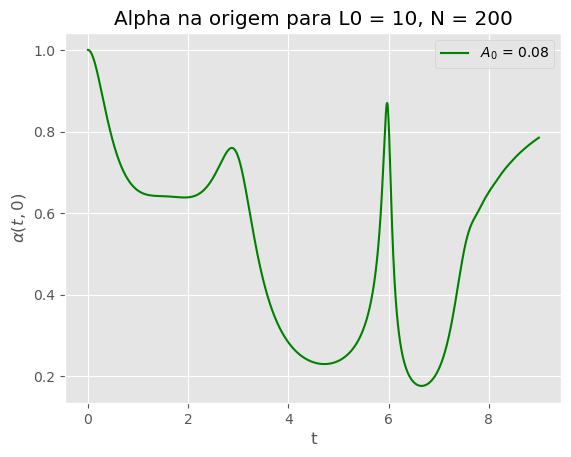

In [30]:
# Searching for critical amplitude:

#Alpha_origin_disp = Alpha_origin
#Alpha_origin_collapse = Alpha_origin

plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
#plt.plot(t1, Alpha_origin, color = "y", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para L0 = 10, N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
#plt.grid()
plt.legend()

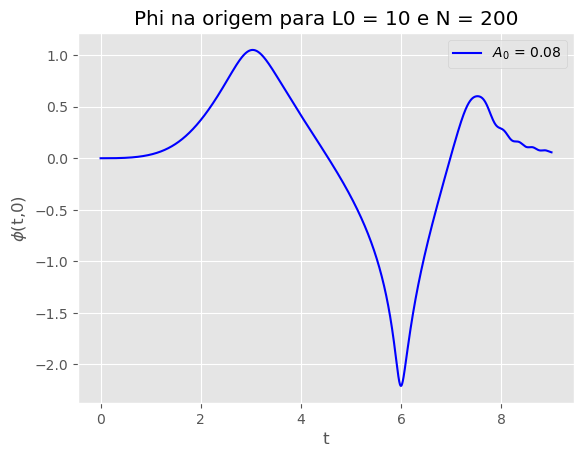

In [31]:


plt.plot(t1, phi_origin, color = "b", label = "$A_0$ = {:}".format(A0))
plt.title("Phi na origem para L0 = 10 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")  
#plt.grid()
plt.legend() 

In [ ]:
# Mass ADM error

Madm_error = abs(Madm - M0)/M0 * 100

plt.plot(t1, Madm_error, color = "r", label = "$A_0$ = {:}".format(A0))
plt.title("Mass ADM para L0 = 1 e N = {:}".format(N) )
plt.ylabel("Madm")
plt.xlabel("t")  
#plt.yscale('log')
#plt.grid()
plt.legend() 

In [ ]:
# Erro L2 of Hamiltonian constraint

plt.plot(t1,L2HC,label = "$A_0$ = {:}".format(A0))
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
#plt.grid()
plt.title("log(L2Hc) para $N = 50$, $L_0 = 2$")

In [14]:
# Code convergency:

# N = 50
  
#L2HC_50_L02 = max(L2HC)
#Madm_50_L02 = max(Madm_error)

#L2HC_50_L05 = max(L2HC)
#Madm_50_L05 = max(Madm_error)

#L2HC_50_L010 = max(L2HC)
#Madm_50_L010 = max(Madm_error)

L2HC_50_L02 = 2.1004761975300013e-05
L2HC_50_L05 = 6.013179489999039e-08
L2HC_50_L010 = 1.1172826826615396e-05

Madm_50_L02 = 0.441140502315545
Madm_50_L05 = 0.09577612248383582
Madm_50_L010 = 1.9648638162904044


In [15]:
print('L2HC_50_L02 =',L2HC_50_L02,'L2HC_50_L05 =', L2HC_50_L05, 'L2HC_50_L010 =',L2HC_50_L010, sep = '\n')

L2HC_50_L02 =
2.1004761975300013e-05
L2HC_50_L05 =
6.013179489999039e-08
L2HC_50_L010 =
1.1172826826615396e-05


In [16]:
print('Madm_50_L02 =',Madm_50_L02,'Madm_50_L05 =', Madm_50_L05, 'Madm_50_L010 =',Madm_50_L010, sep = '\n')

Madm_50_L02 =
0.441140502315545
Madm_50_L05 =
0.09577612248383582
Madm_50_L010 =
1.9648638162904044


In [17]:
# N = 100

L2HC_100_L02 = 8.814519907496297e-06
L2HC_100_L05 = 3.4394575424068816e-09
L2HC_100_L010 = 3.0564279217470172e-09

Madm_100_L02 = 0.21181940792191017
Madm_100_L05 = 0.006155383363121455
Madm_100_L010 = 0.0038618820102352893


In [18]:
# 150

L2HC_150_L02 = 6.359510241420228e-07
L2HC_150_L05 = 2.4947150430446703e-09
L2HC_150_L010 = 2.143082770566478e-09

Madm_150_L02 = 0.04560284588841929
Madm_150_L05 = 0.00281517011908434
Madm_150_L010 = 0.001085434551372218

In [19]:
# 200

L2HC_200_L02 = 1.8530744361457076e-08
L2HC_200_L05 = 1.9525782903056324e-09
L2HC_200_L010 = 1.7400678124385104e-09

Madm_200_L02 = 0.012656089955980498
Madm_200_L05 = 0.0015831036037497331
Madm_200_L010 = 0.0007135406063858518

In [20]:
# 250

L2HC_250_L02 = 1.7695663308139024e-09
L2HC_250_L05 = 1.602765664238964e-09
L2HC_250_L010 = 1.461023370063736e-09

Madm_250_L02 = 0.006533997751603586
Madm_250_L05 = 0.001017385966569618
Madm_250_L010 = 0.0005128561636363929

NameError: name 'fig' is not defined

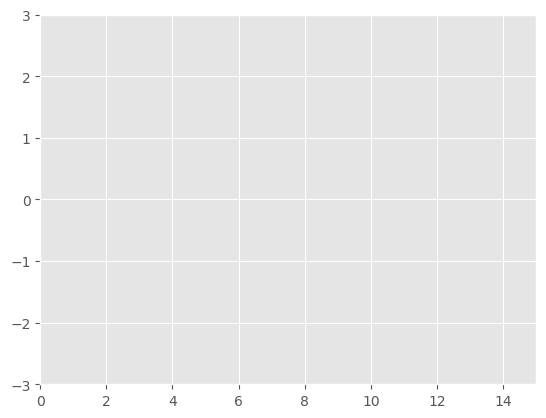

In [21]:
# Animation plot for Phi: Scalar Field
        
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#fig = plt.figure()
ax = plt.axes(xlim=(0, 15),ylim = (-3, 3))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
x = rplot

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.2, blit=True)

HTML(anim.to_html5_video())

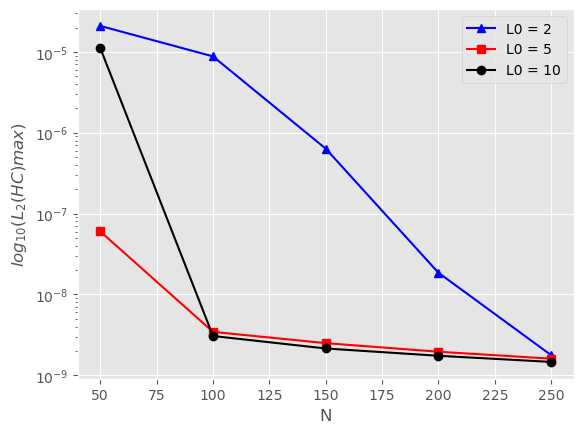

In [22]:
# Numerical test: L2 error of maximum Hamiltonian Constraint


L2HC_L02 = [L2HC_50_L02, L2HC_100_L02, L2HC_150_L02, L2HC_200_L02, L2HC_250_L02]

L2HC_L05 = [L2HC_50_L05, L2HC_100_L05, L2HC_150_L05, L2HC_200_L05, L2HC_250_L05]

L2HC_L010 = [L2HC_50_L010, L2HC_100_L010, L2HC_150_L010, L2HC_200_L010, L2HC_250_L010]

N = [50,100,150,200,250]

N_max = 250

plt.plot(N, L2HC_L02, '-b^', label = "L0 = 2")
plt.plot(N, L2HC_L05, '-rs',label = "L0 = 5")
plt.plot(N, L2HC_L010, '-ko',label = "L0 = 10")
#plt.xticks(range(N_max), N)
plt.xlabel('N')
plt.ylabel('$log_{10}(L_2(HC)max)$')
plt.yscale('log')
#plt.grid()
plt.legend()
plt.show()

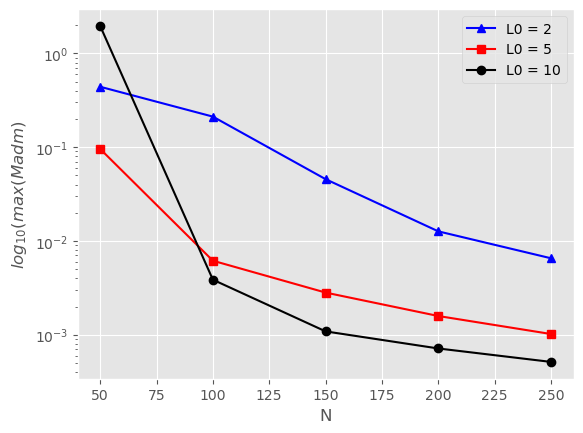

In [23]:
# Numerical test: L2 error of maximum Hamiltonian Constraint

Madm_L02 = [Madm_50_L02, Madm_100_L02, Madm_150_L02, Madm_200_L02, Madm_250_L02]

Madm_L05 = [Madm_50_L05, Madm_100_L05, Madm_150_L05, Madm_200_L05, Madm_250_L05]

Madm_L010 = [Madm_50_L010, Madm_100_L010, Madm_150_L010, Madm_200_L010, Madm_250_L010]

N = [50,100,150,200,250]

N_max = 250

plt.plot(N, Madm_L02, '-b^', label = "L0 = 2")
plt.plot(N, Madm_L05, '-rs',label = "L0 = 5")
plt.plot(N, Madm_L010, '-ko',label = "L0 = 10")
#plt.xticks(range(N_max), N)
plt.xlabel('N')
plt.ylabel('$log_{10}(max(Madm)$')
plt.yscale('log')
#plt.grid()
plt.legend()
plt.show()